# Cleaning surgical reports notebook
Notebook that explores the best way of extracting the procedure text from the surgical reports

In [6]:
import os
cwd = os.getcwd()
surgical_folder_text_path = os.path.join(cwd, "..", "data", "raw_data", "txt", "surgical")
test_file_path = os.path.join(cwd, surgical_folder_text_path, "168 O.txt")
# Print a test file
with open(test_file_path, "r") as f:
    print(f.read())

; sommenscaronewrevosmem —— MAMLLEIIITULA(

HOPITAL DE MONTREAL POUR ENFANTS

OPERATION REPORT / PROTOCOLE OPERATOIRE

 

DATE/DATE : September 2, 2014
SALLE/WARD : 7C-1
SERVICE/SERVICE ; GENERAL SURGERY

CHIRURGIEN/SURGEON : Dr. S, Emil ASSISTANT(SVASSISTANT(S) : Dr. B. Alsaikhan

DIAGNOSTIC PRE-OPERATOIRE

PRE-OPERATIVE DIAGNOSIS: Acute appendicitis

DIAGNOSTIC POST-OPERATOIRE

POST-OPERATIVE DIAGNOSIS: Perforated appendicitis

OPERATION / OPERATION: 1, Laparoscopic appendectomy
2. Laparoscopic cecorrhaphy

ANESTHESIE / ANAESTHETIC: General

RAPPORT / REPORT

INDICATIONS:

This is a patient. who came to the operating room for a diagnosis of appendicitis
and was found to have a retrocecal perforated appendix. The dissection was difficult, and a burn was
incurred at the cecum during dissection of the appendix and was treated intraoperatively after recognition.

OPERATIVE PROCEDURE:

 

With proper consent, the child was brought to the operating room. General
anesthesia was induced. Pro

Do all the text files have a procedure section that starts with `OPERATIVE PROCEDURE:"` and end with `Dictated`? 

In [7]:
# Do all the text files have a procedure section that starts with "OPERATIVE PROCEDURE:"?
surgical_reports_path = [
    os.path.join(surgical_folder_text_path, filename) 
    for filename in os.listdir(surgical_folder_text_path) if filename.endswith(".txt")
    ]
number_surgical_reports = len(surgical_reports_path)
count = 0
start_marker = "OPERATIVE PROCEDURE"
# end_marker = "Dictated"
for i, surgical_report_path in enumerate(surgical_reports_path):
    with open(surgical_report_path, "r") as f:
        surgical_report_text = f.read()
    if start_marker.lower() in surgical_report_text.lower():
        count += 1
print(count, number_surgical_reports)
        

56 100


In [8]:
with open(surgical_reports_path[i], "r") as f:
    print(f.read())

é

MONTREAL CHILDREN’S HOSPITAL
HOPITAL DE MONTREAL POUR ENFANTS

 

- 6 8

OPERATION REPORT / PROTOCOLE OPERATOIRE

 

DATE/DATE : April 15, 2014

SALLE/WARD : 8D

 

SERVICE/SERVICE : GENERAL SURGERY

CHIRURGIEN/SURGEON : Dr. R, Baird ASSISTANT(S)/ASSISTANT(S) : Dr. A. Alkhatecb

DIAGNOSTIC PRE-OPERATOIRE

PRE-OPERATIVE DIAGNOSIS: Acute appendicitis
DIAGNOSTIC POST-OPERATOIRE

POST-OPERATIVE DIAGNOSIS: Same

OPERATION / OPERATION: Laparoscopic appendectomy
ANESTHESIE / ANAESTHETIC: General using endotracheal tube
RAPPORT / REPORT

CLINICAL NOTE:

The patient is a 14-year-old girl who presented with periumbilical pain that shifted
to the right lower quadrant for one day associated with nausea and vomiting. She had positive tenderness on
examination in the right lower quadrant. The patient was taken to the operating room for a laparoscopic
appendectomy. Intraoperative findings revealed an acute, nonperforated and non-gangrenous appendicitis.
PROCEDURE:

The patient was prepped and drap

In [9]:
print(number_surgical_reports)
print(count)

100
56


## Cropping for easier text extraction?
Can we first crop the surgical reports such that the text extraction is easier? 

In [10]:
import os
cwd = os.getcwd()
surgical_folder_png_path = os.path.join(cwd, "..", "data", "raw_data", "png", "surgical")
test_file_path = os.path.join(cwd, surgical_folder_png_path, "180 O_0.png")

Try cropping and then text extraction.

In [14]:
from PIL import Image
import time
import pytesseract

for path in os.listdir(surgical_folder_png_path):
    if path.endswith("0.png"):
        print(f"Cropping {path}")
        im = Image.open(os.path.join(surgical_folder_png_path, path))
        width, height = im.size
        right = width
        left = 0
        bottom = height - height/10
        top = height/2
        im_cropped = im.crop((left, top, right, bottom))
        im_cropped.show()
        extracted_text = pytesseract.image_to_string(im_cropped)
        print("Extracted text: ", extracted_text)
        if "necrosis" in extracted_text.lower():
            print("Found")
            return
        time.sleep(5)

SyntaxError: 'return' outside function (397002954.py, line 20)

Cropping would make things much easier *if* we know which ids are what type. If we do then we can create a cropping mapping for different ids.

Cropping 148 O_1.png


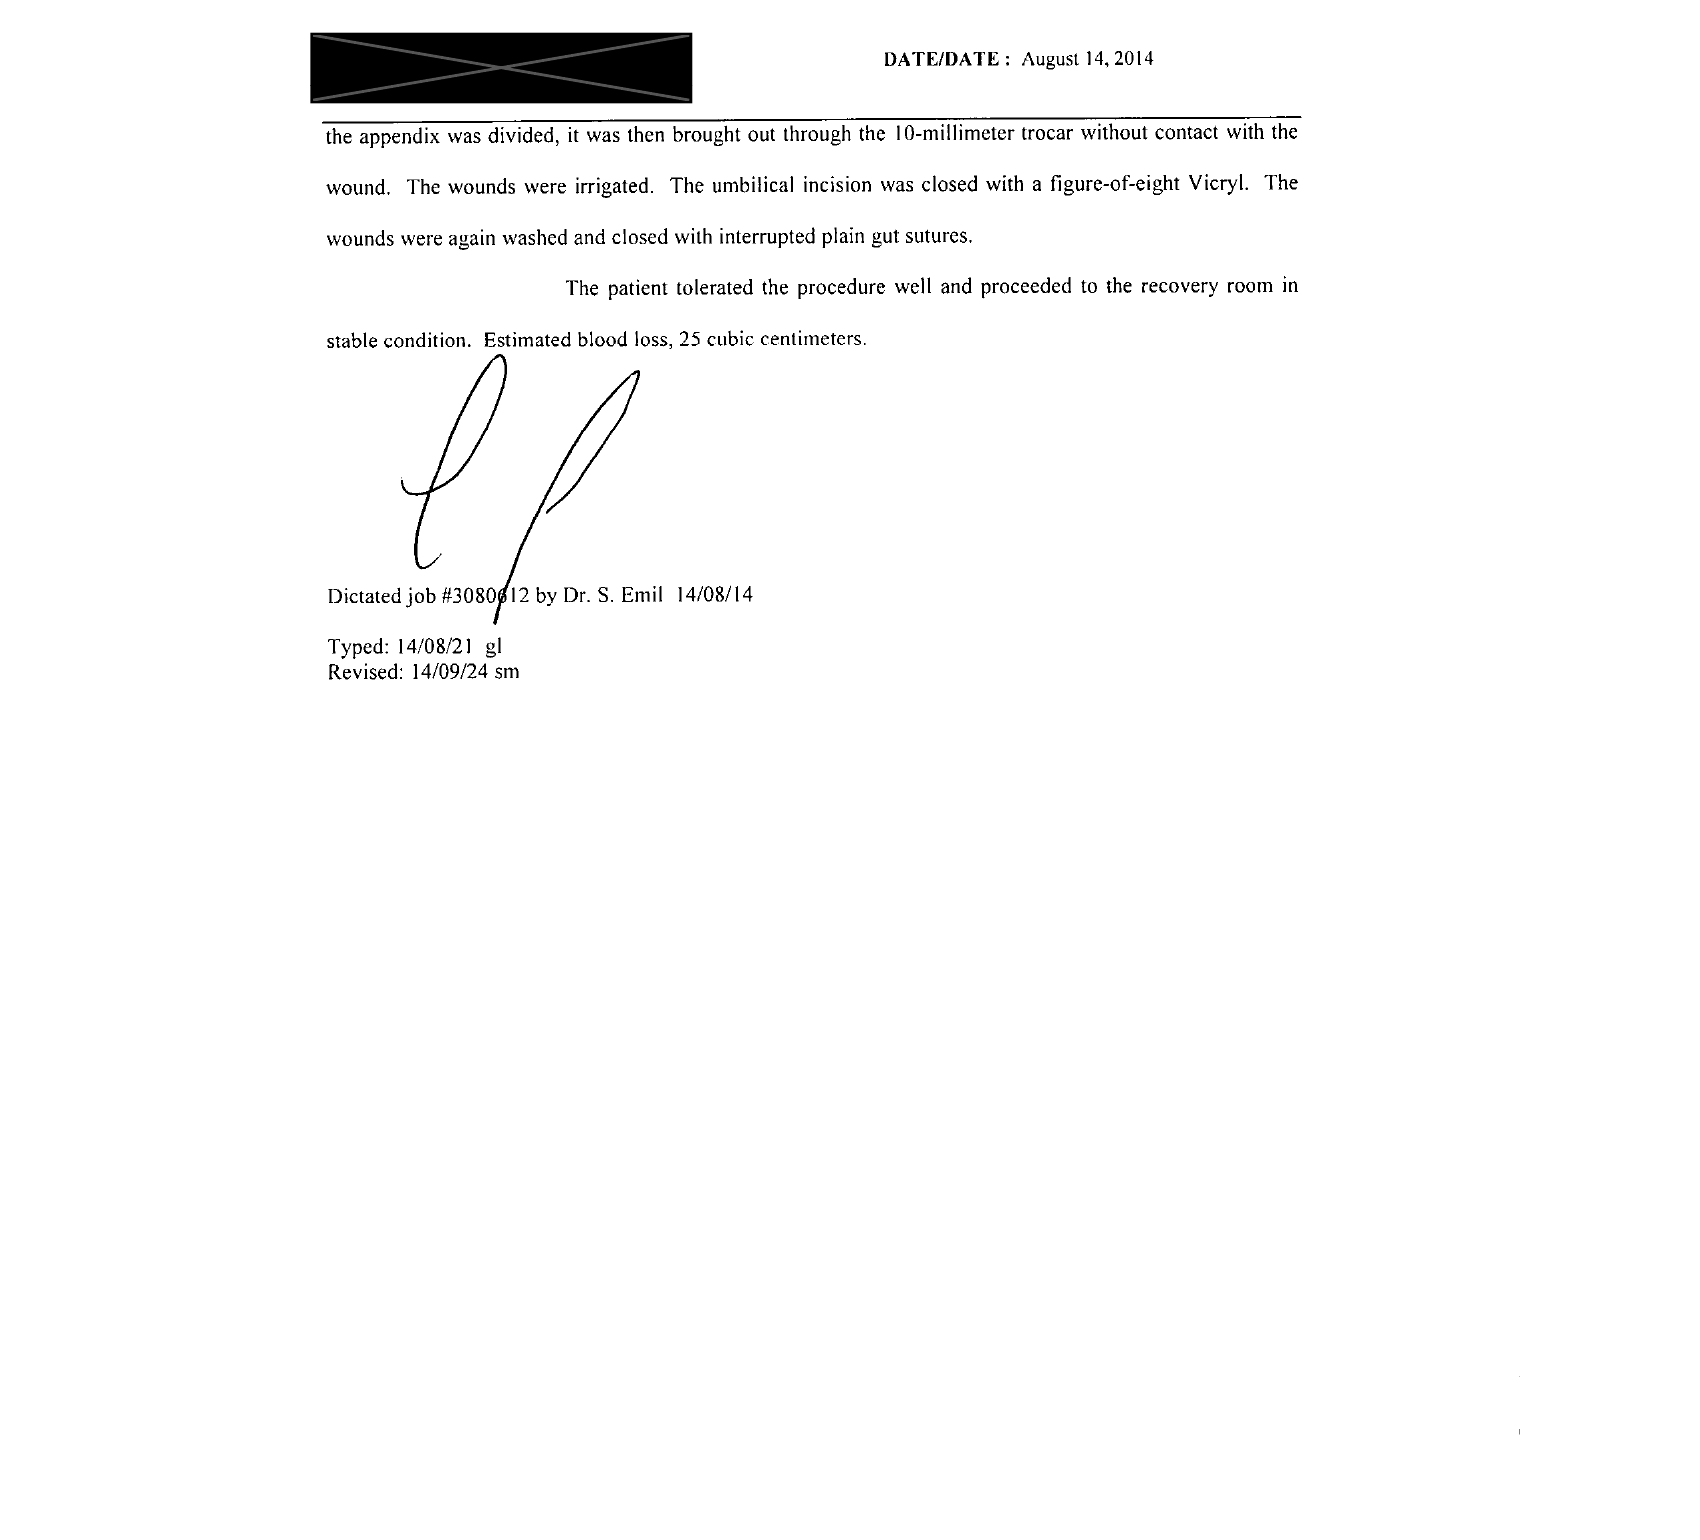

Cropping 101 O_1.png


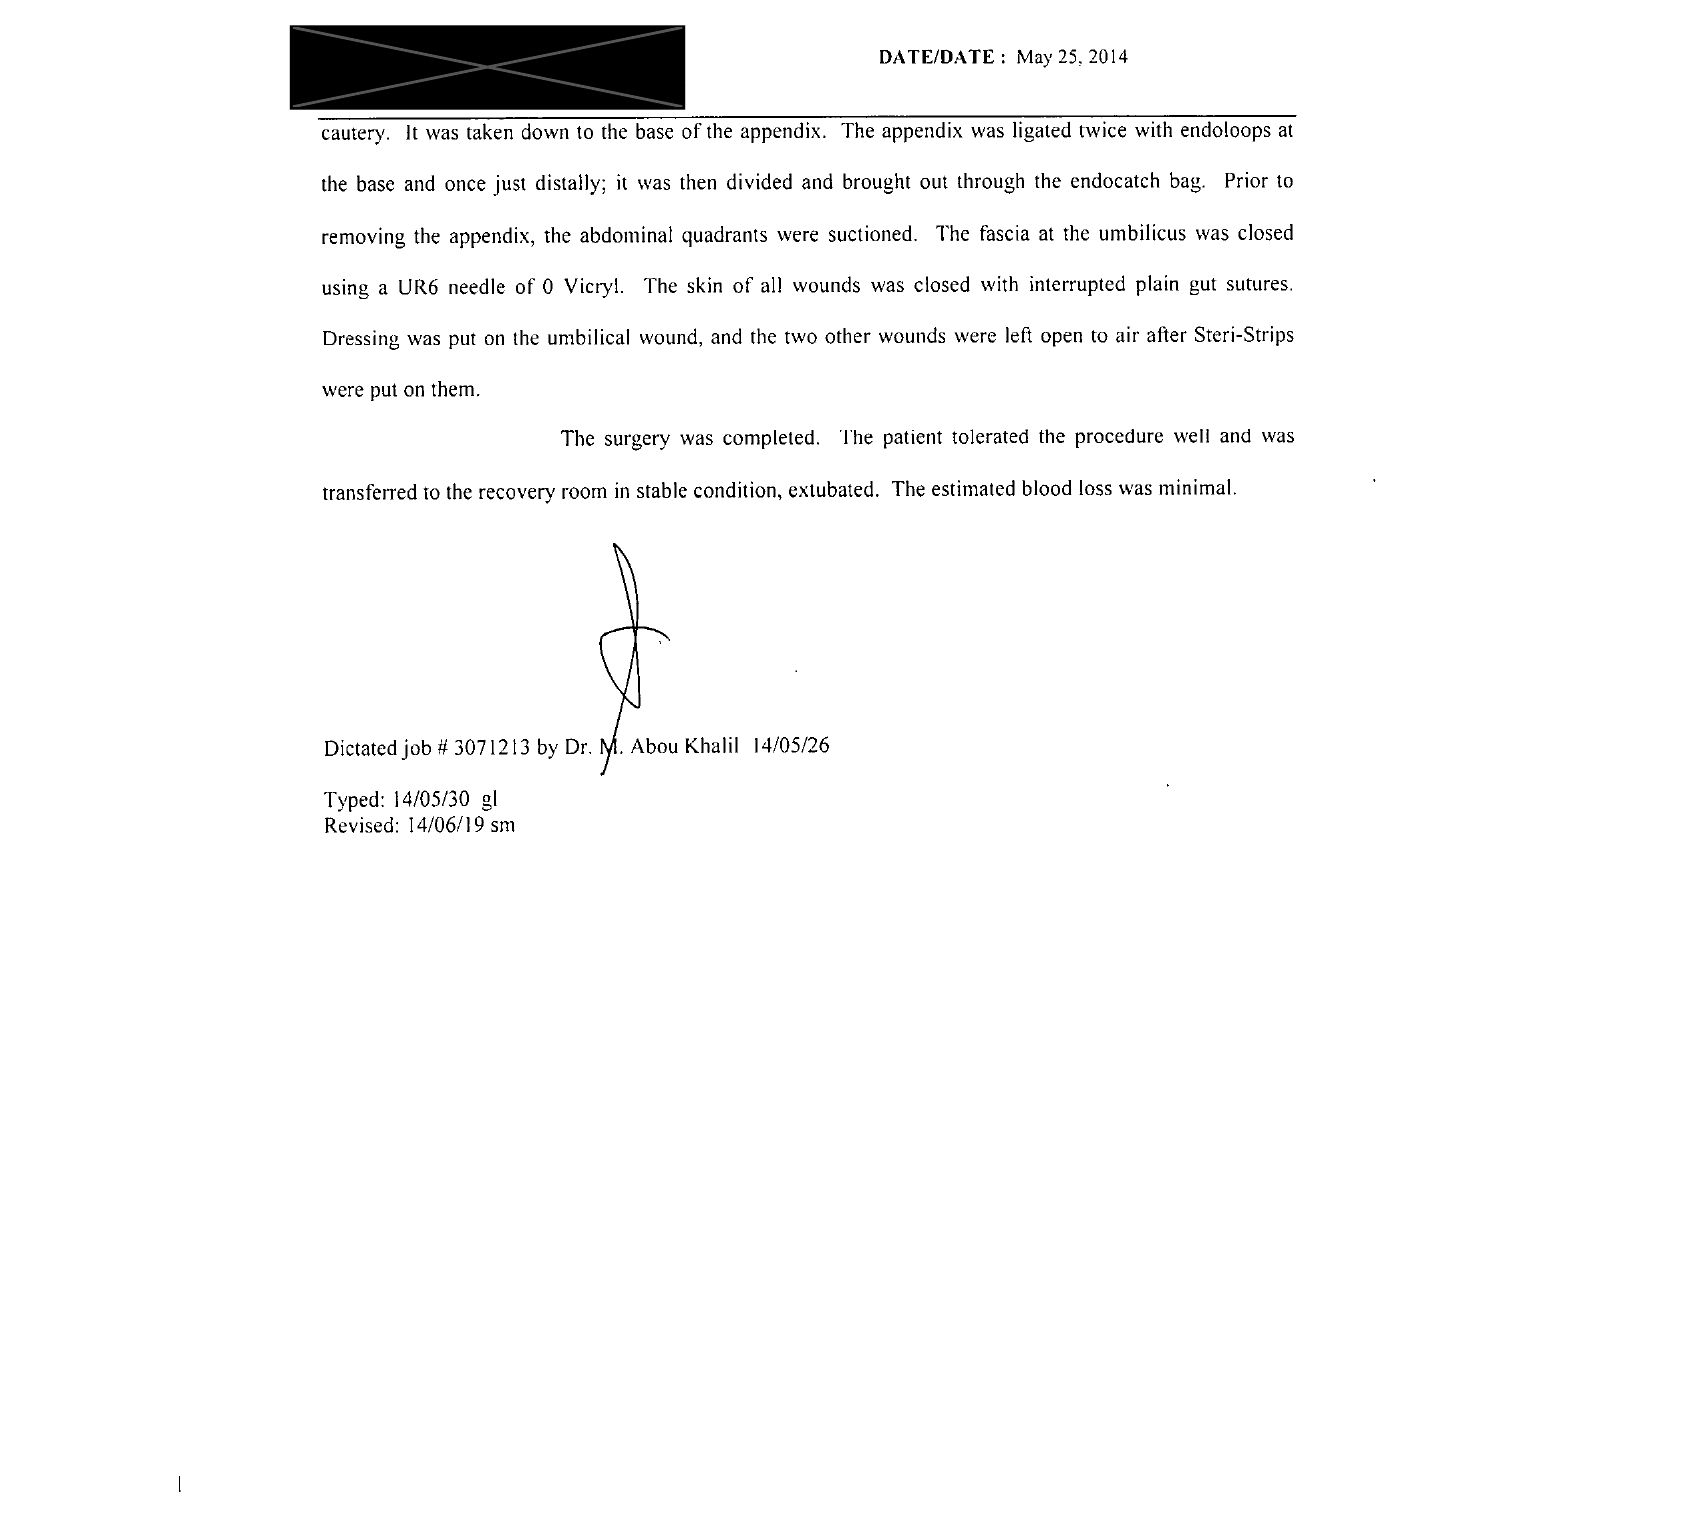

Cropping 51 O_1.png


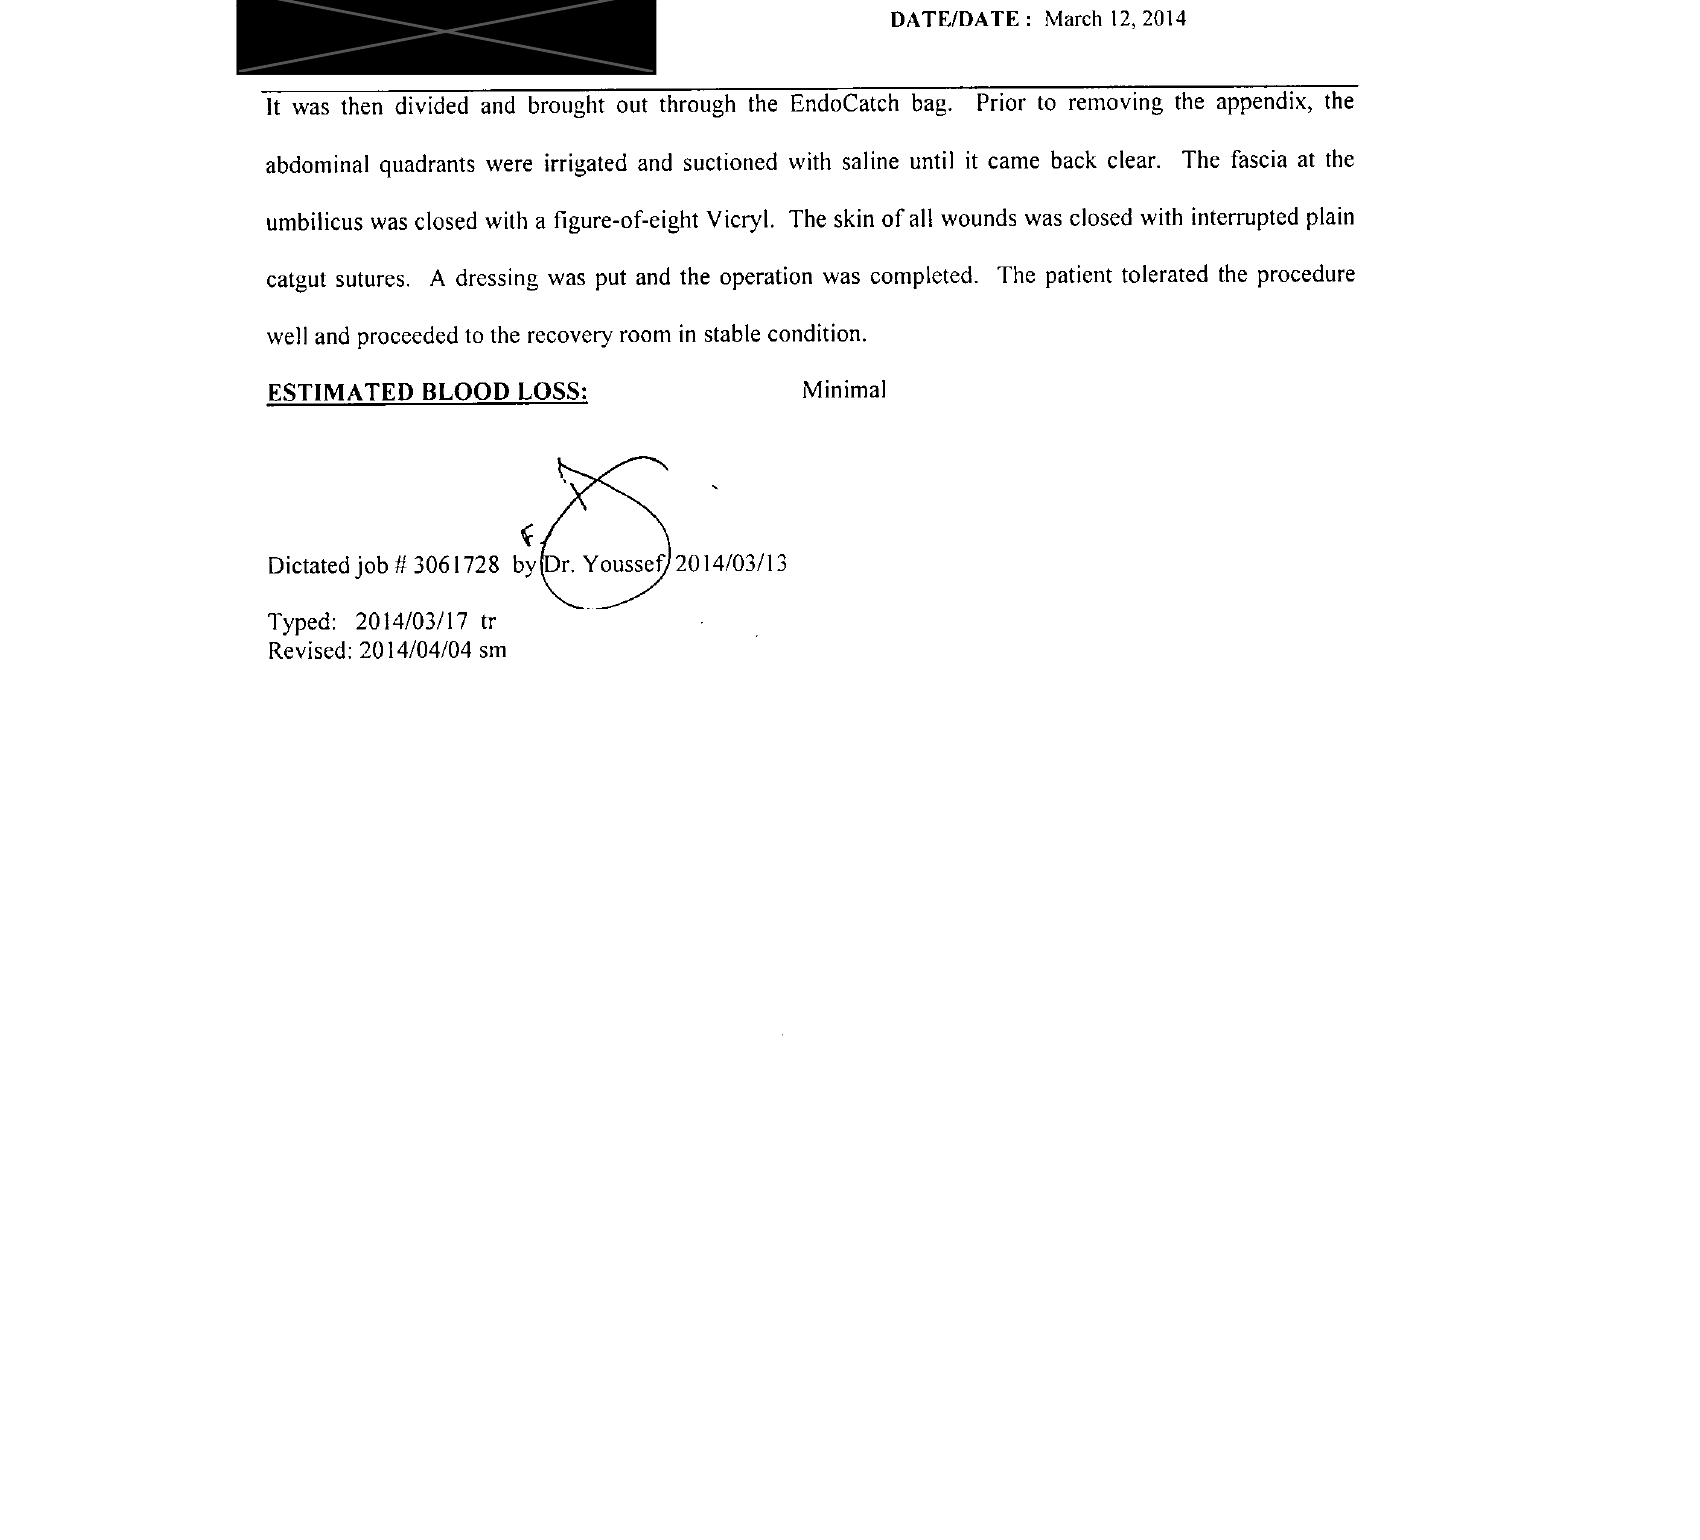

Cropping 170 O_1.png


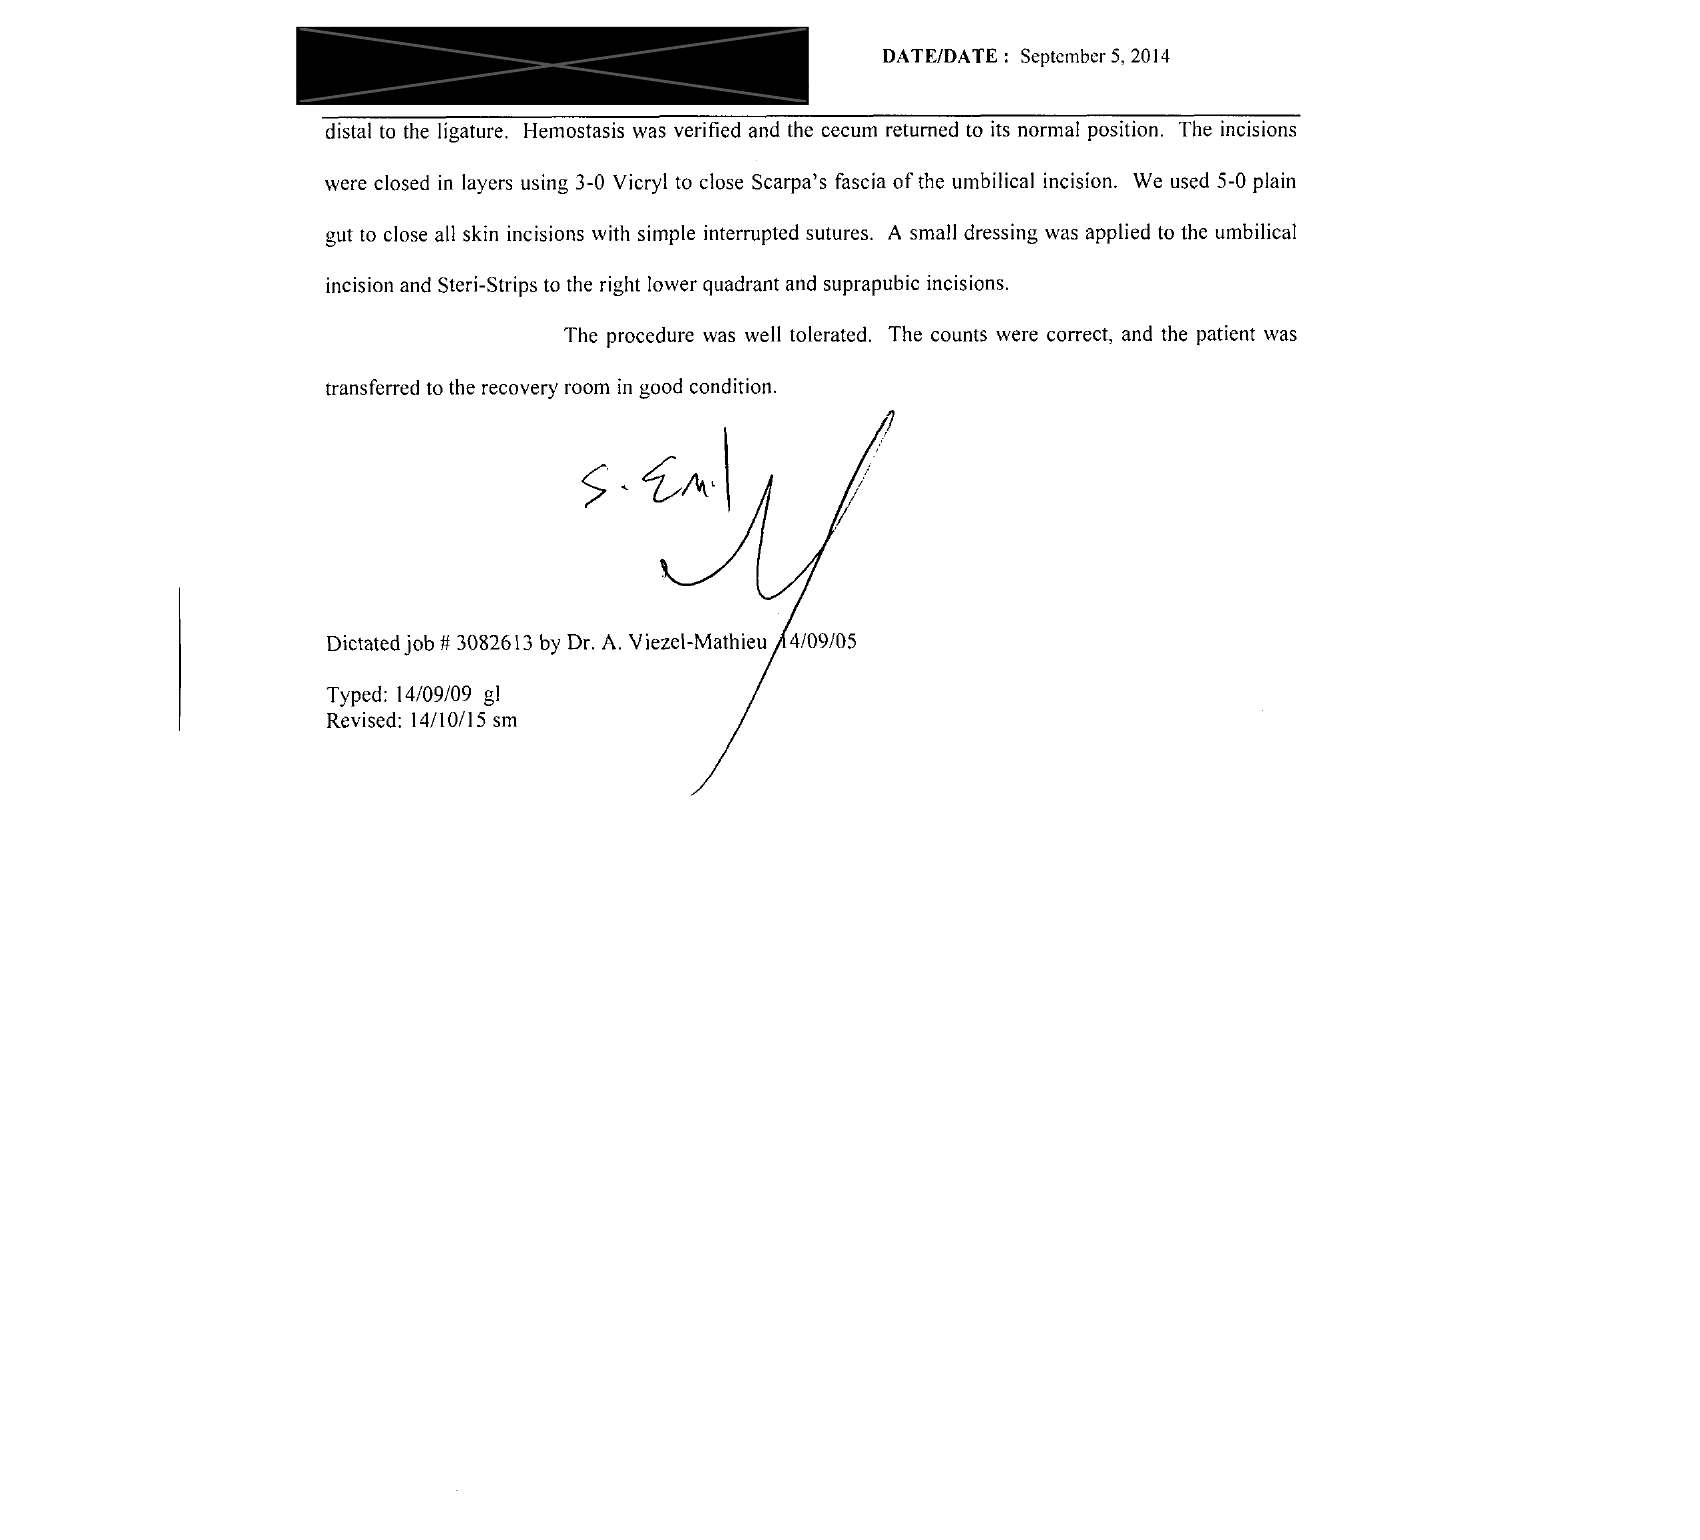

Cropping 72 O_1.png


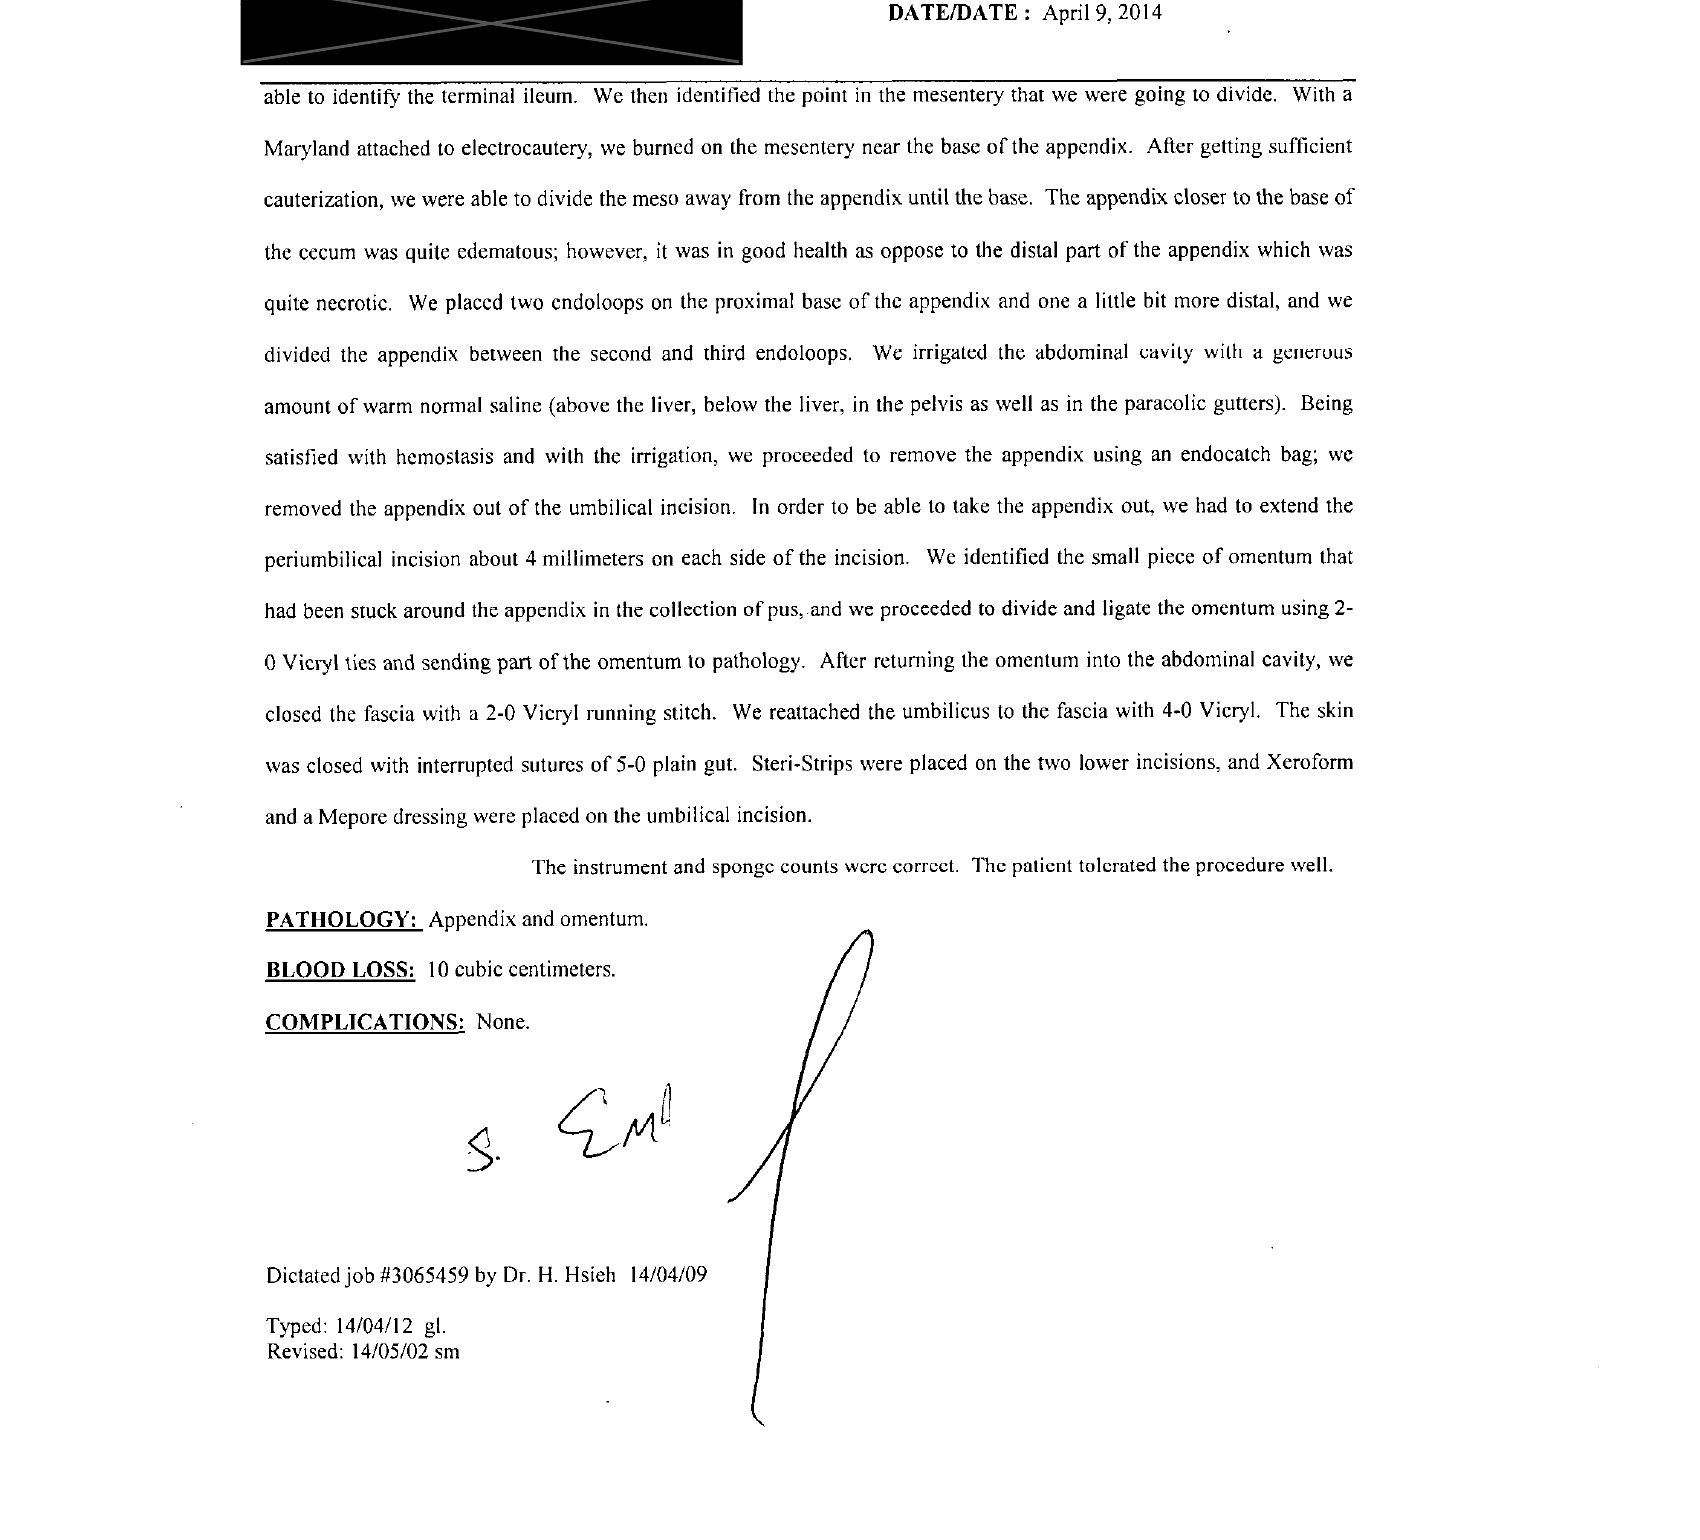

Cropping 87 O_1.png


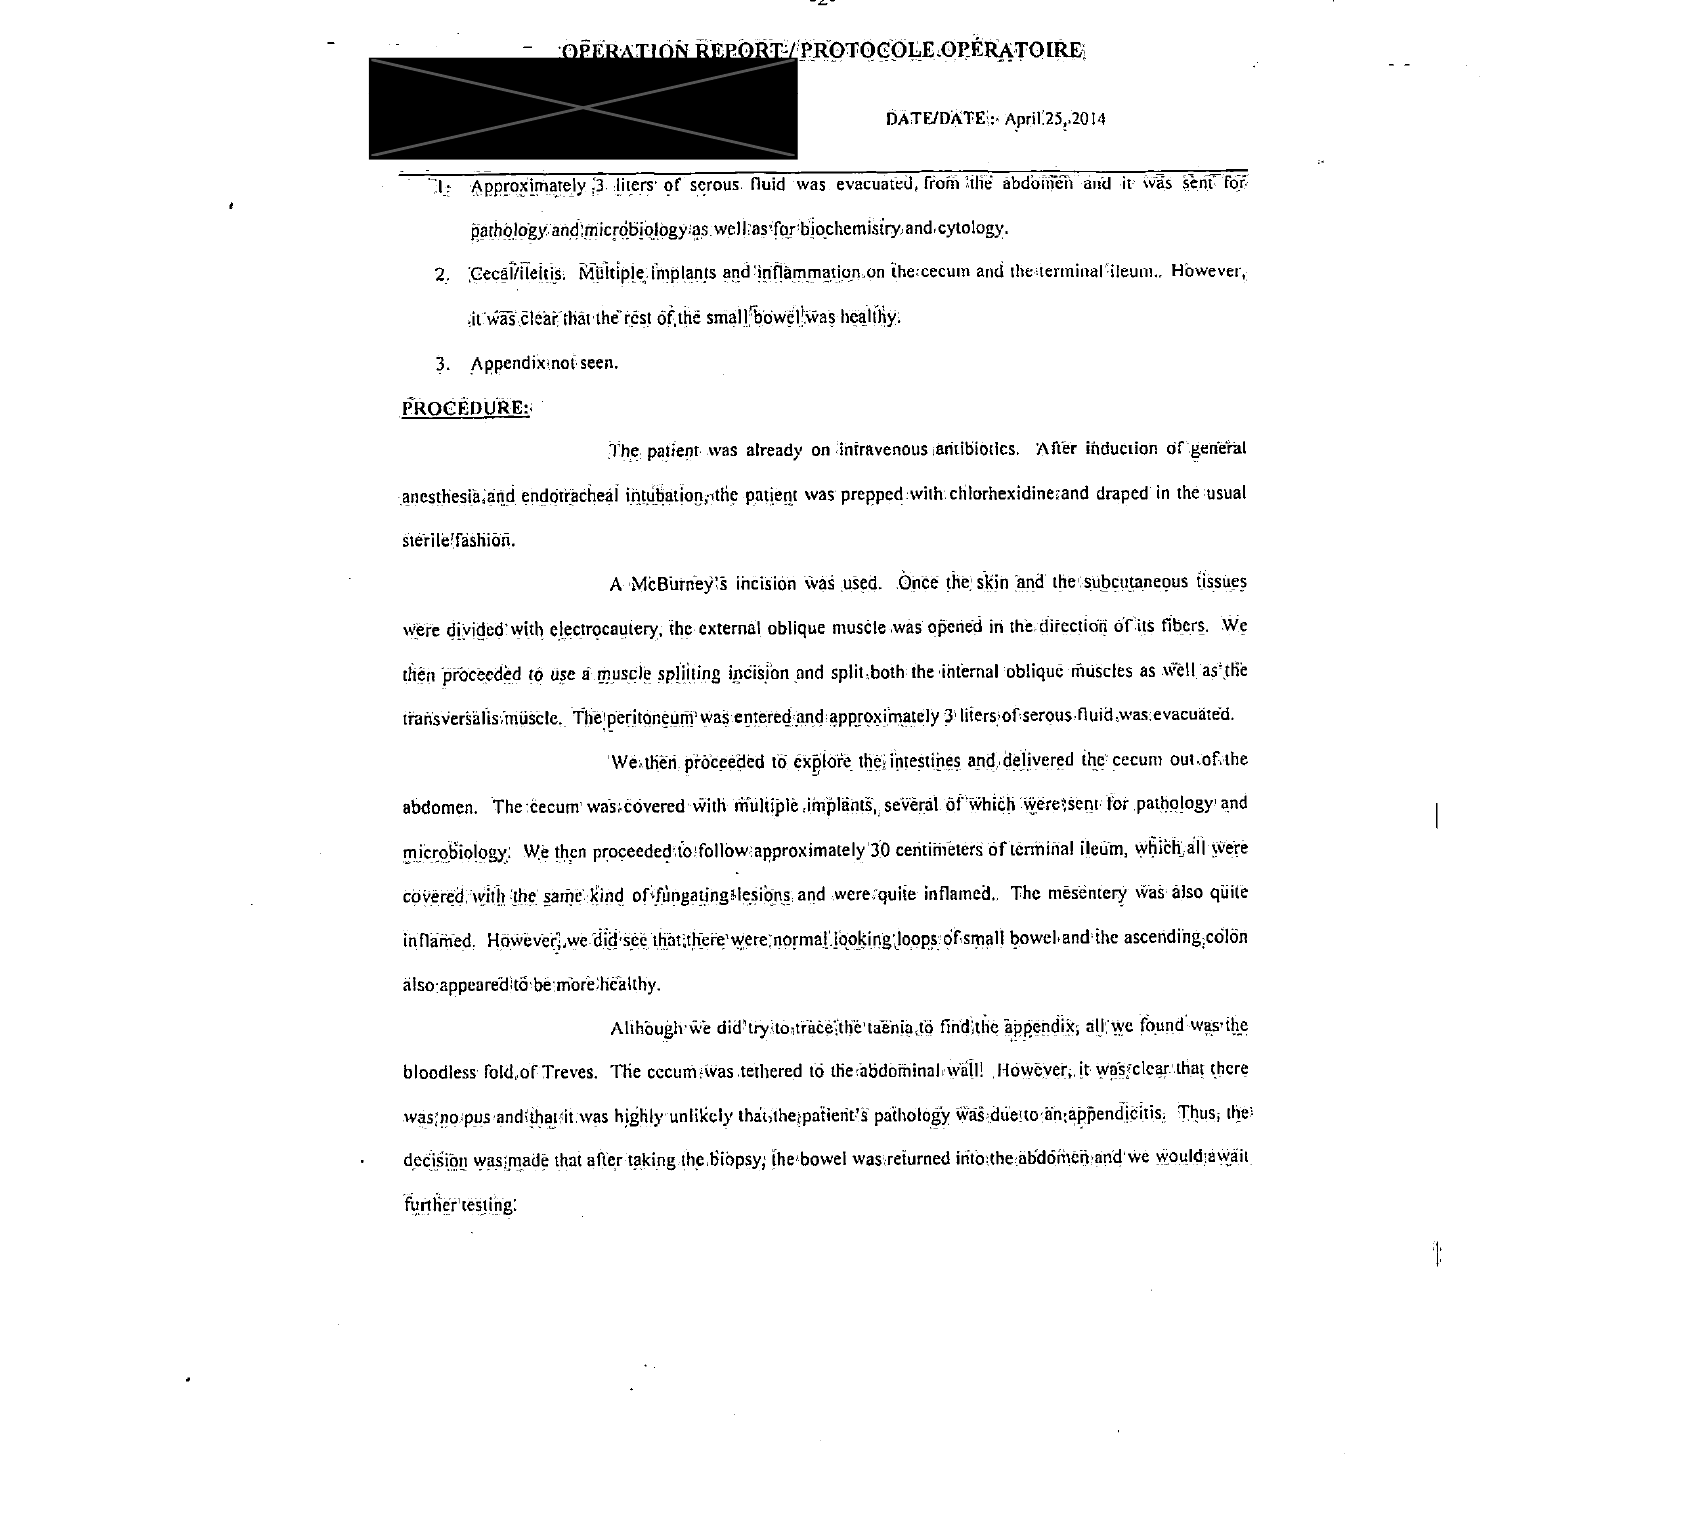

Cropping 180 O_1.png


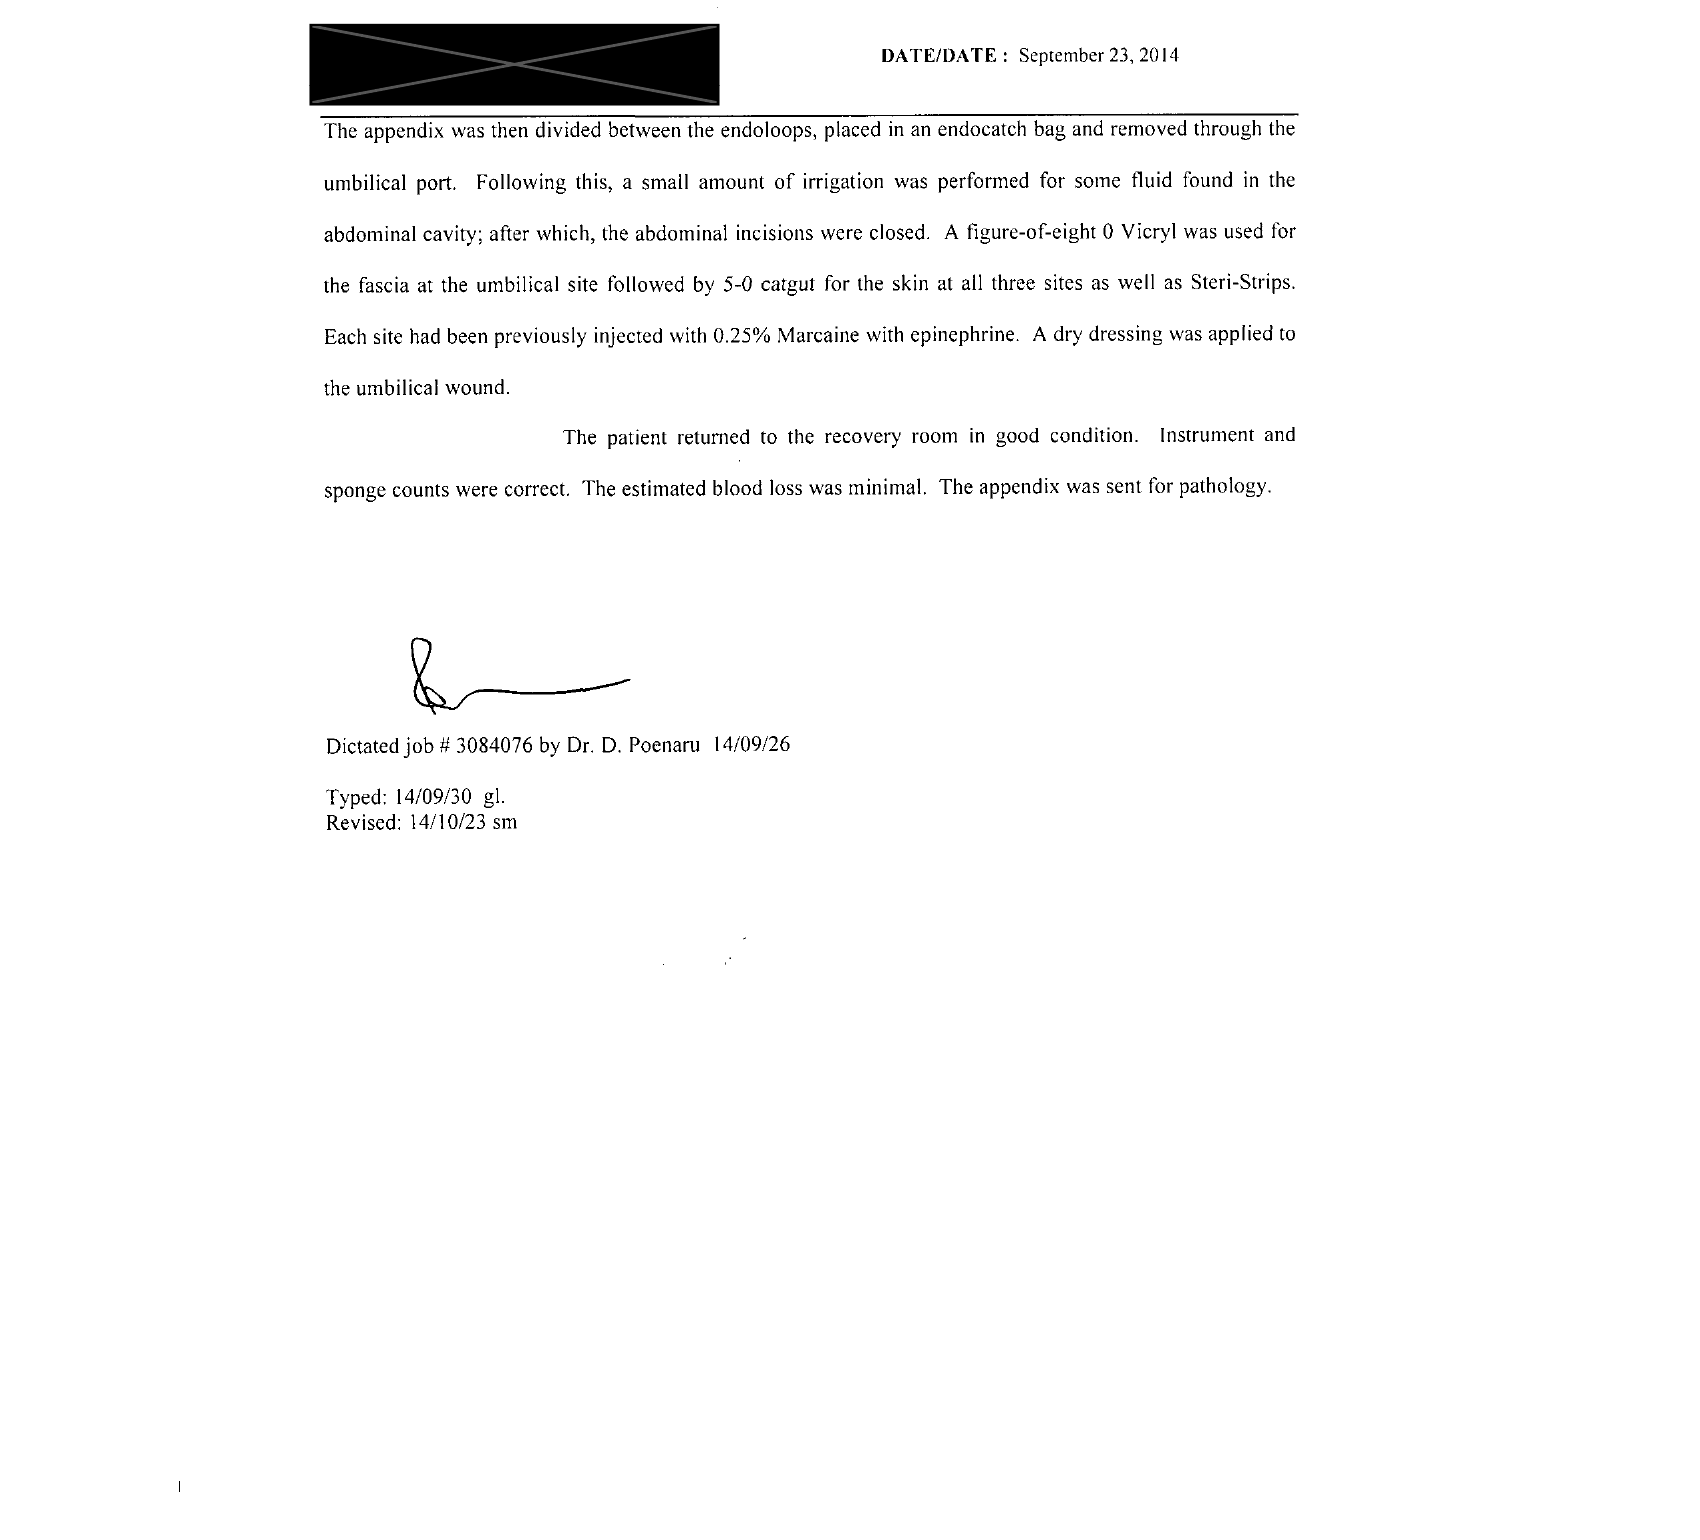

Cropping 165 O_1.png


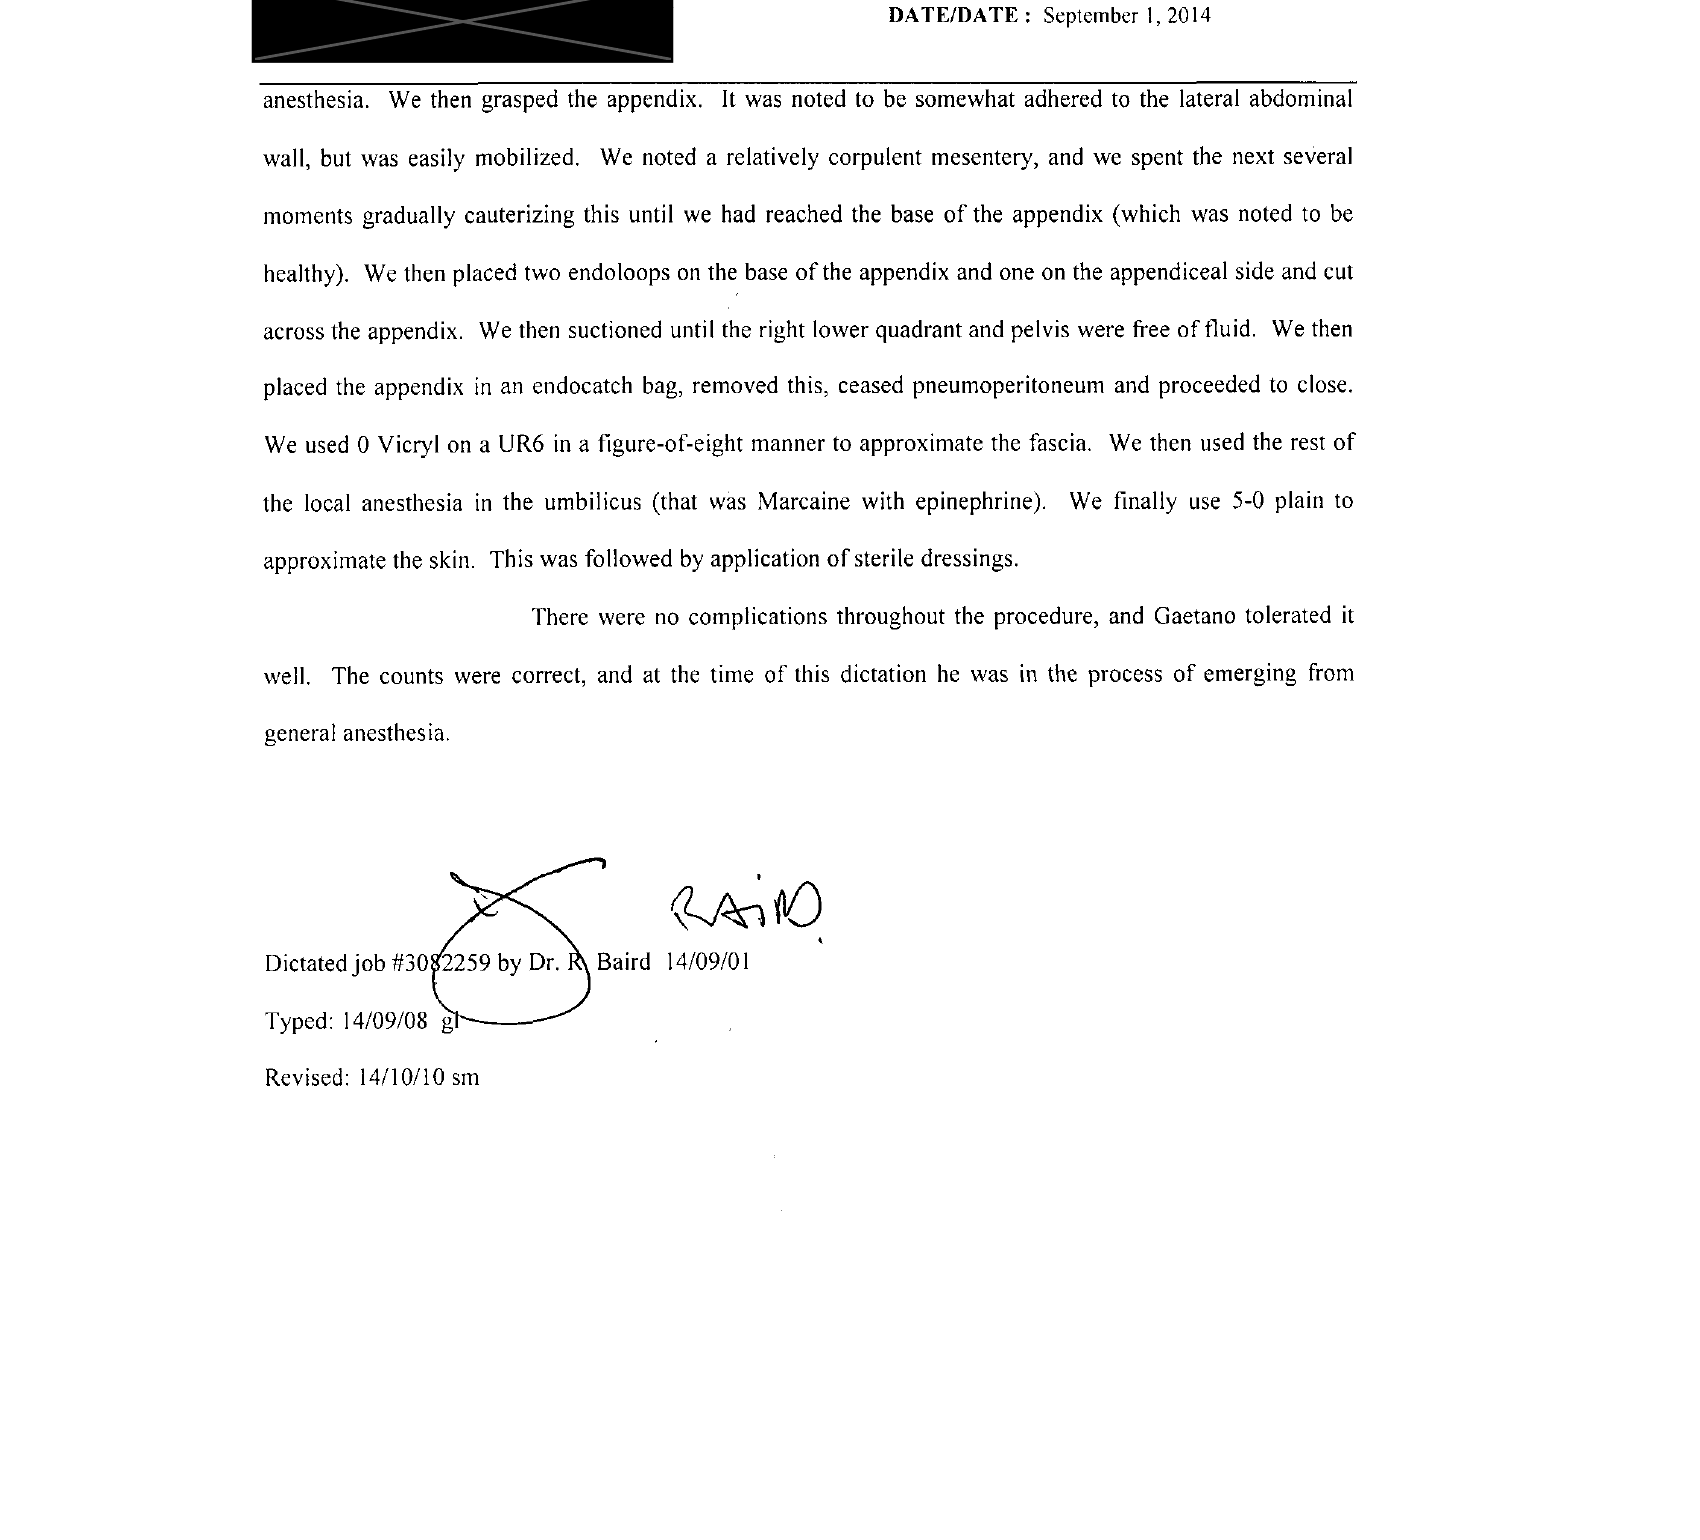

Cropping 150 O_1.png


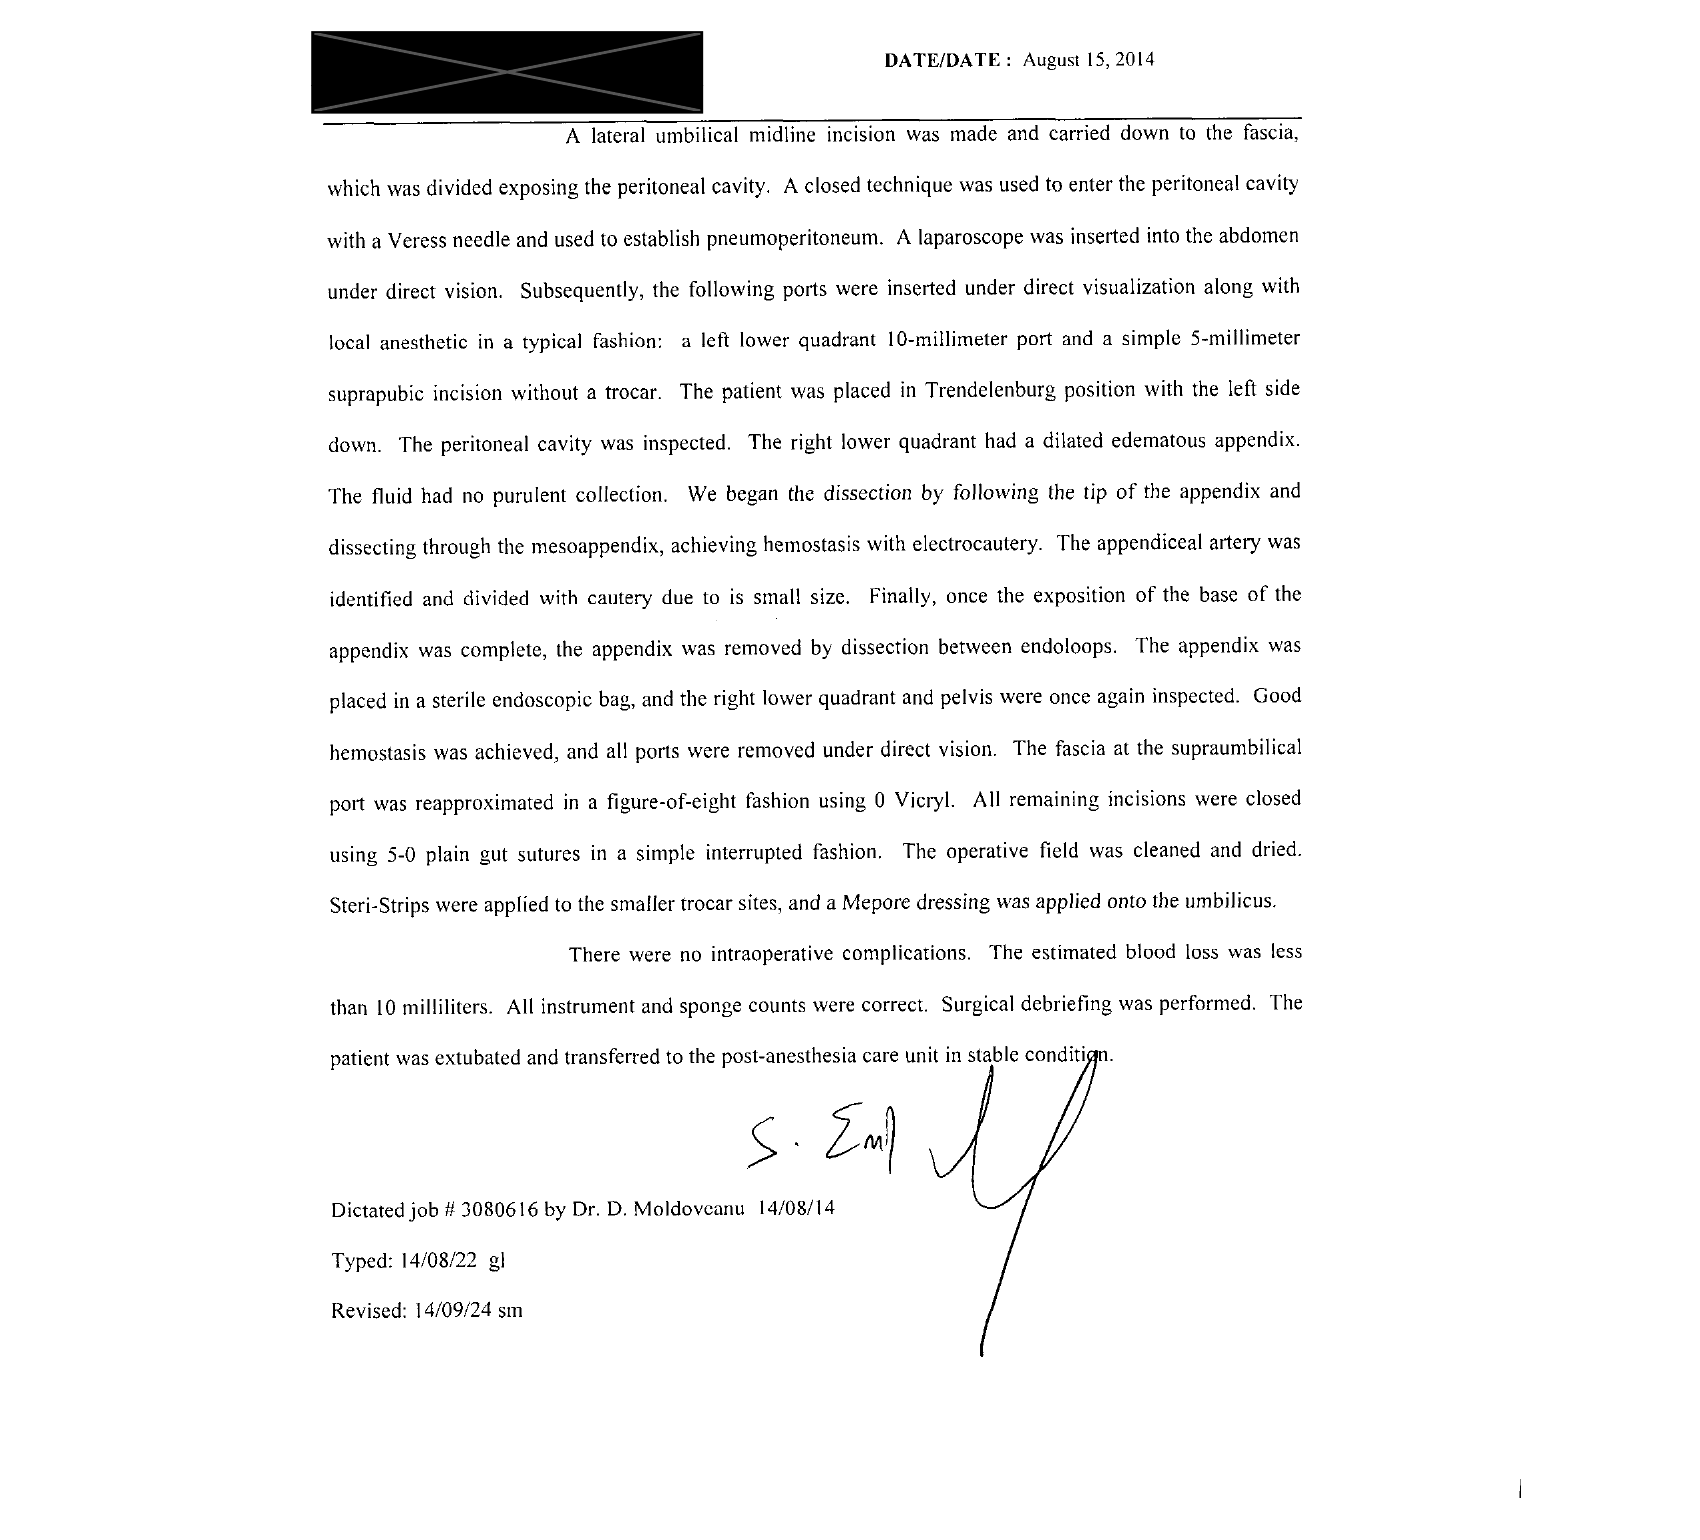

Cropping 160 O_1.png


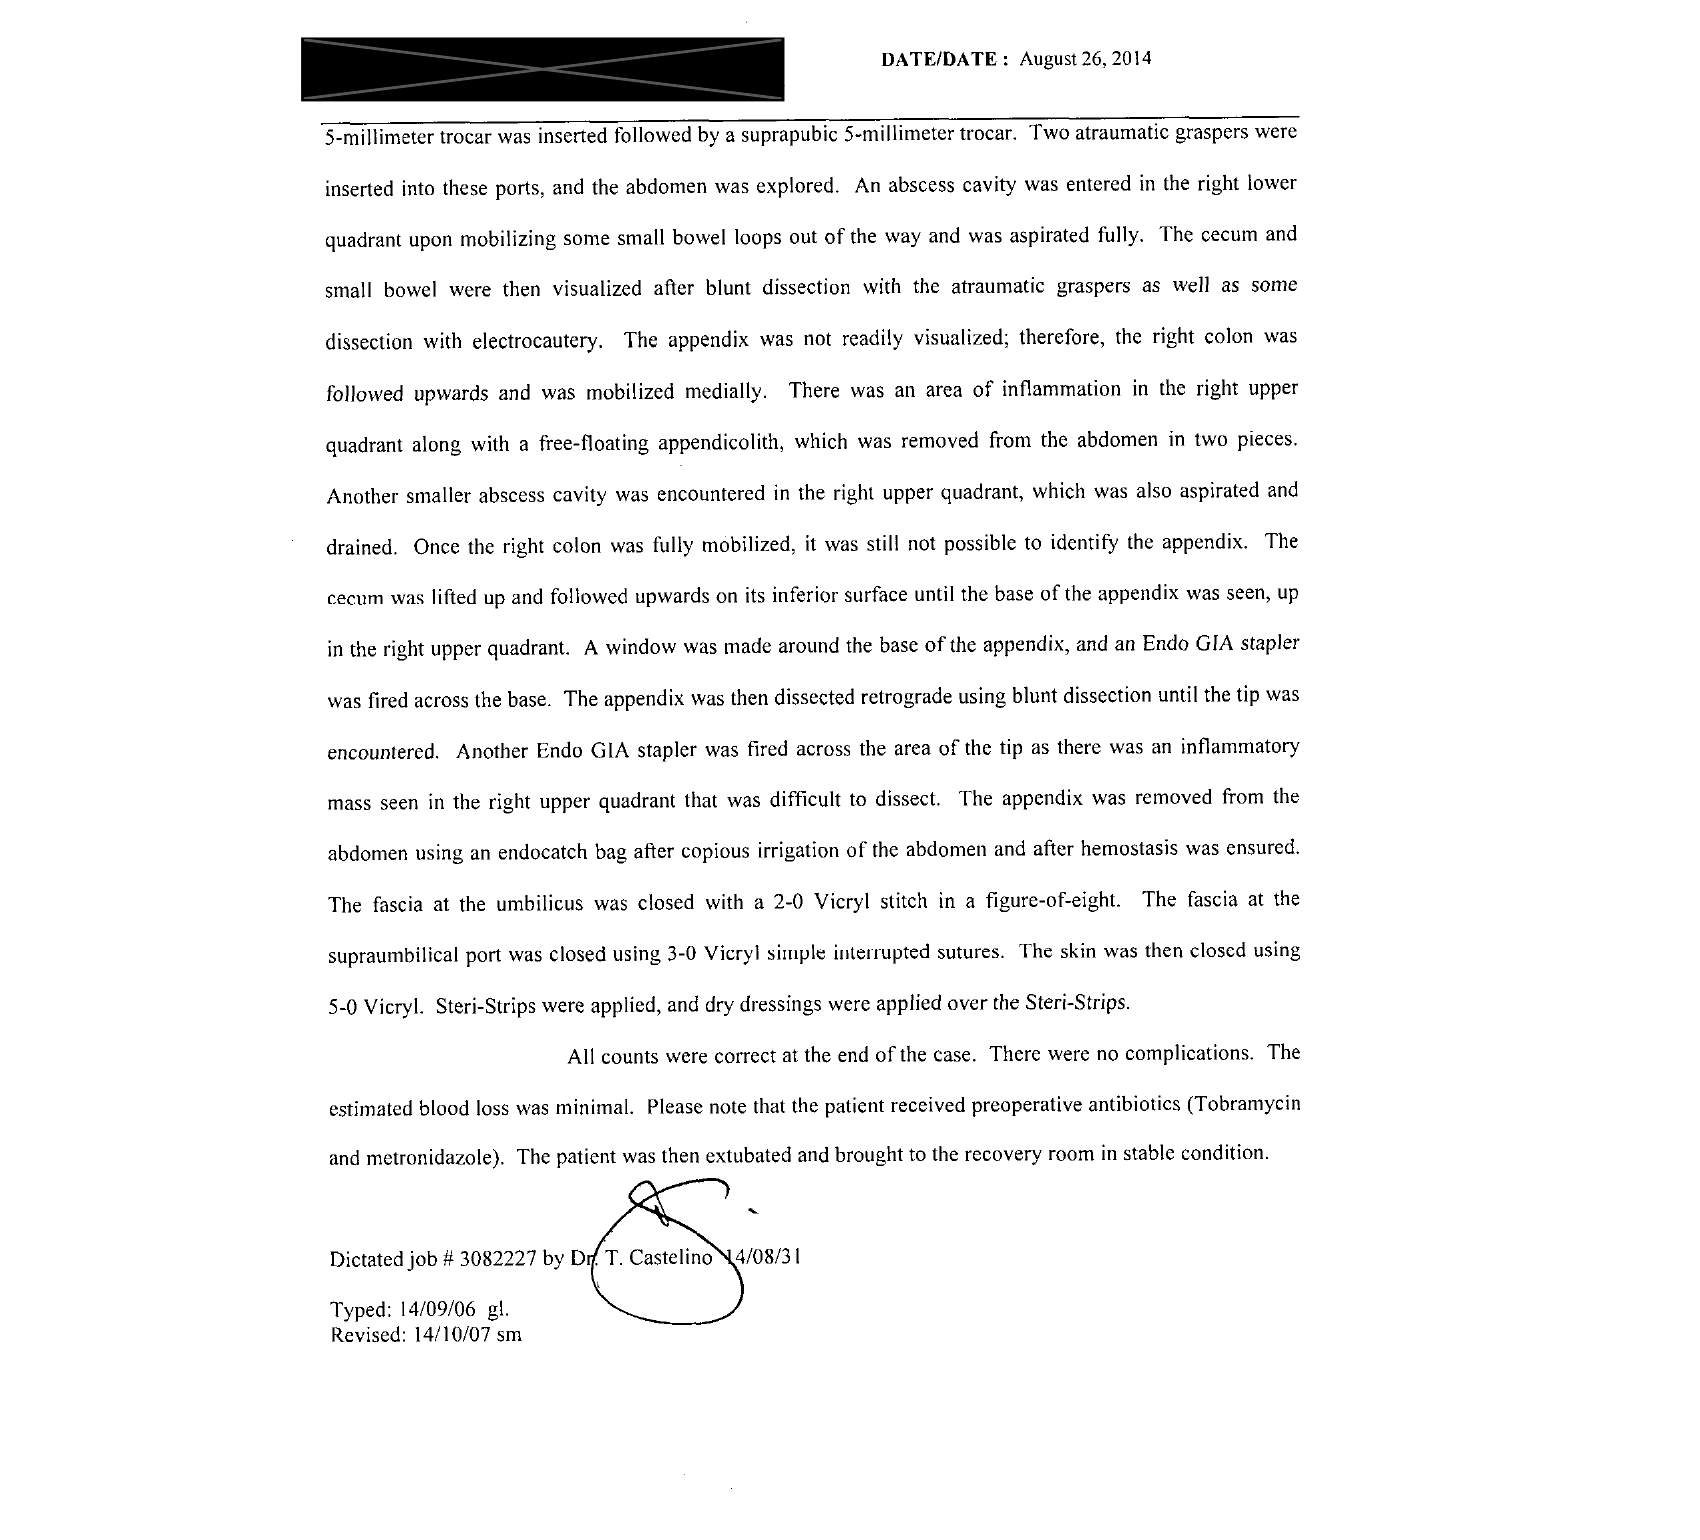

Cropping 81 O_1.png


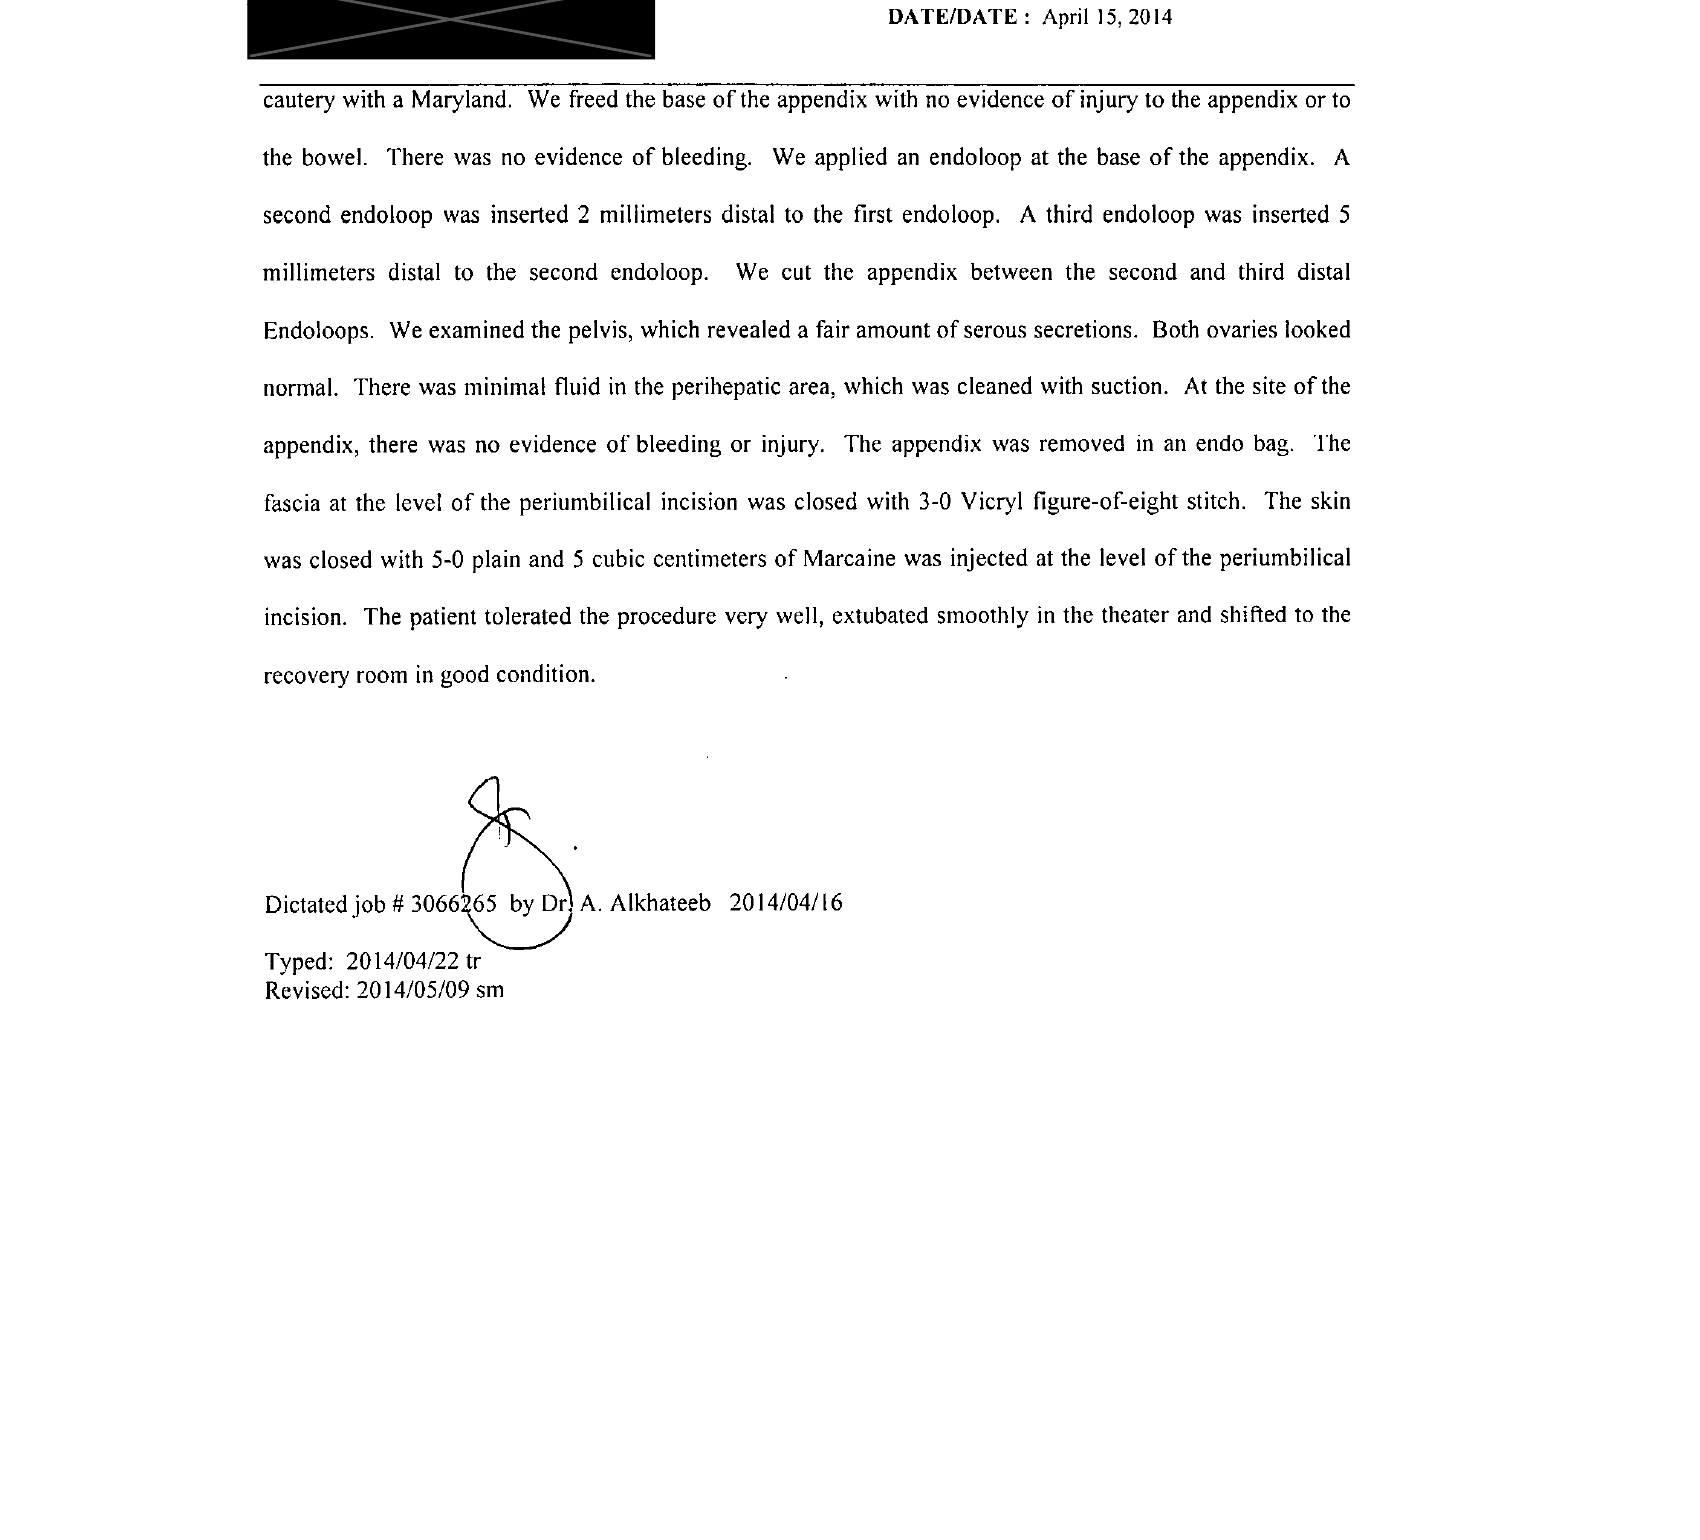

Cropping 139 O_1.png


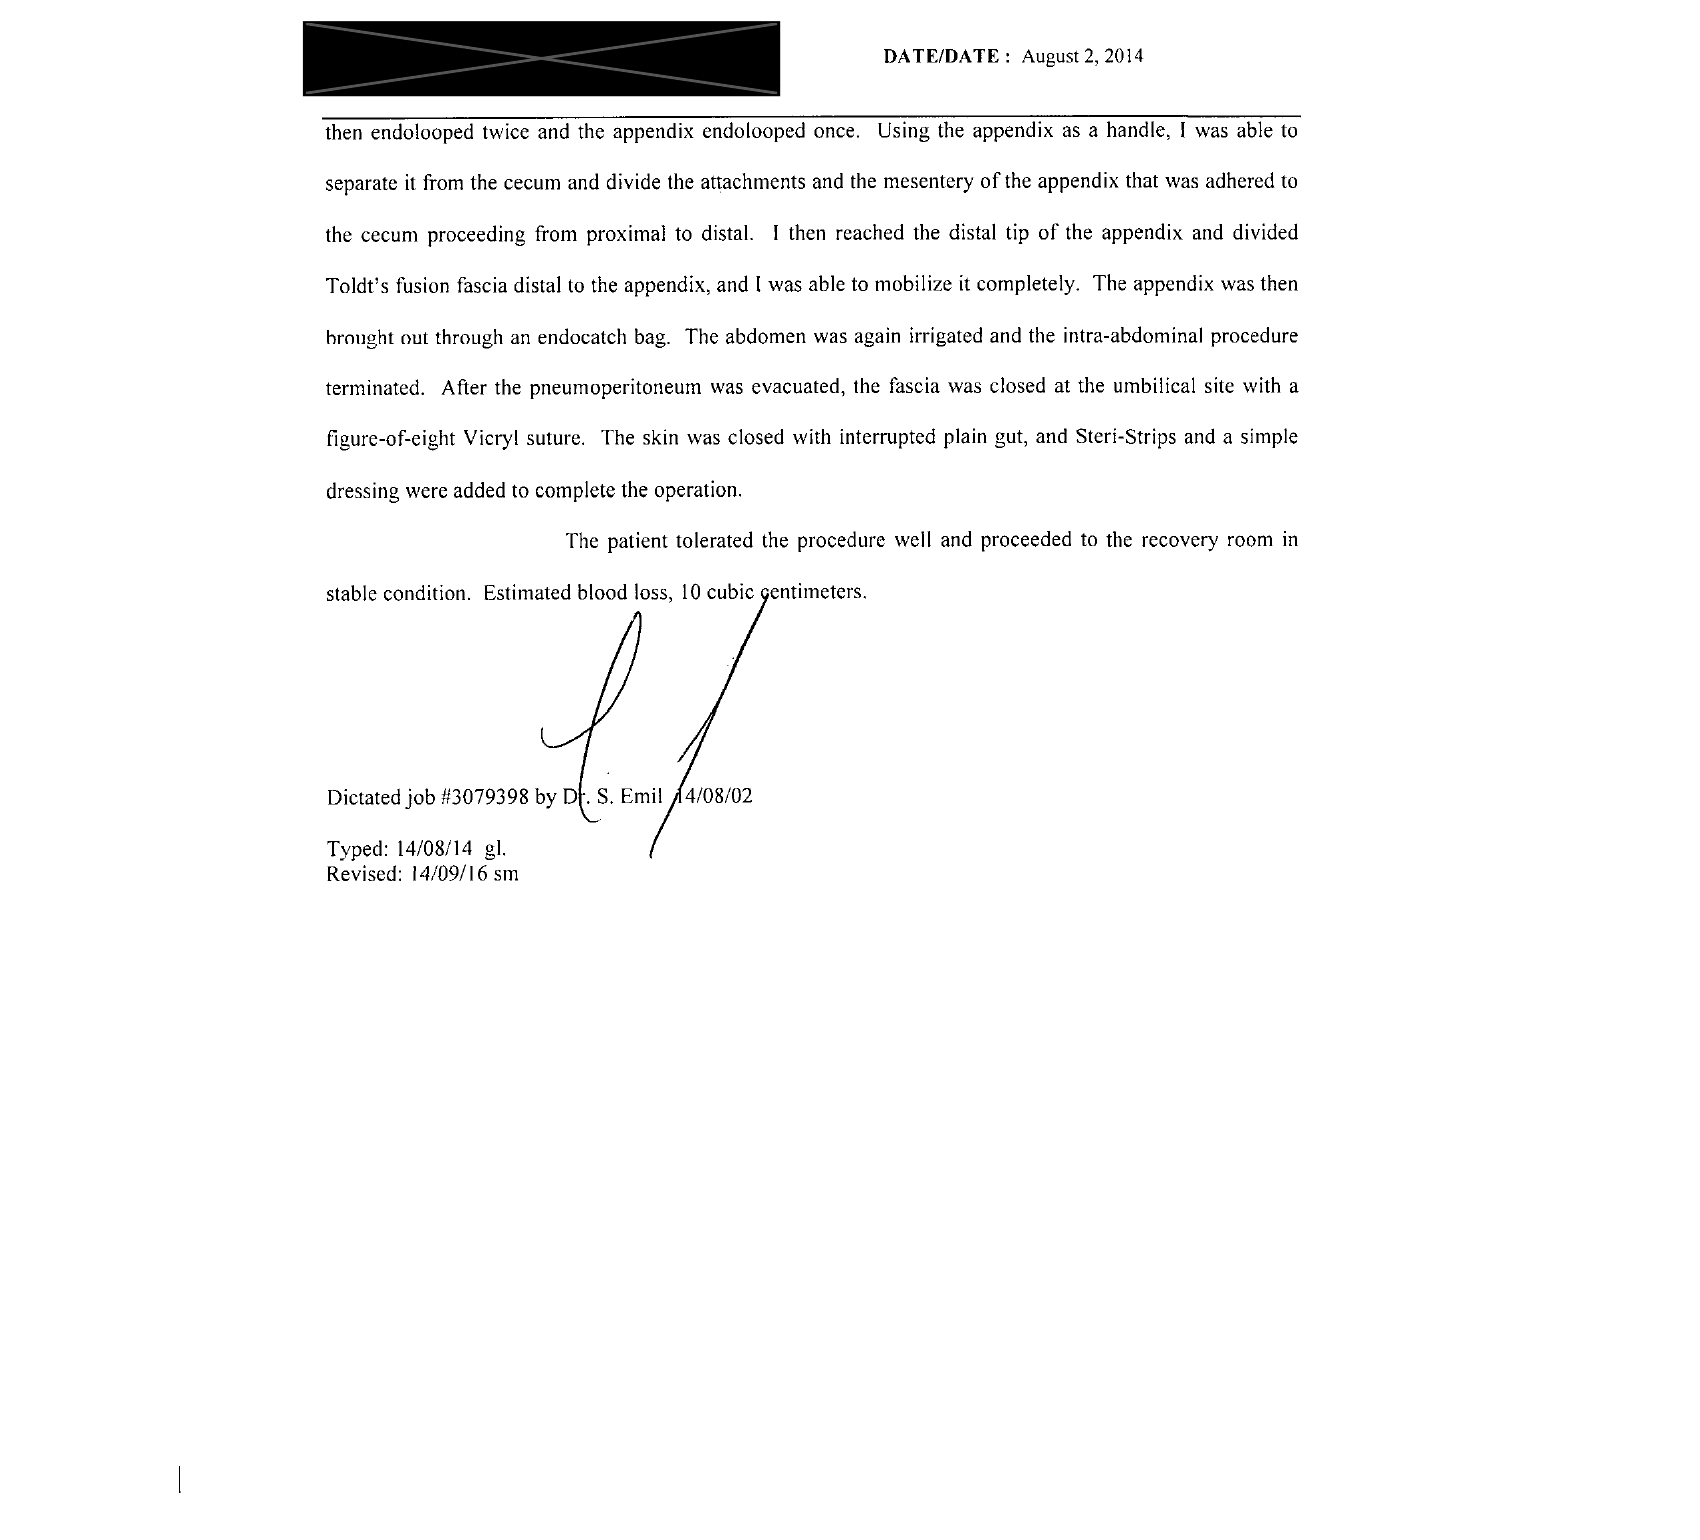

Cropping 80 O_1.png


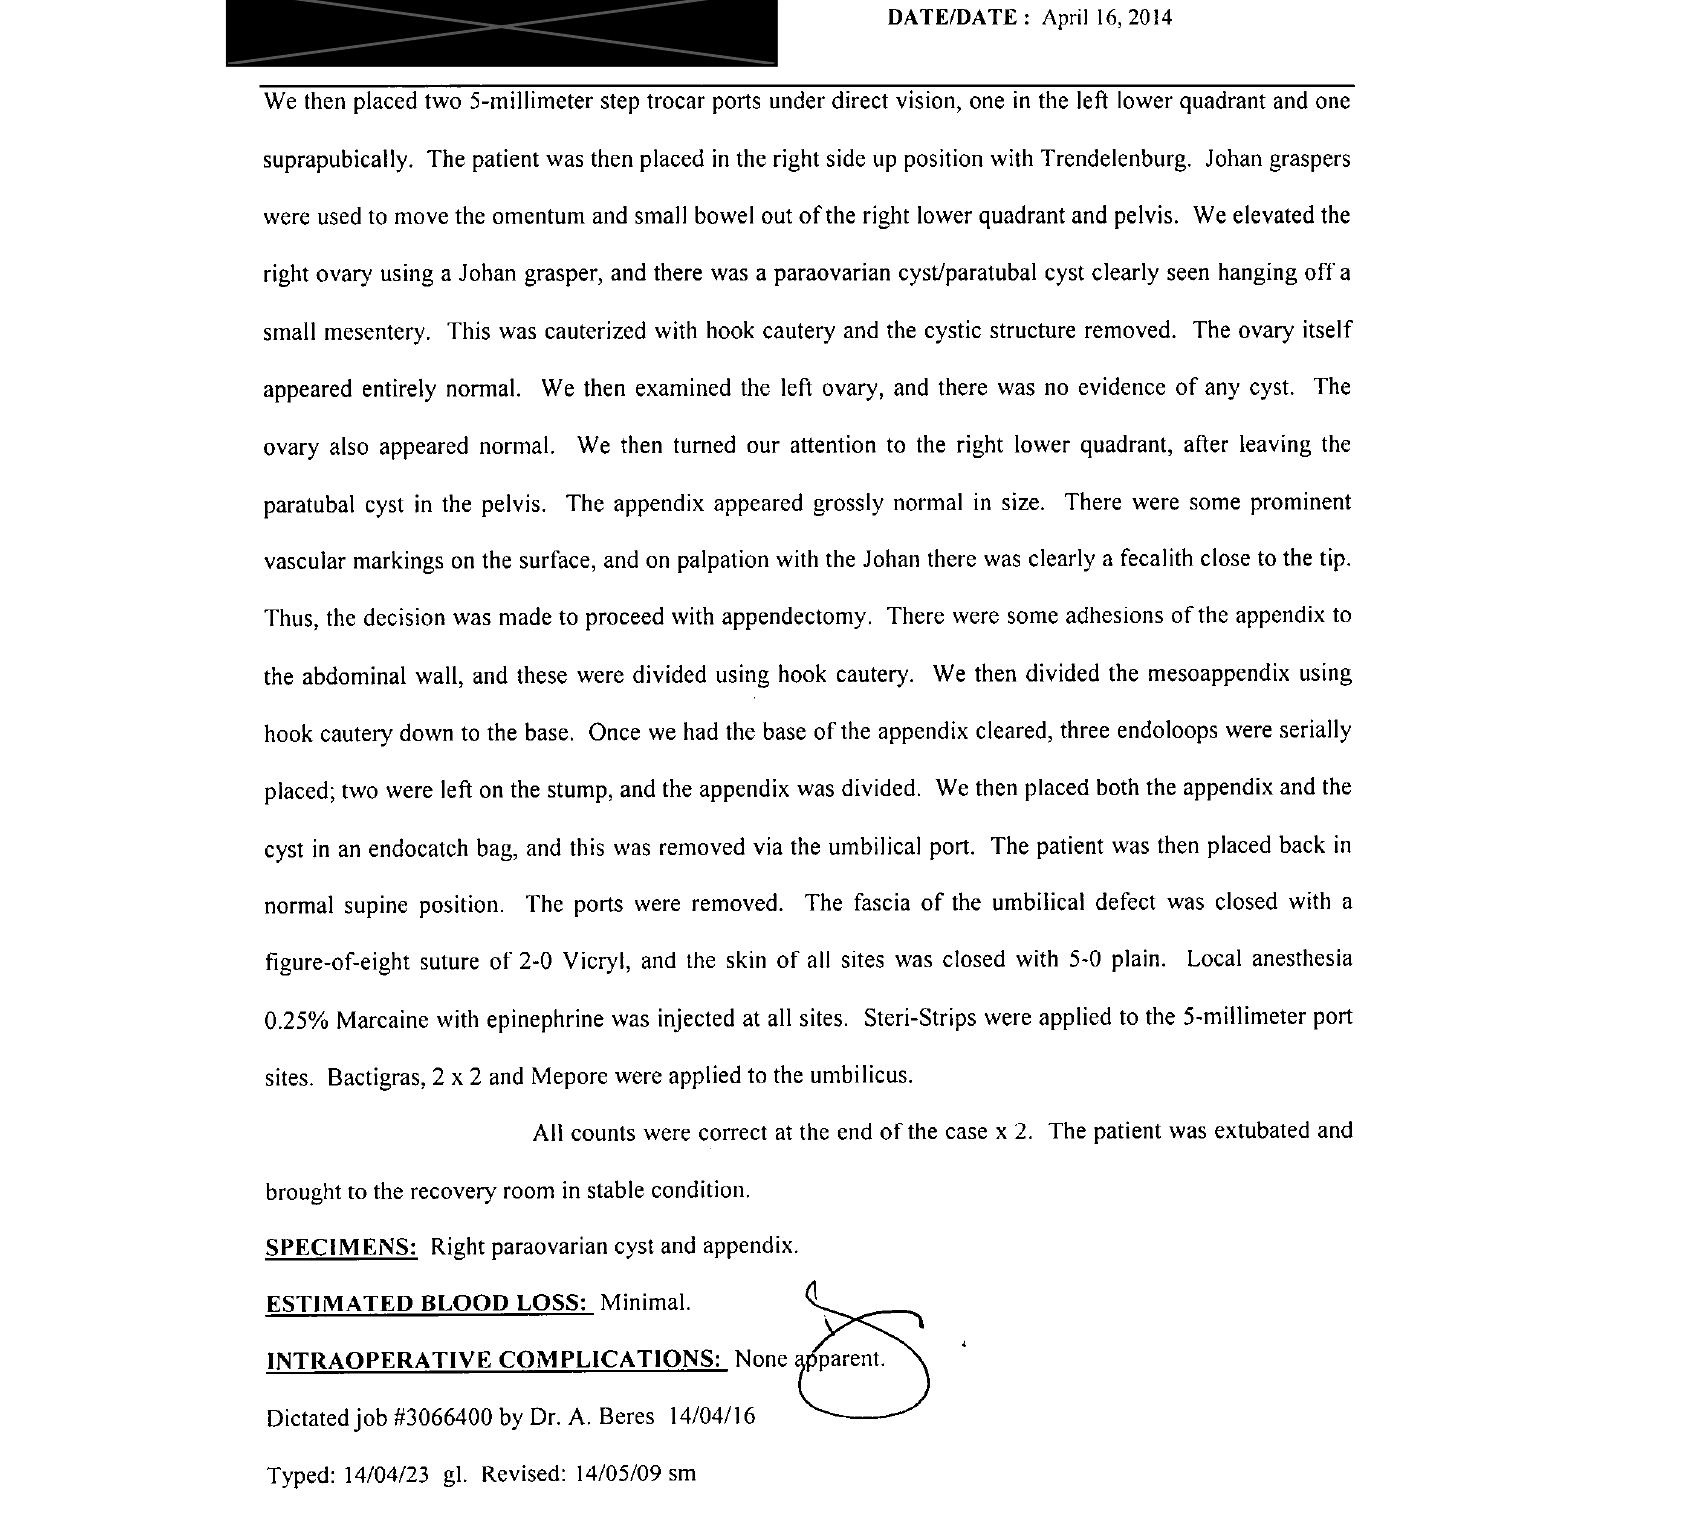

Cropping 89 O_1.png


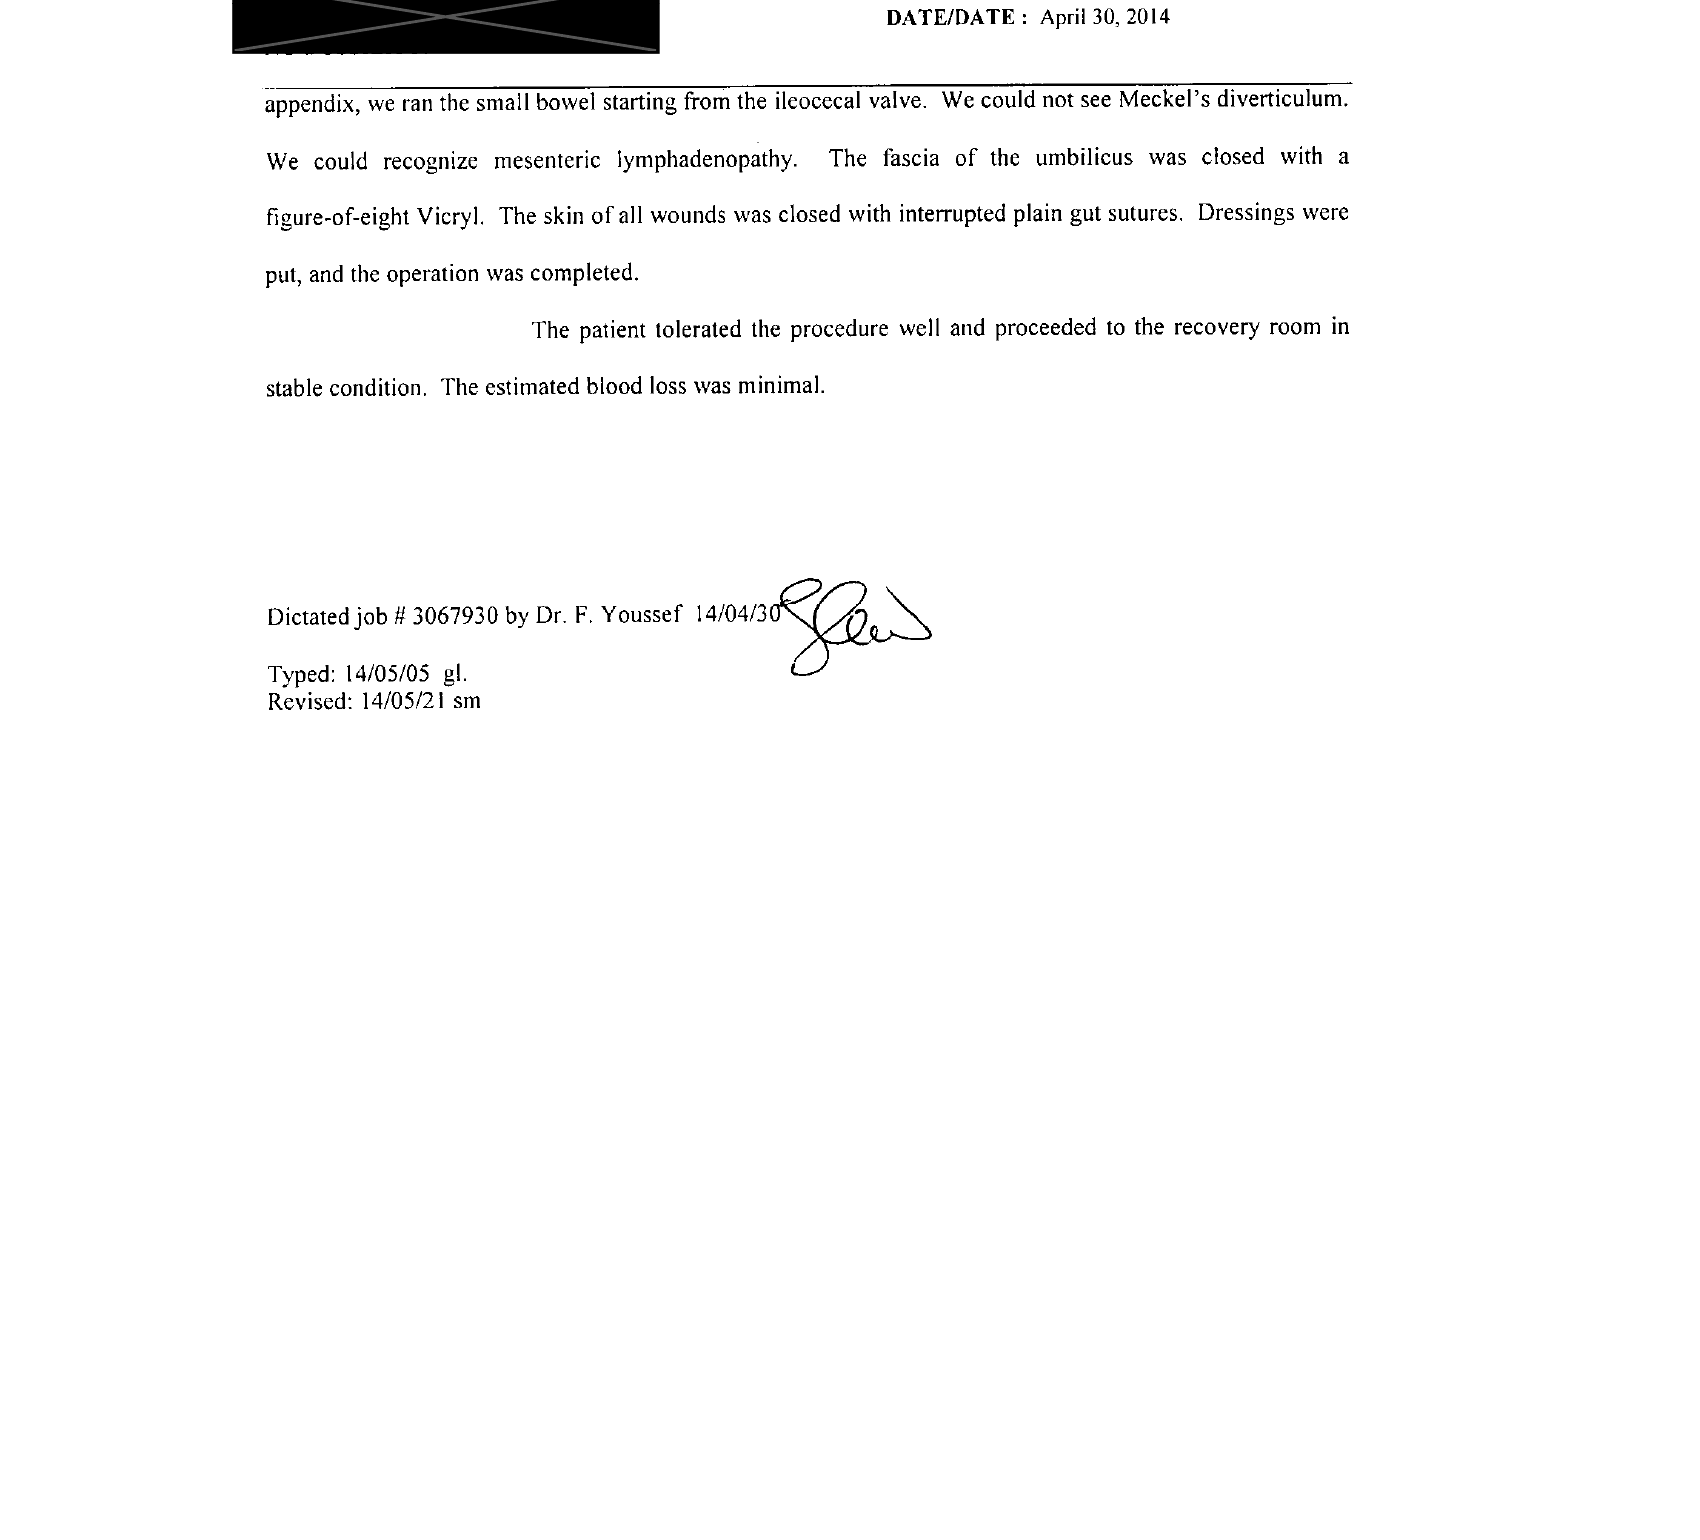

Cropping 182 O_1.png


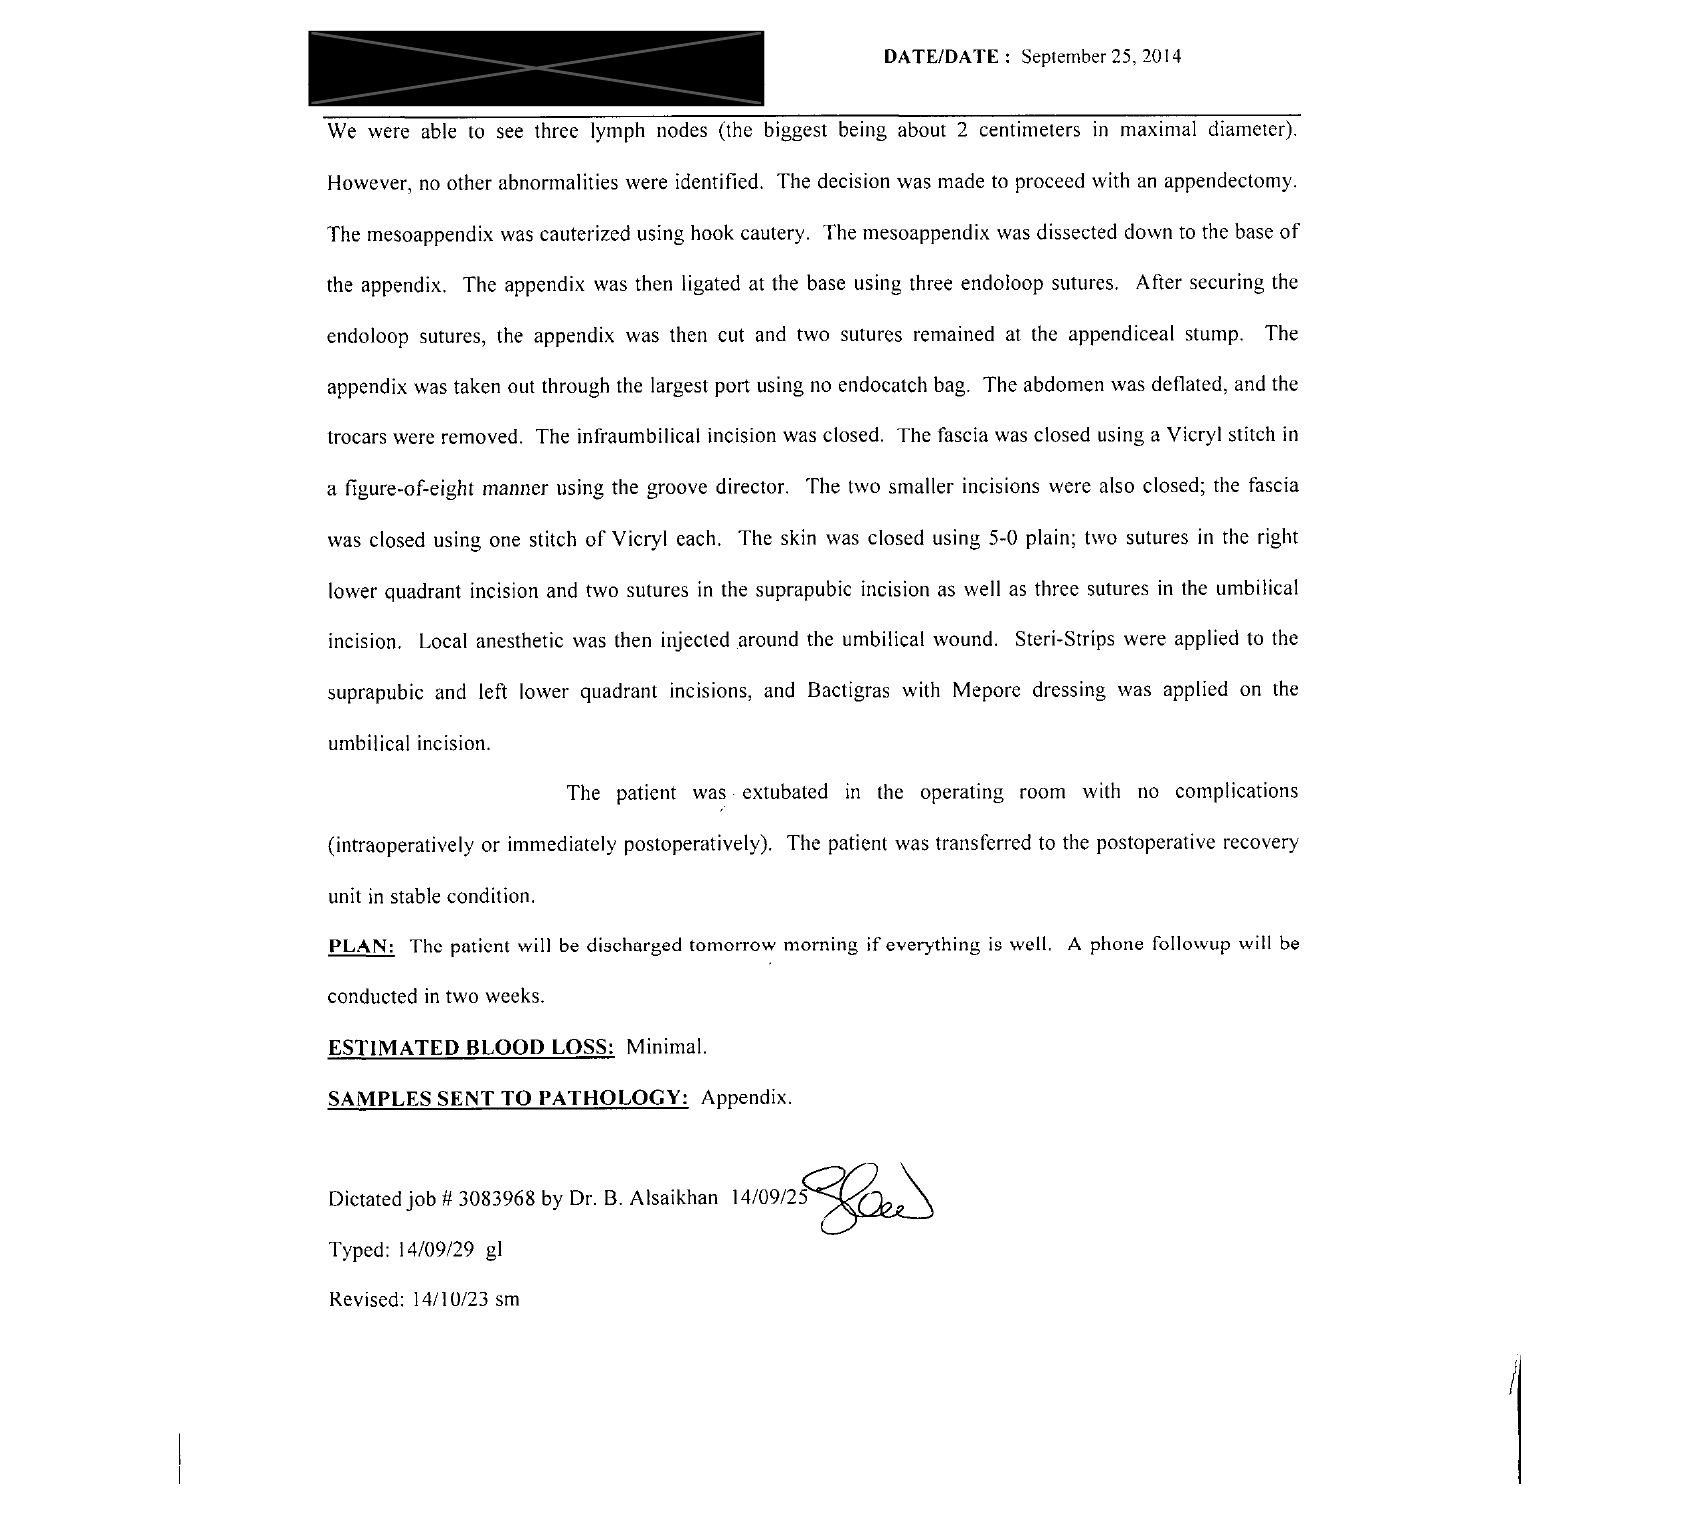

Cropping 168 O_1.png


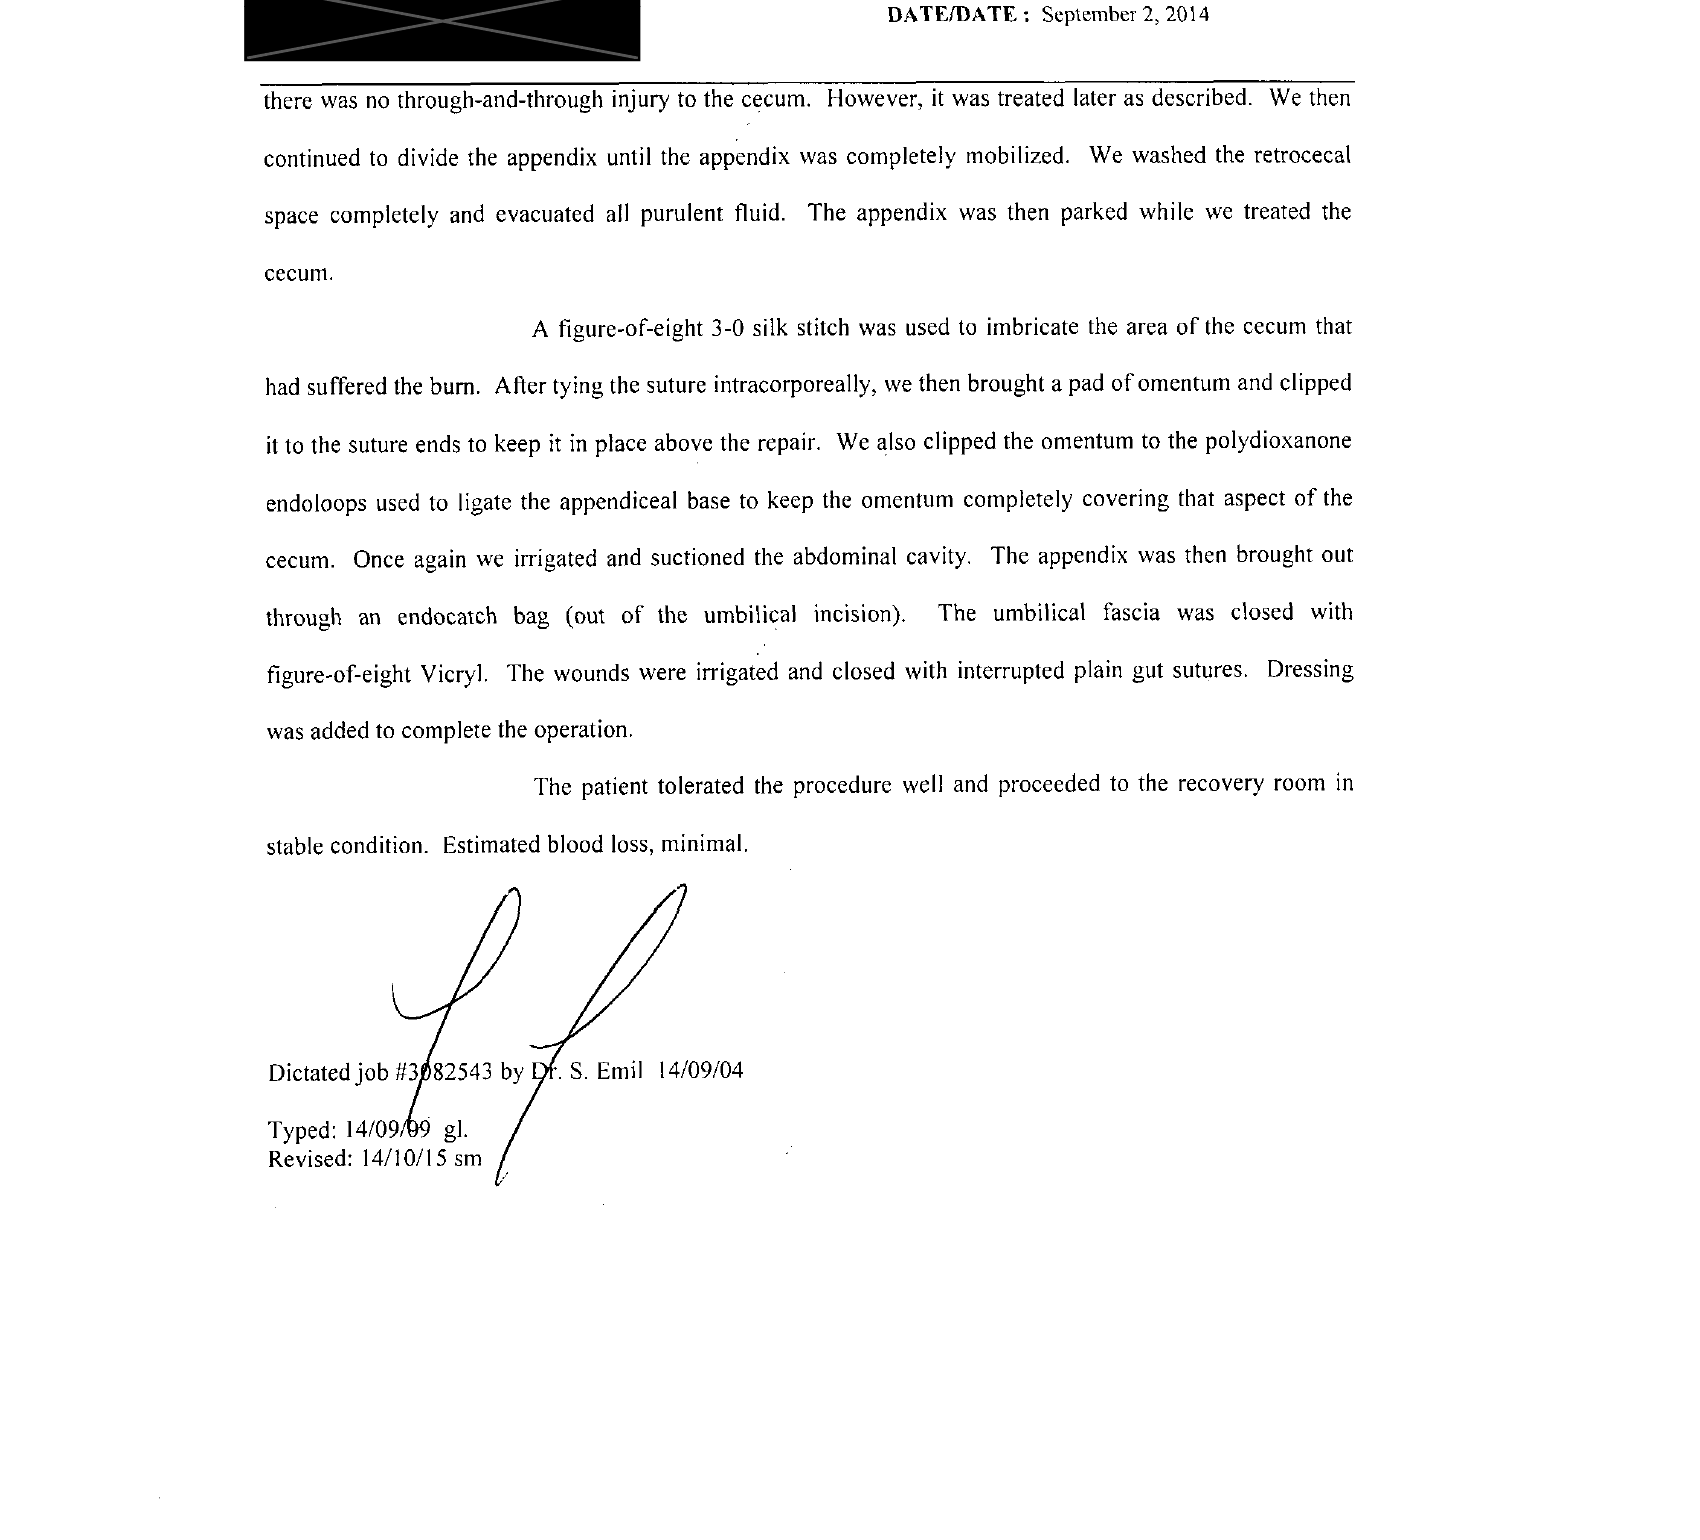

Cropping 103 O_1.png


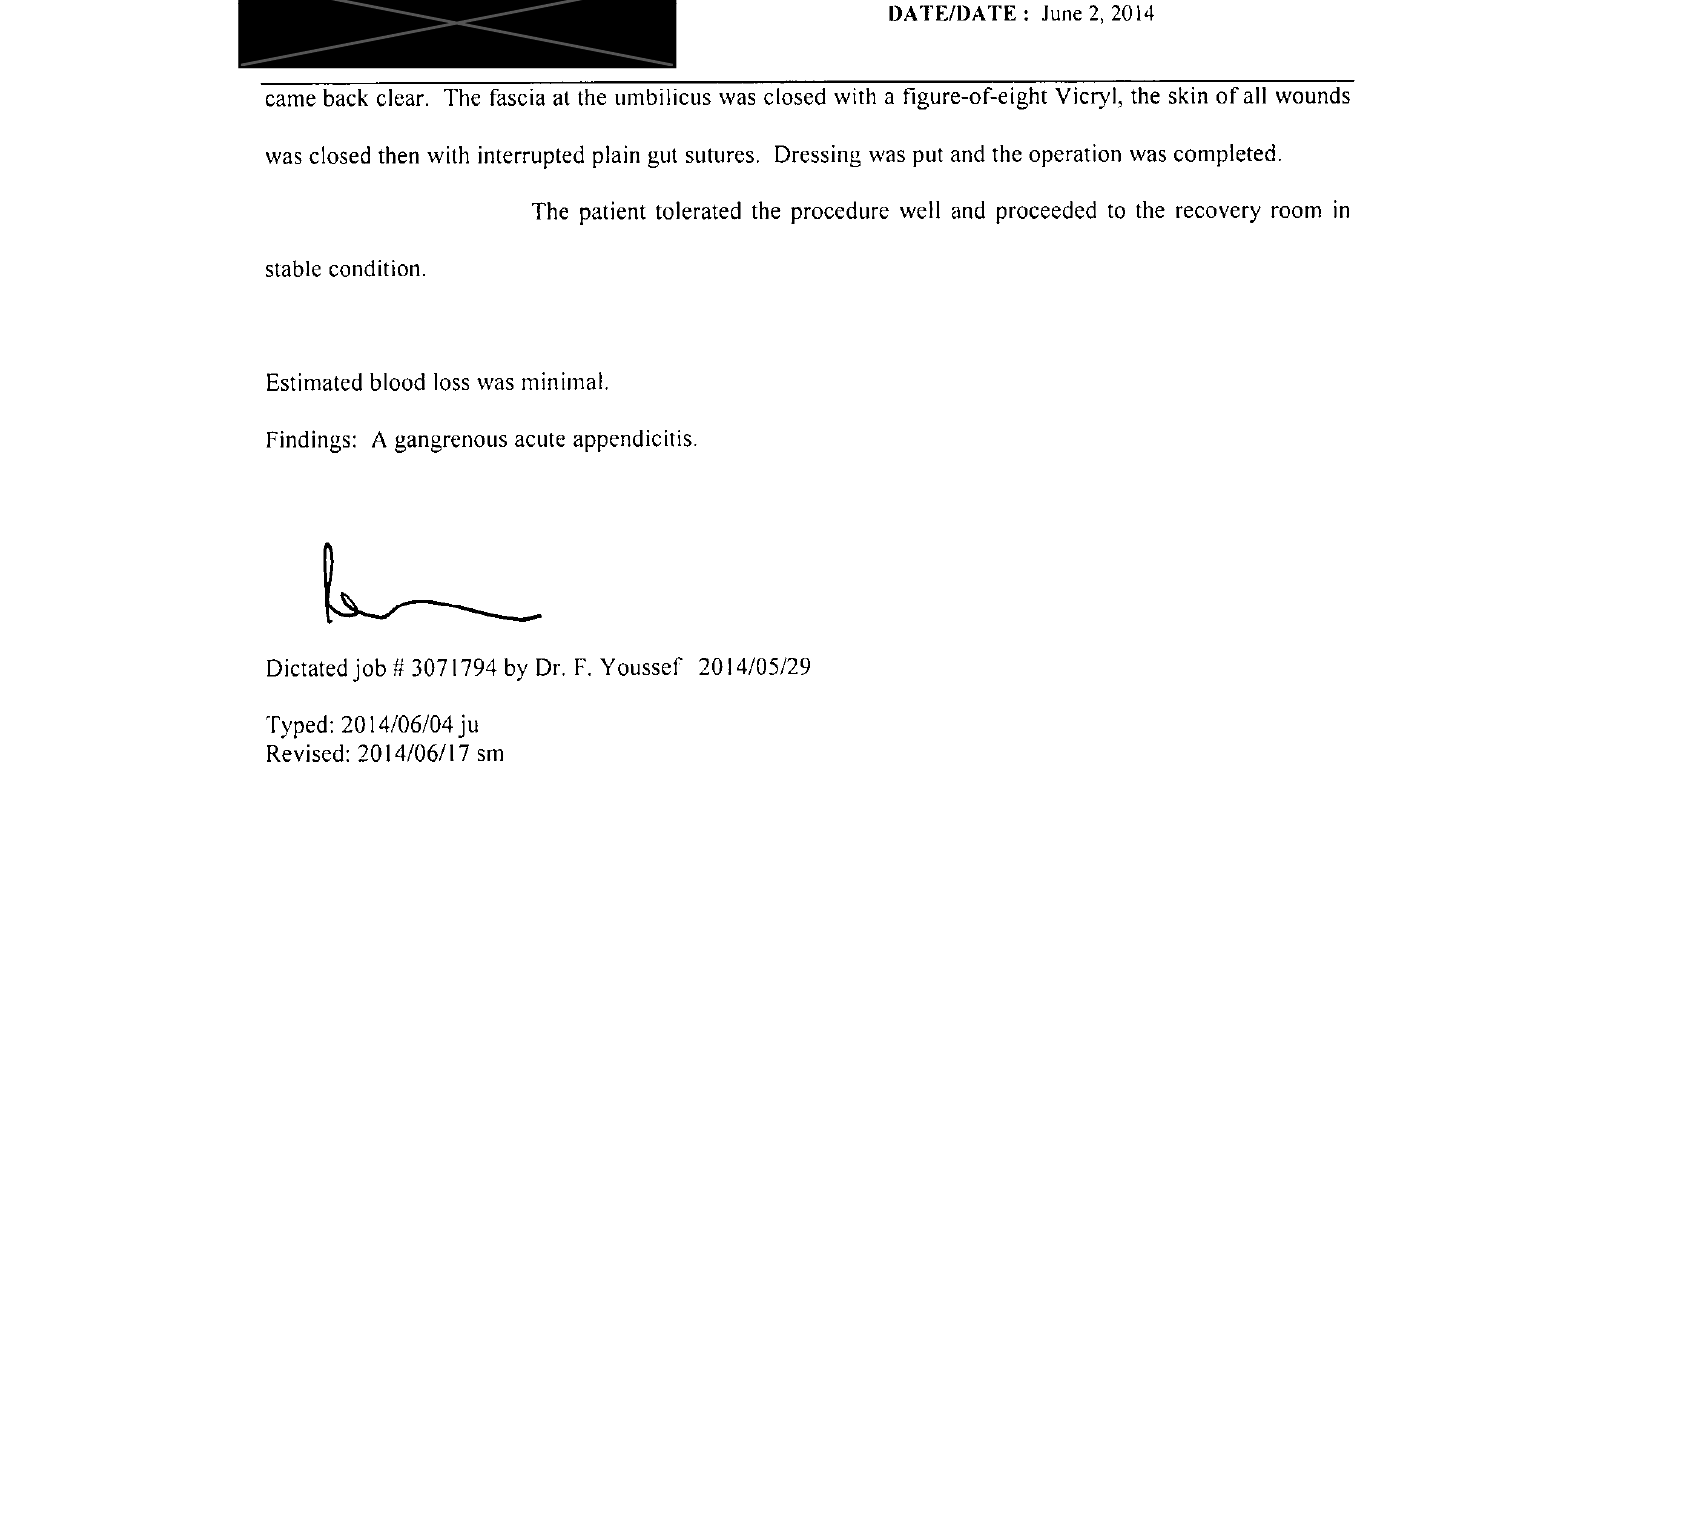

Cropping 92 O_1.png


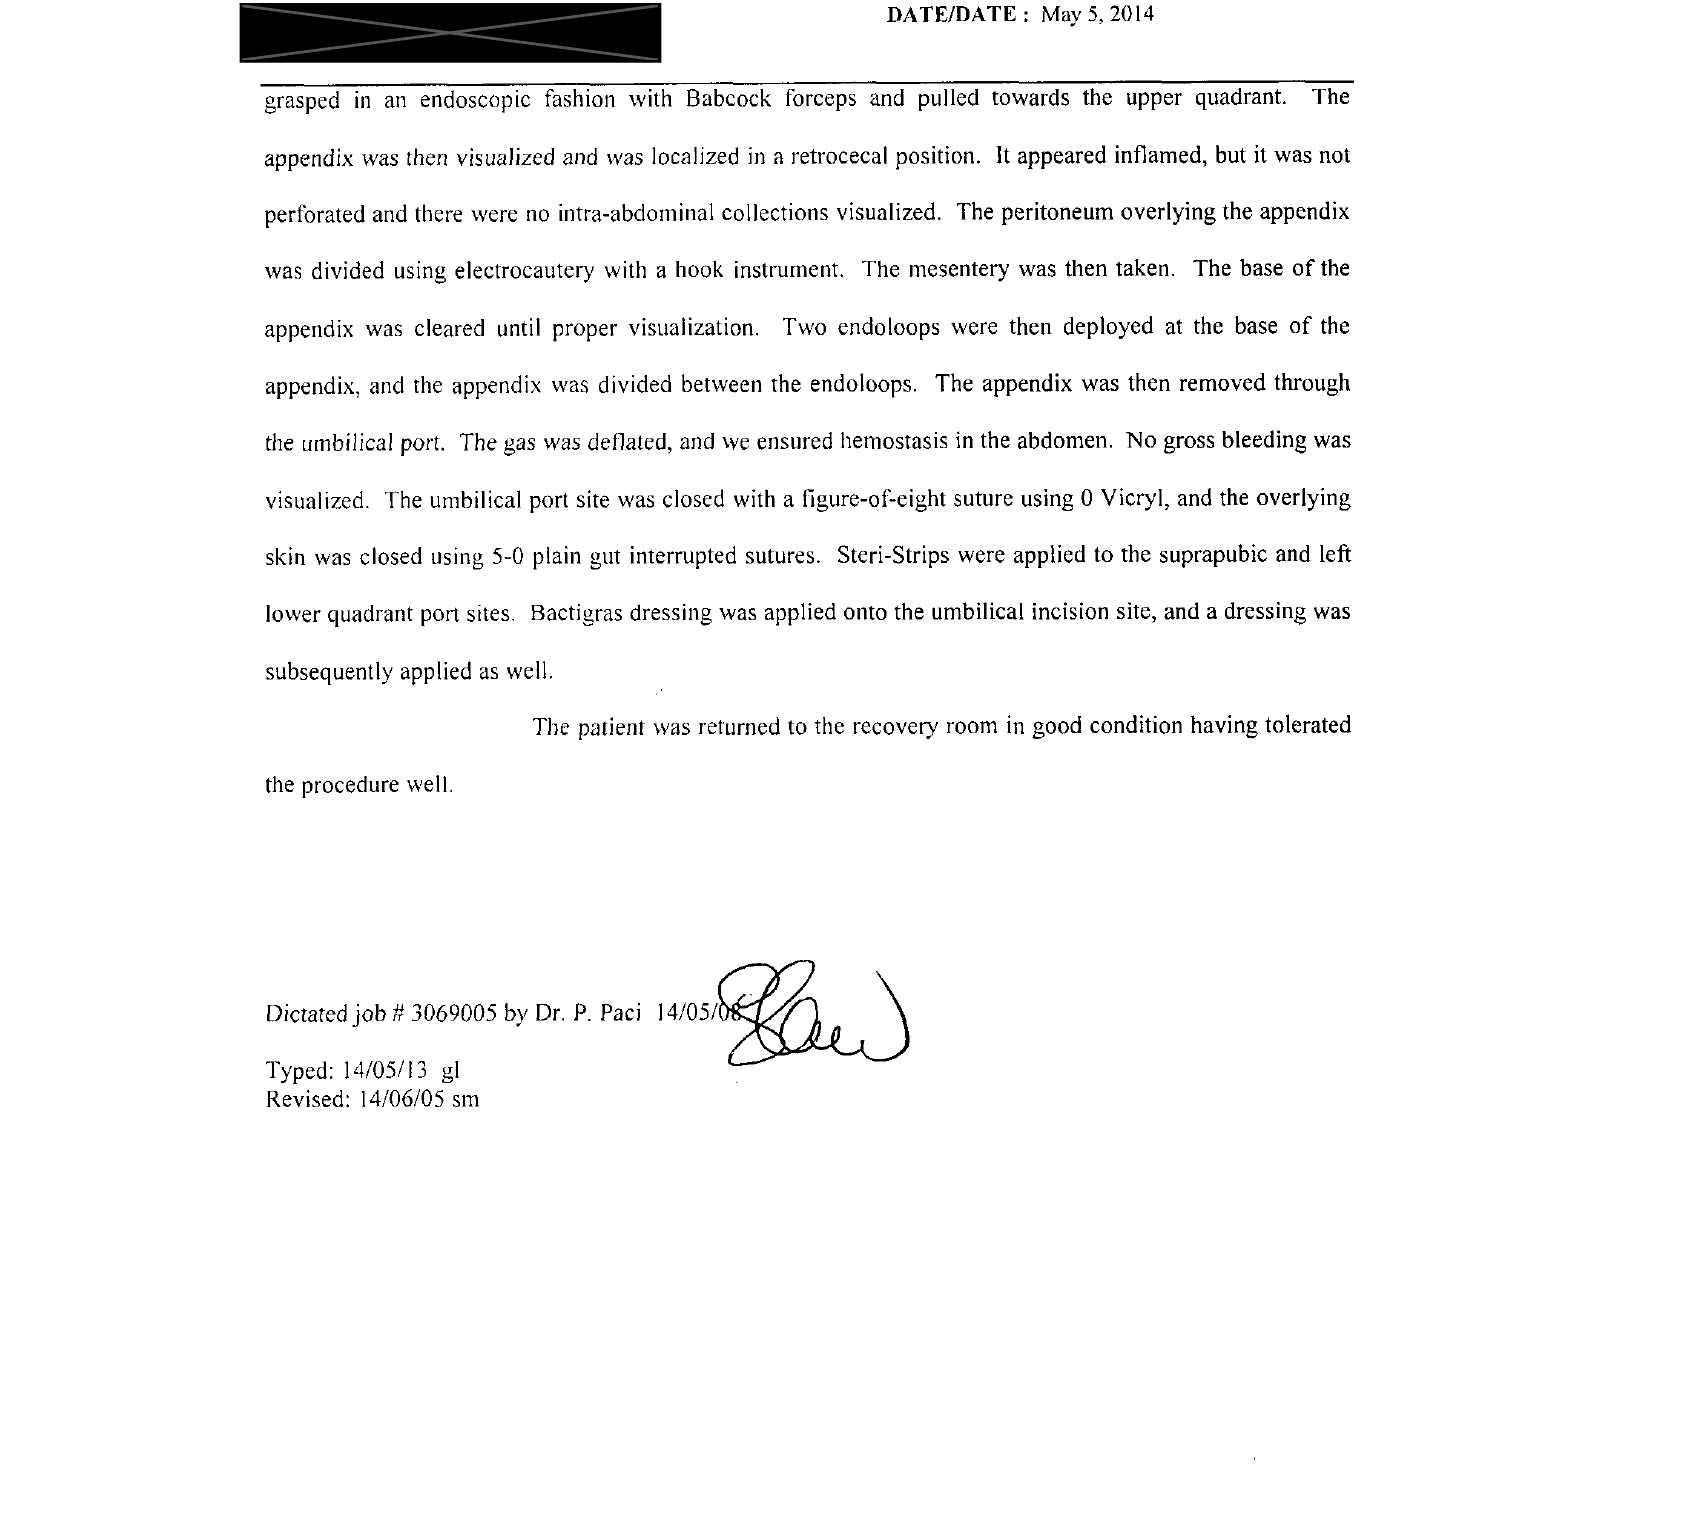

Cropping 161 O_1.png


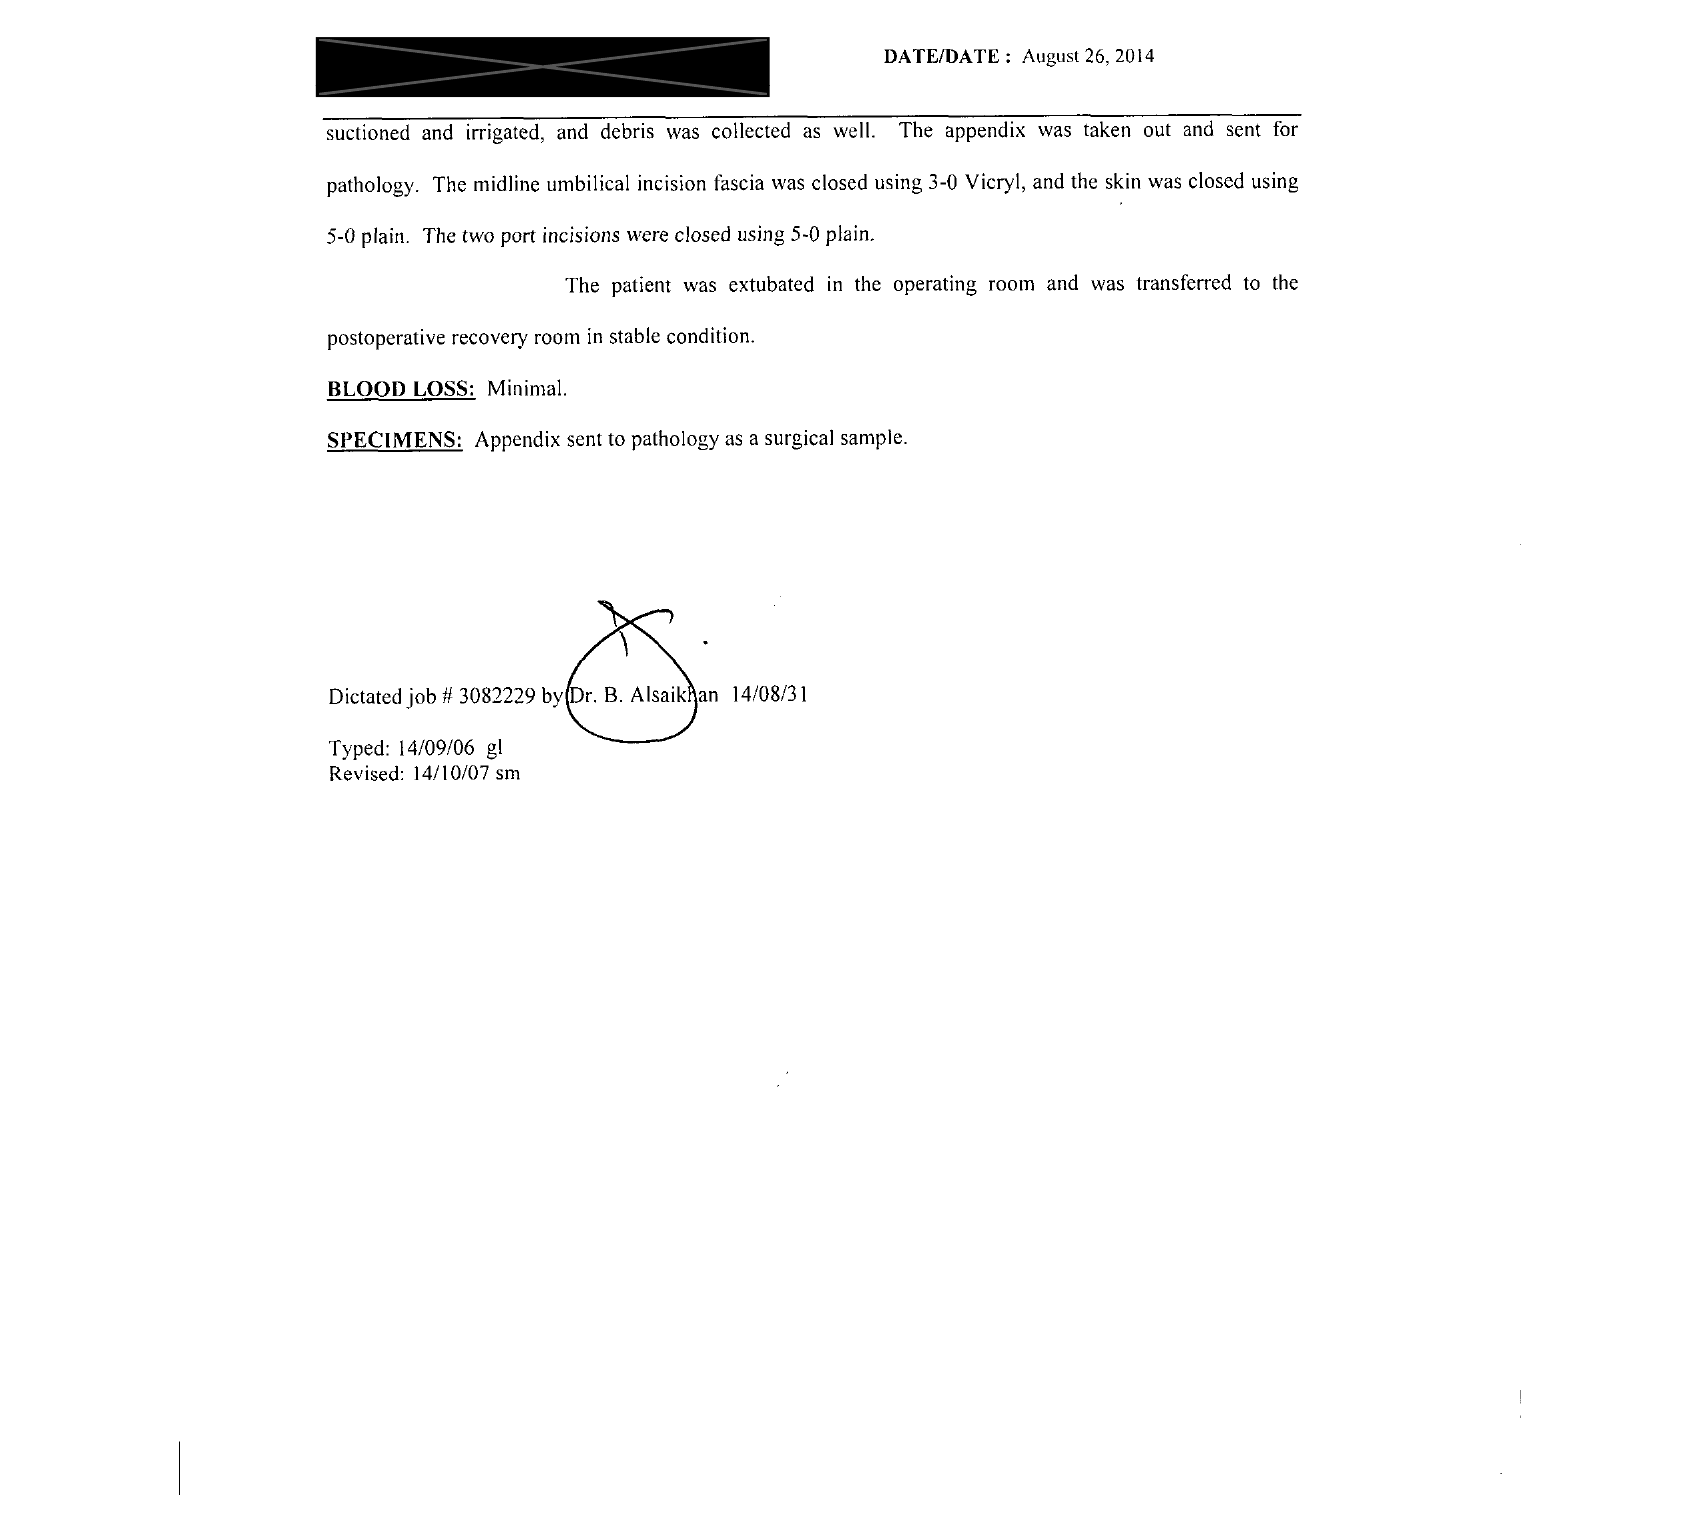

Cropping 86 O_1.png


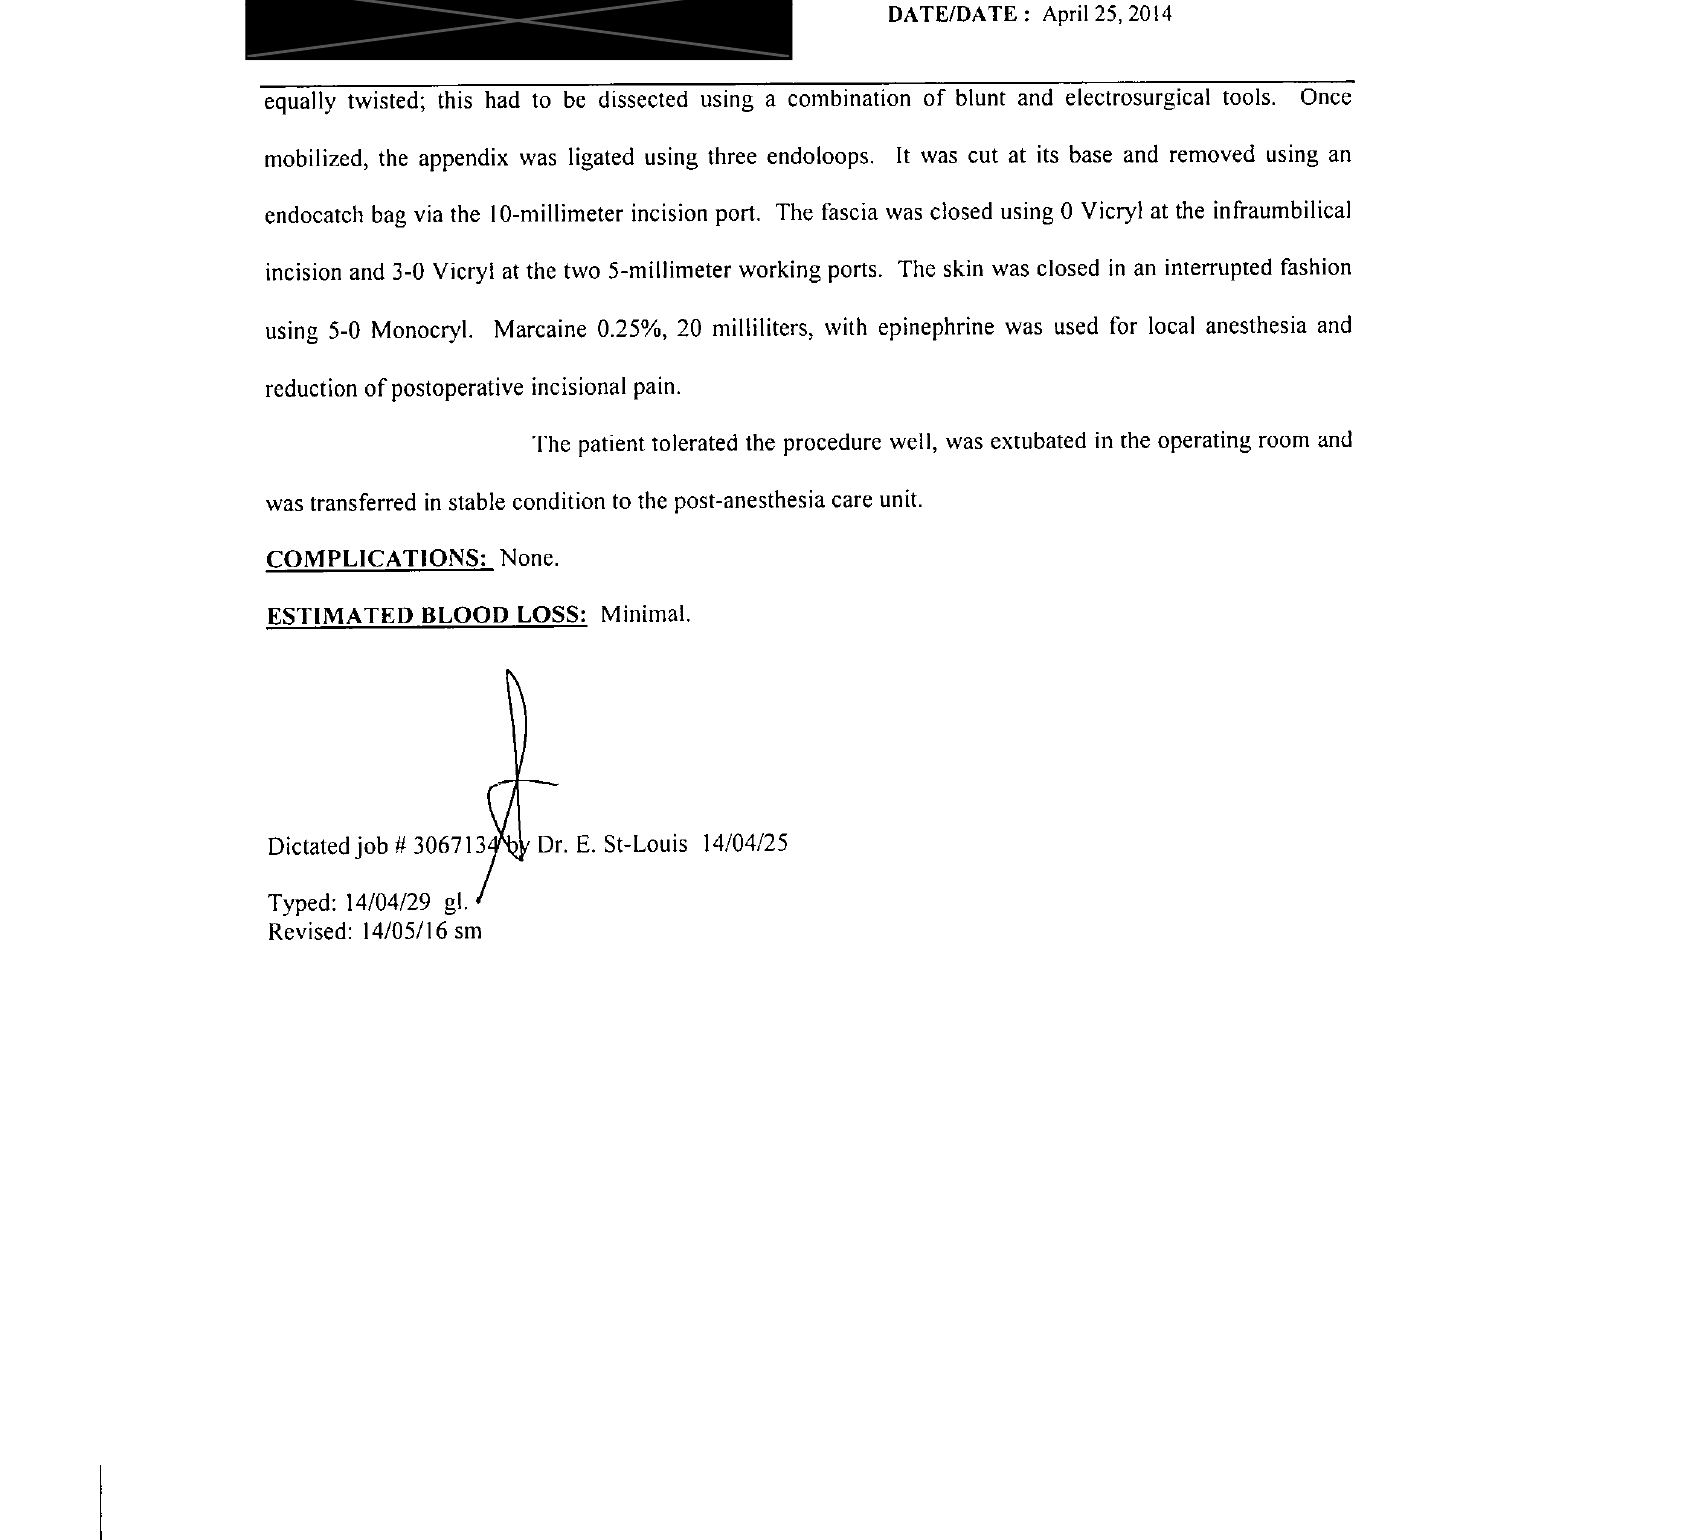

Cropping 53 O_1.png


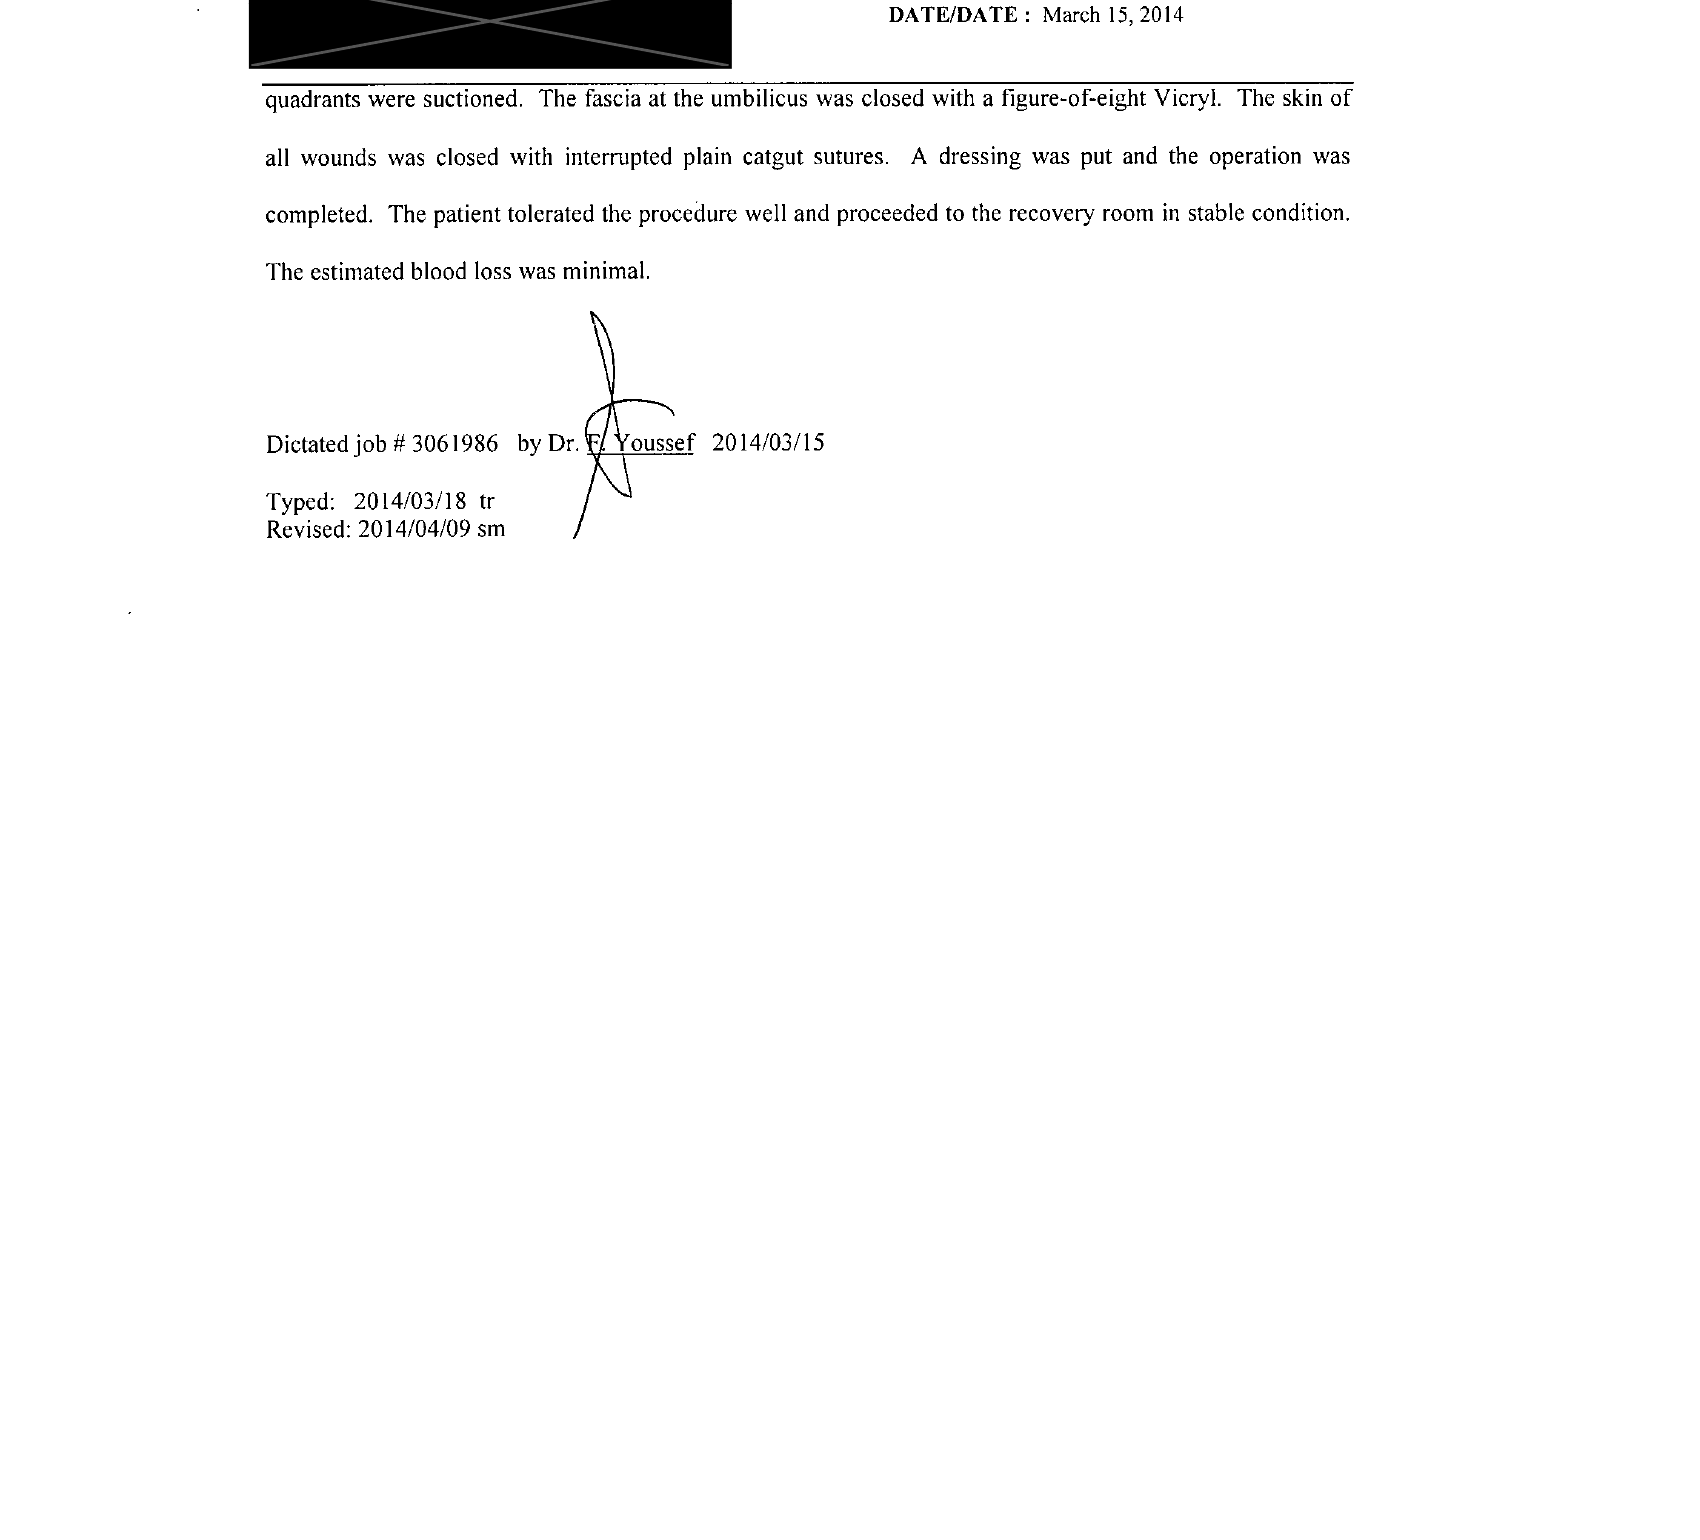

Cropping 143 O_1.png


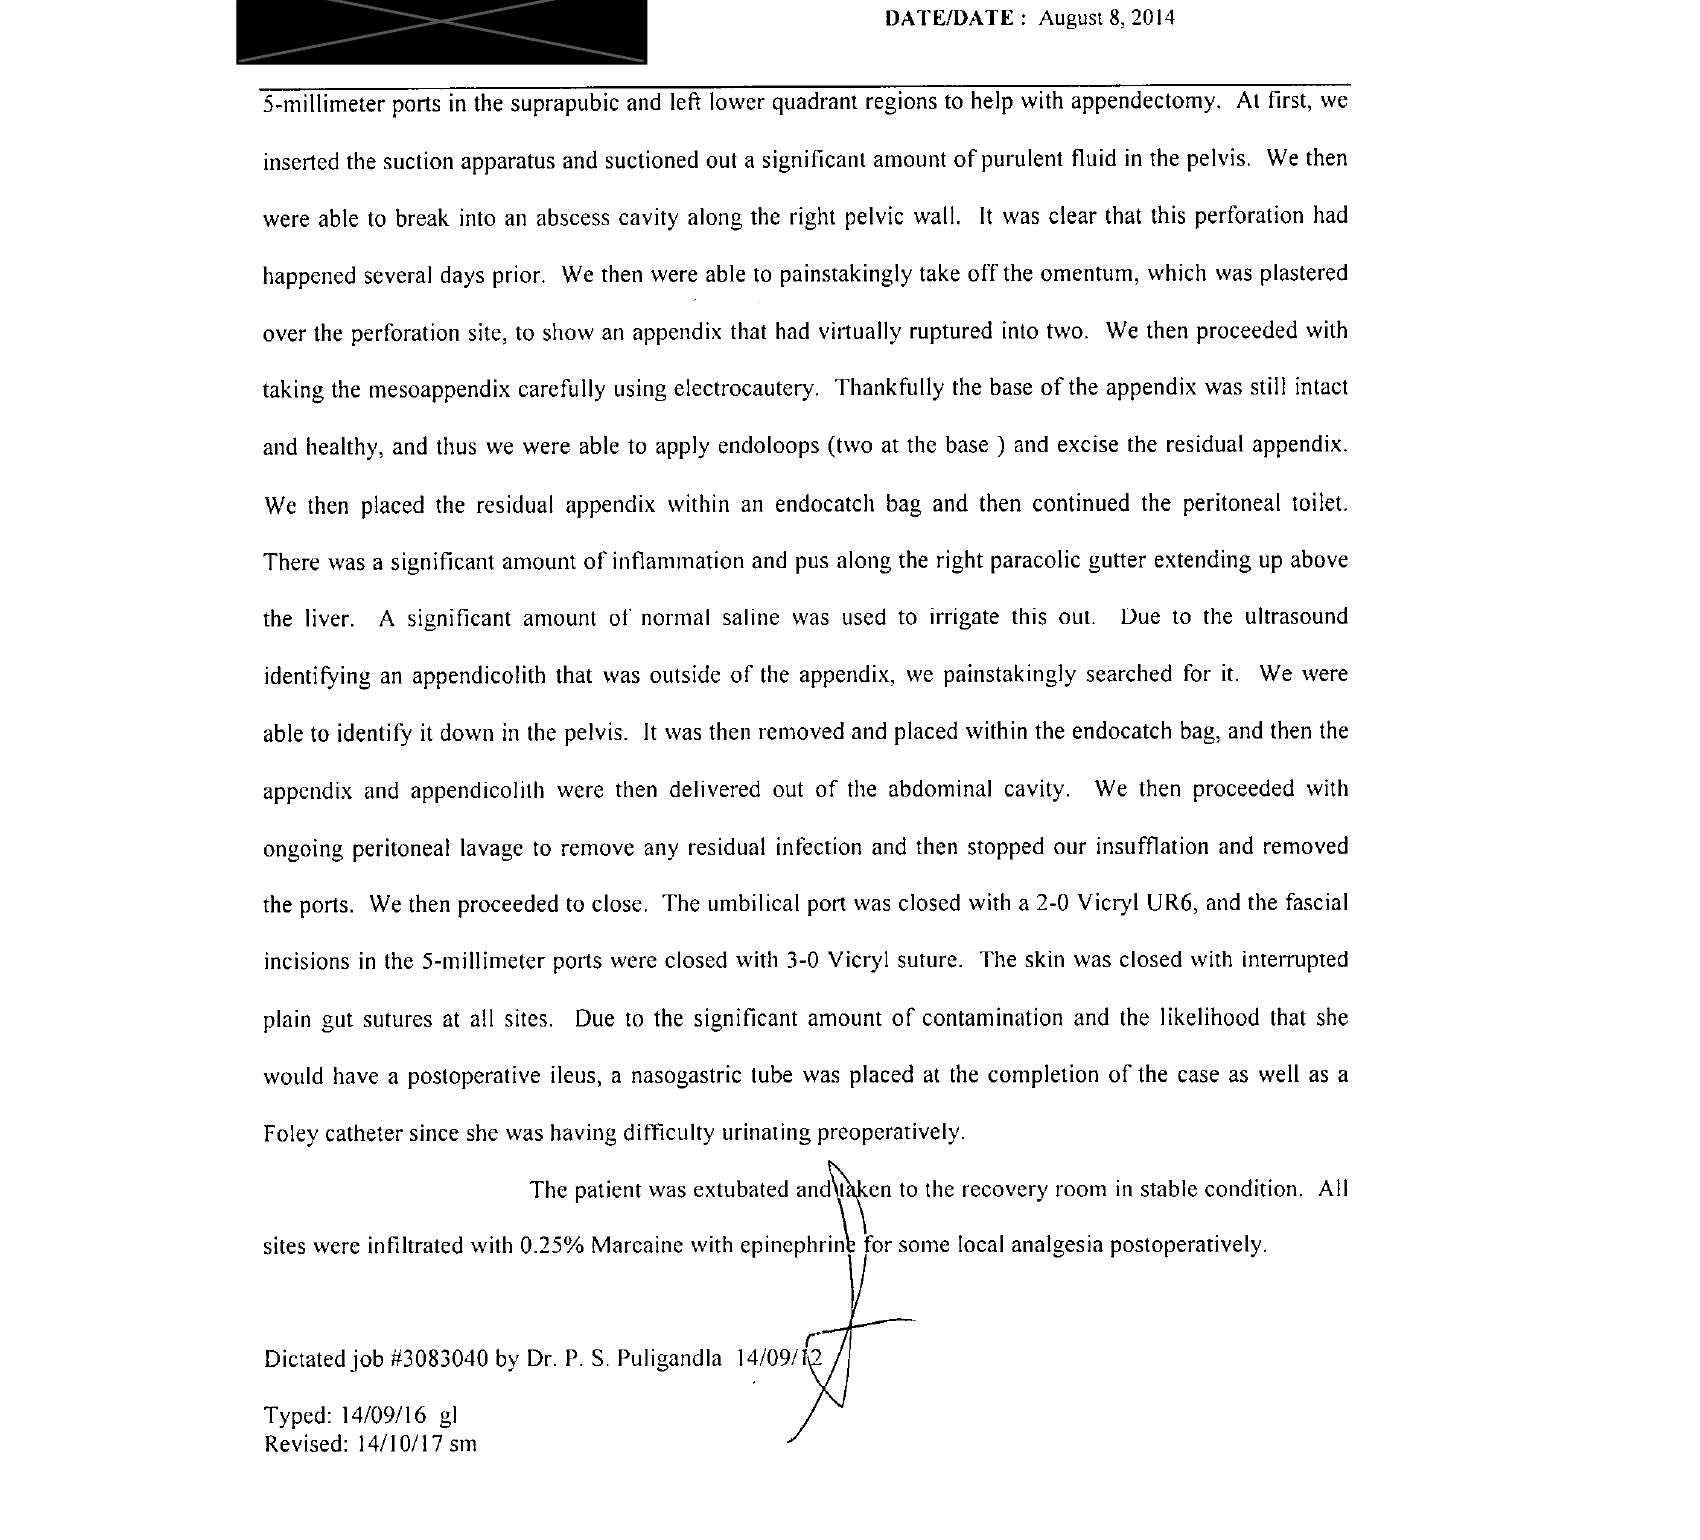

Cropping 164 O_1.png


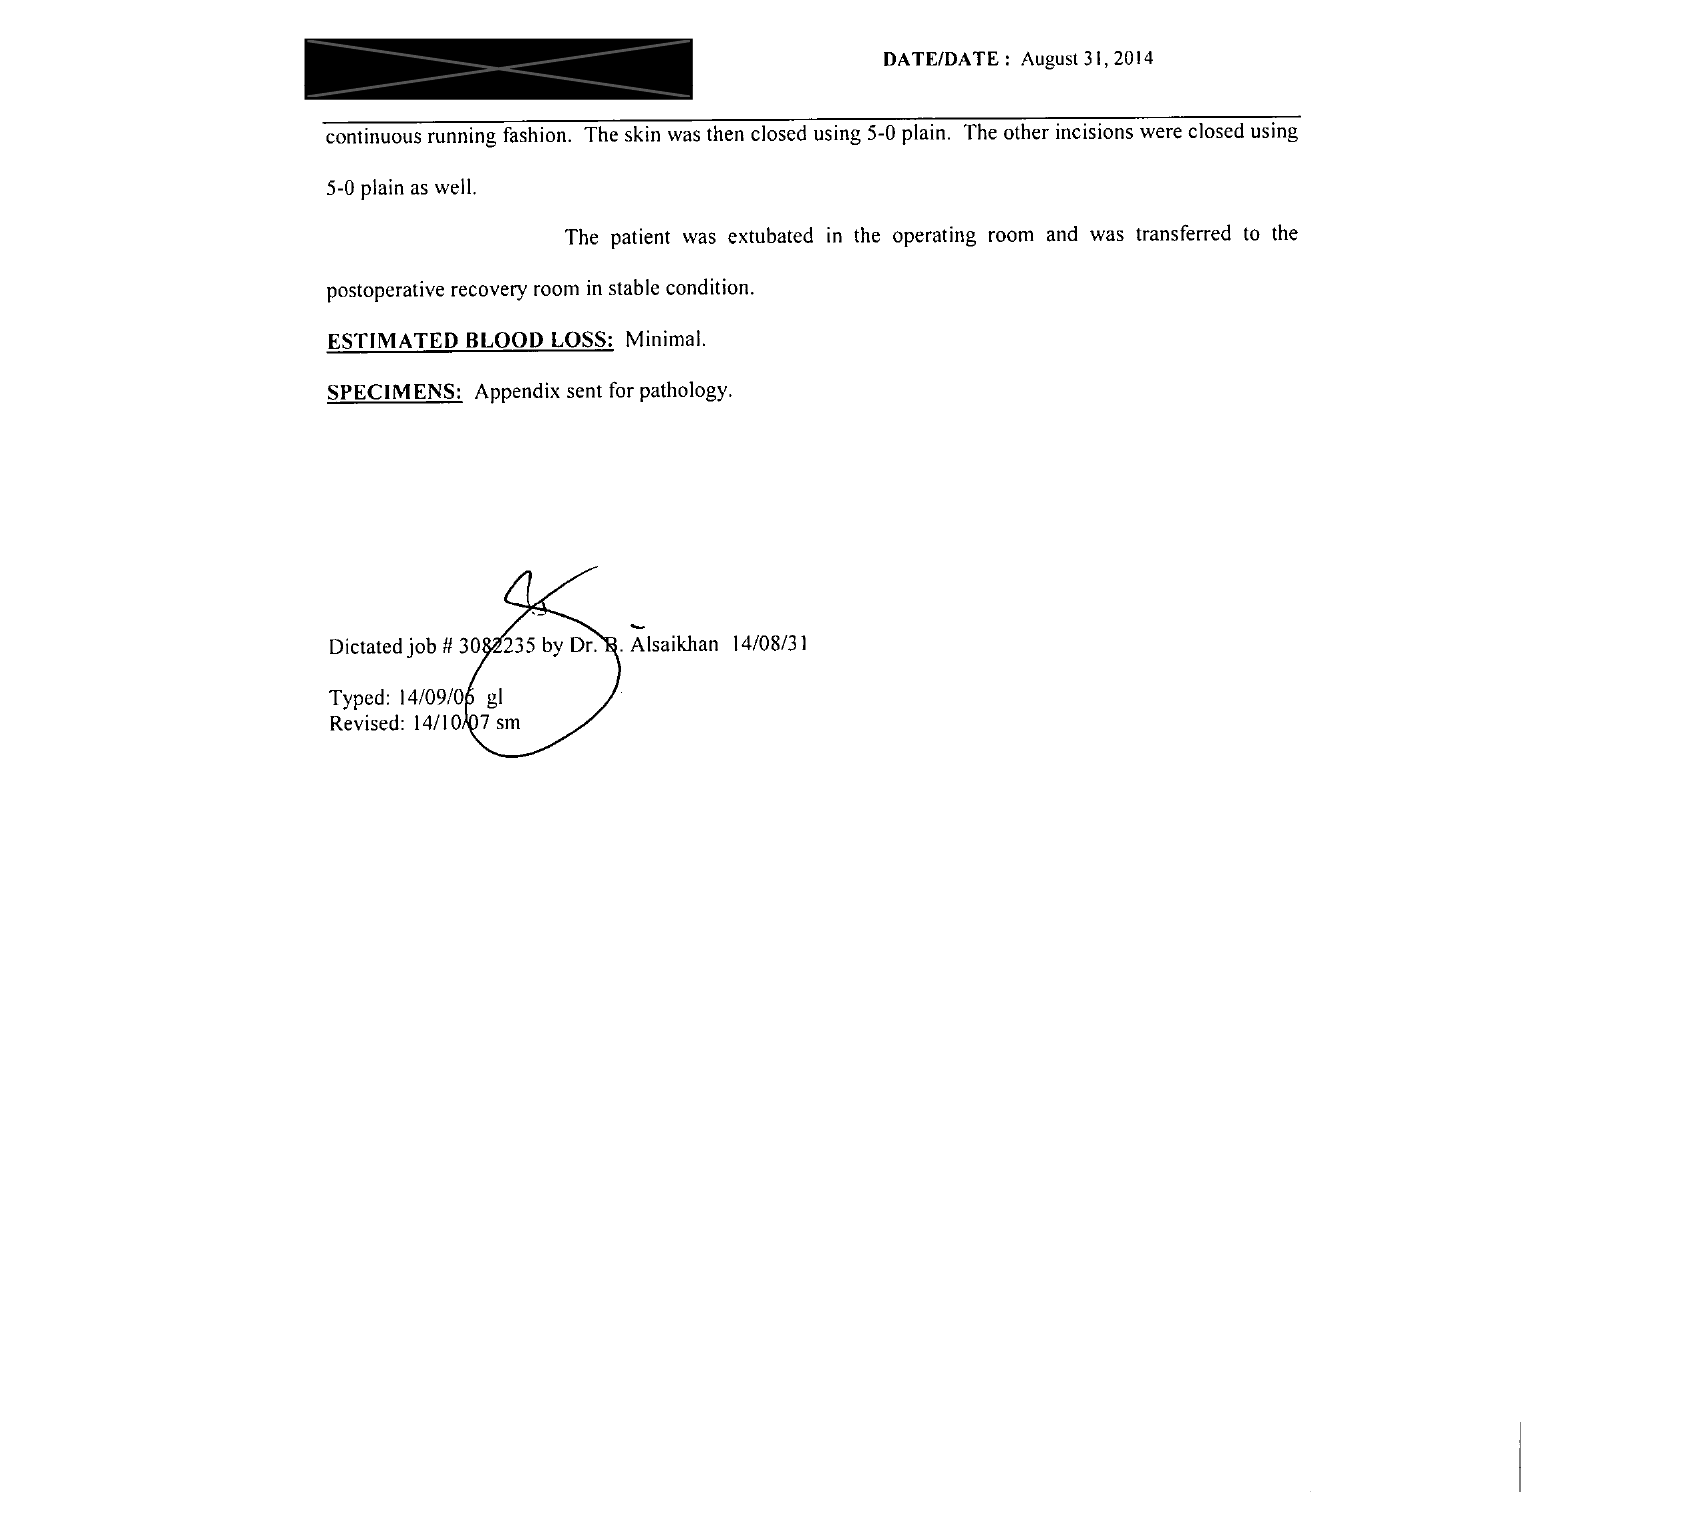

Cropping 82 O_1.png


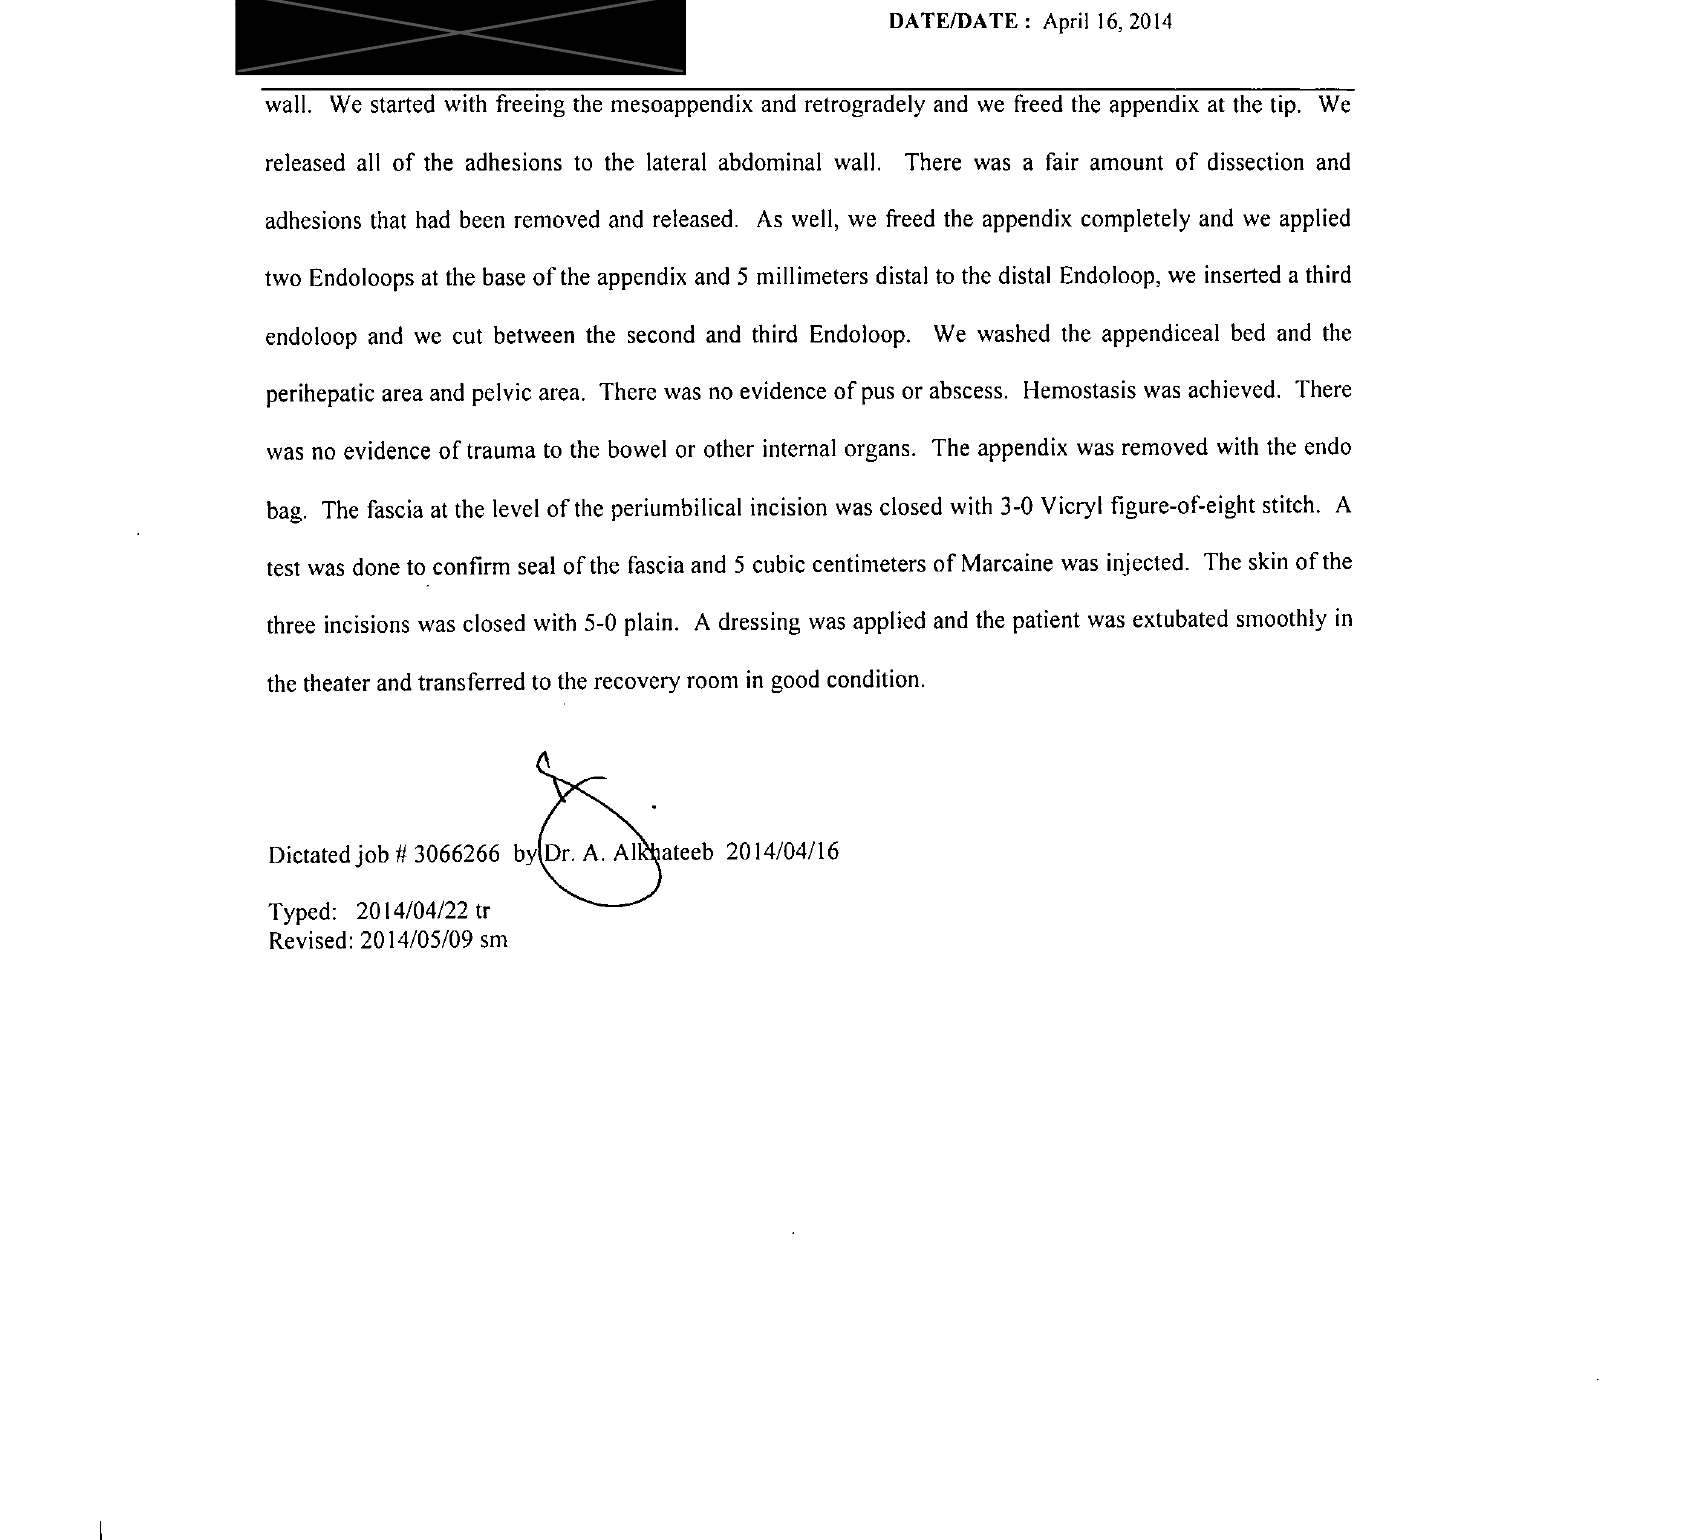

Cropping 159 O_1.png


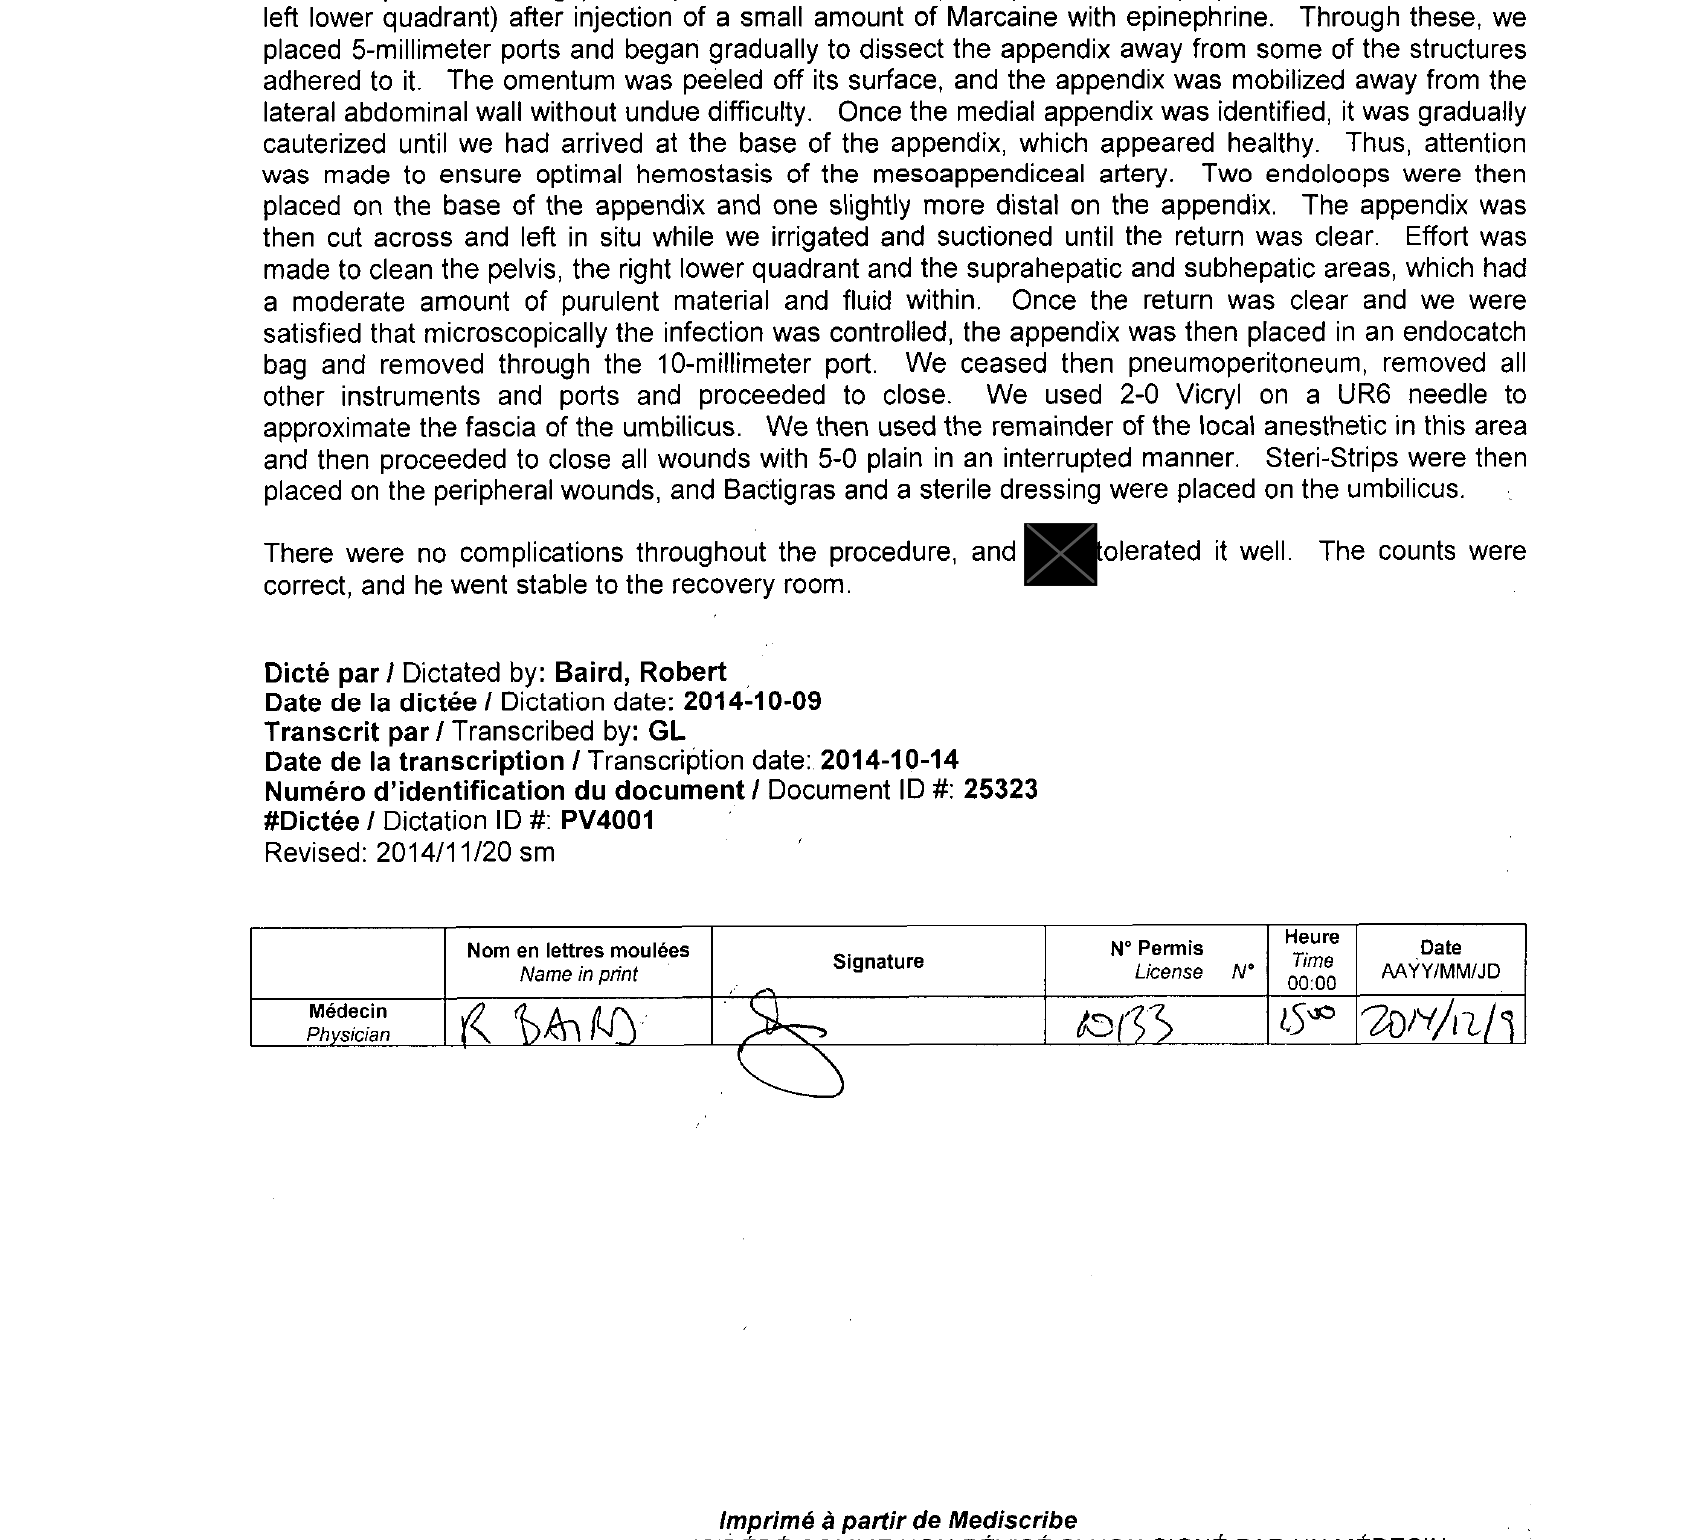

Cropping 145 O_1.png


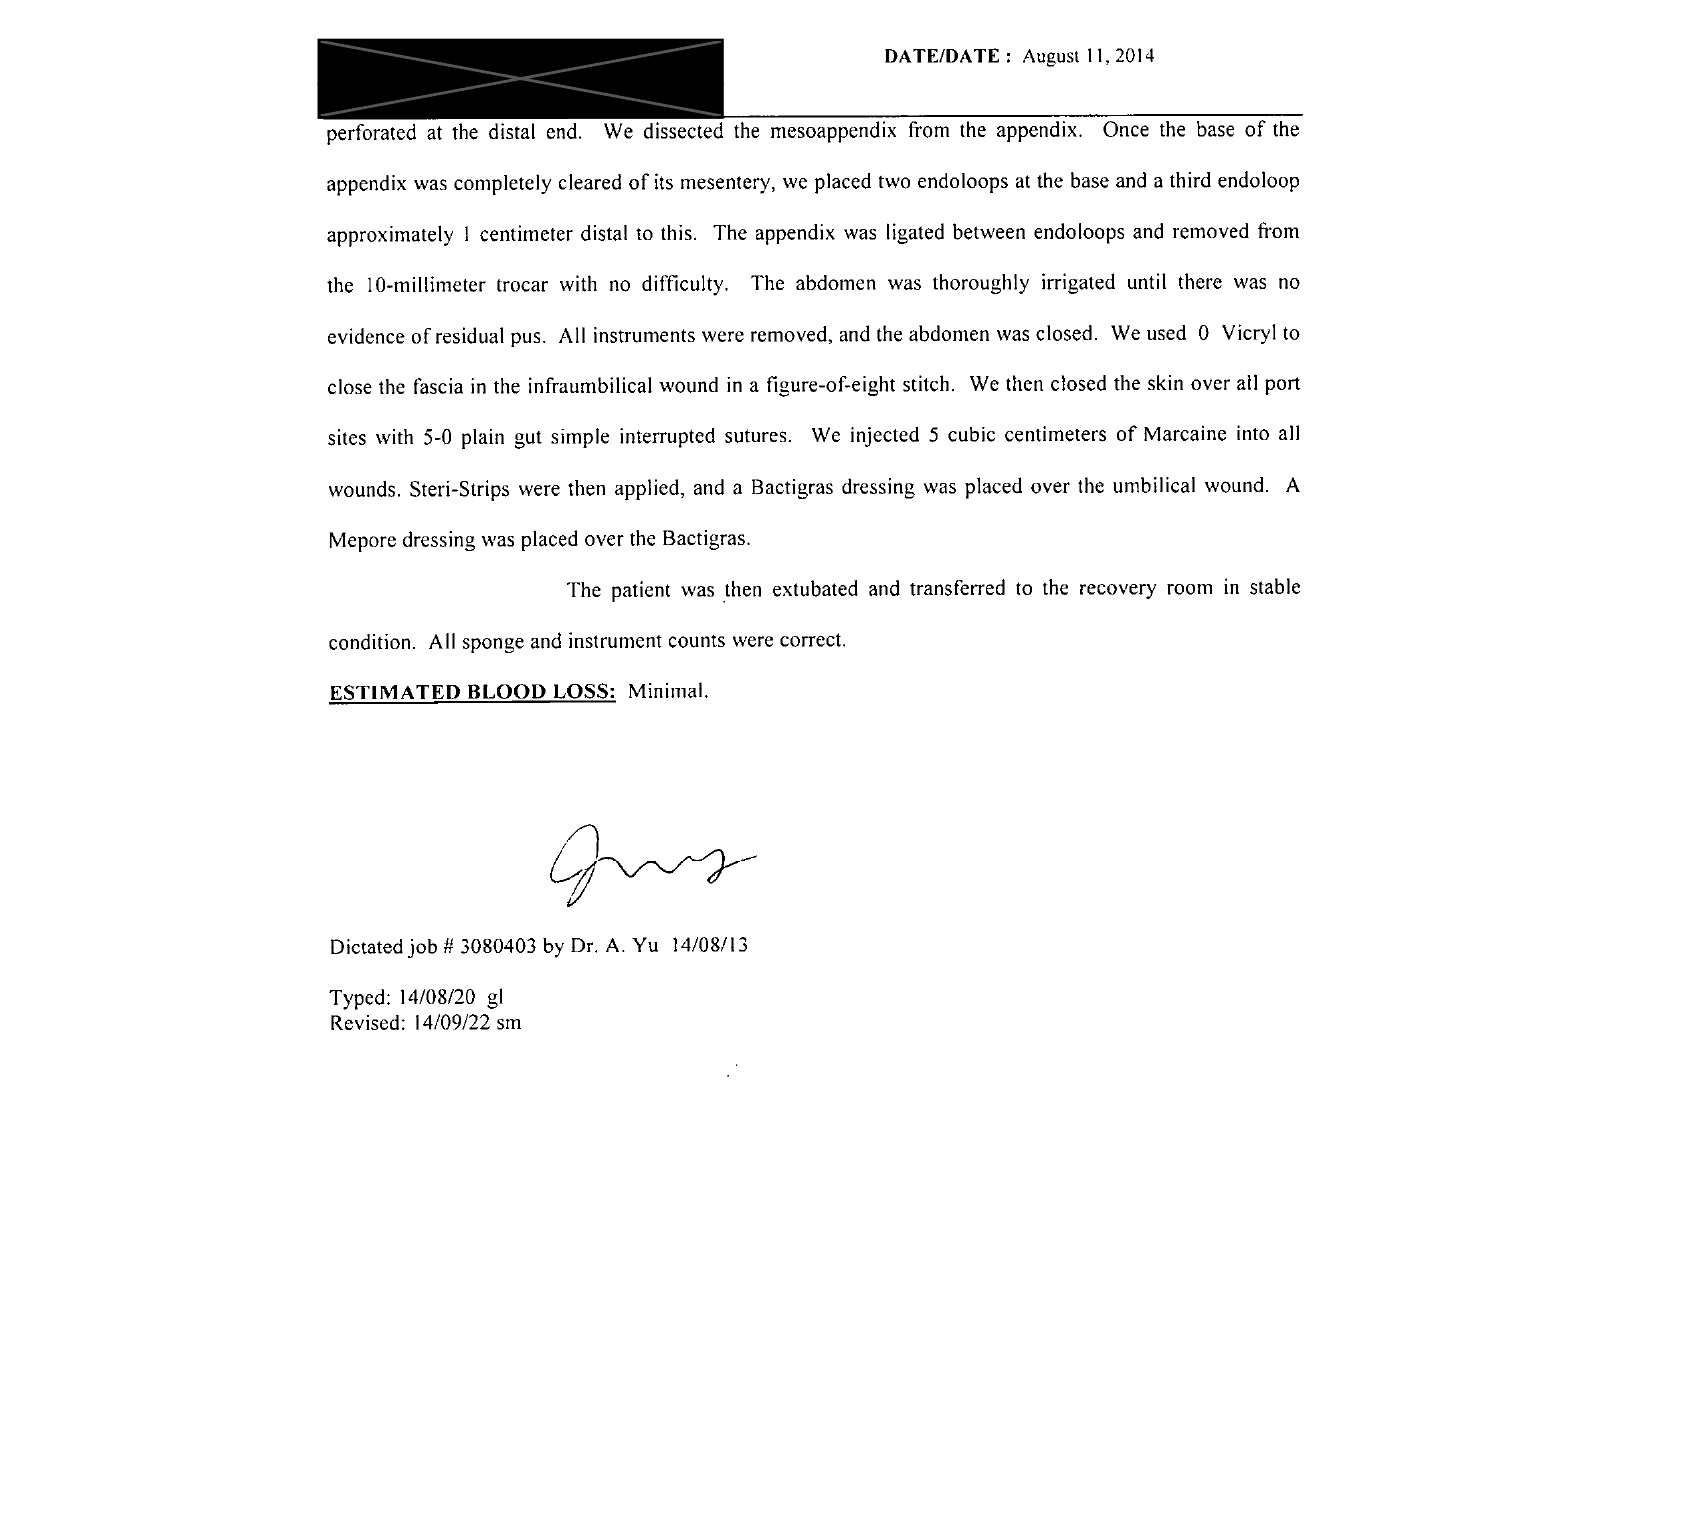

Cropping 98 O_1.png


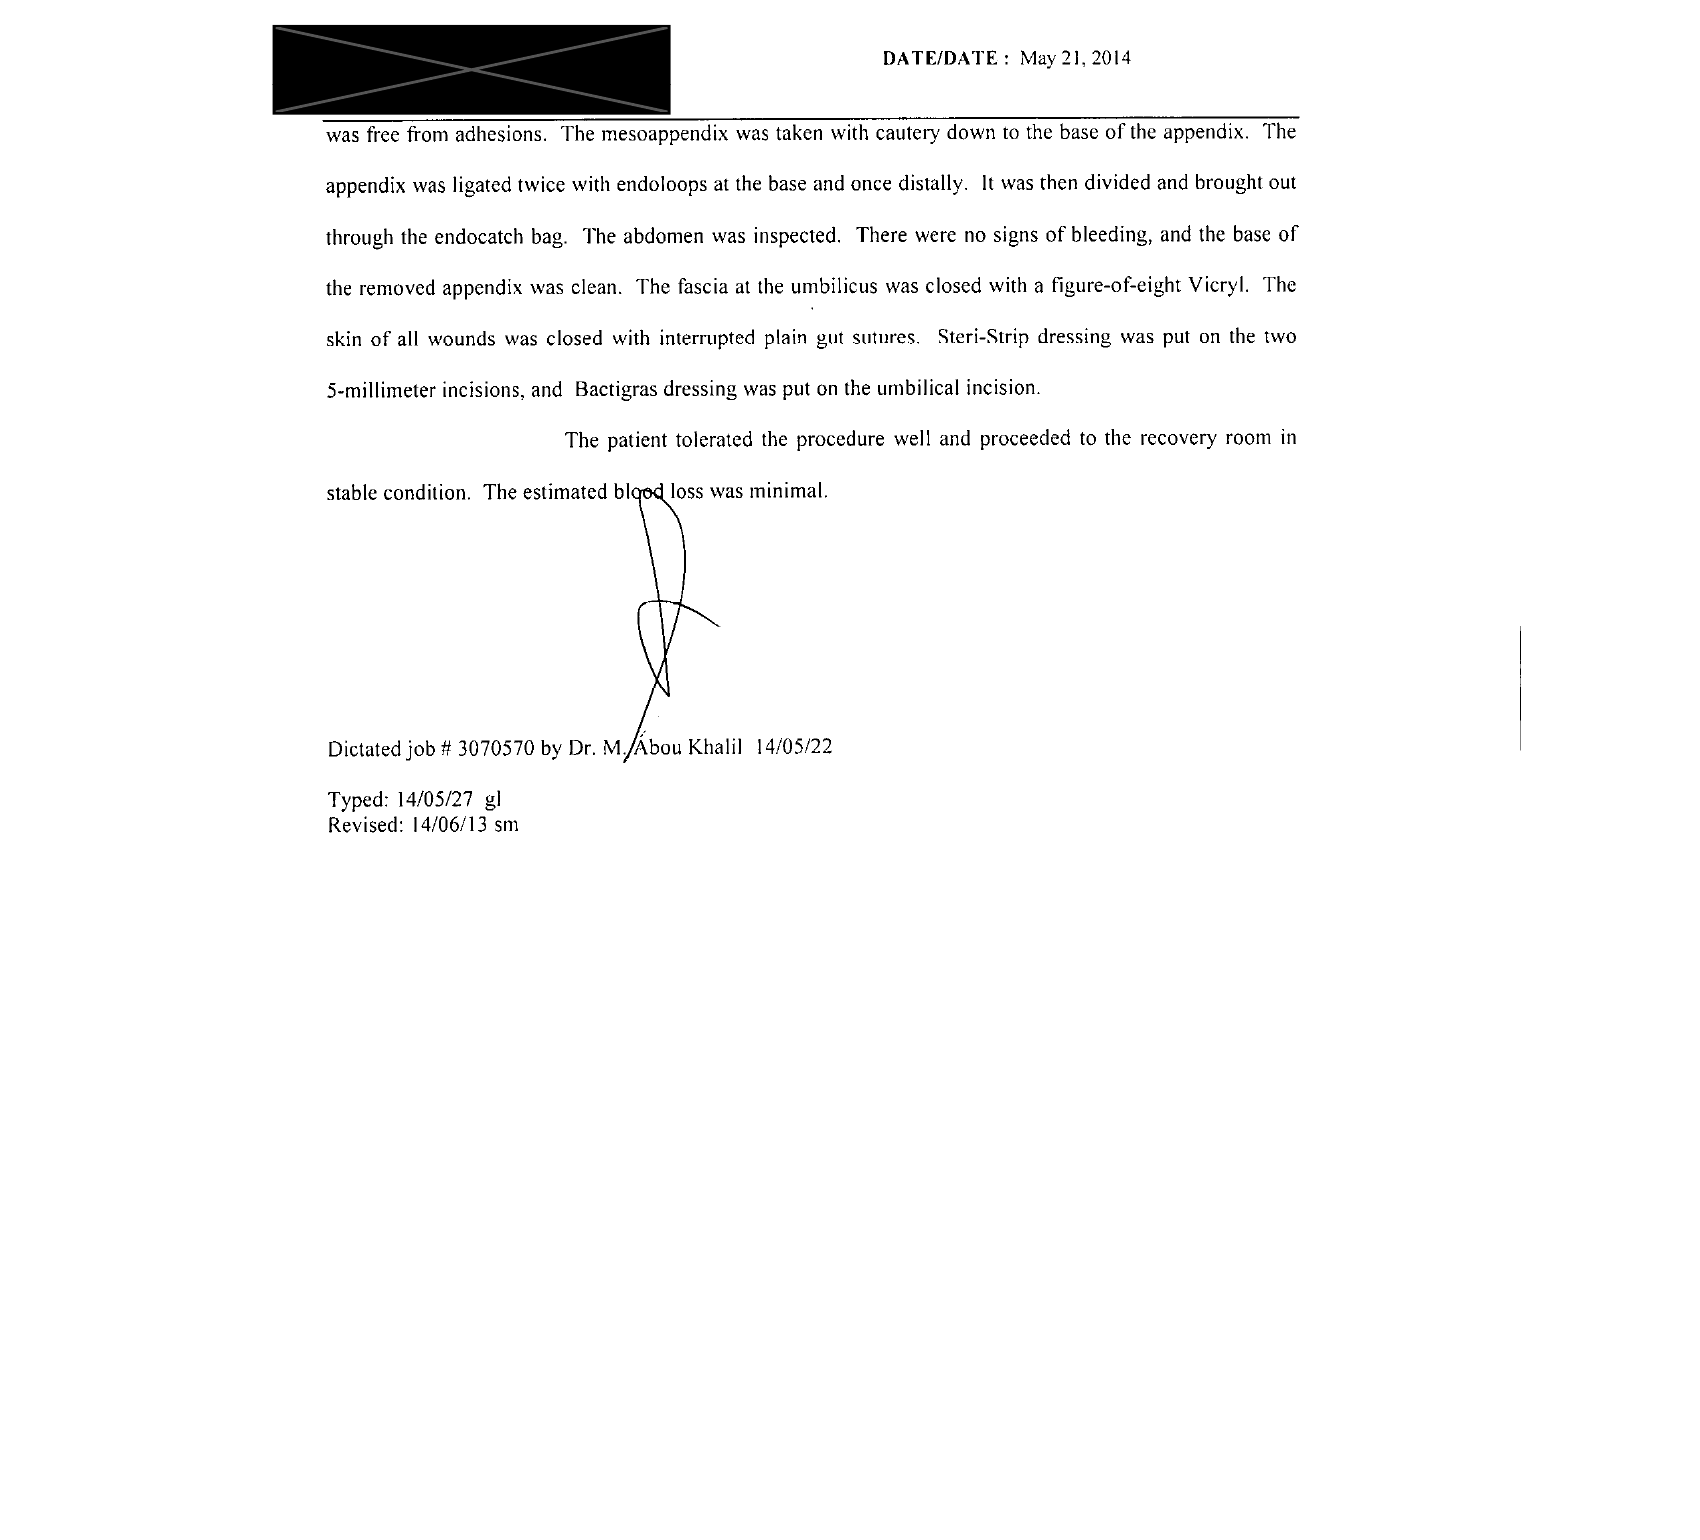

Cropping 115 O_1.png


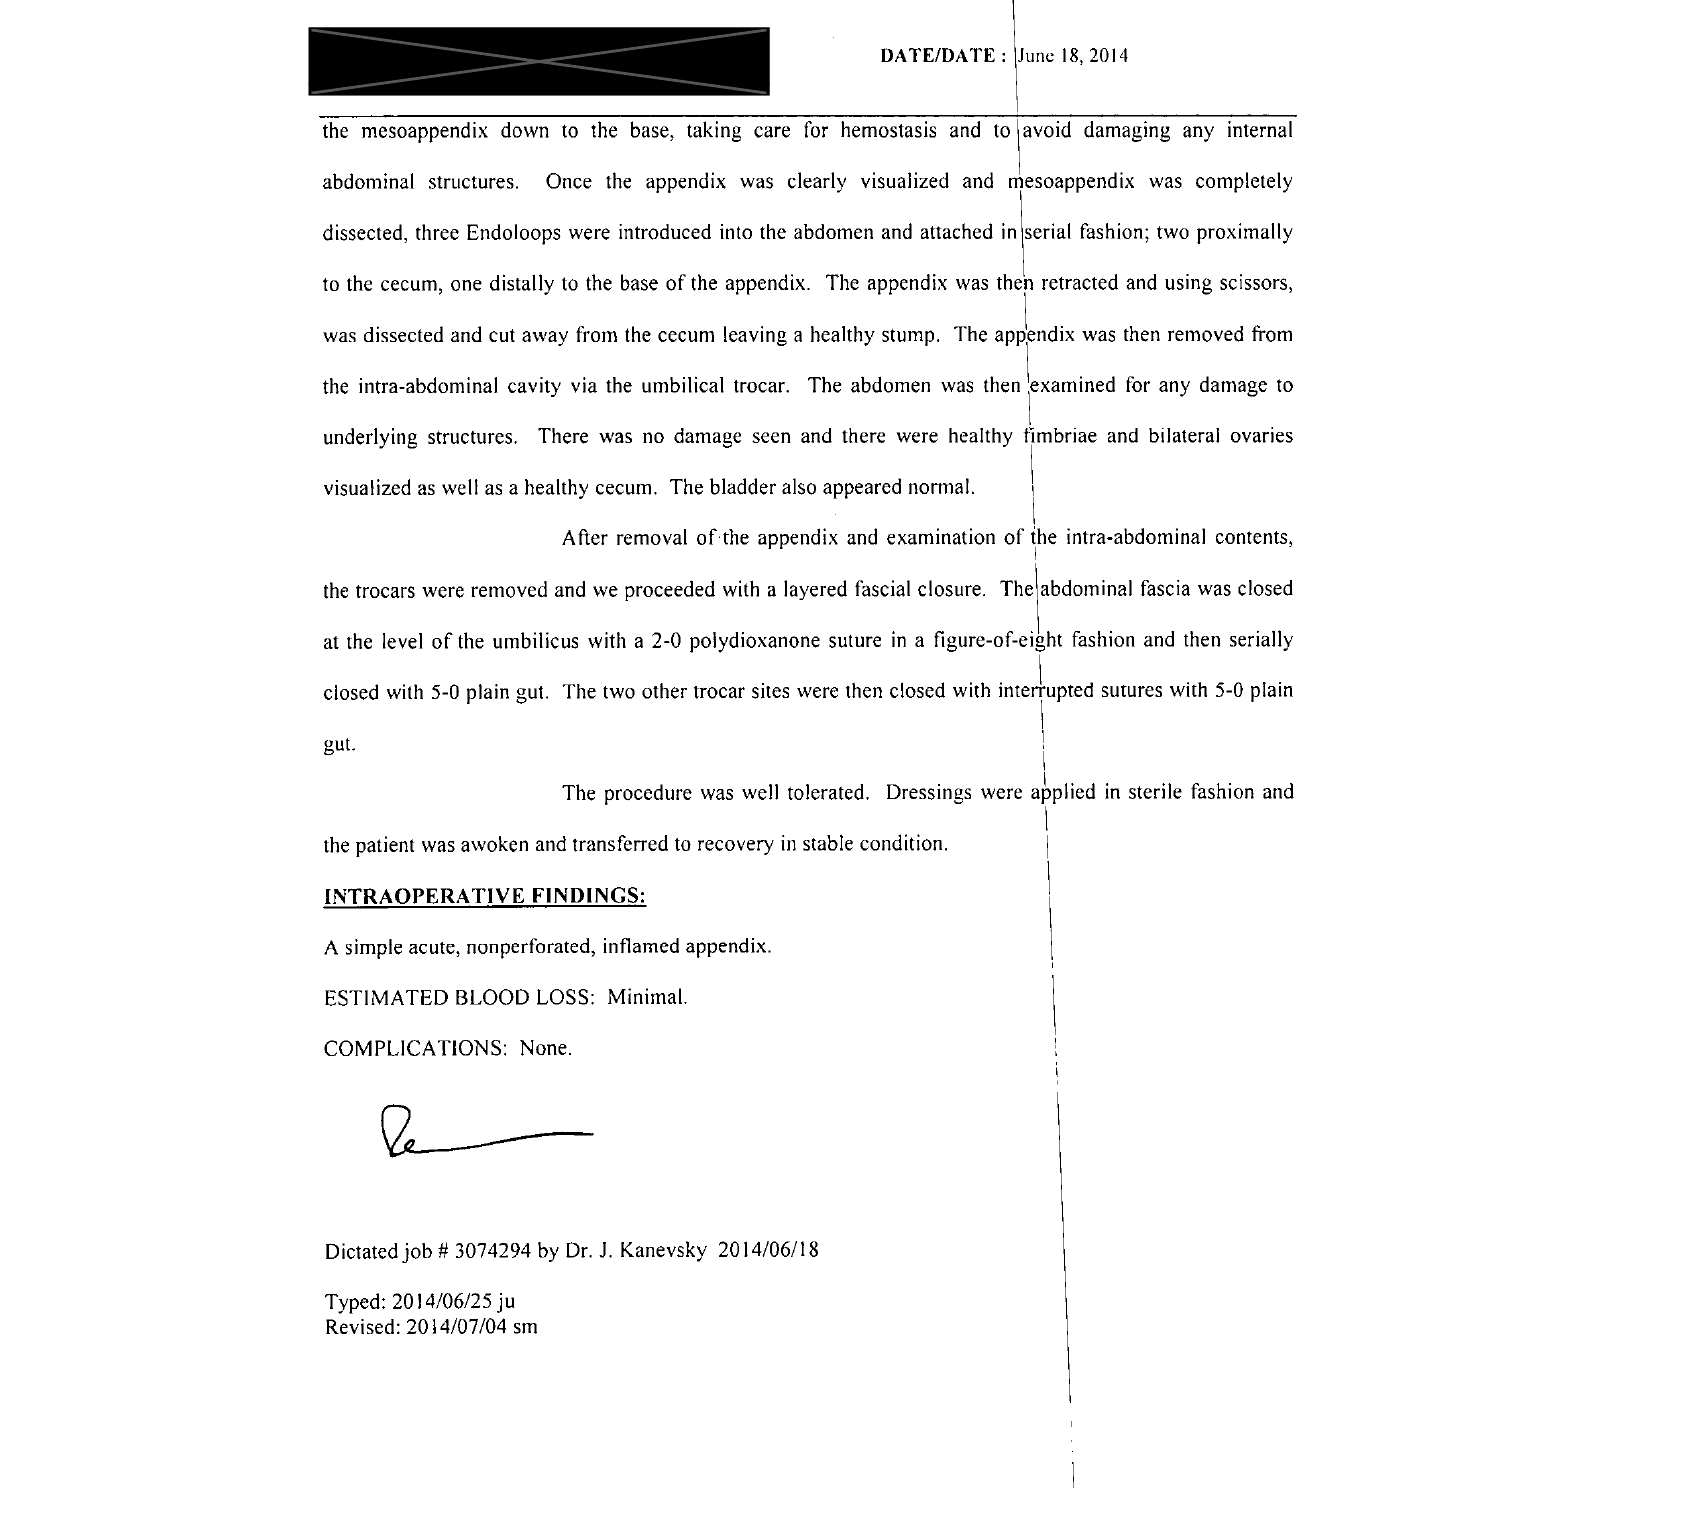

Cropping 178 O_1.png


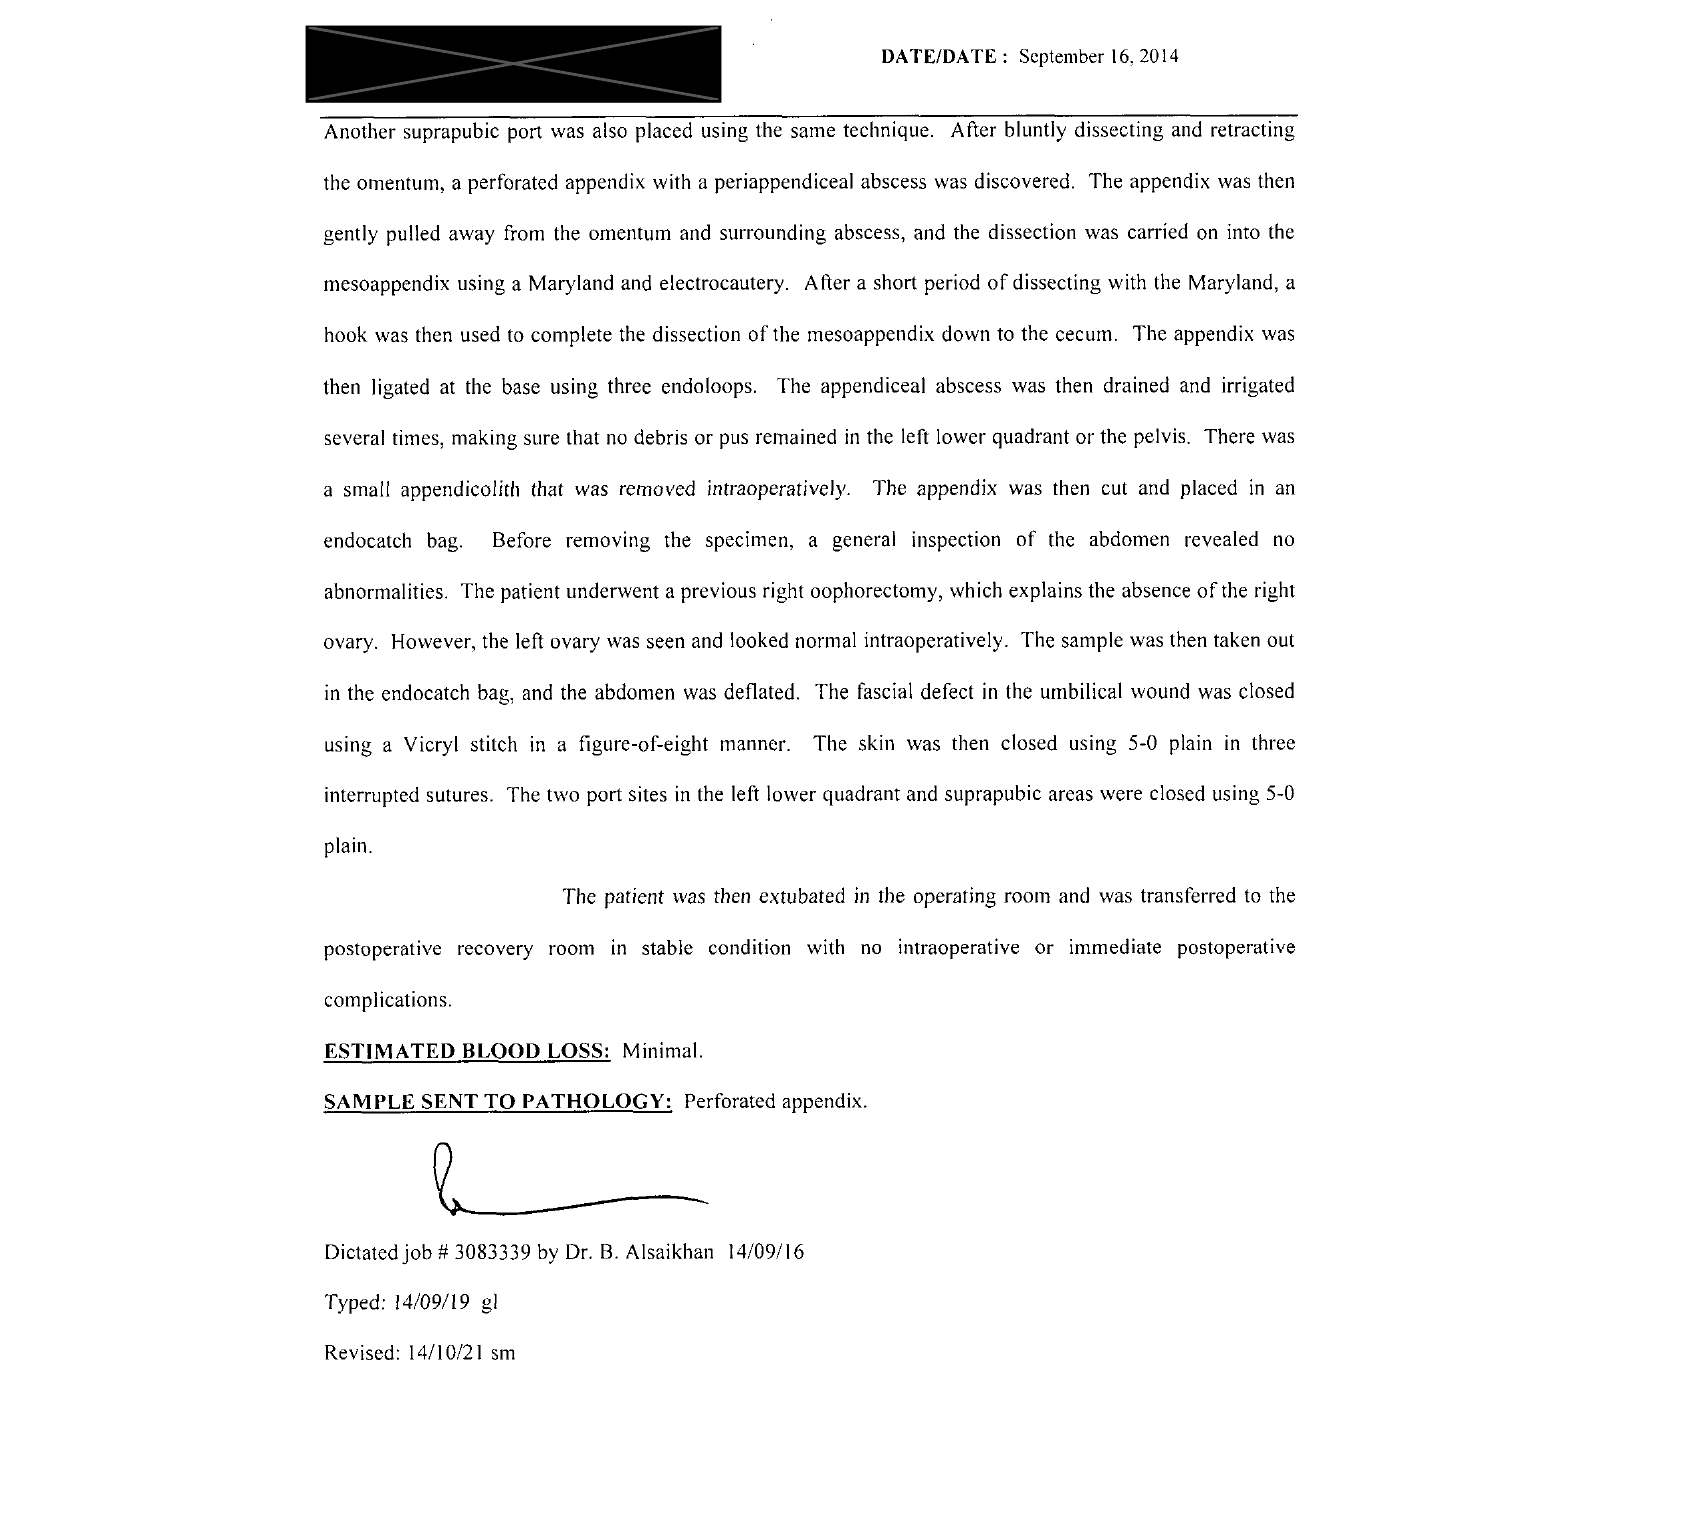

Cropping 93 O_1.png


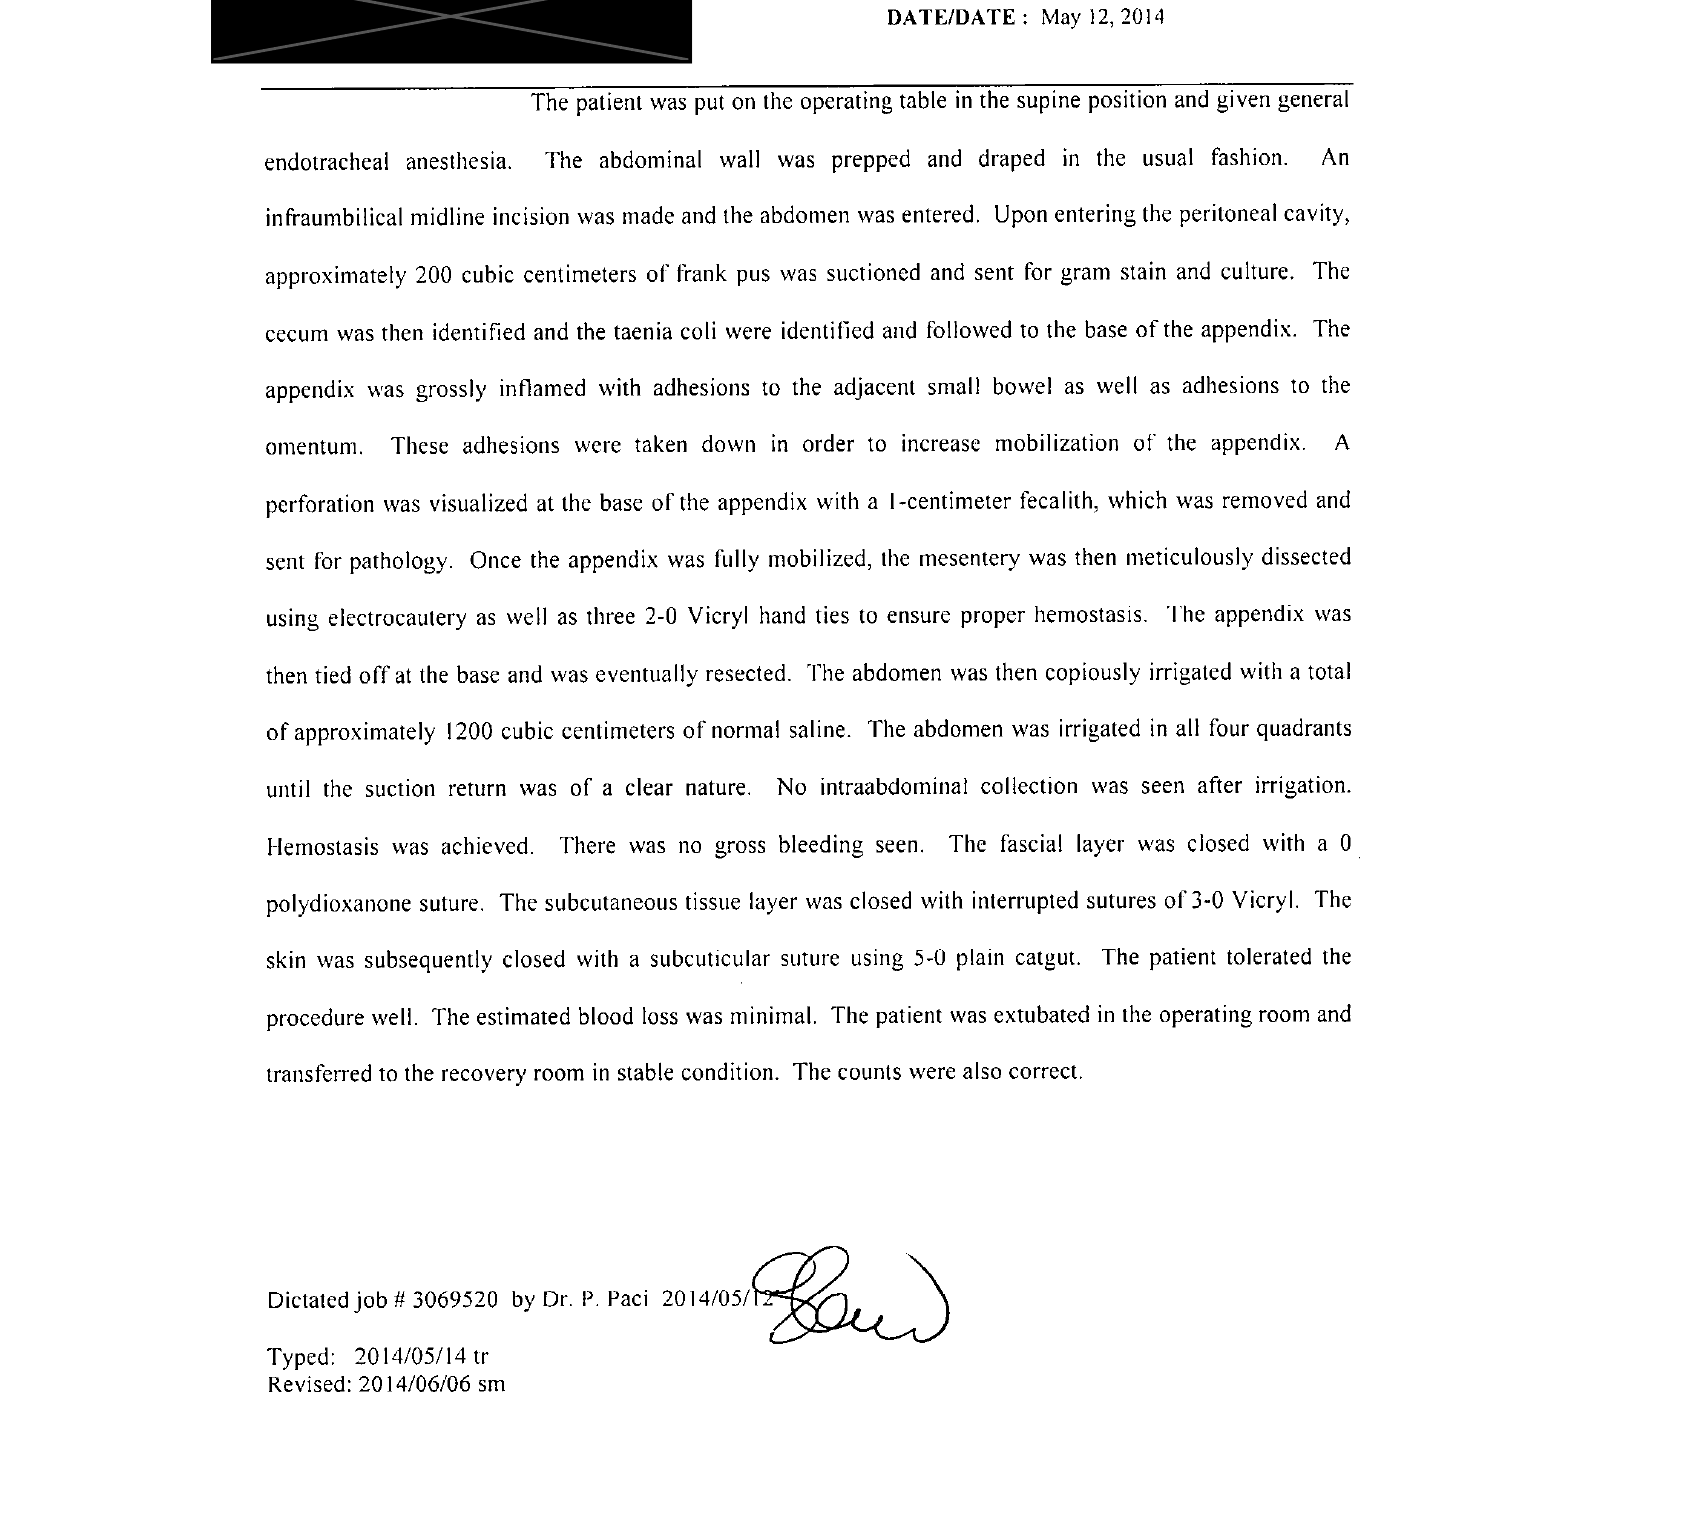

Cropping 112 O_1.png


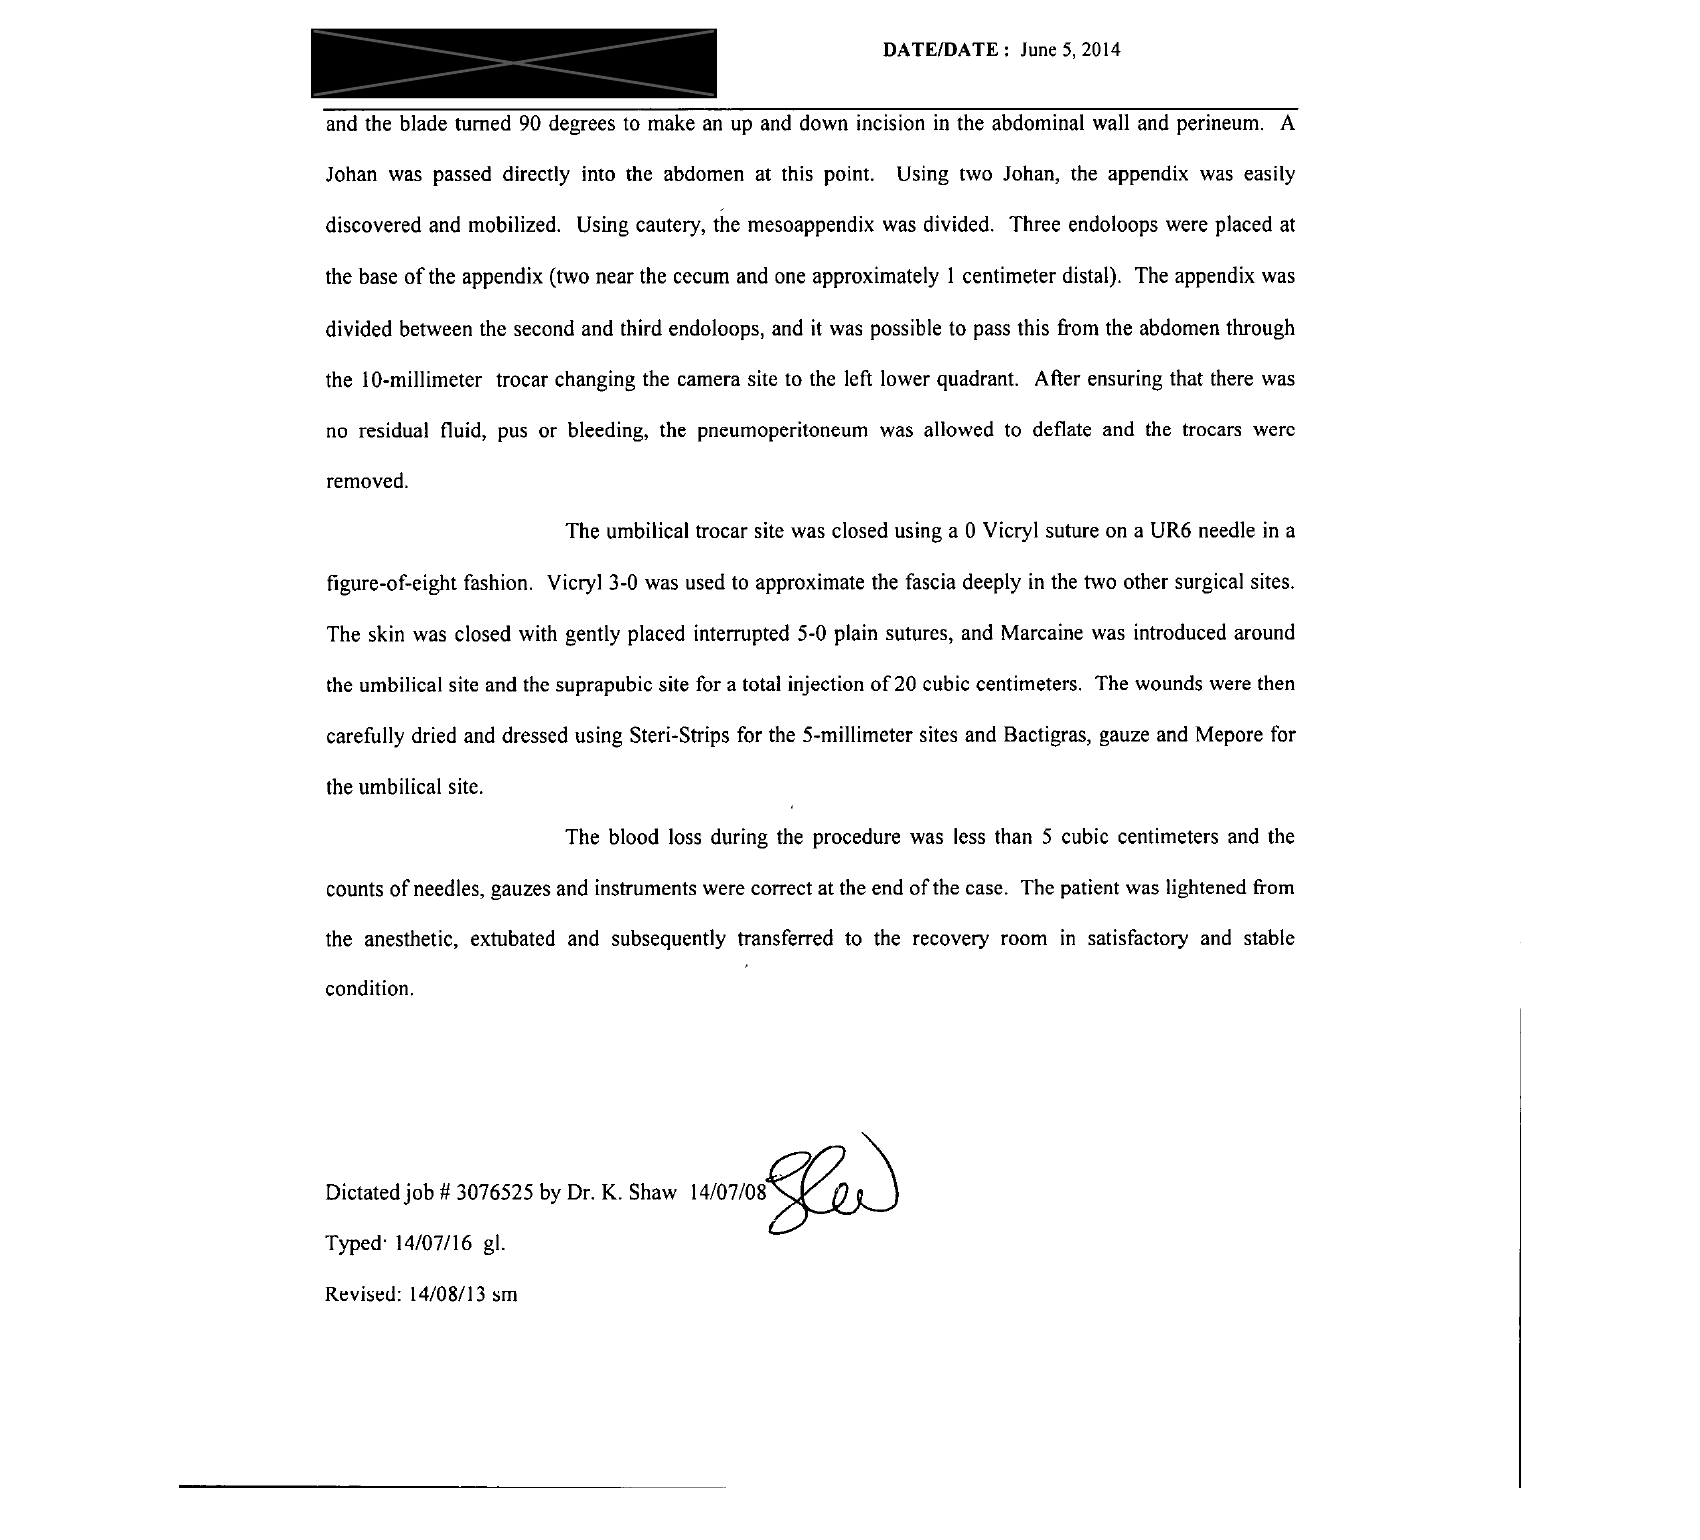

Cropping 110 O_1.png


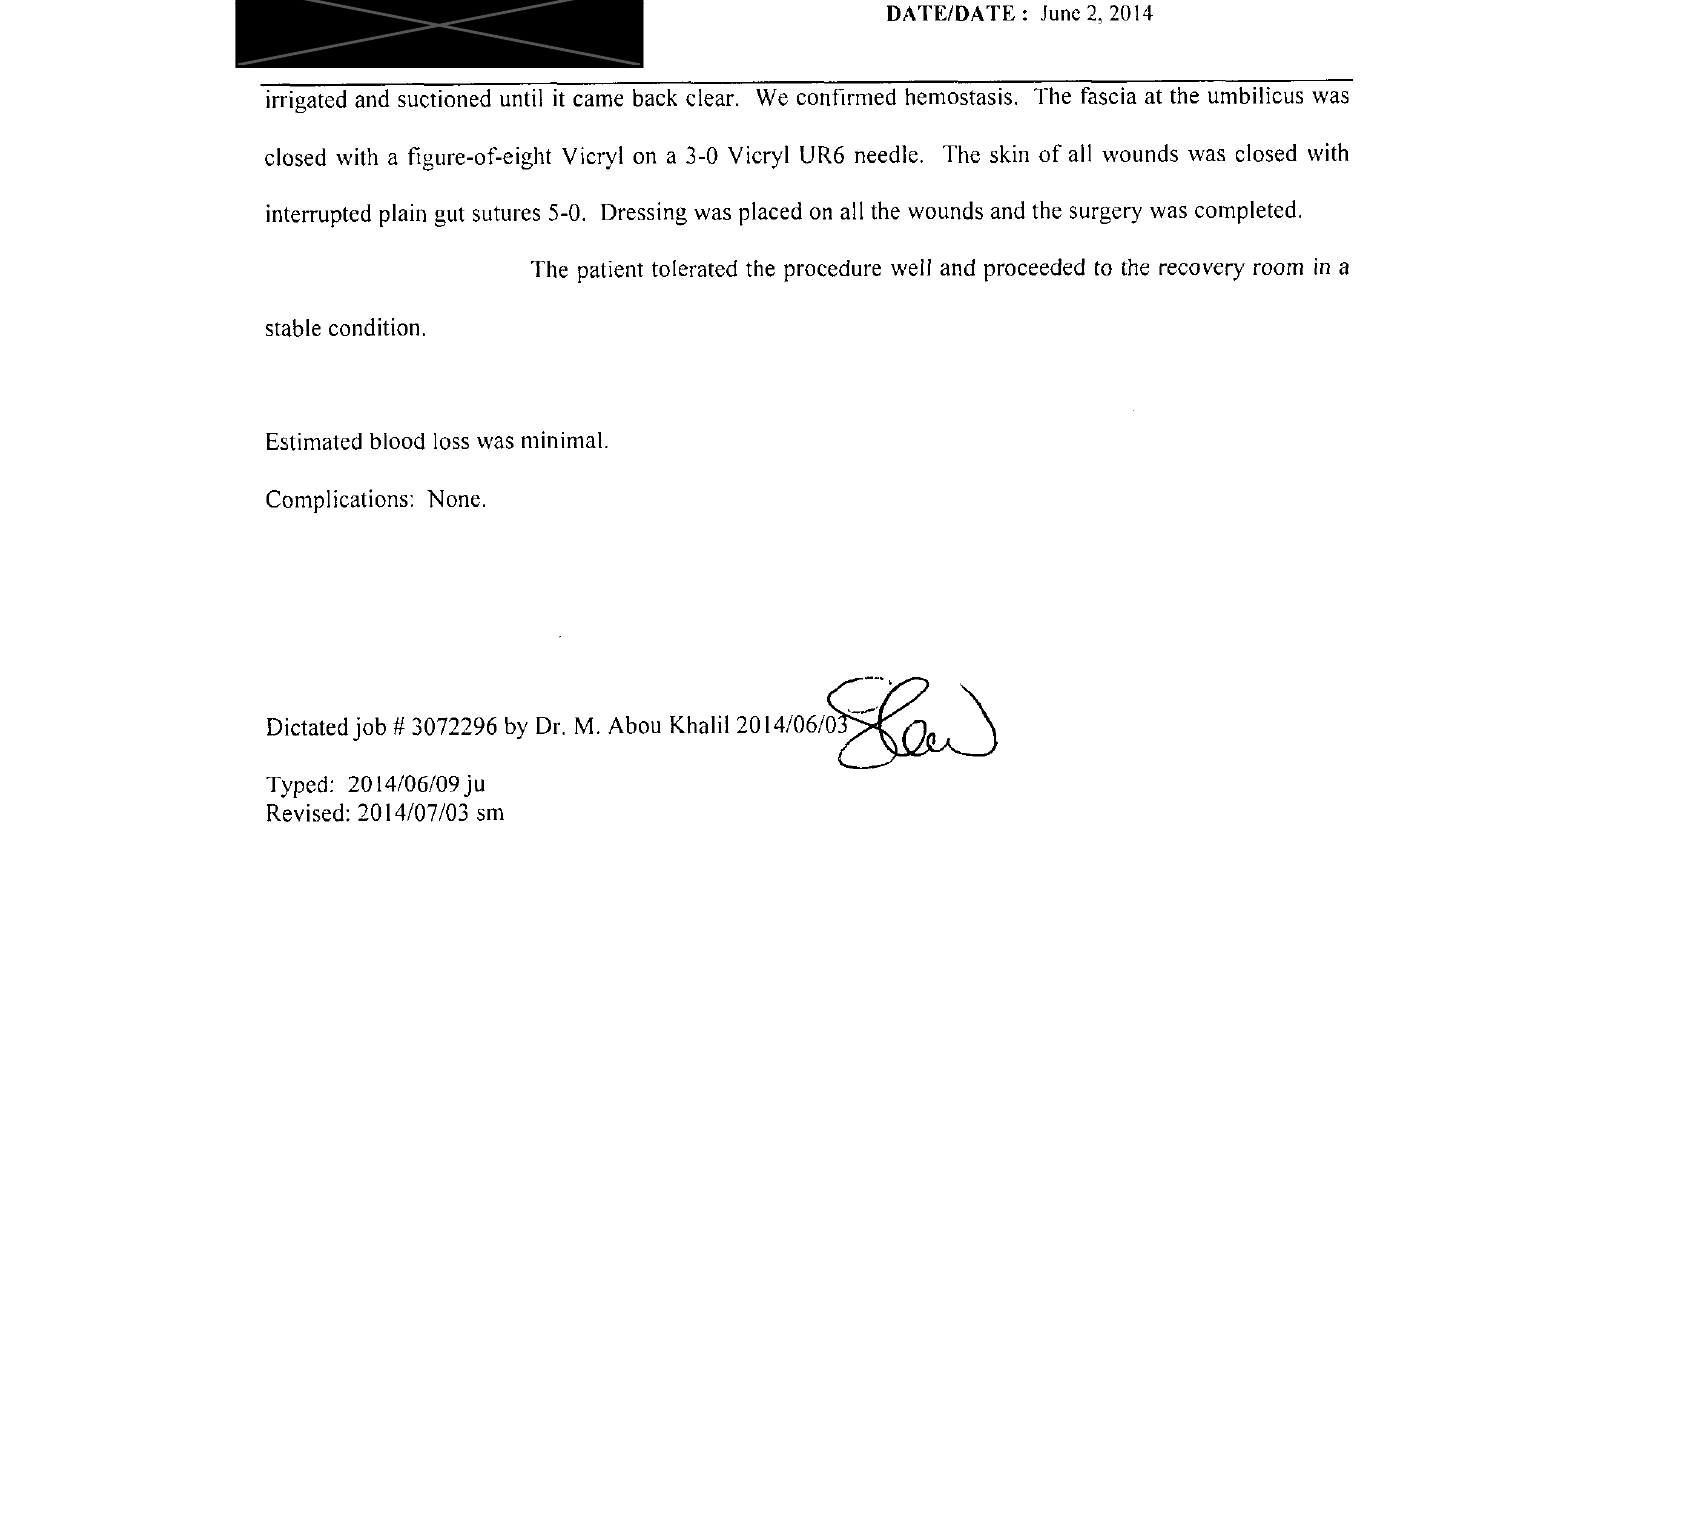

Cropping 138 O_1.png


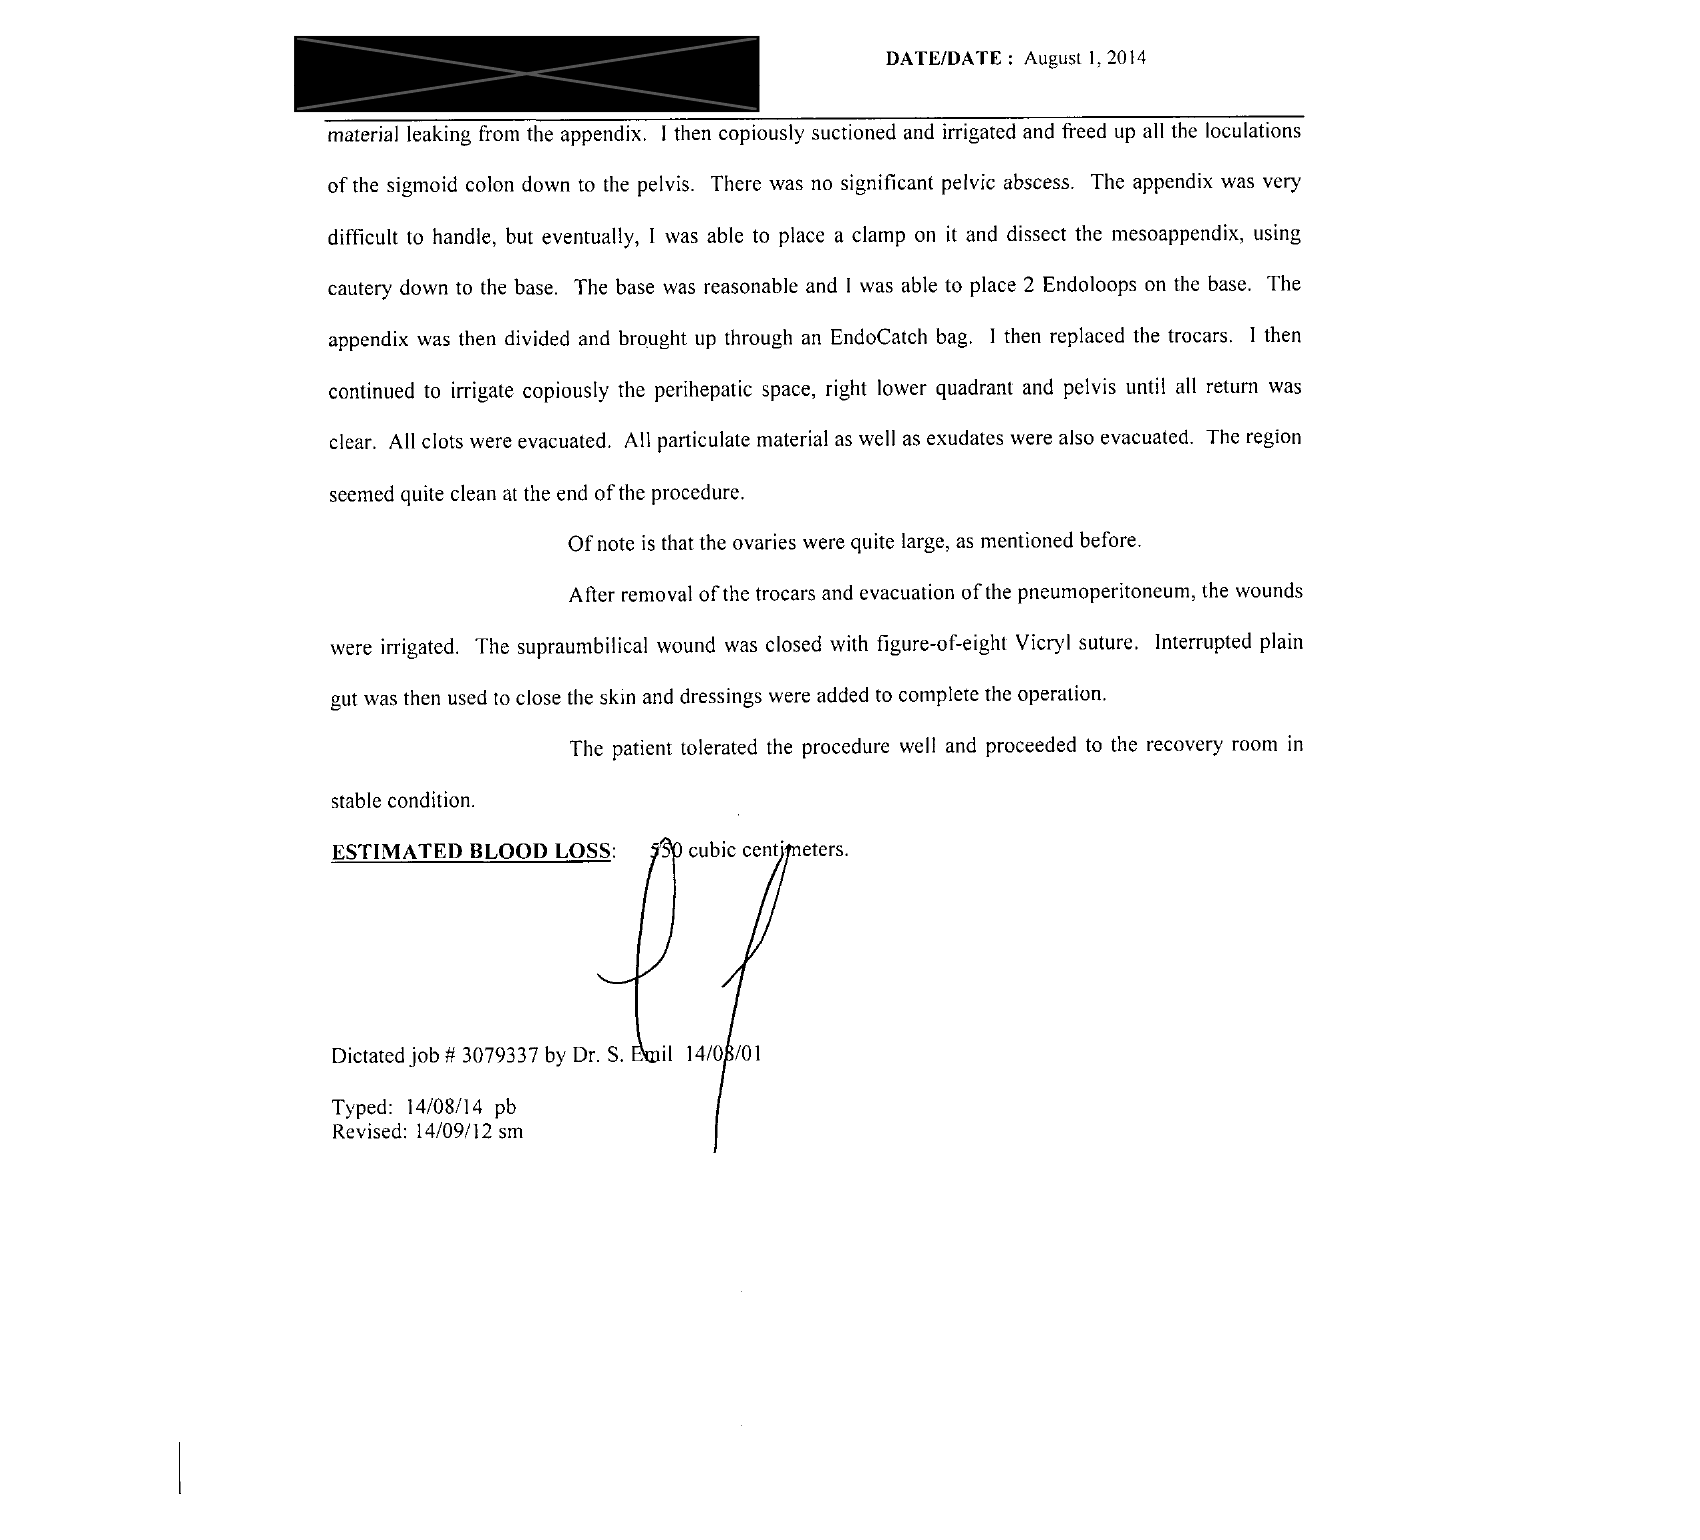

Cropping 132 O_1.png


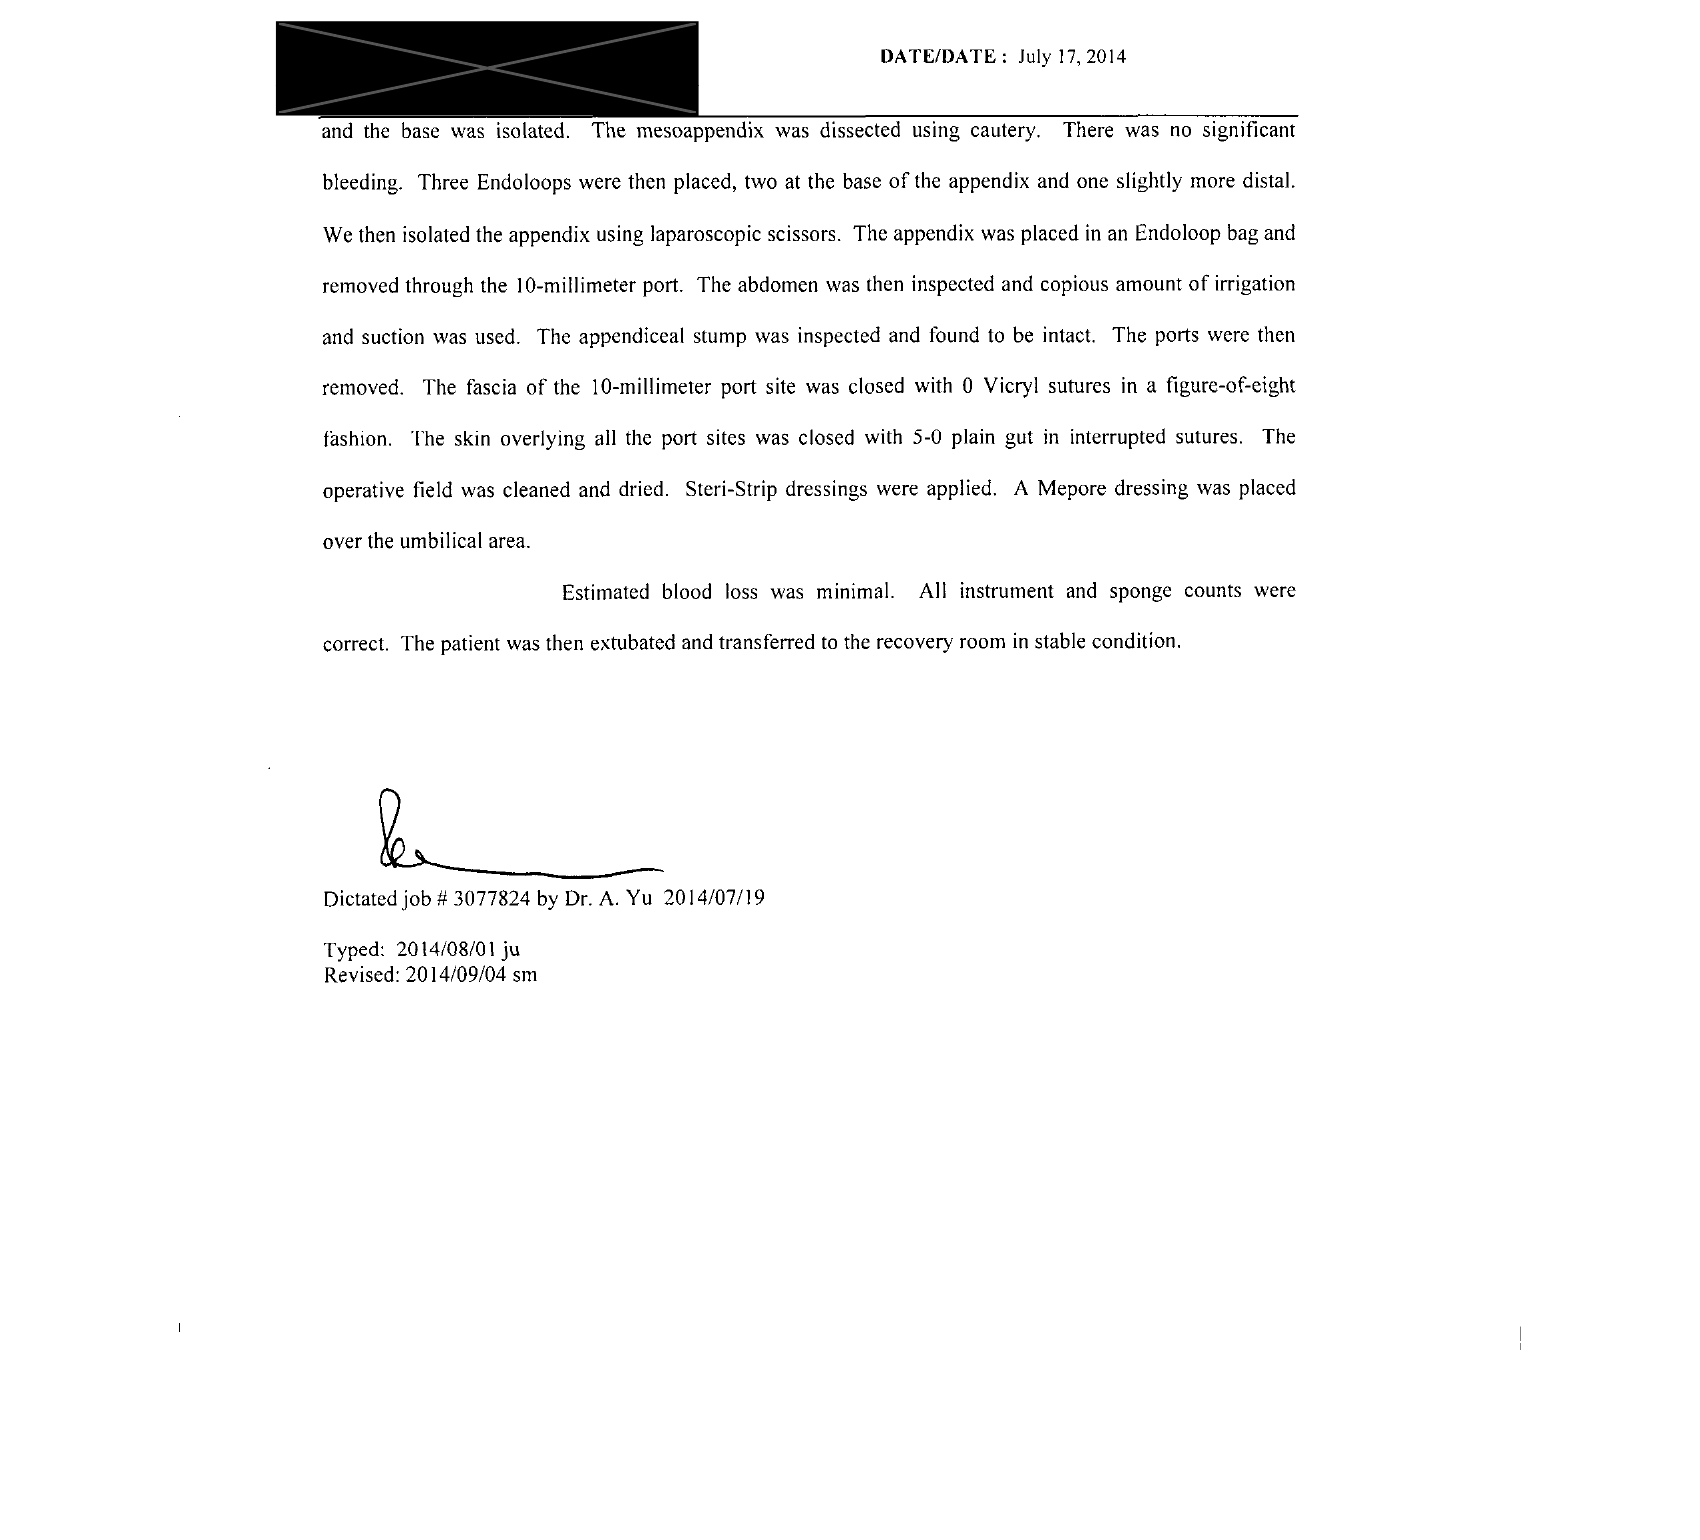

Cropping 108 O_1.png


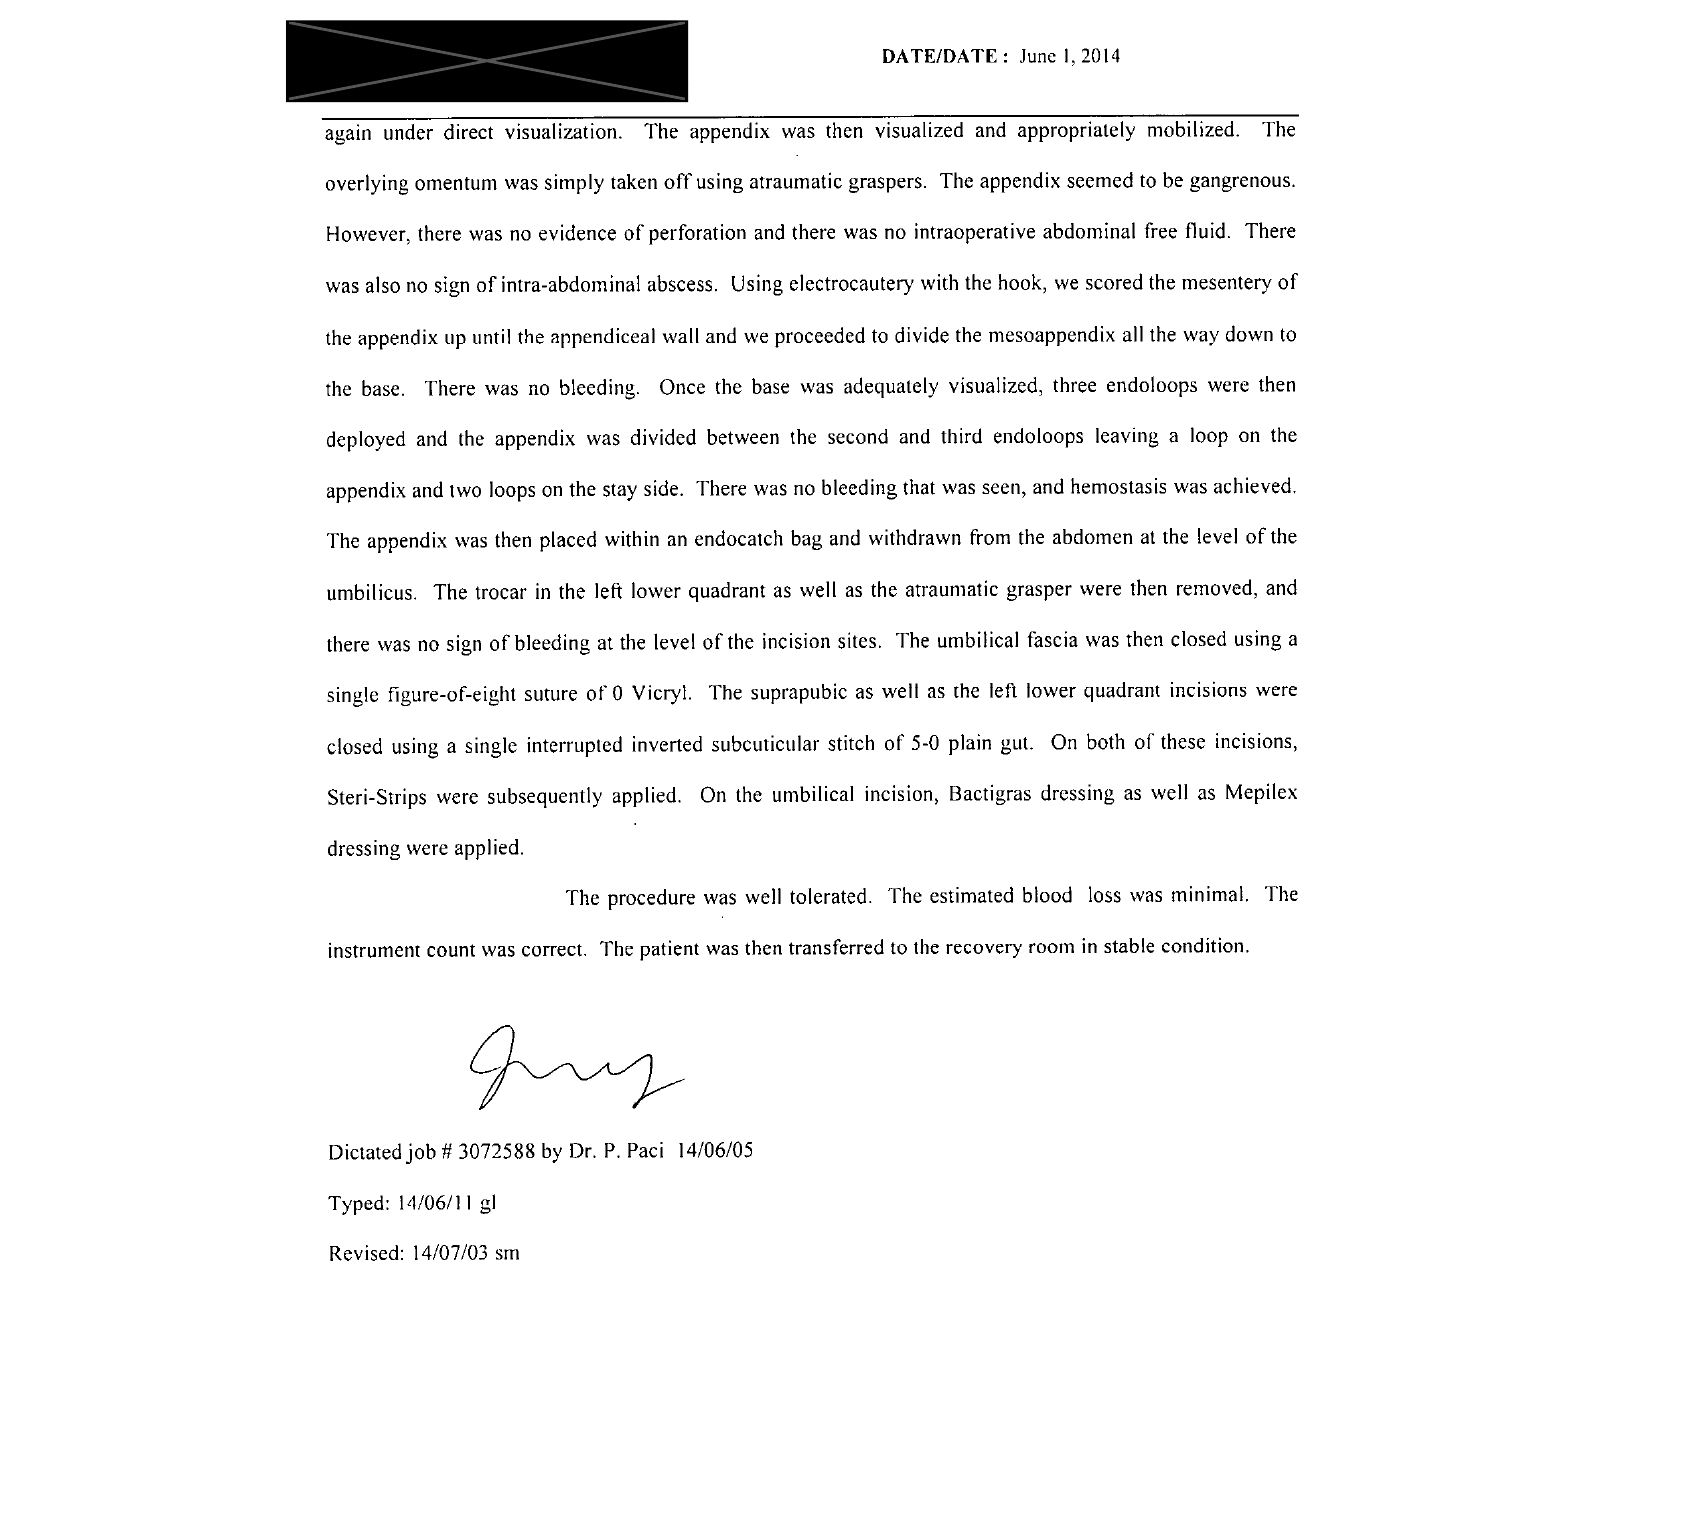

Cropping 117 O_1.png


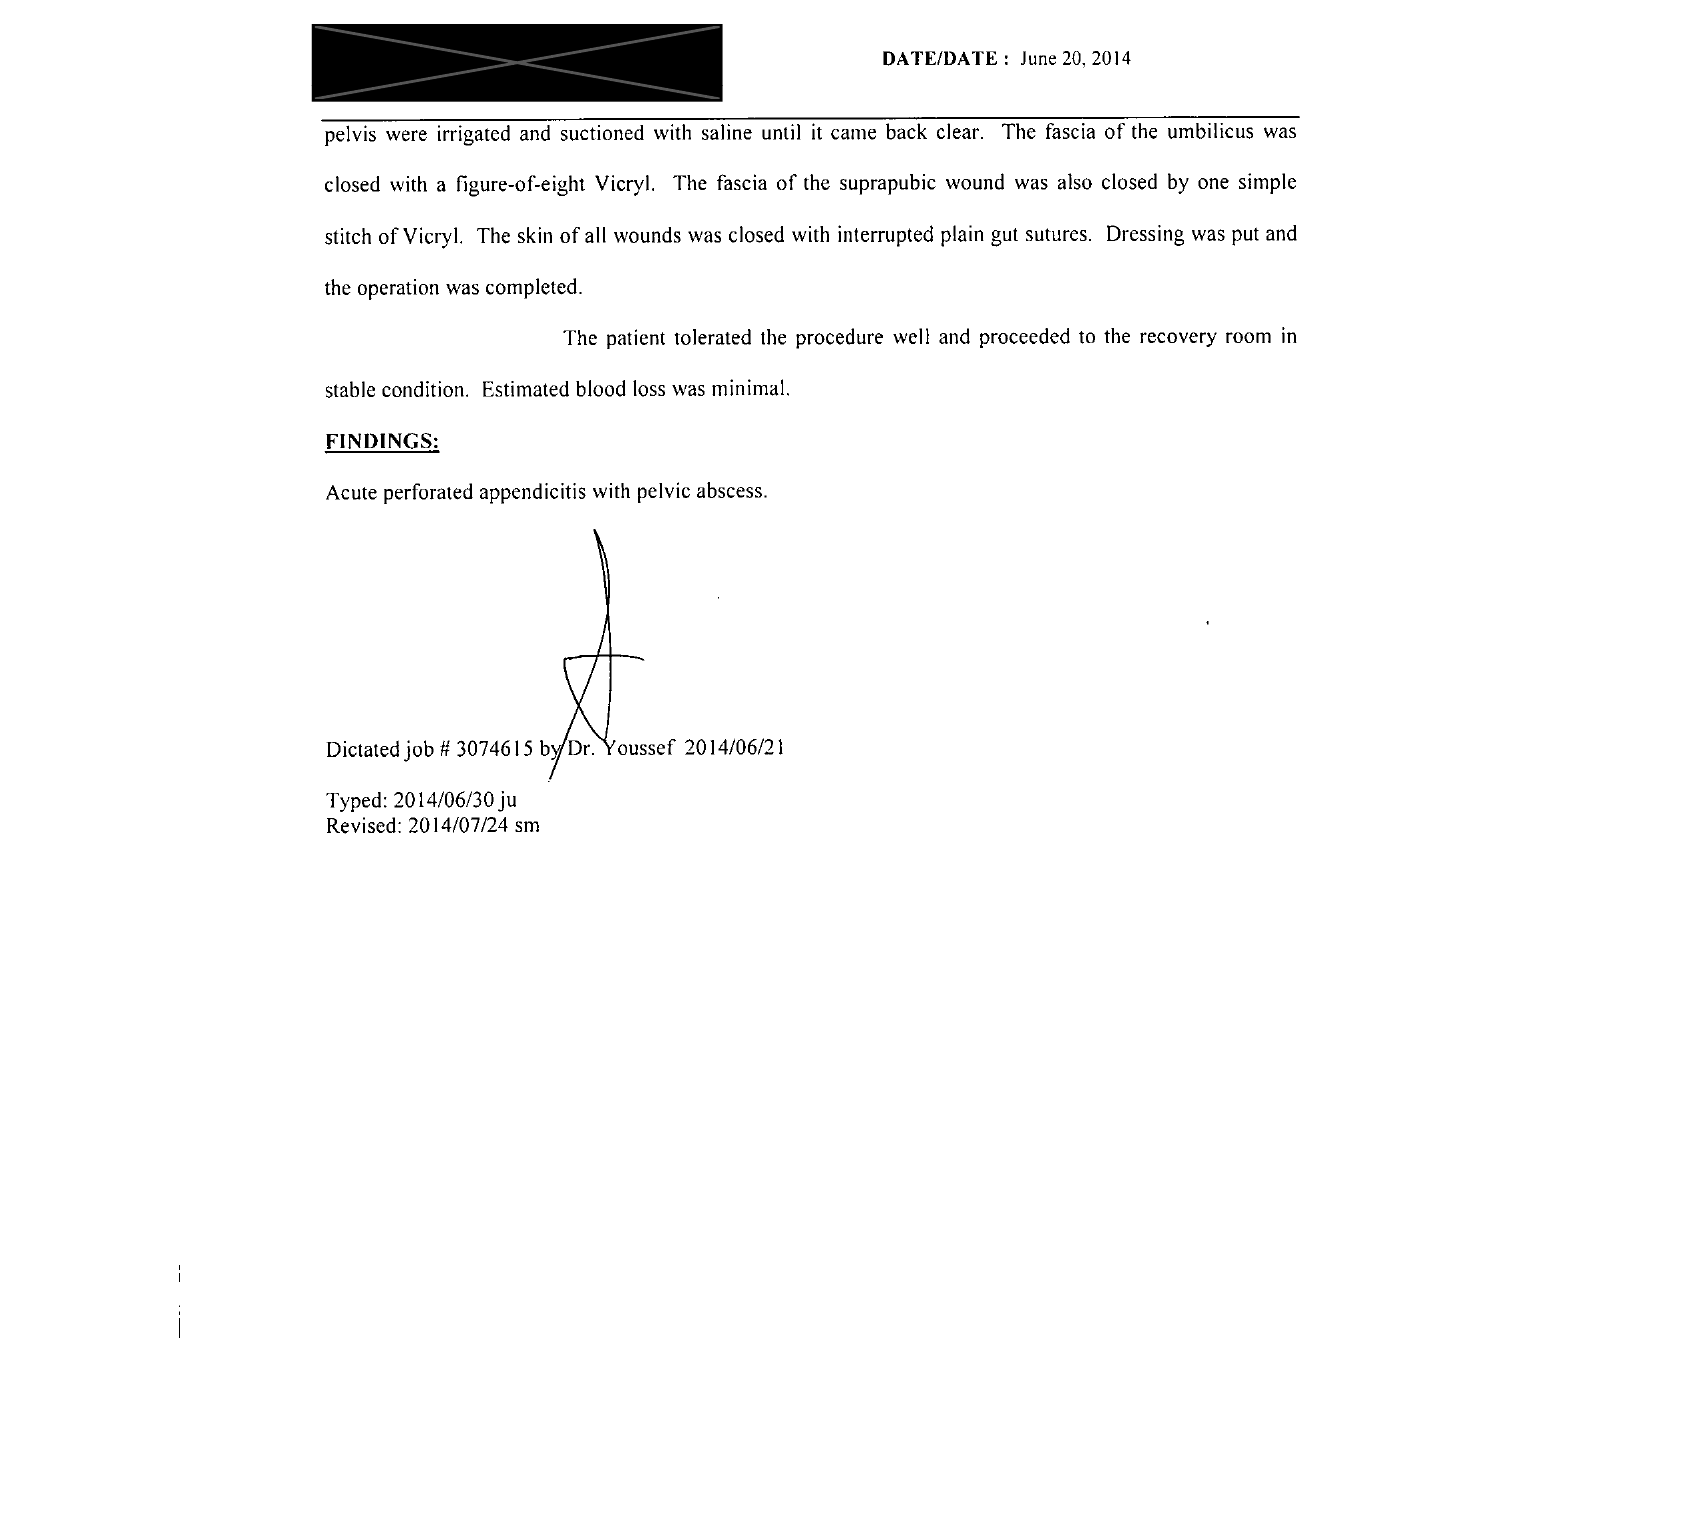

Cropping 73 O_1.png


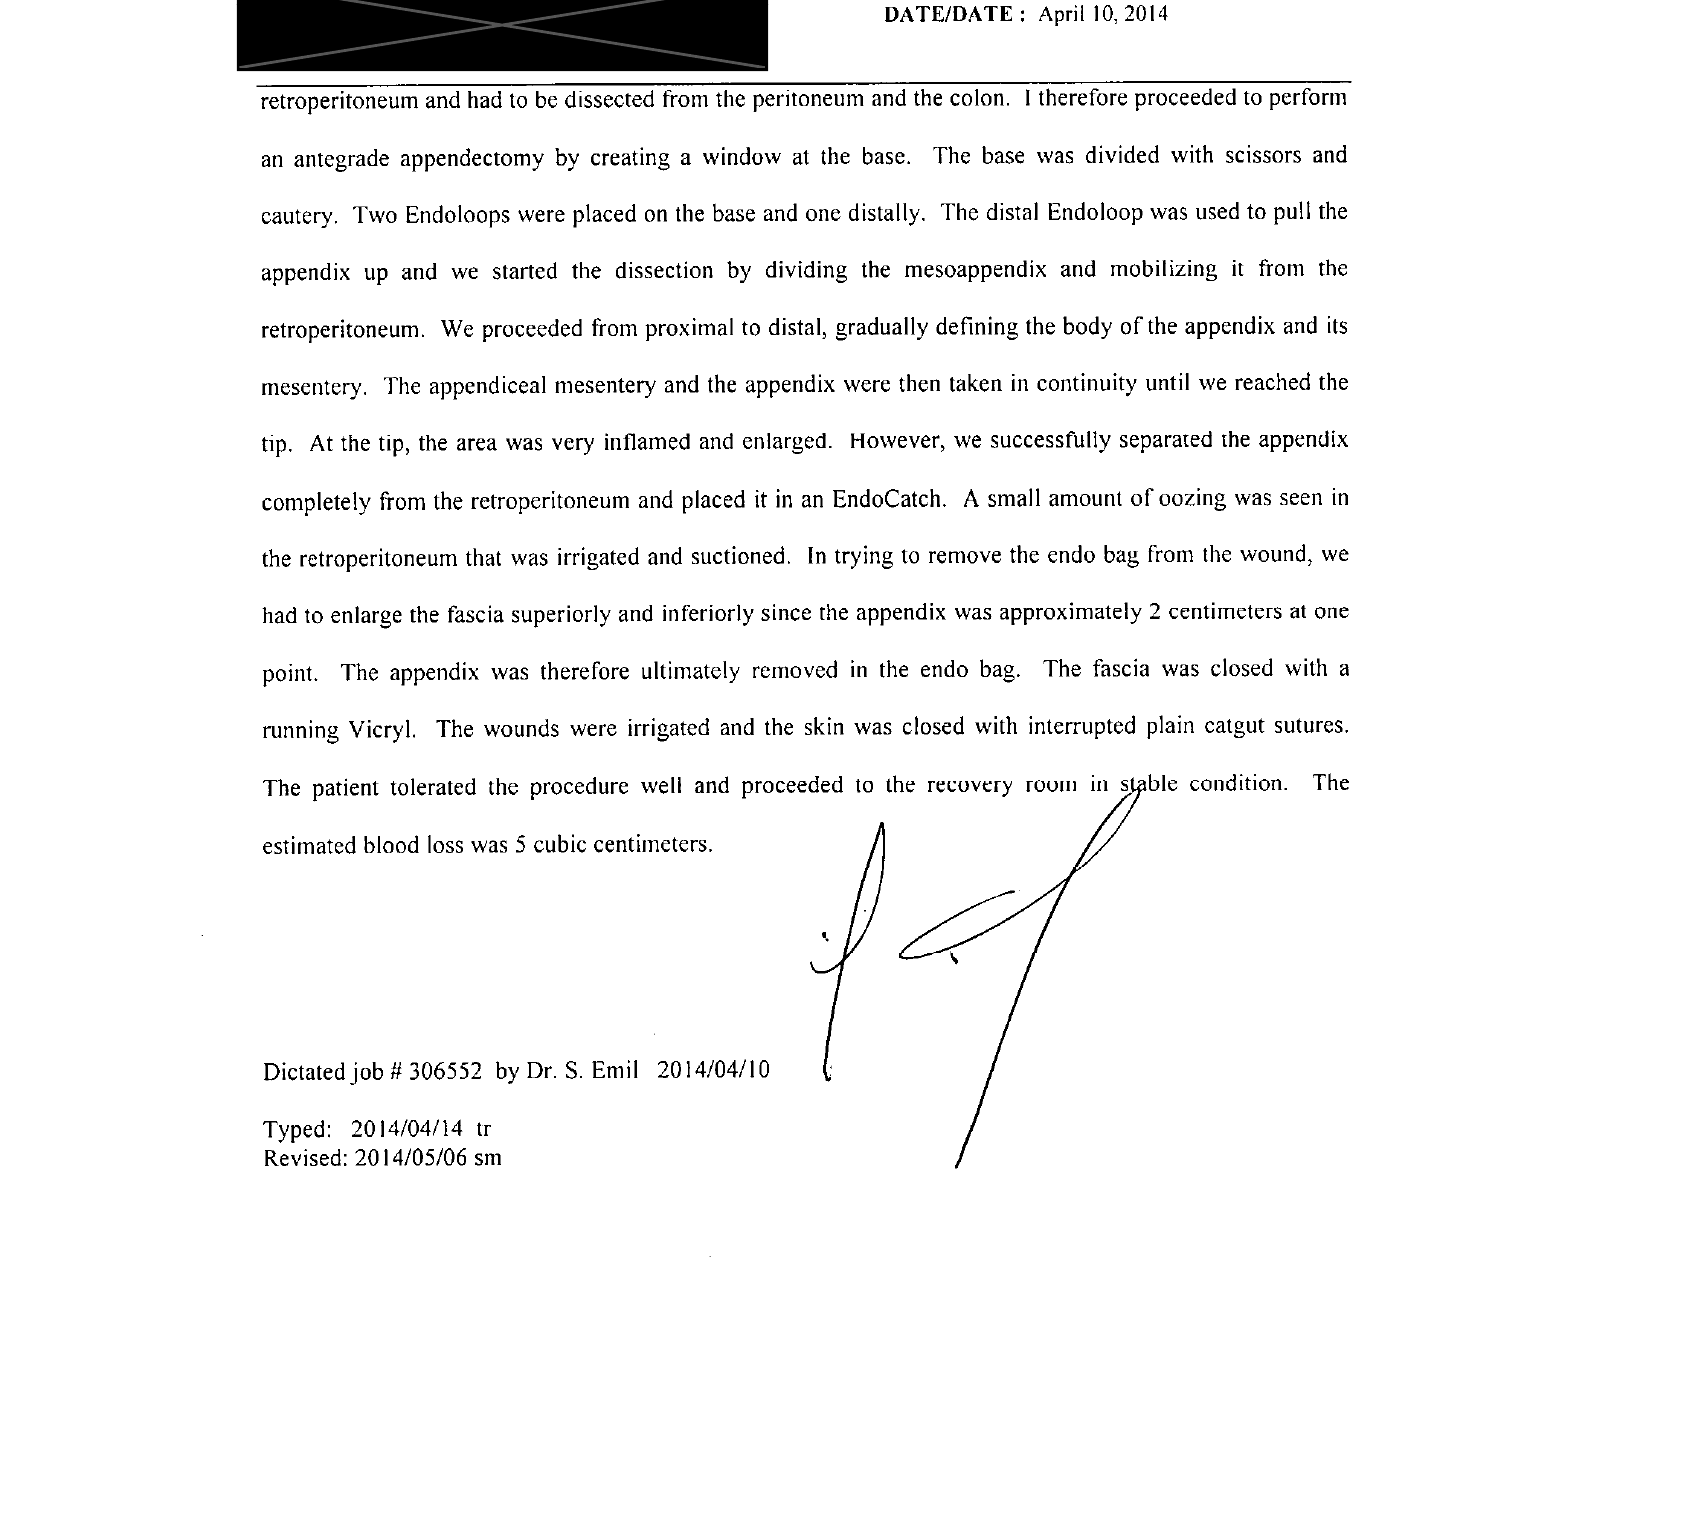

Cropping 146 O_1.png


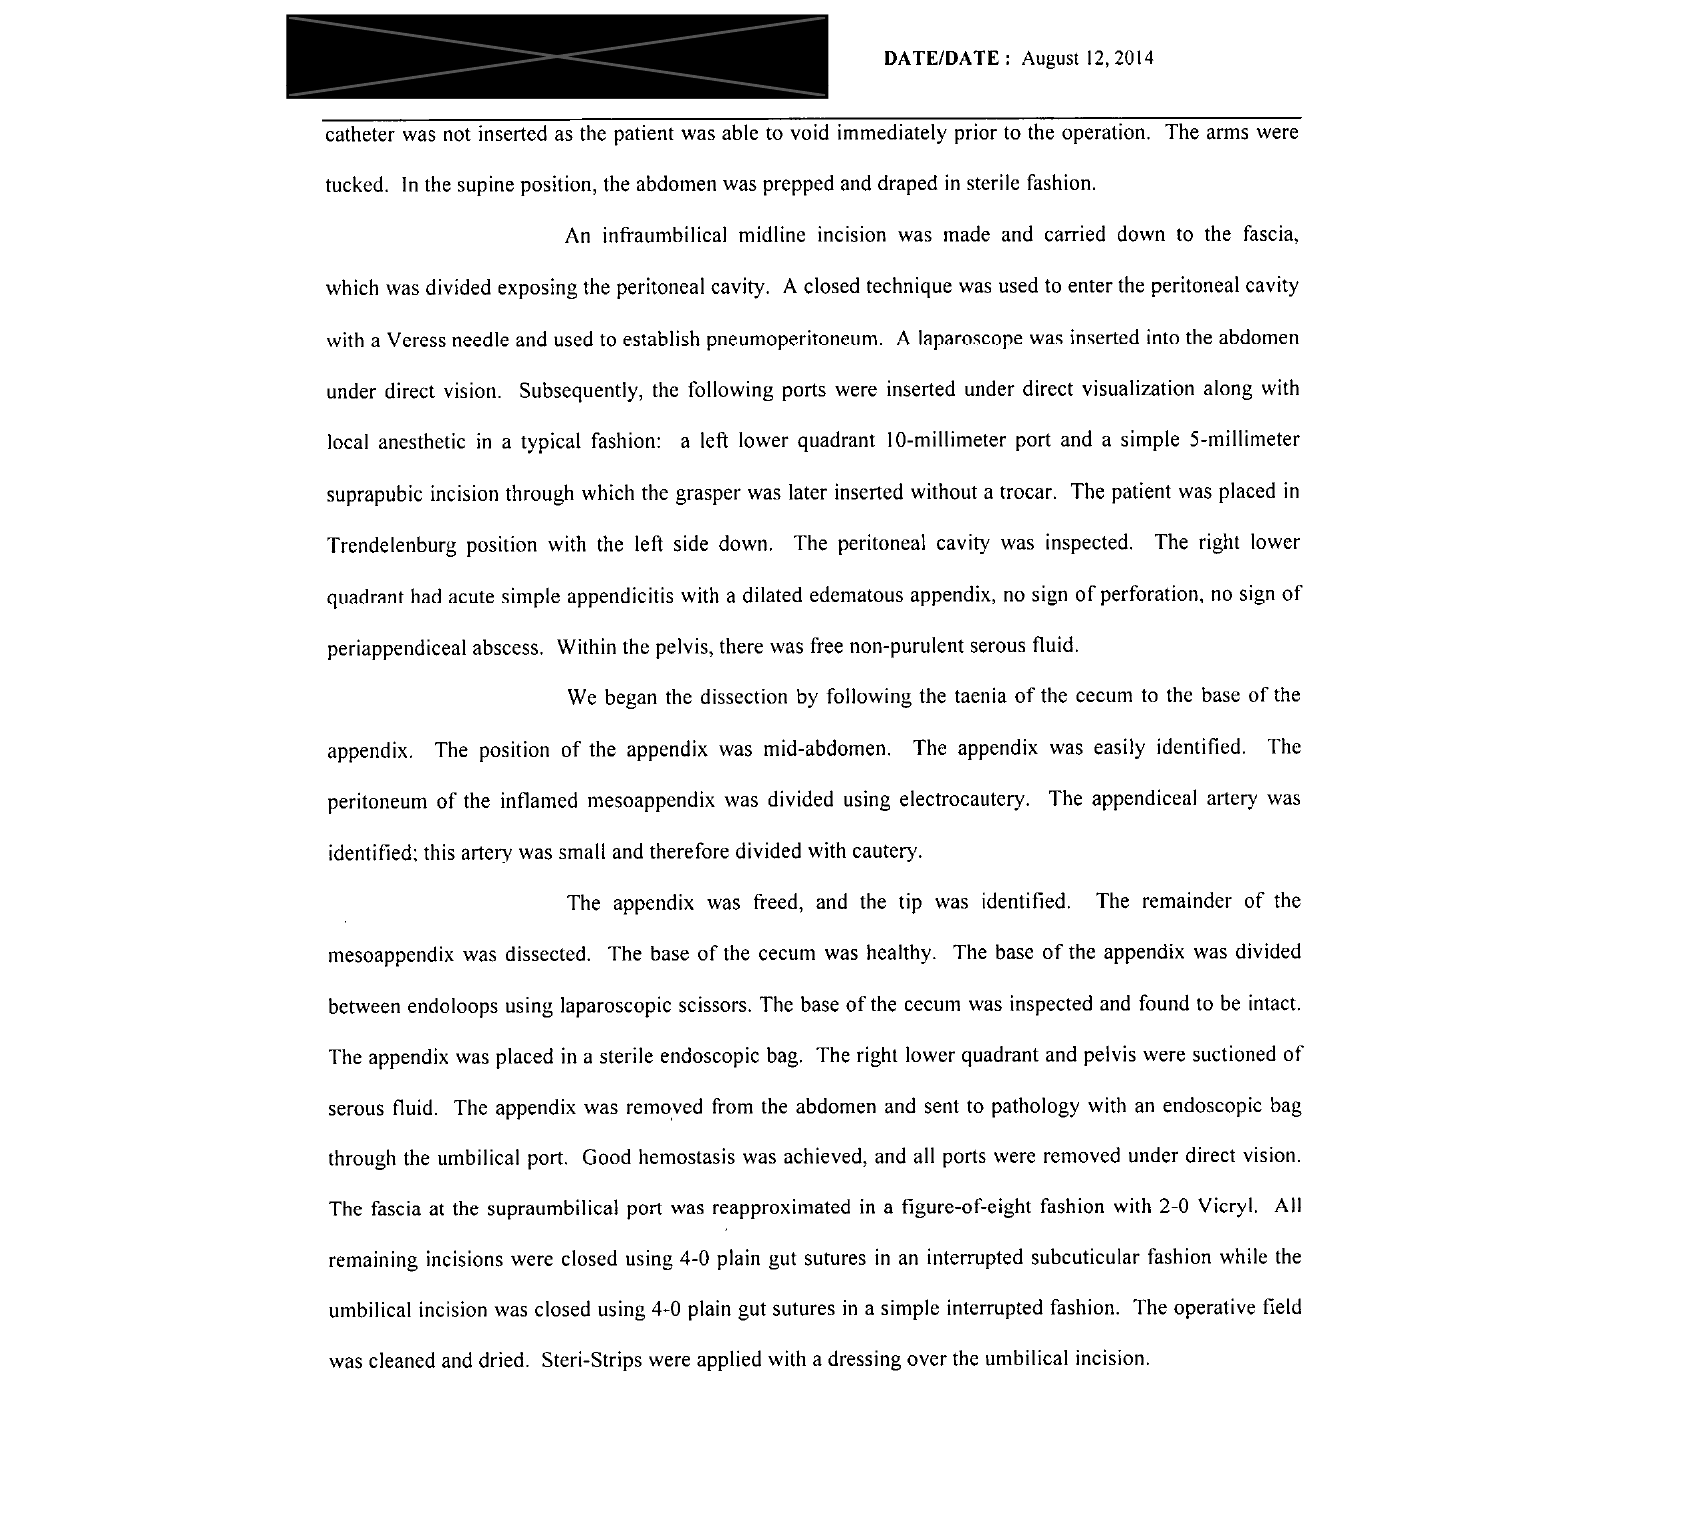

Cropping 104 O_1.png


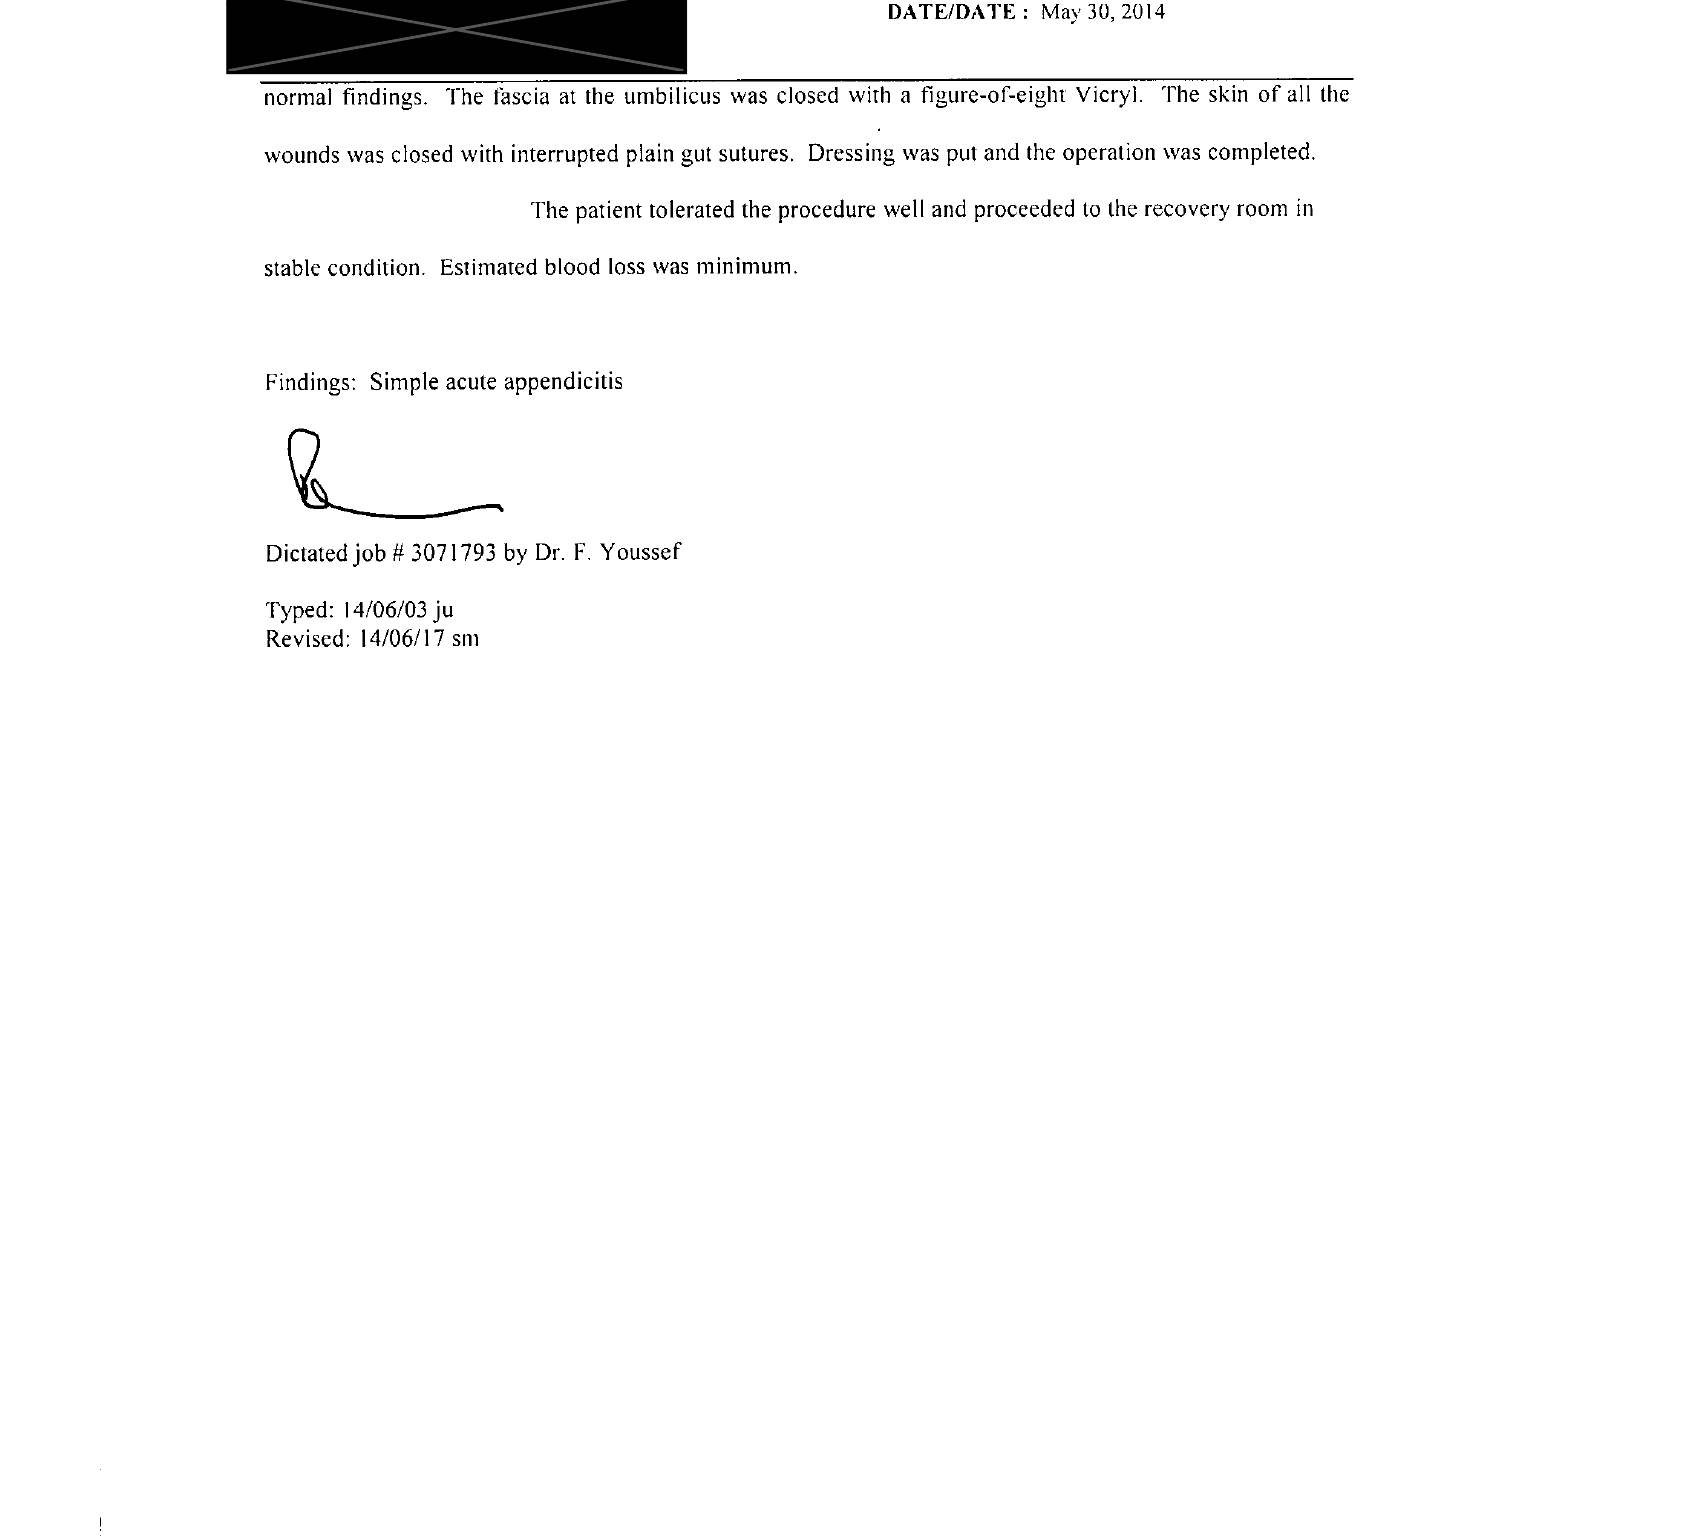

Cropping 131 O_1.png


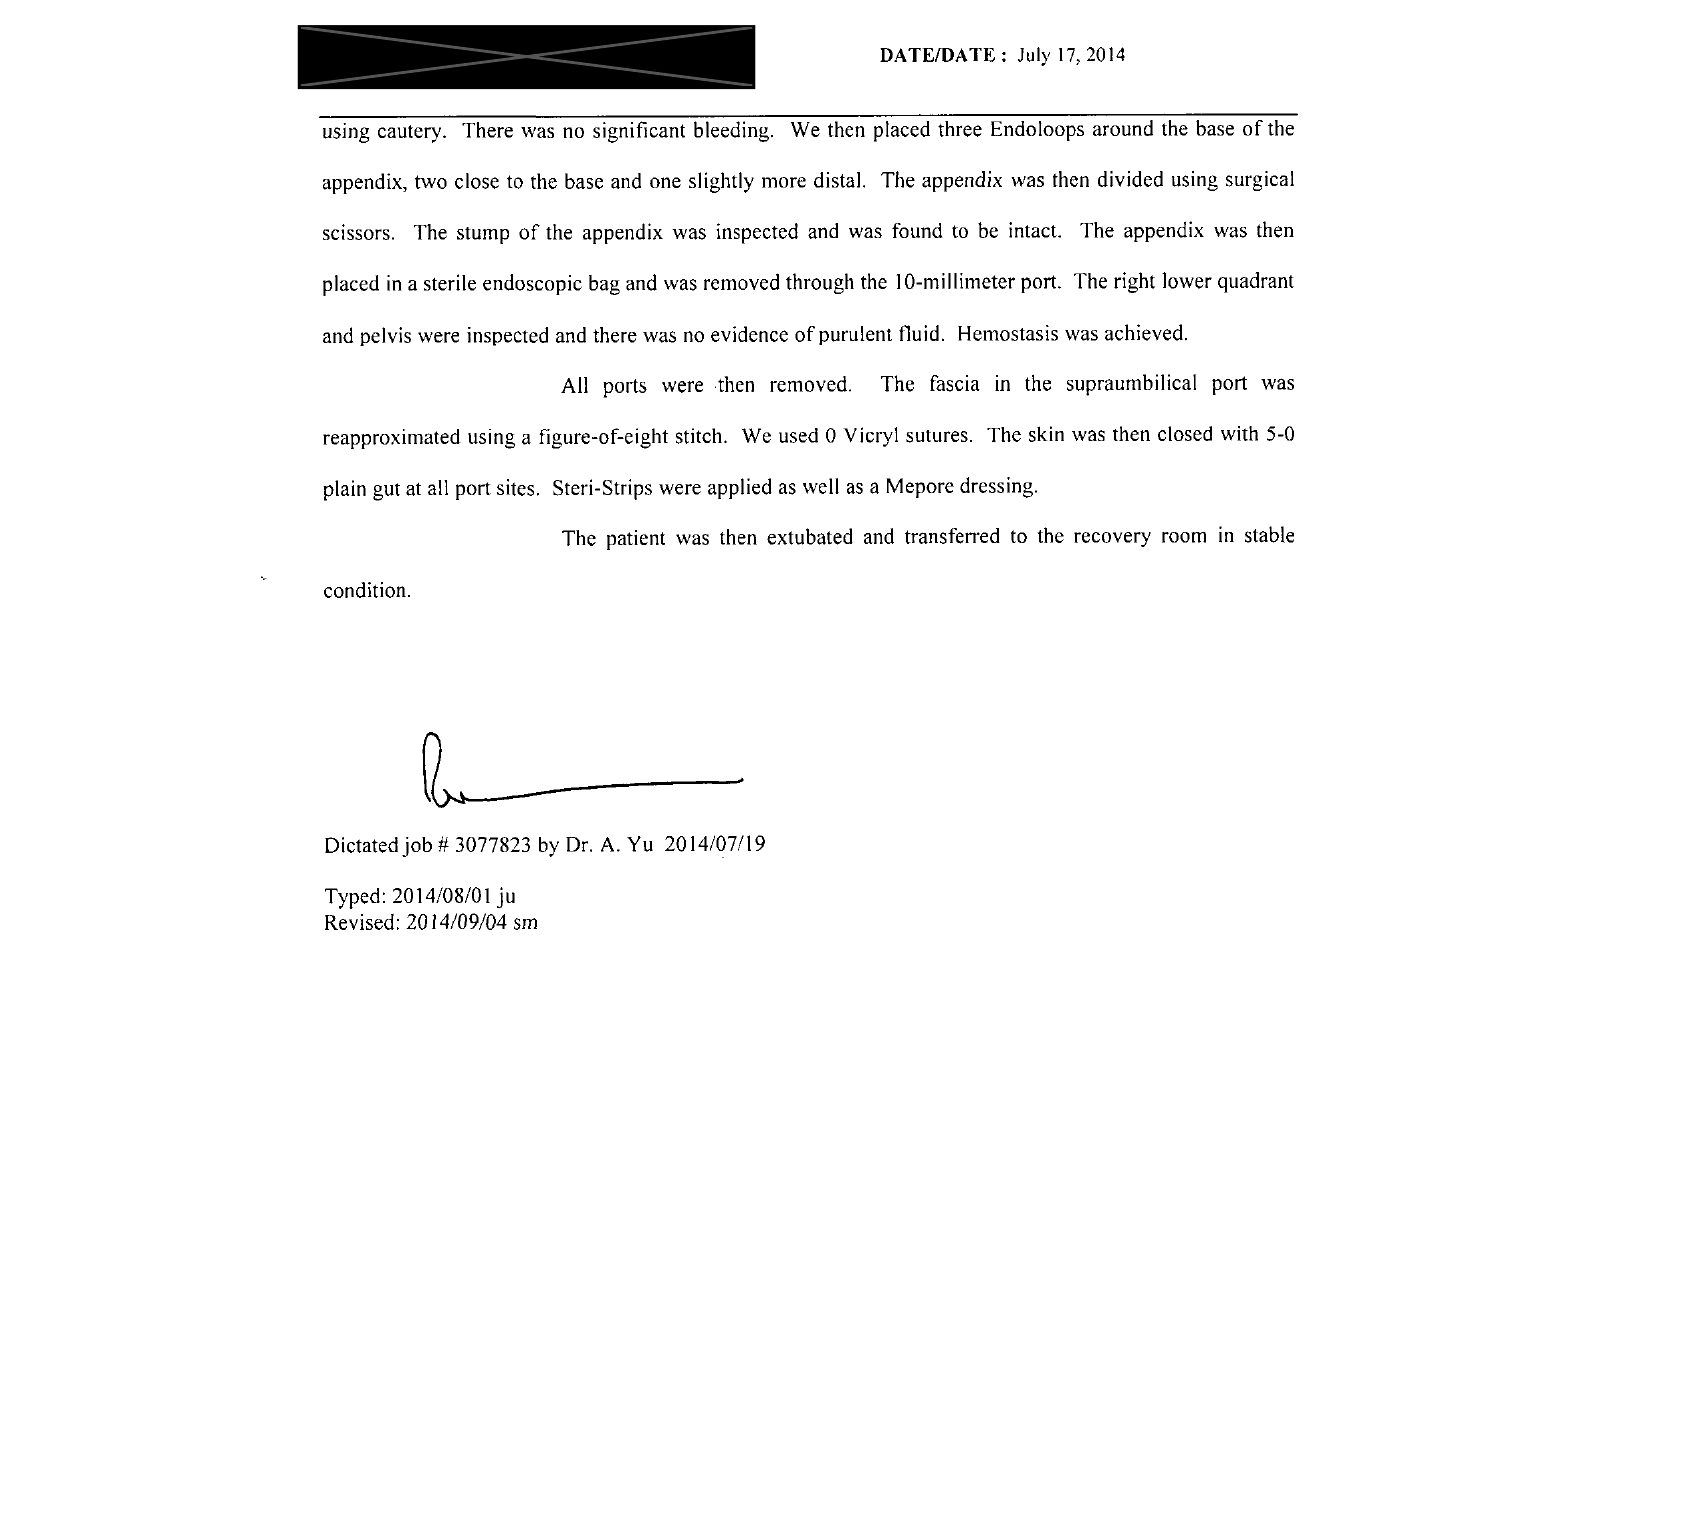

Cropping 171 O_1.png


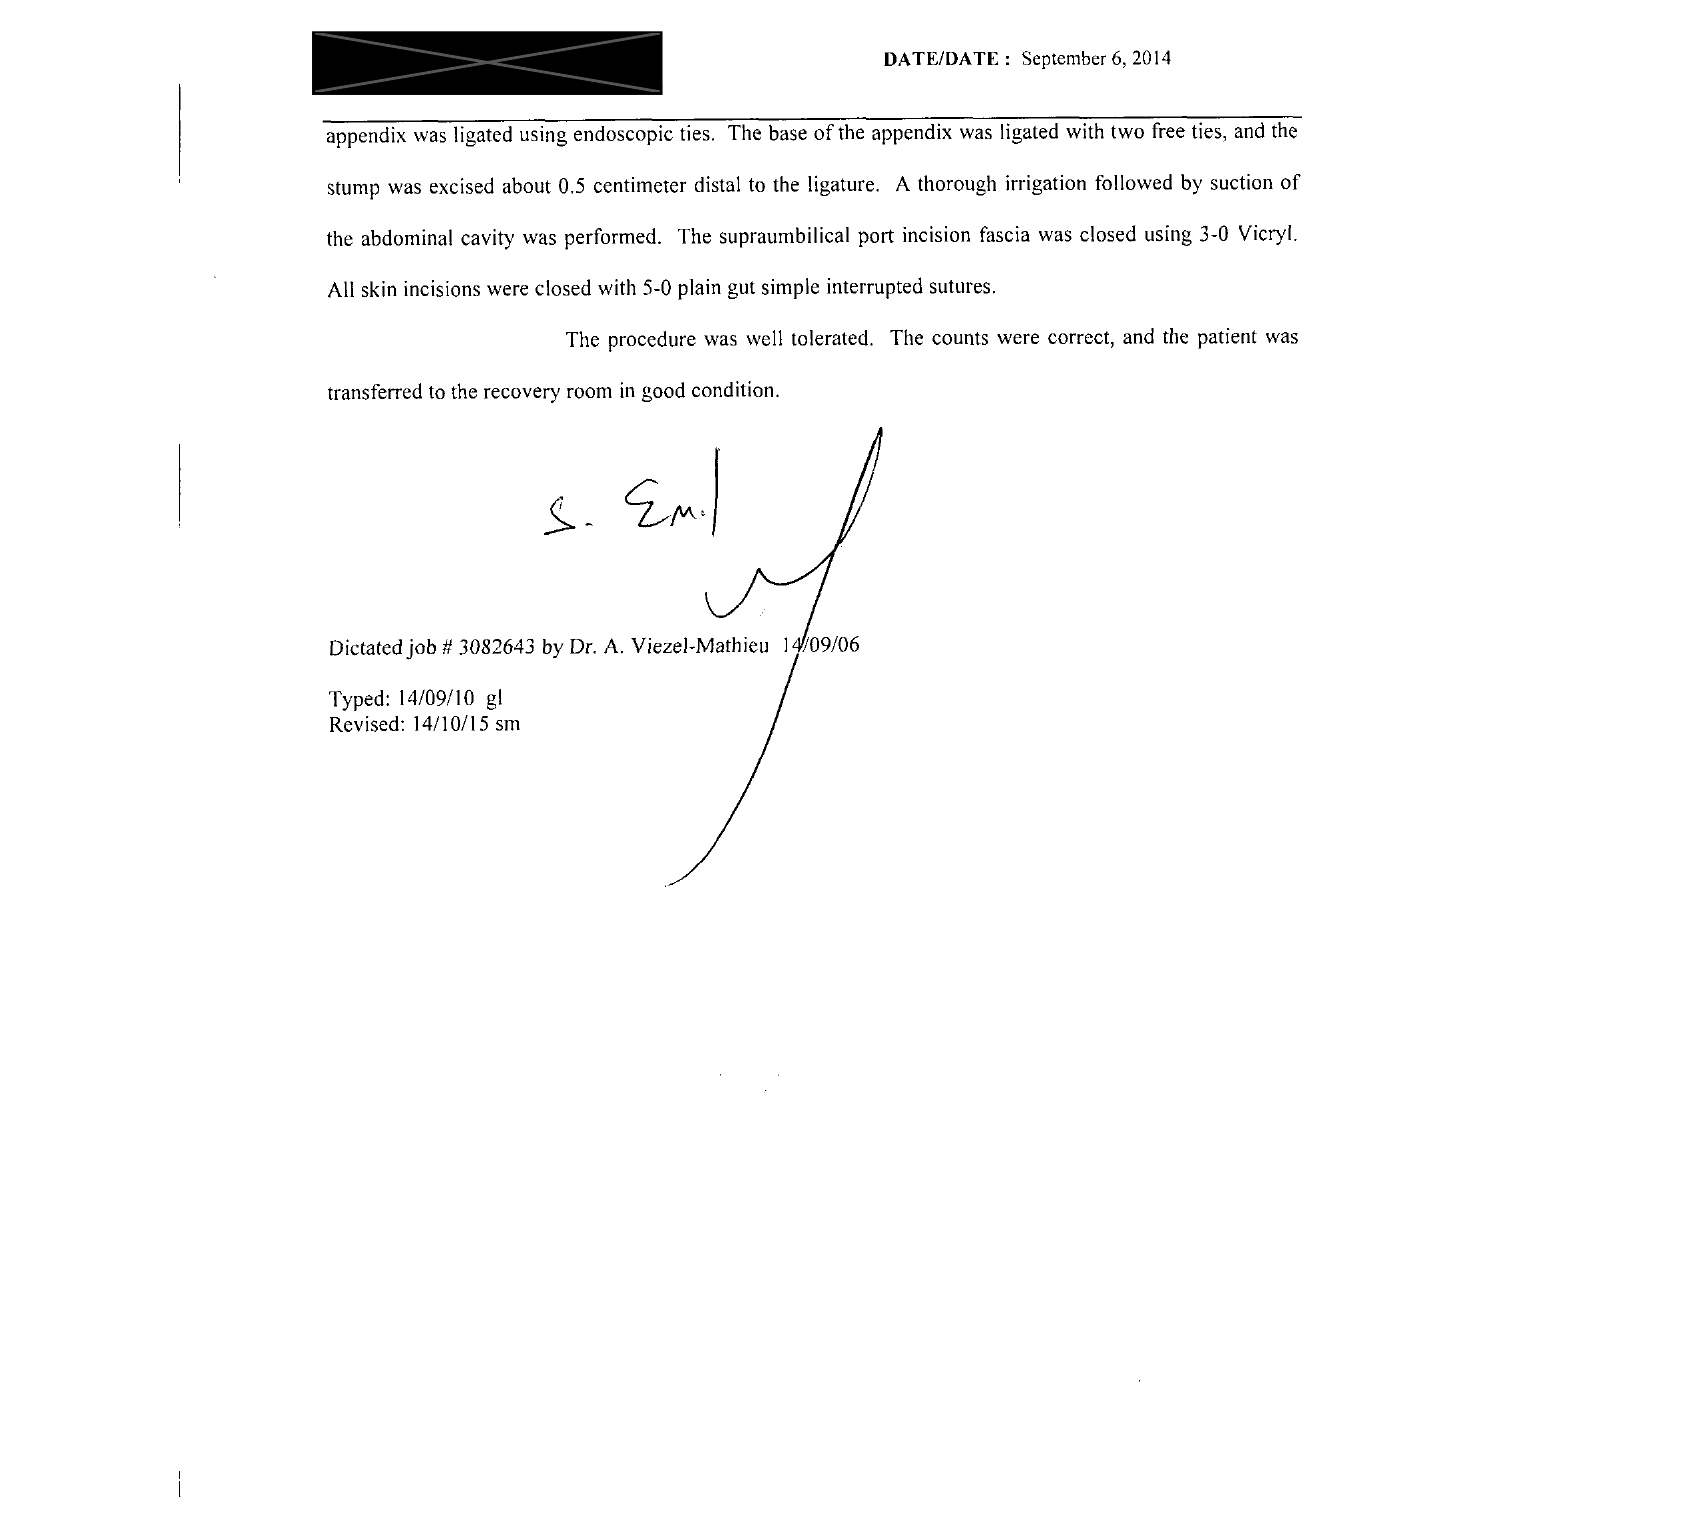

Cropping 163 O_1.png


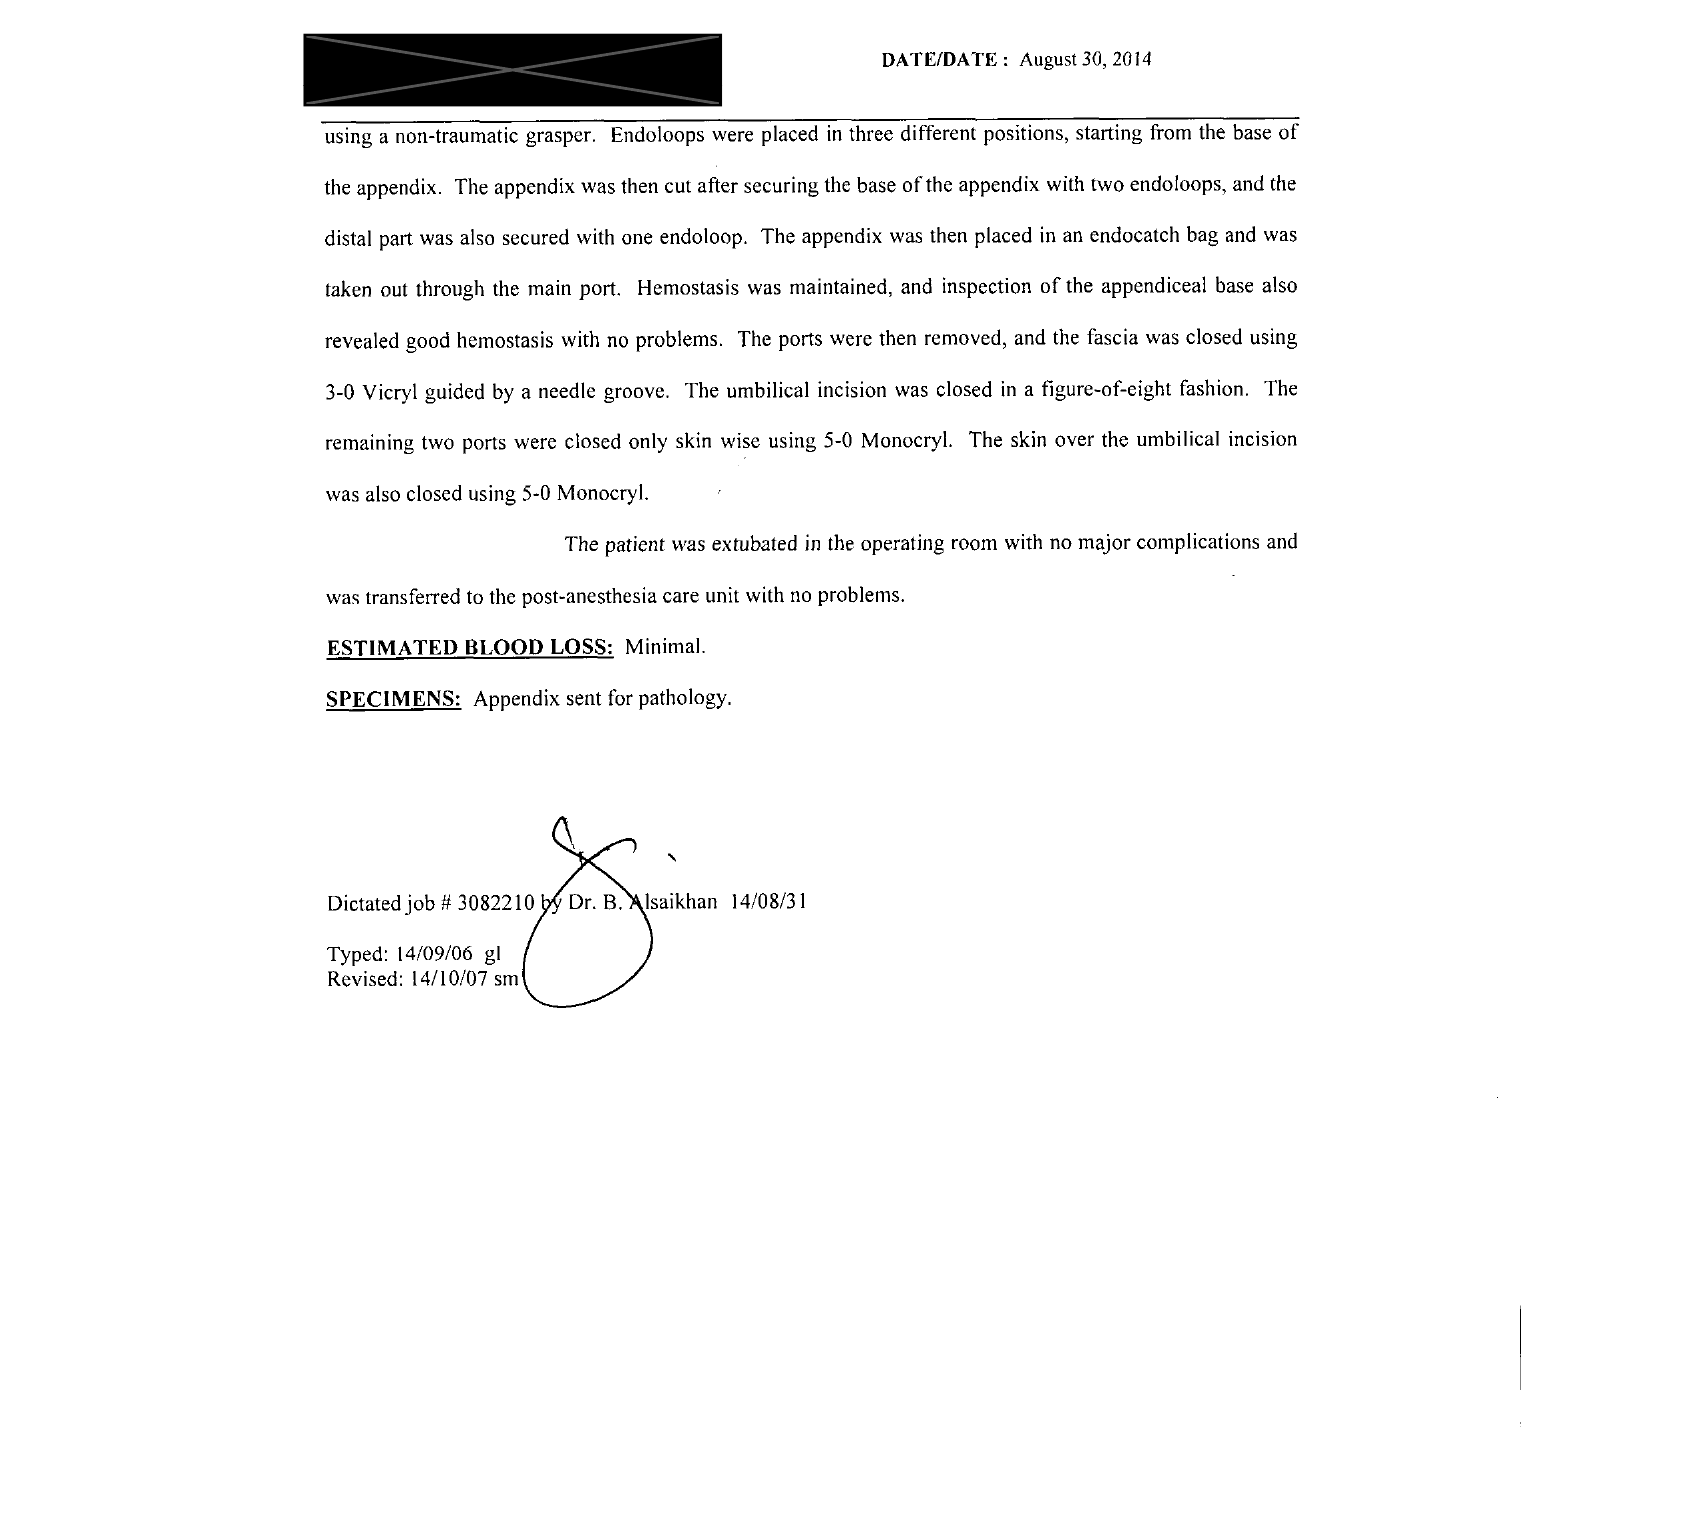

Cropping 129 O_1.png


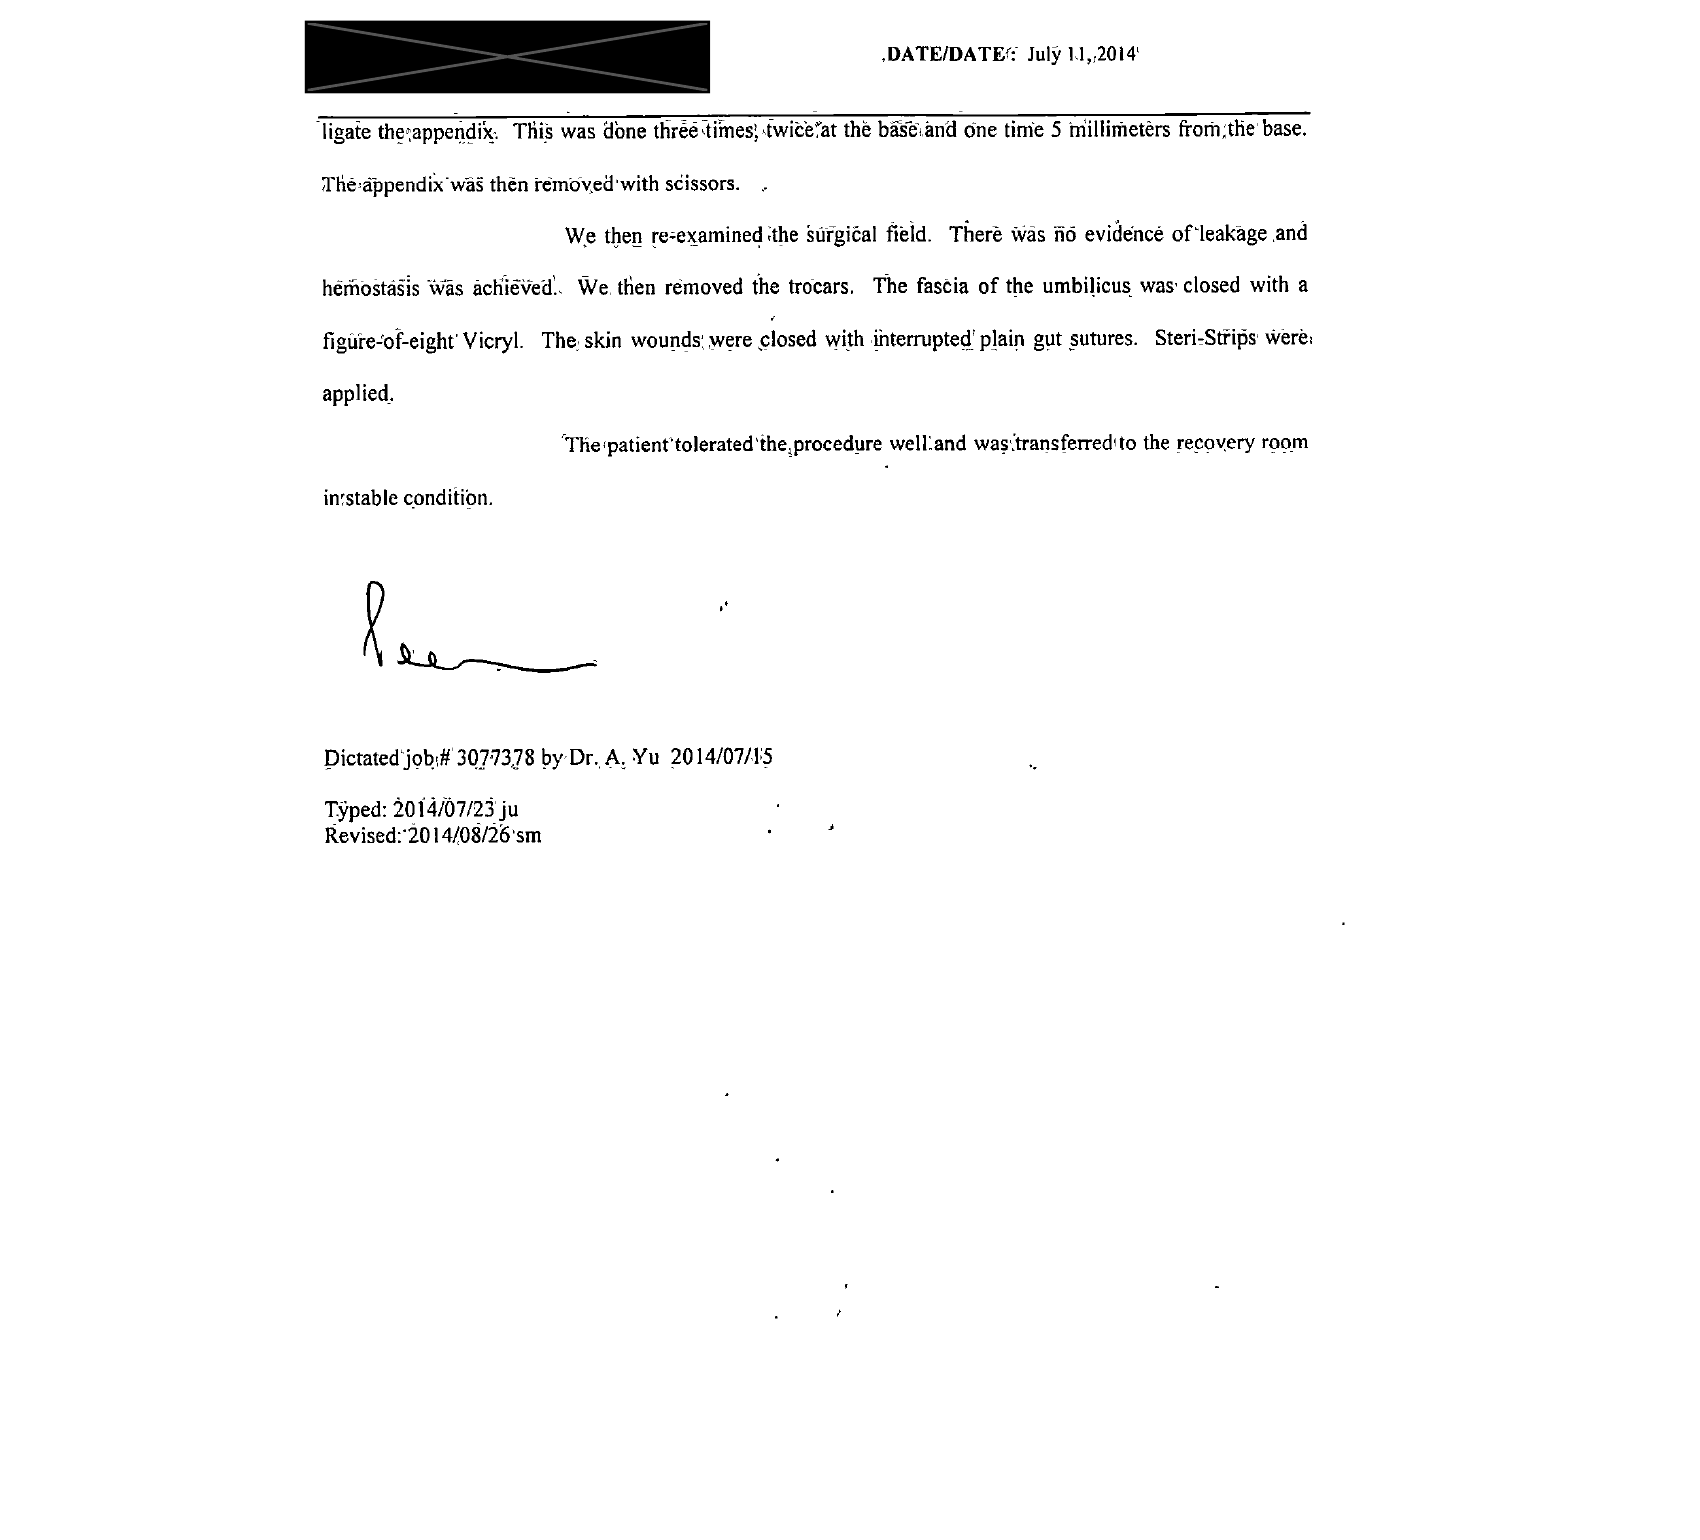

Cropping 158 O_1.png


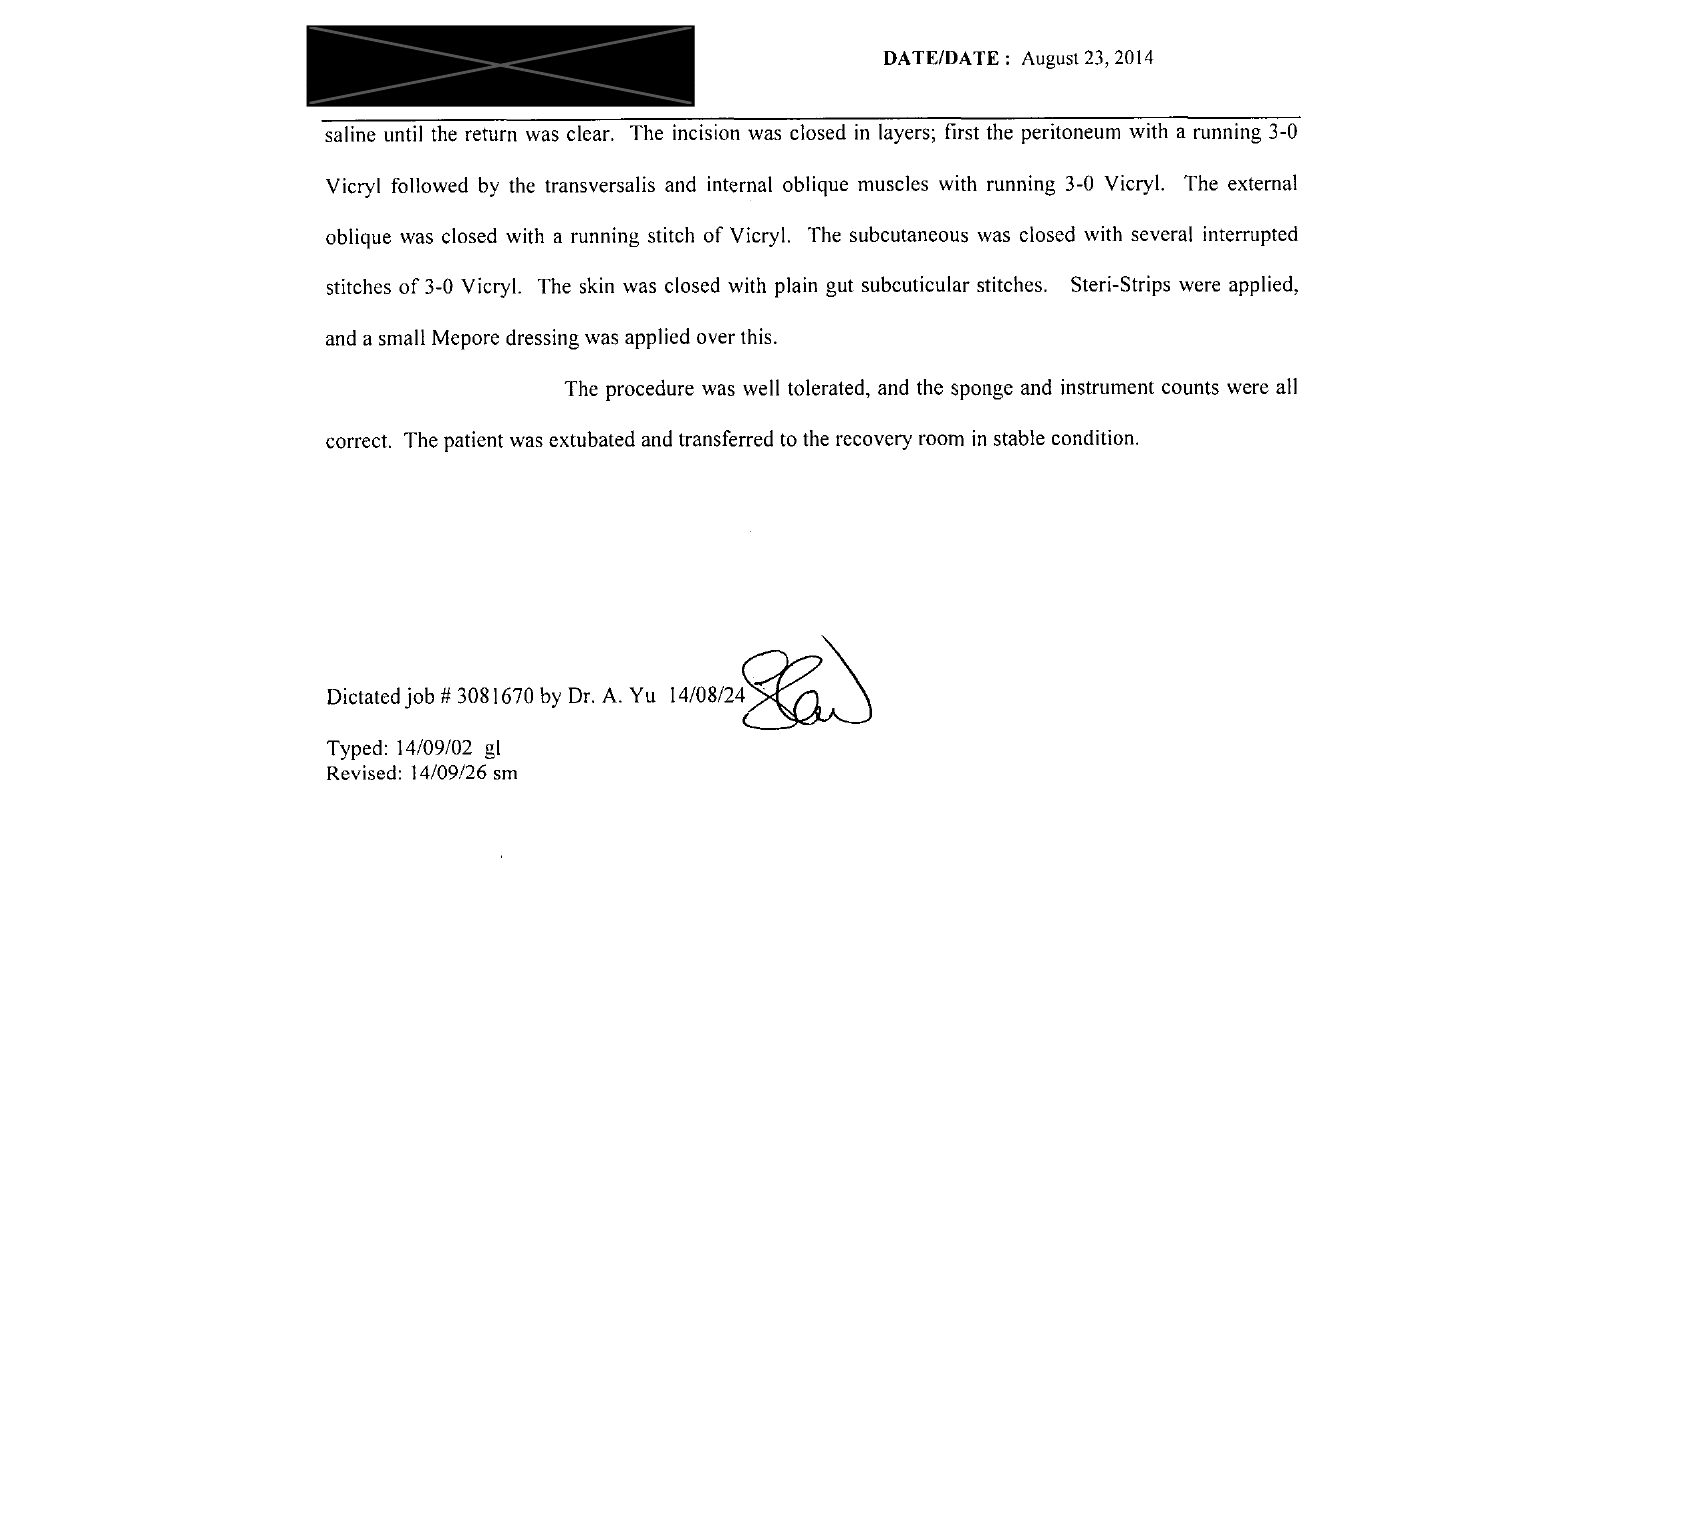

Cropping 83 O_1.png


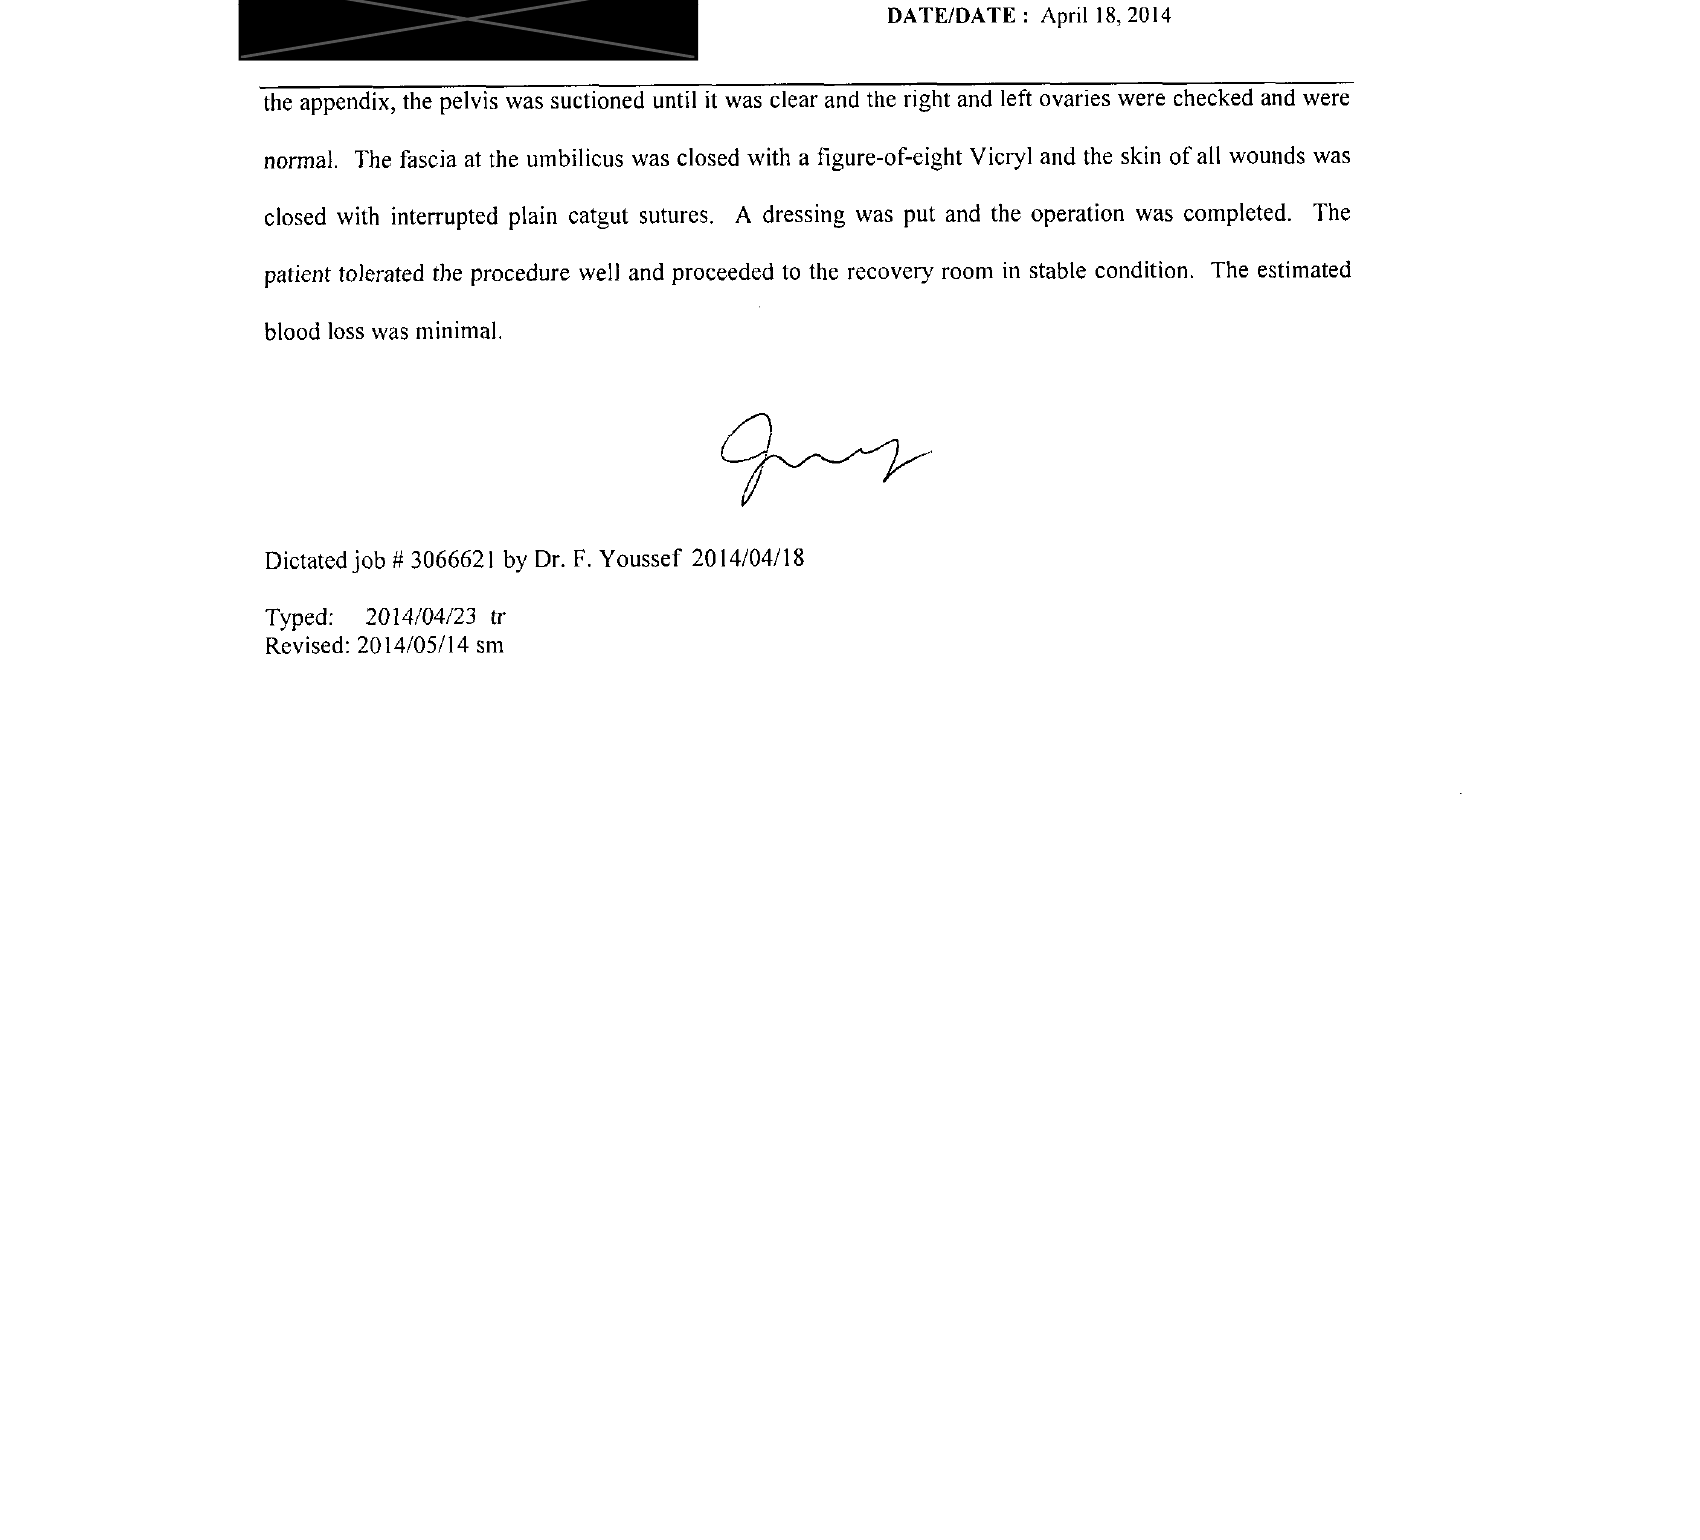

Cropping 63 O_1.png


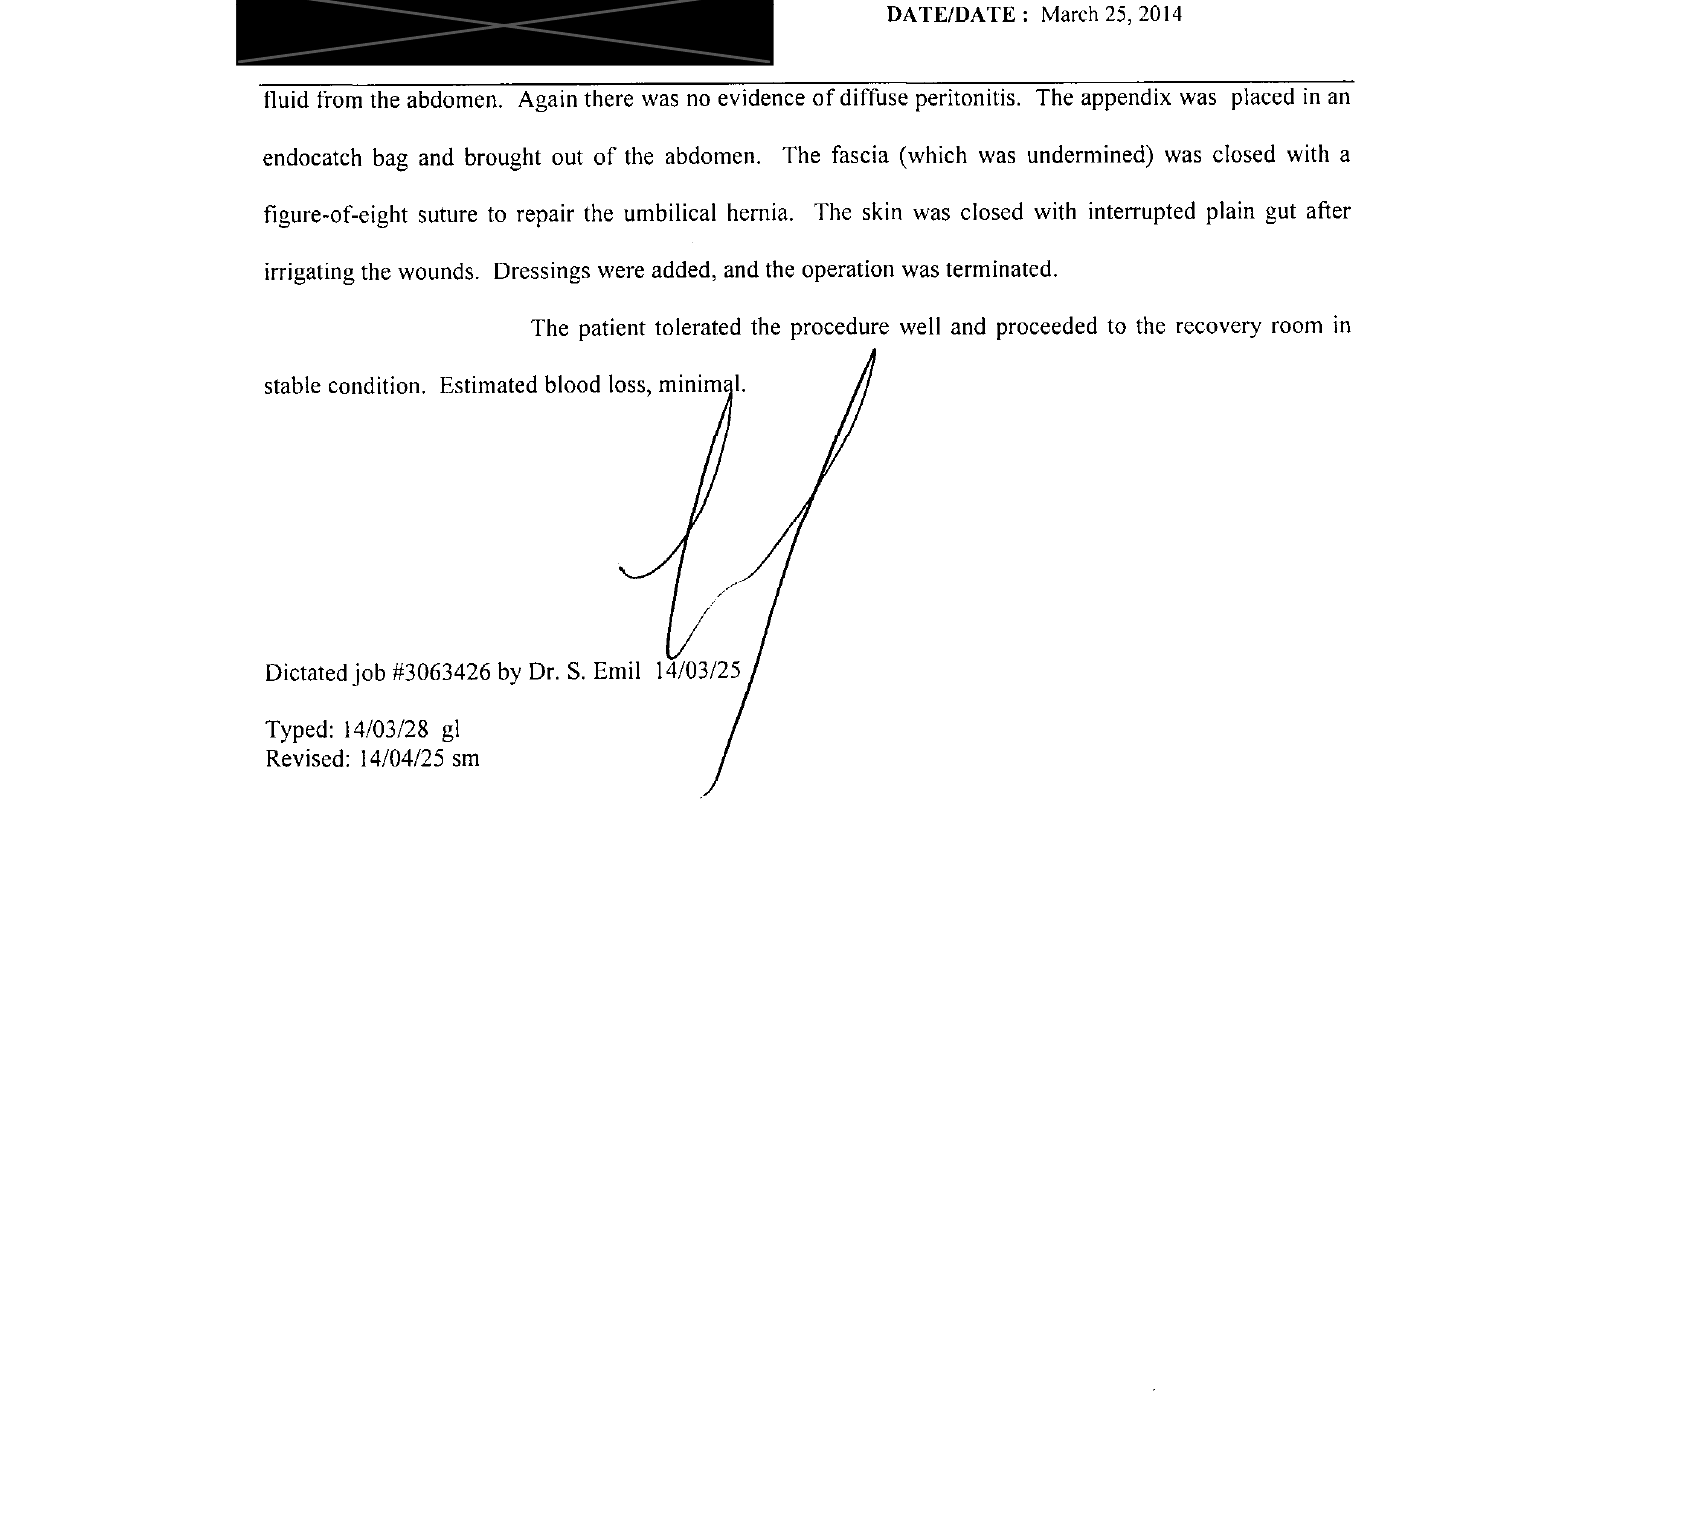

Cropping 176 O_1.png


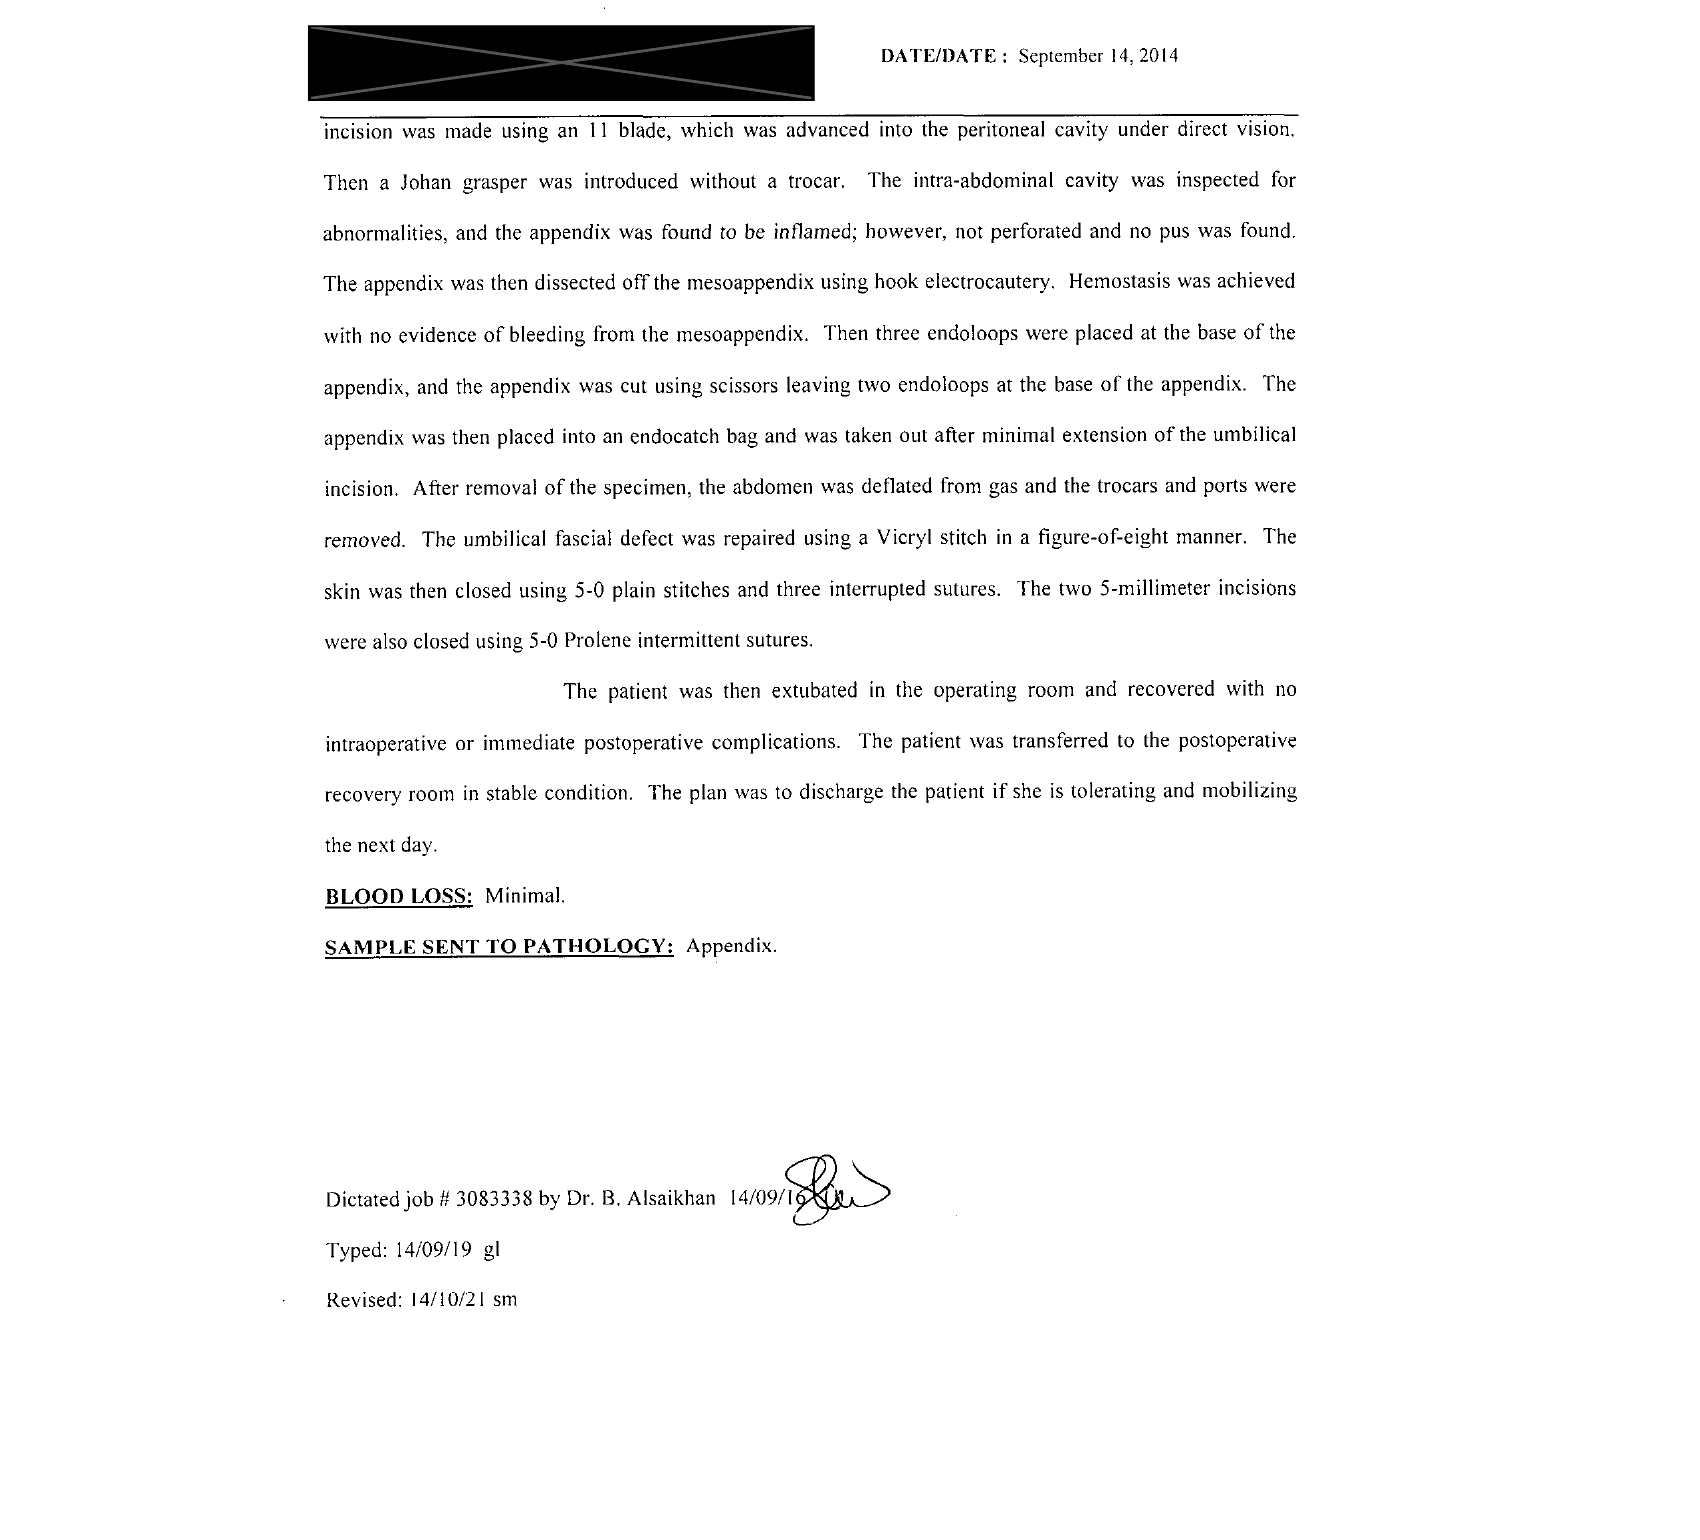

Cropping 133 O_1.png


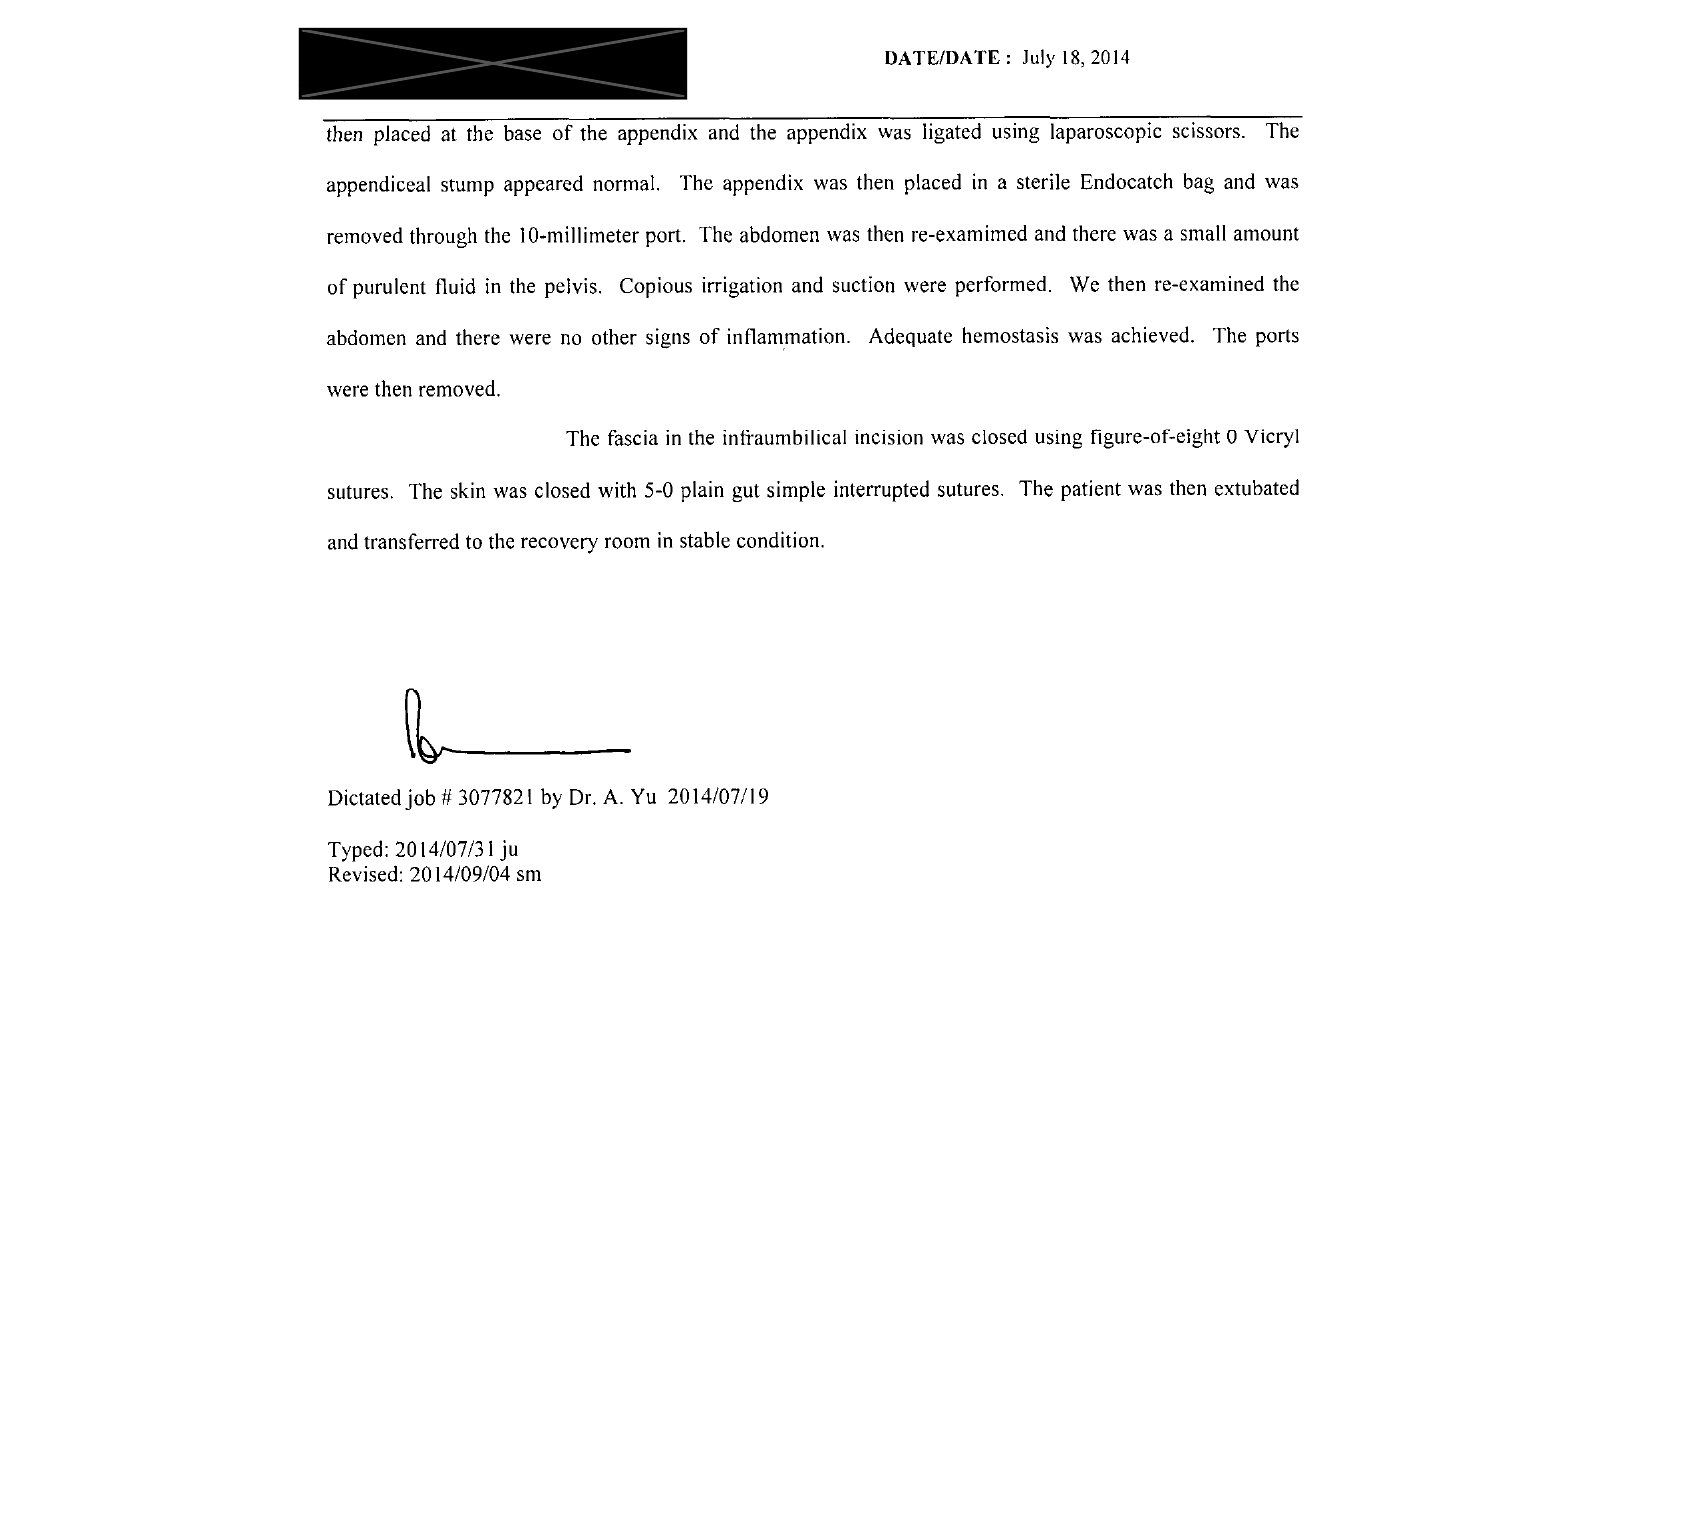

Cropping 127 O_1.png


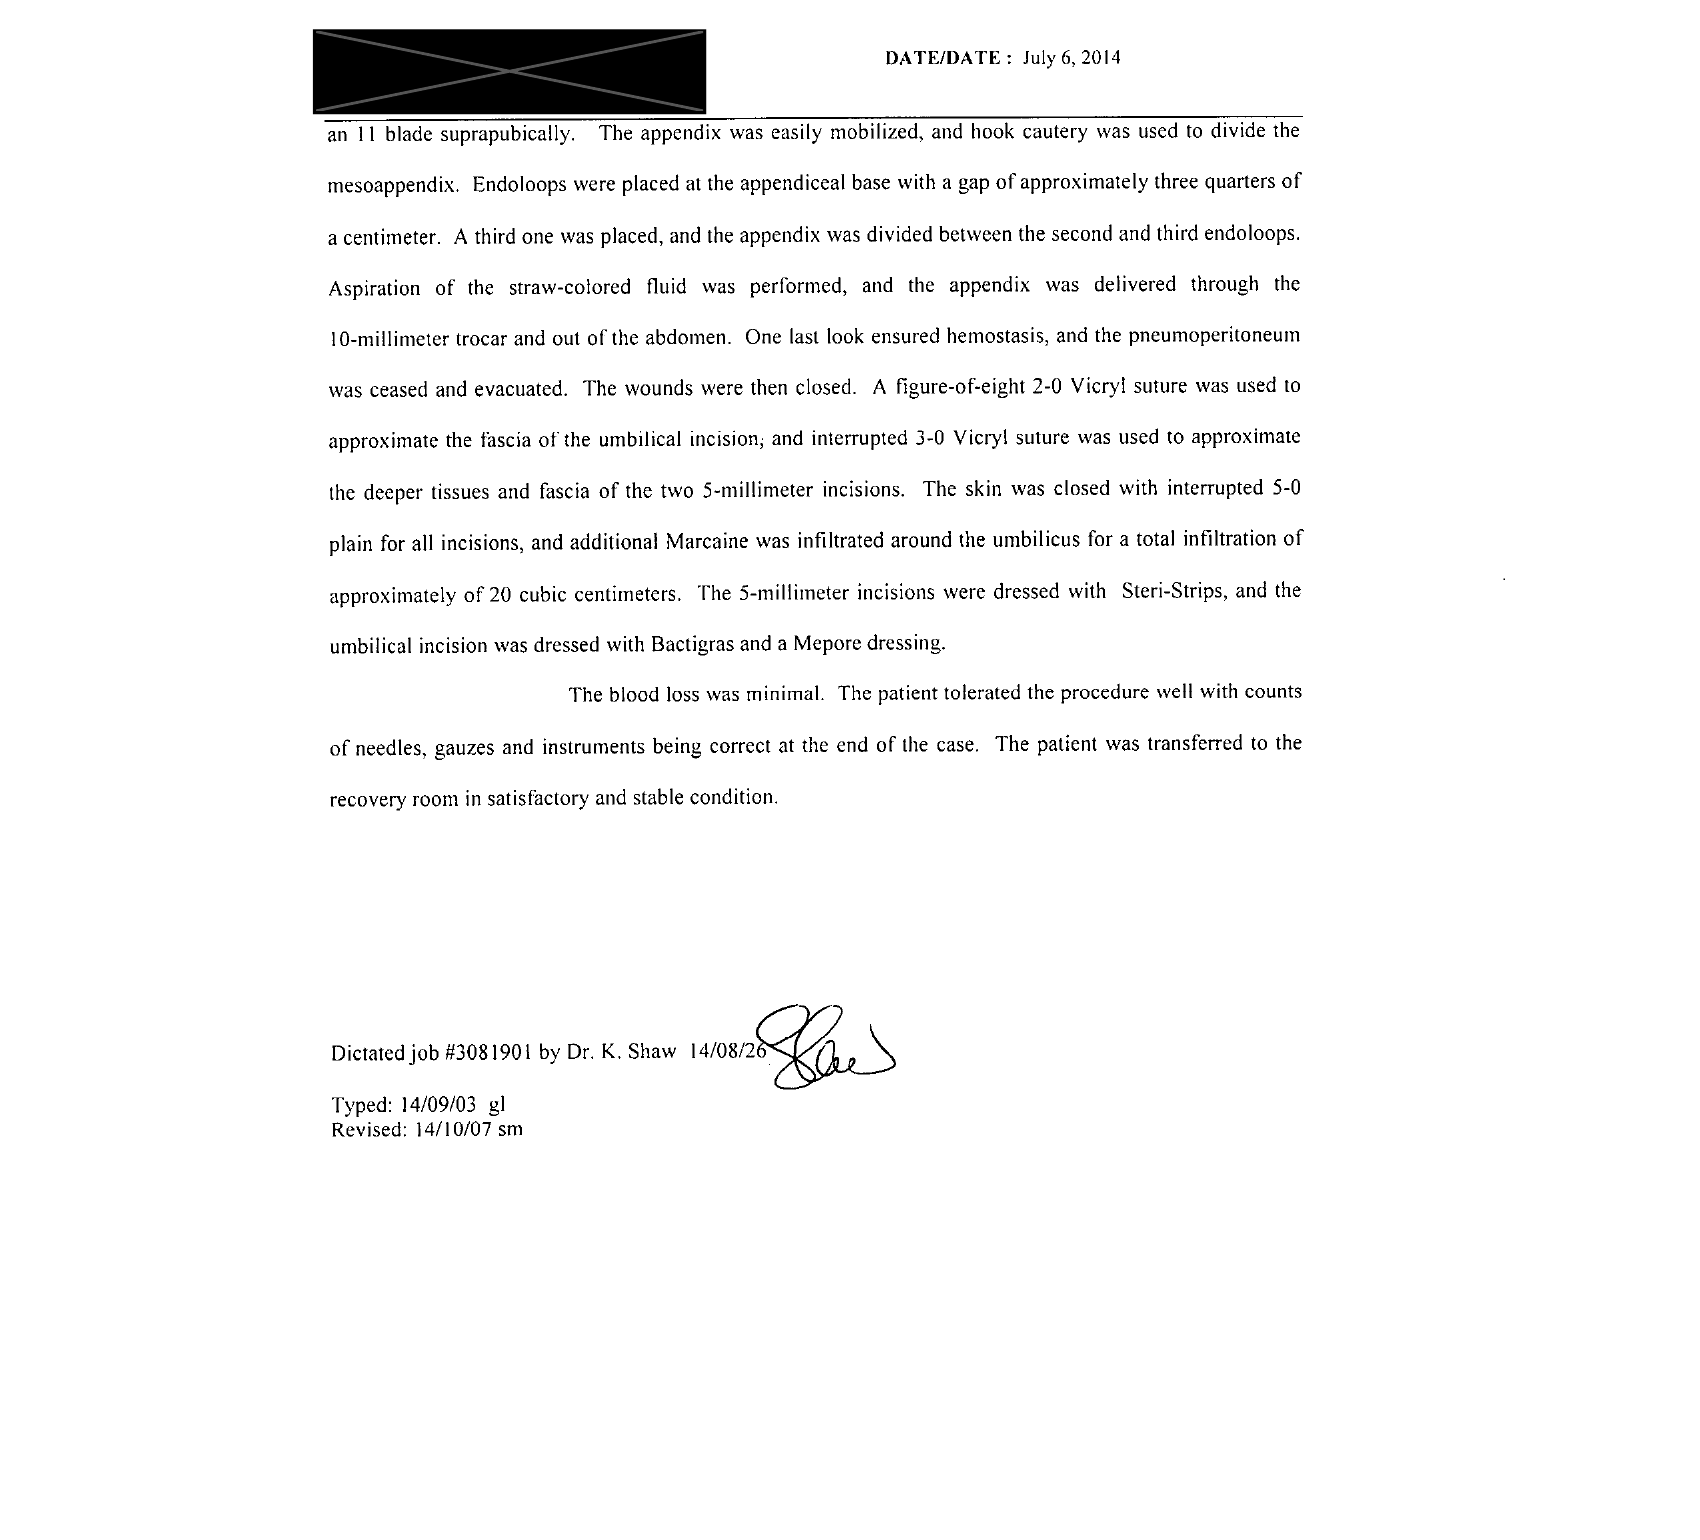

Cropping 88 O_1.png


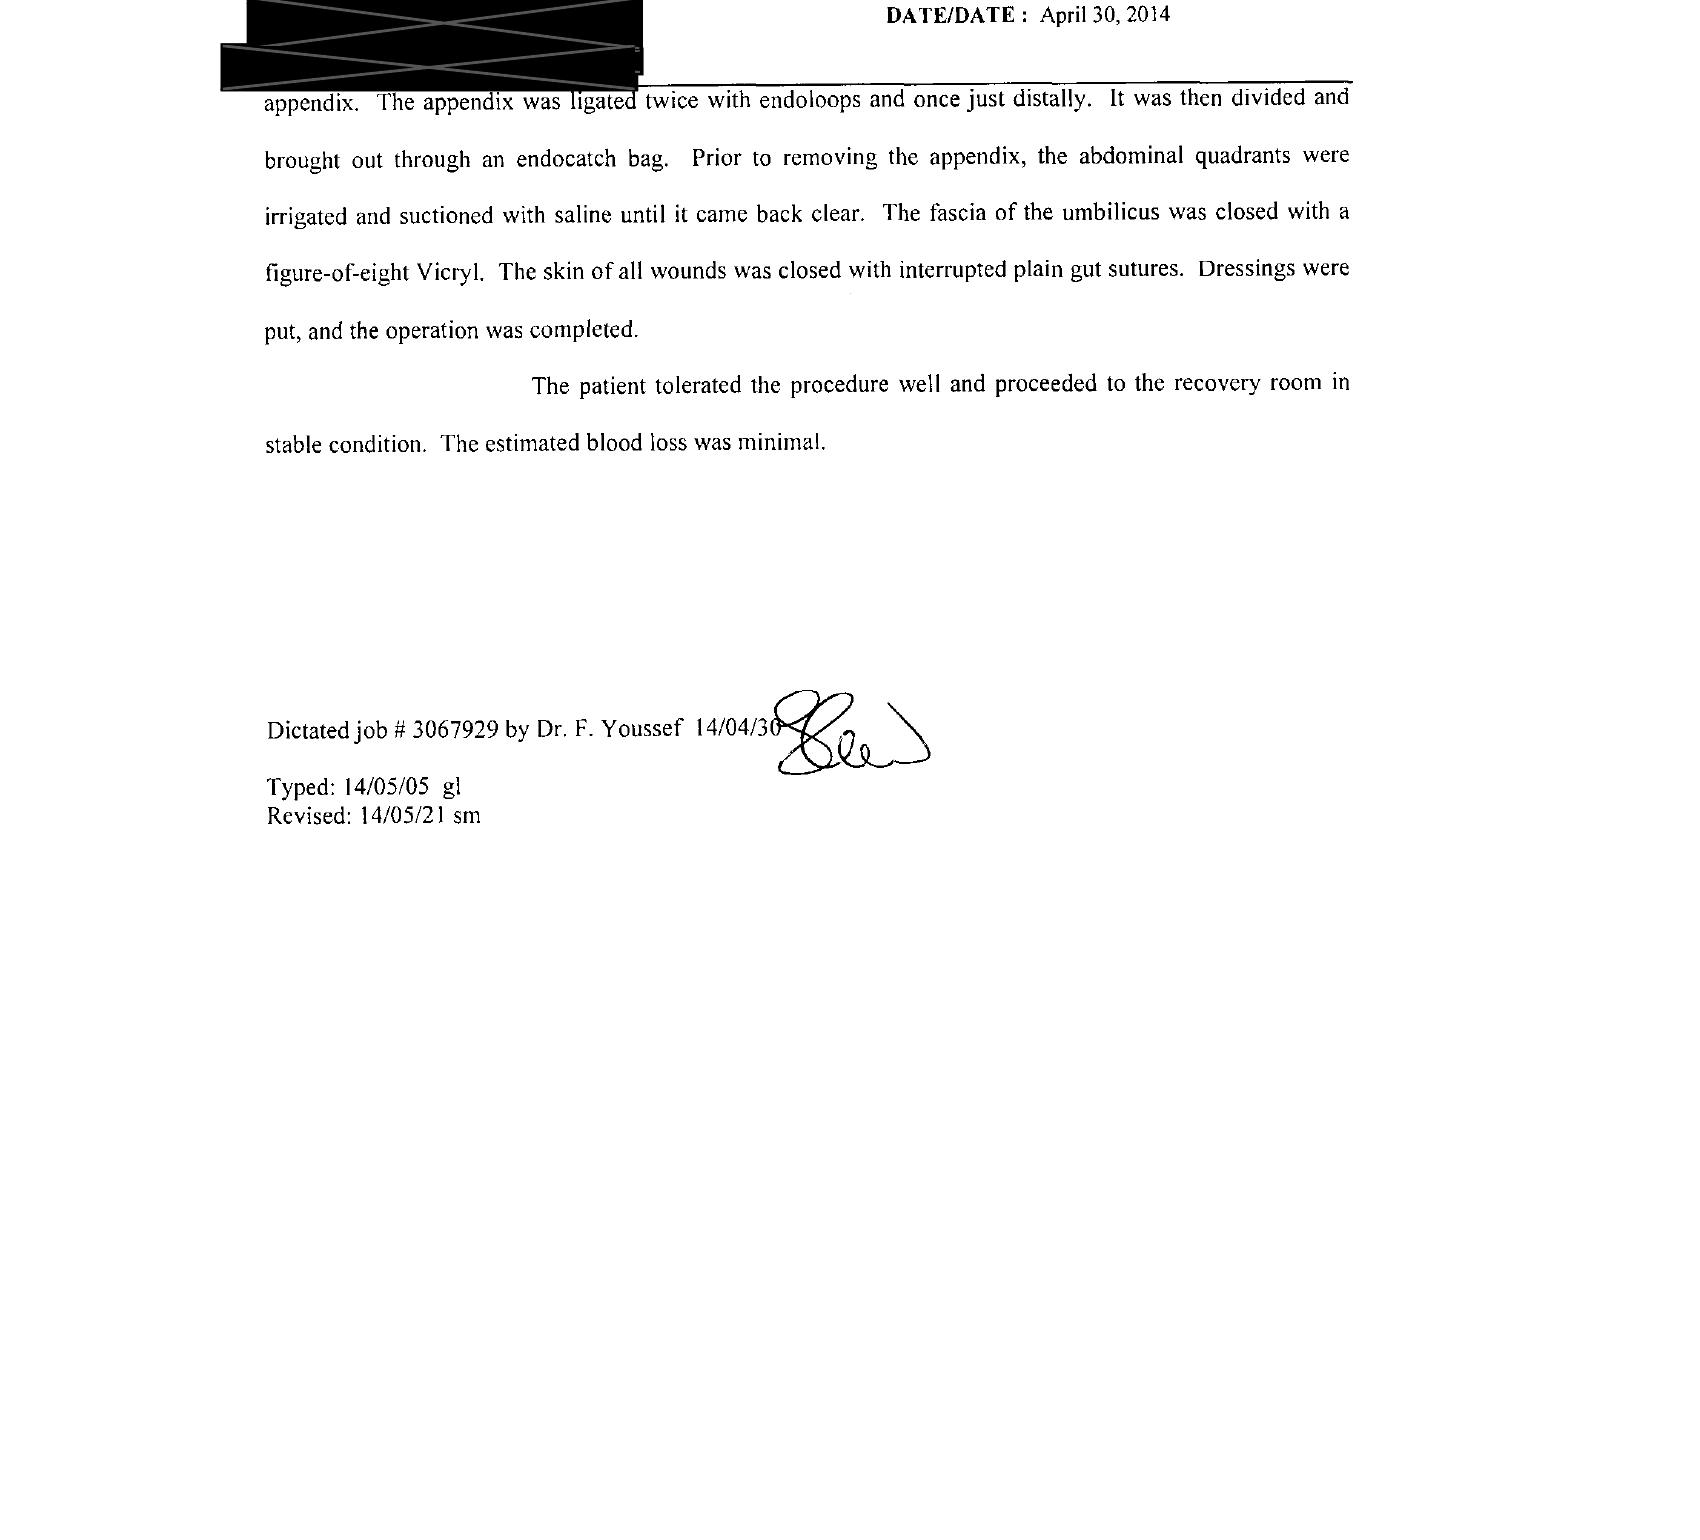

Cropping 67 O_1.png


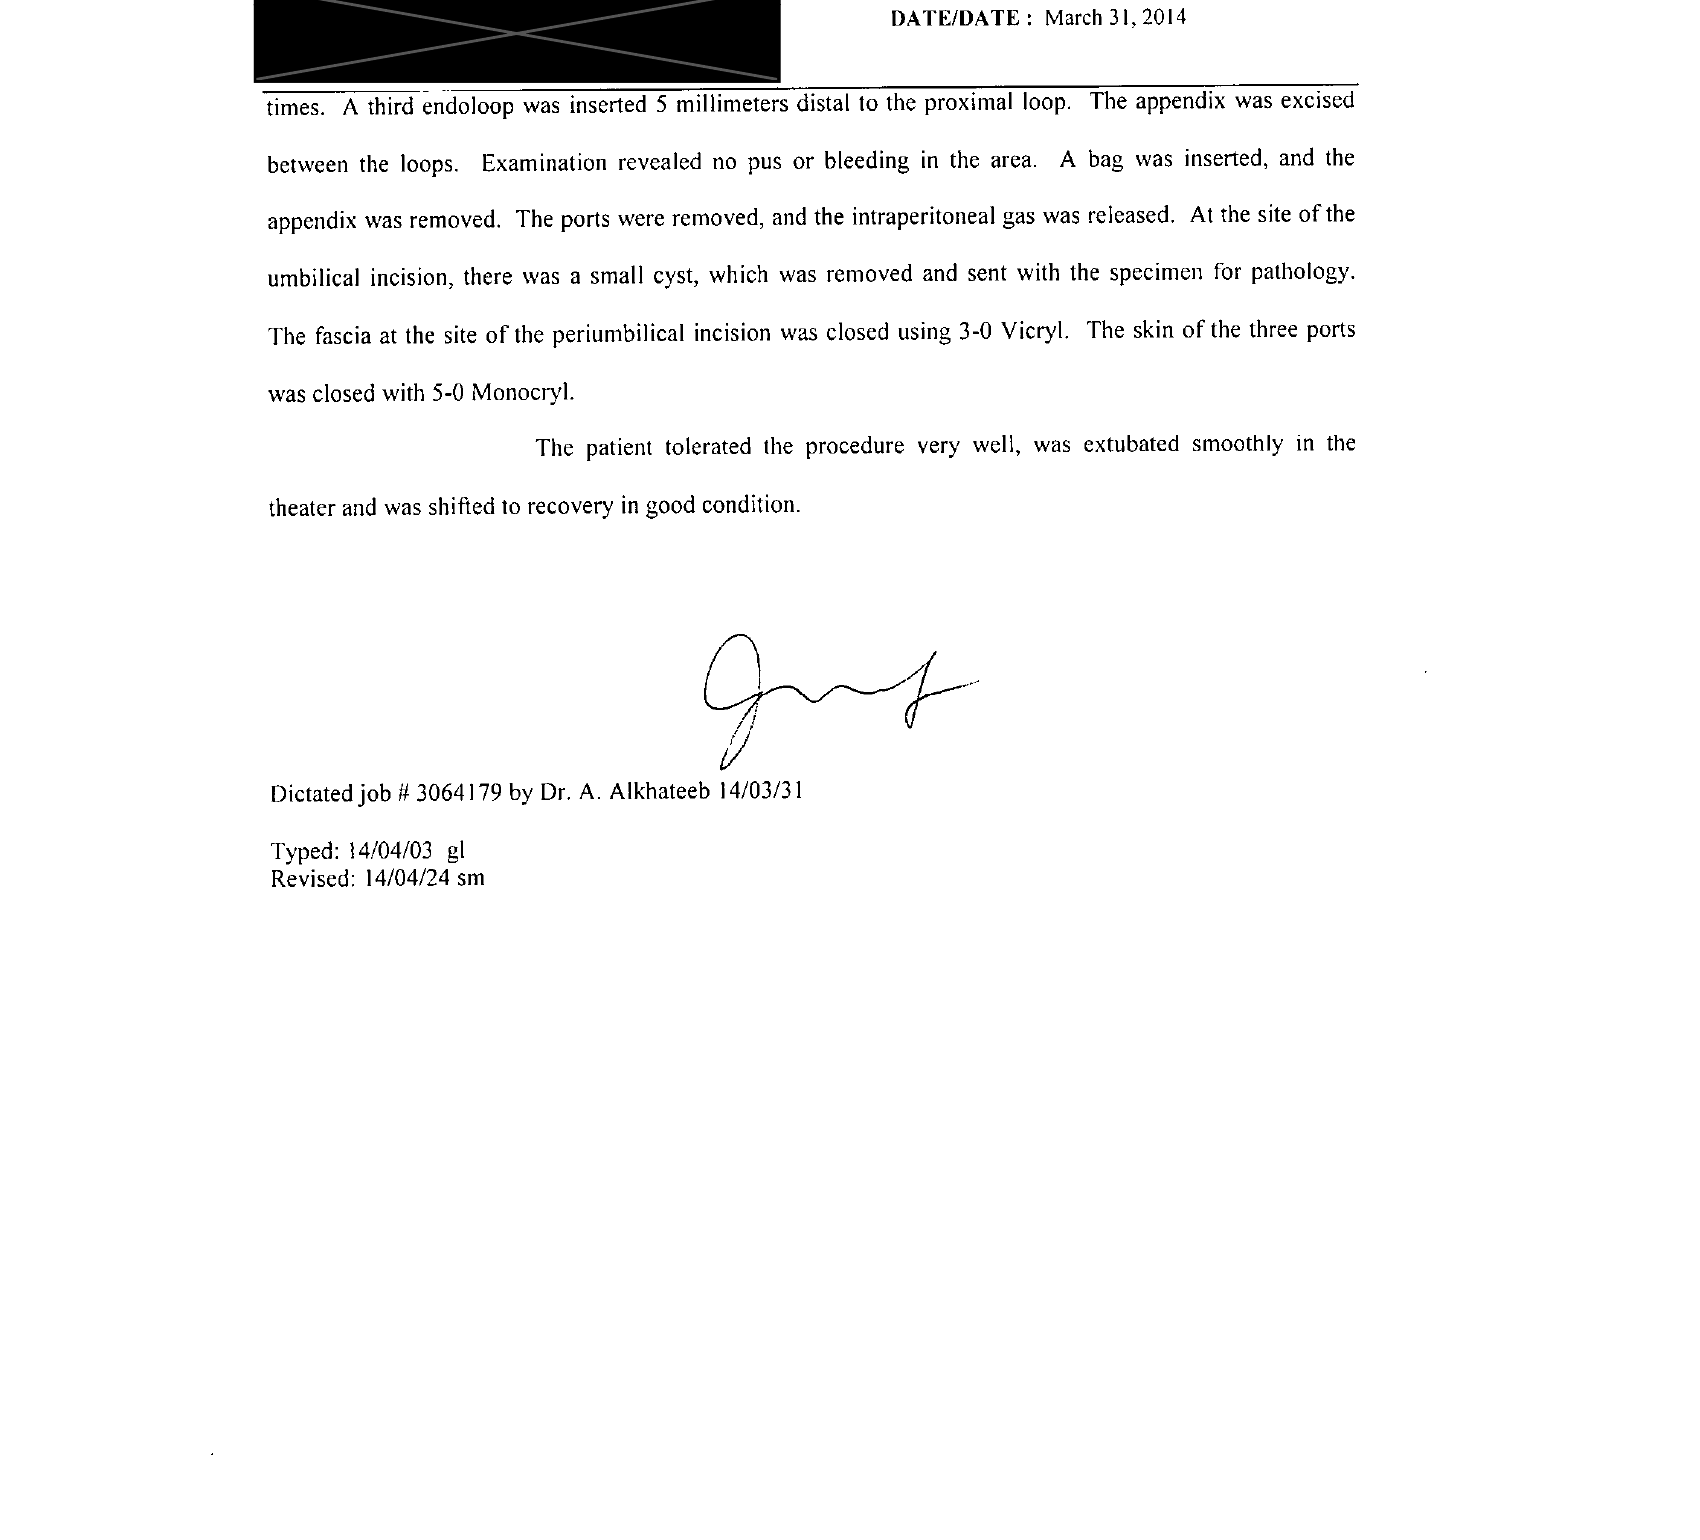

Cropping 153 O_1.png


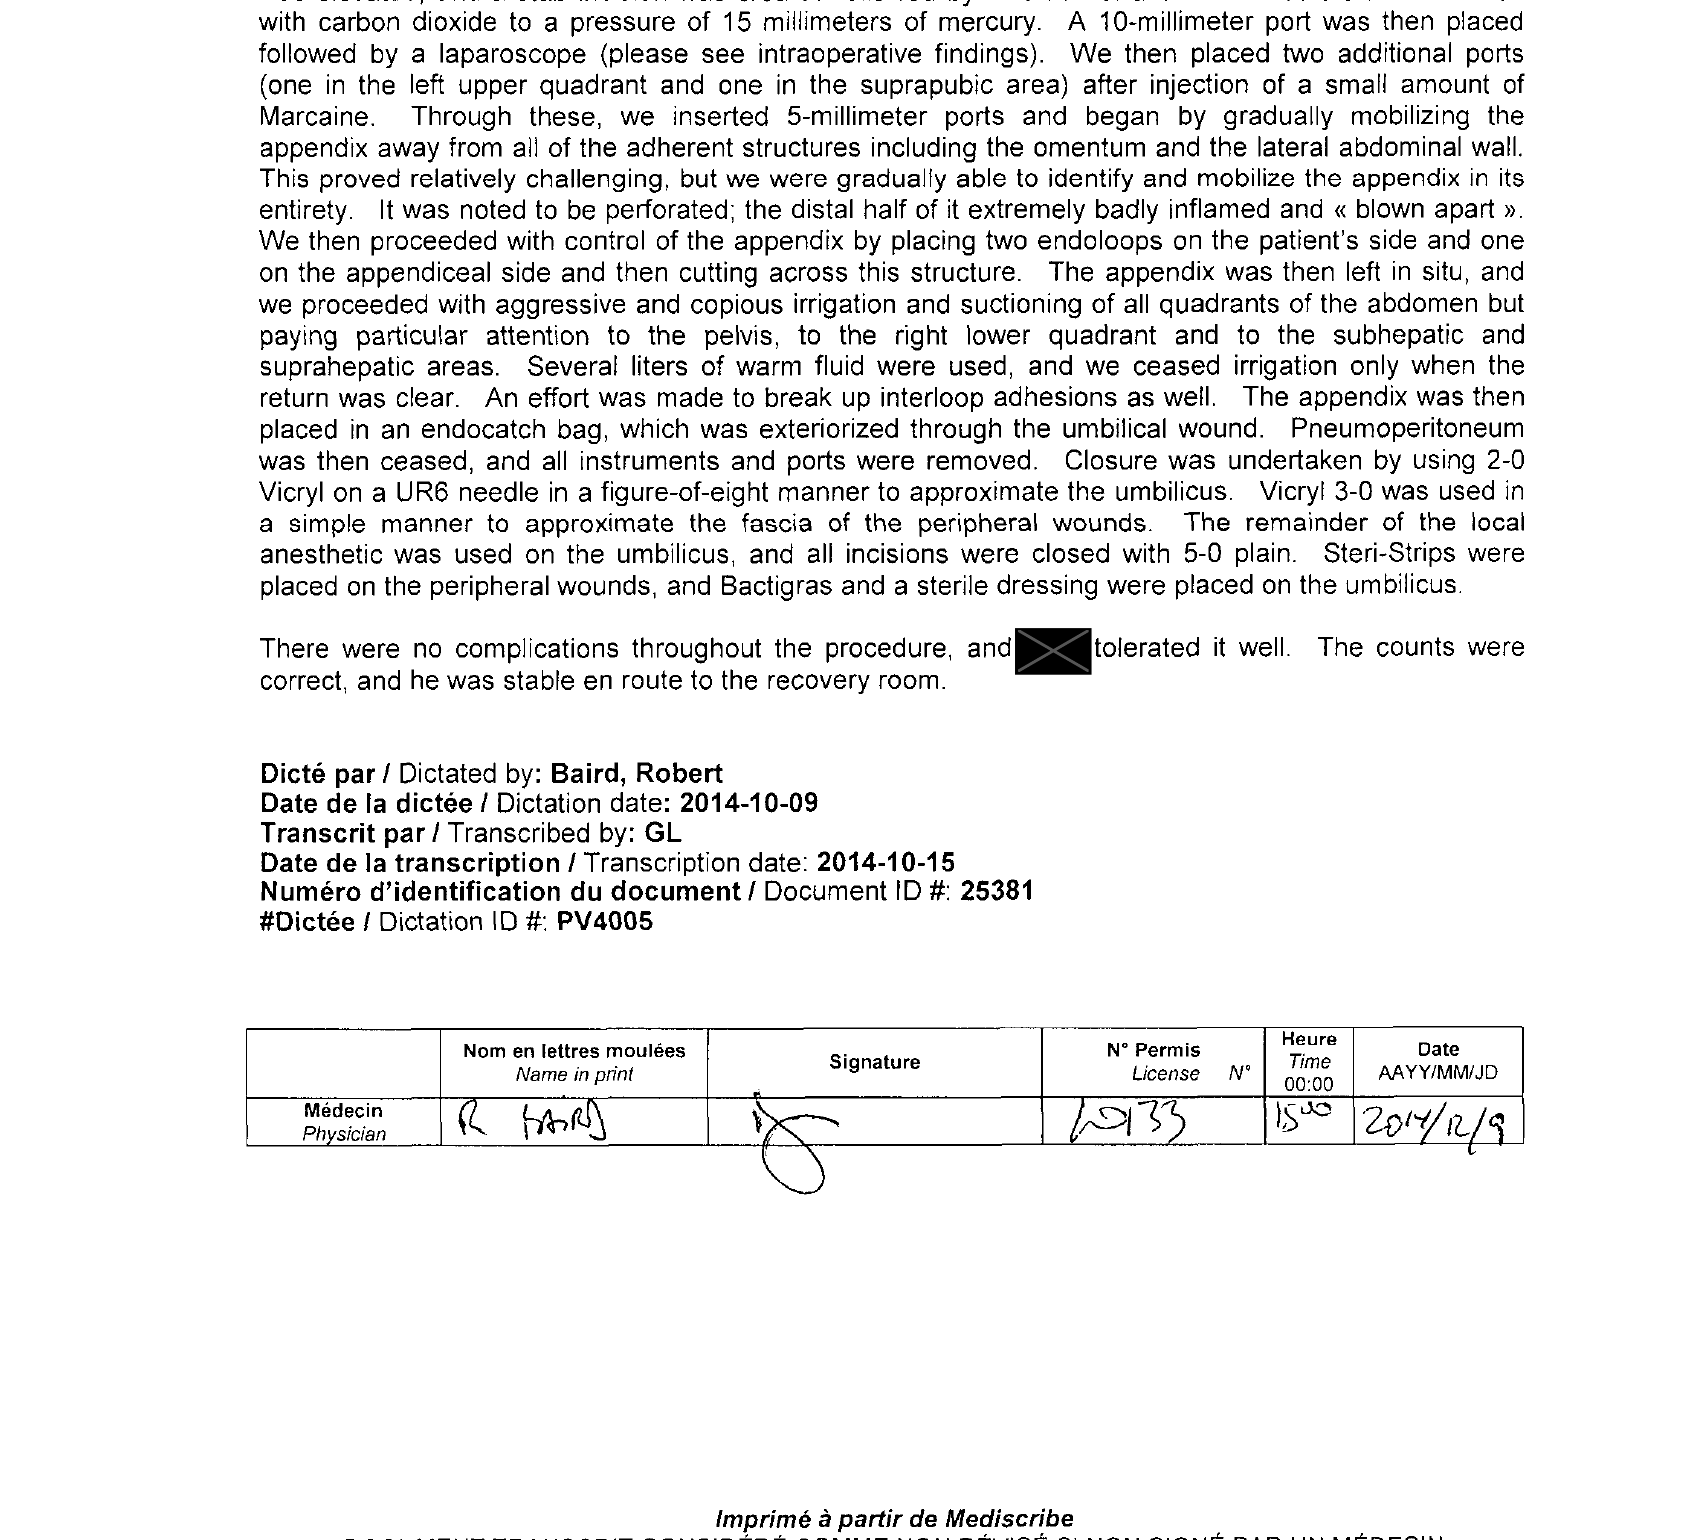

Cropping 109 O_1.png


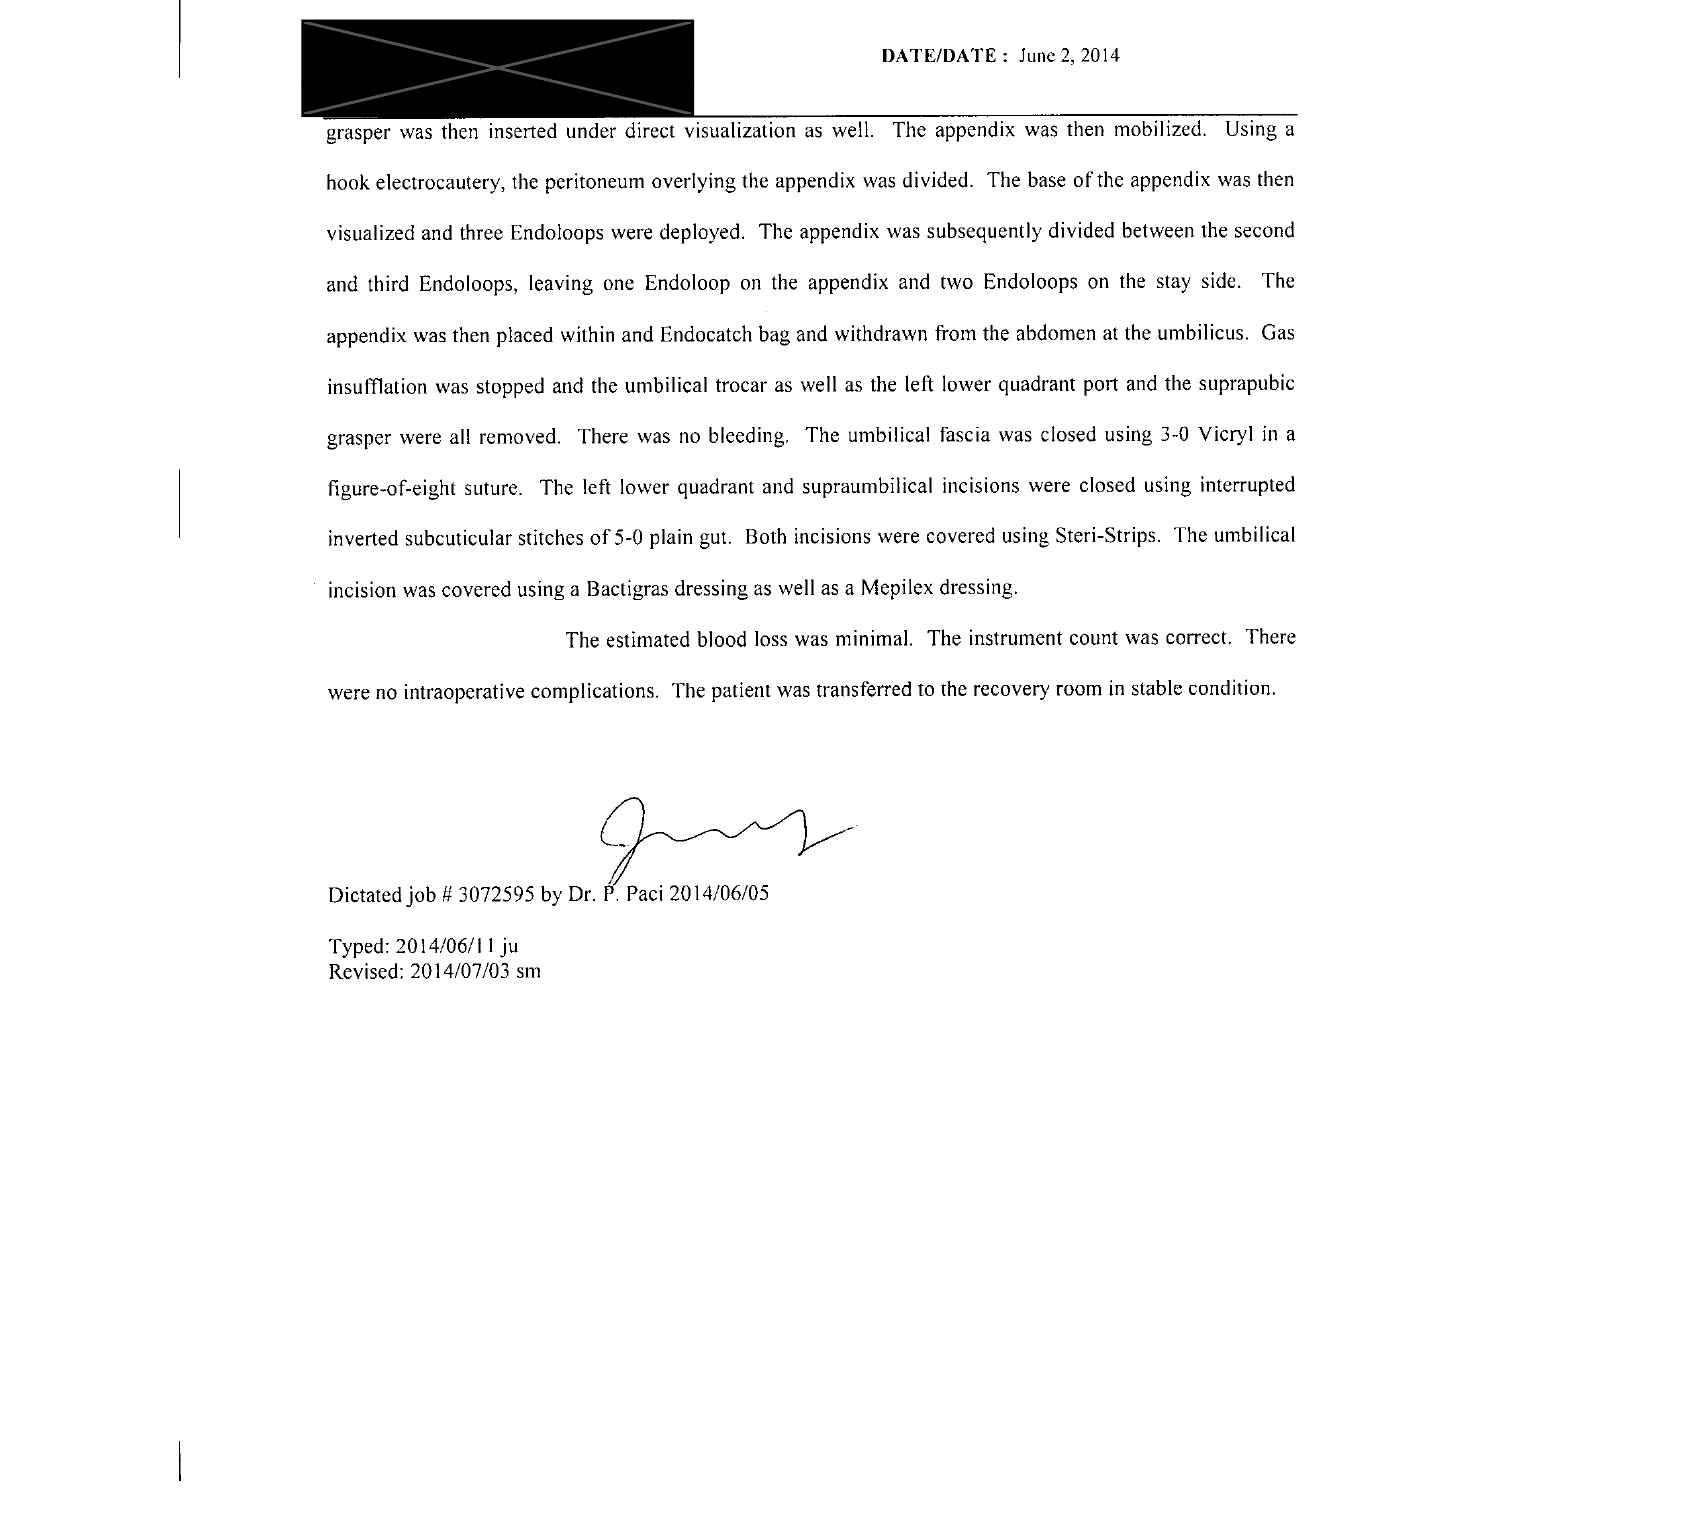

Cropping 141 O_1.png


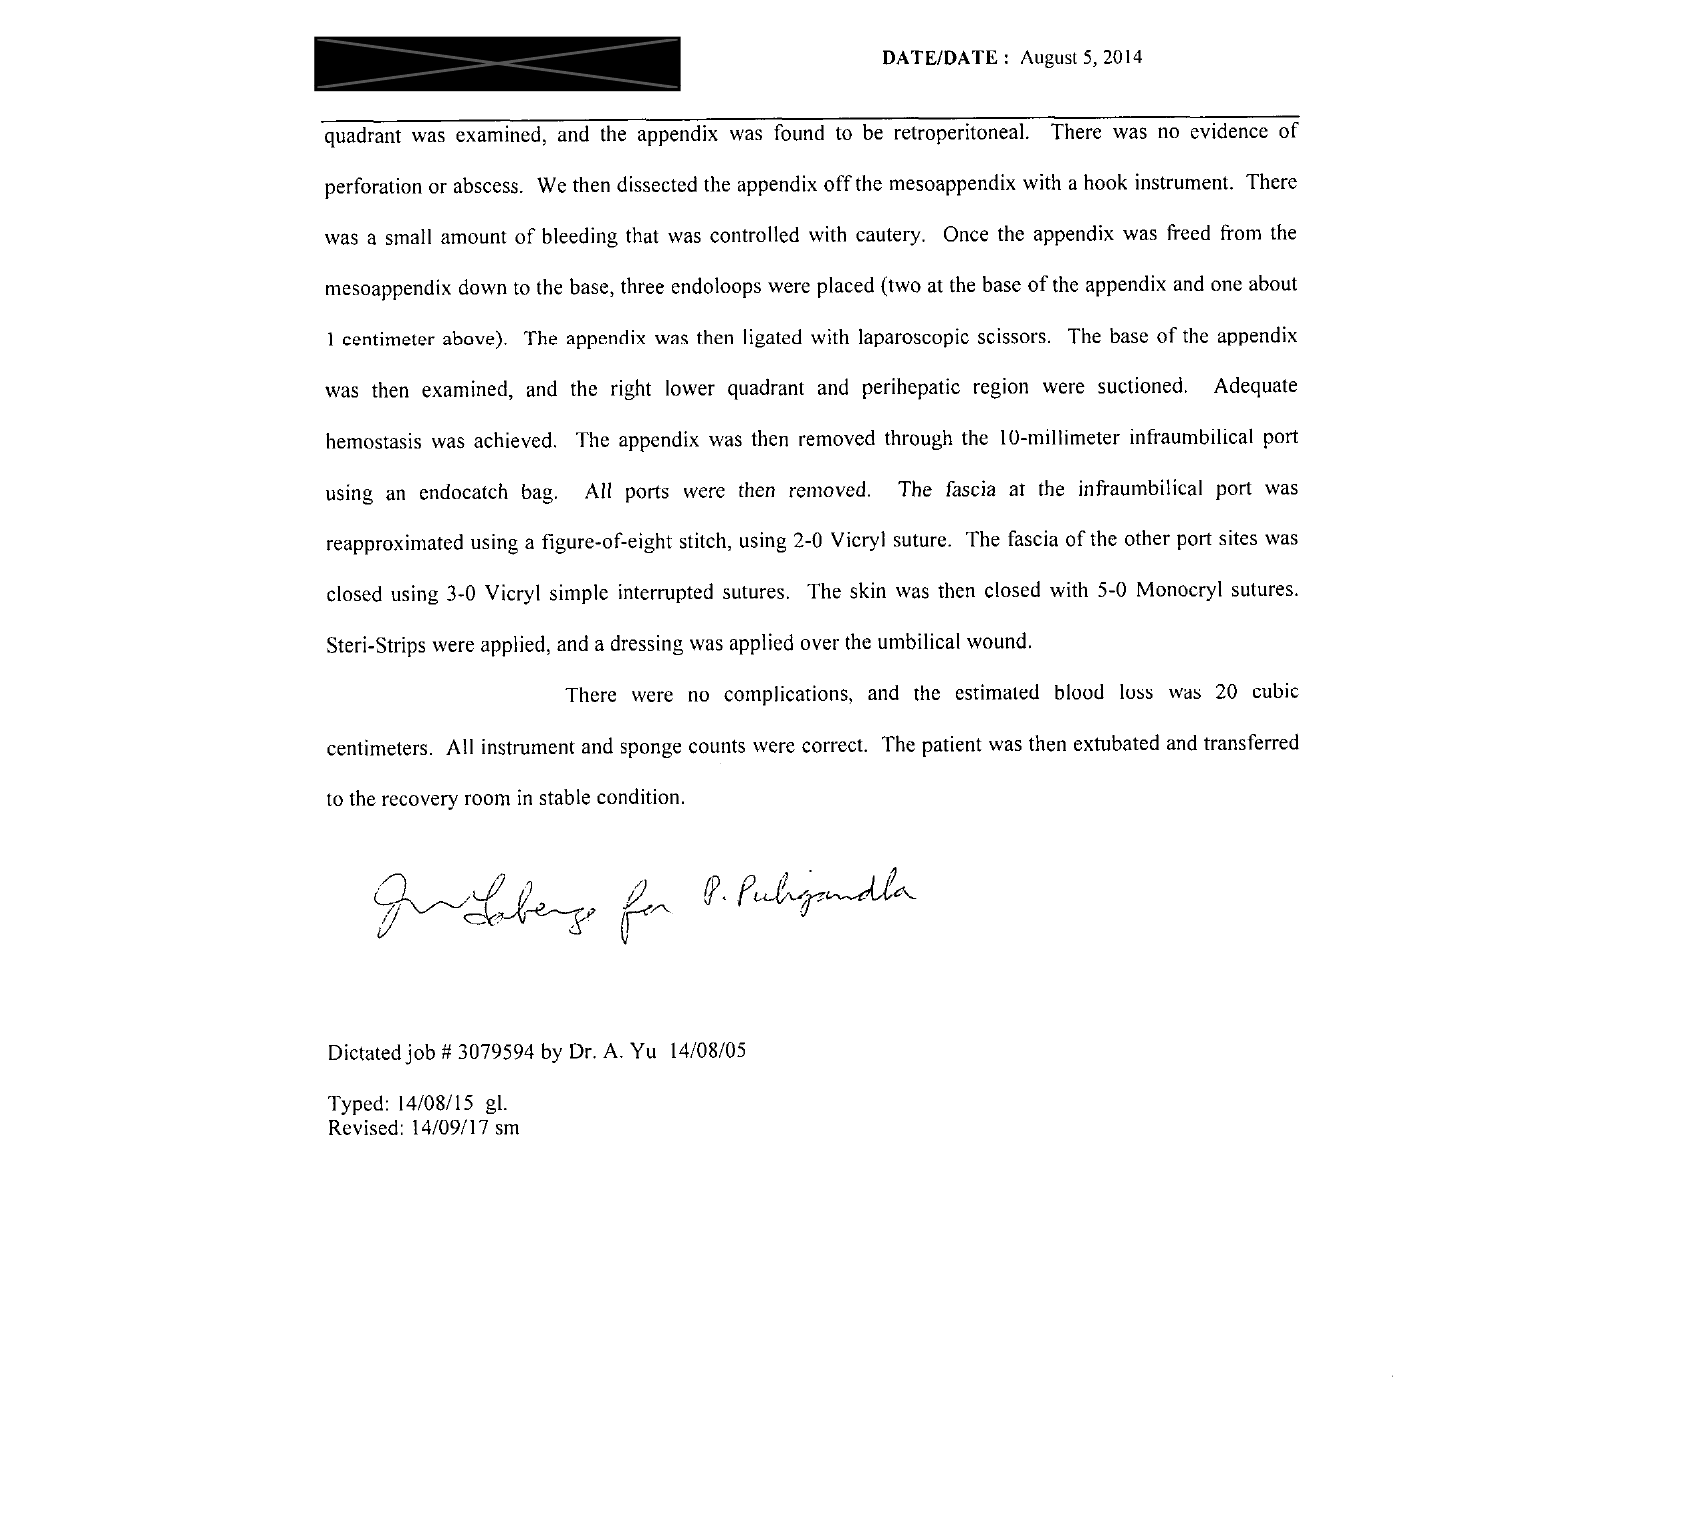

Cropping 175 O_1.png


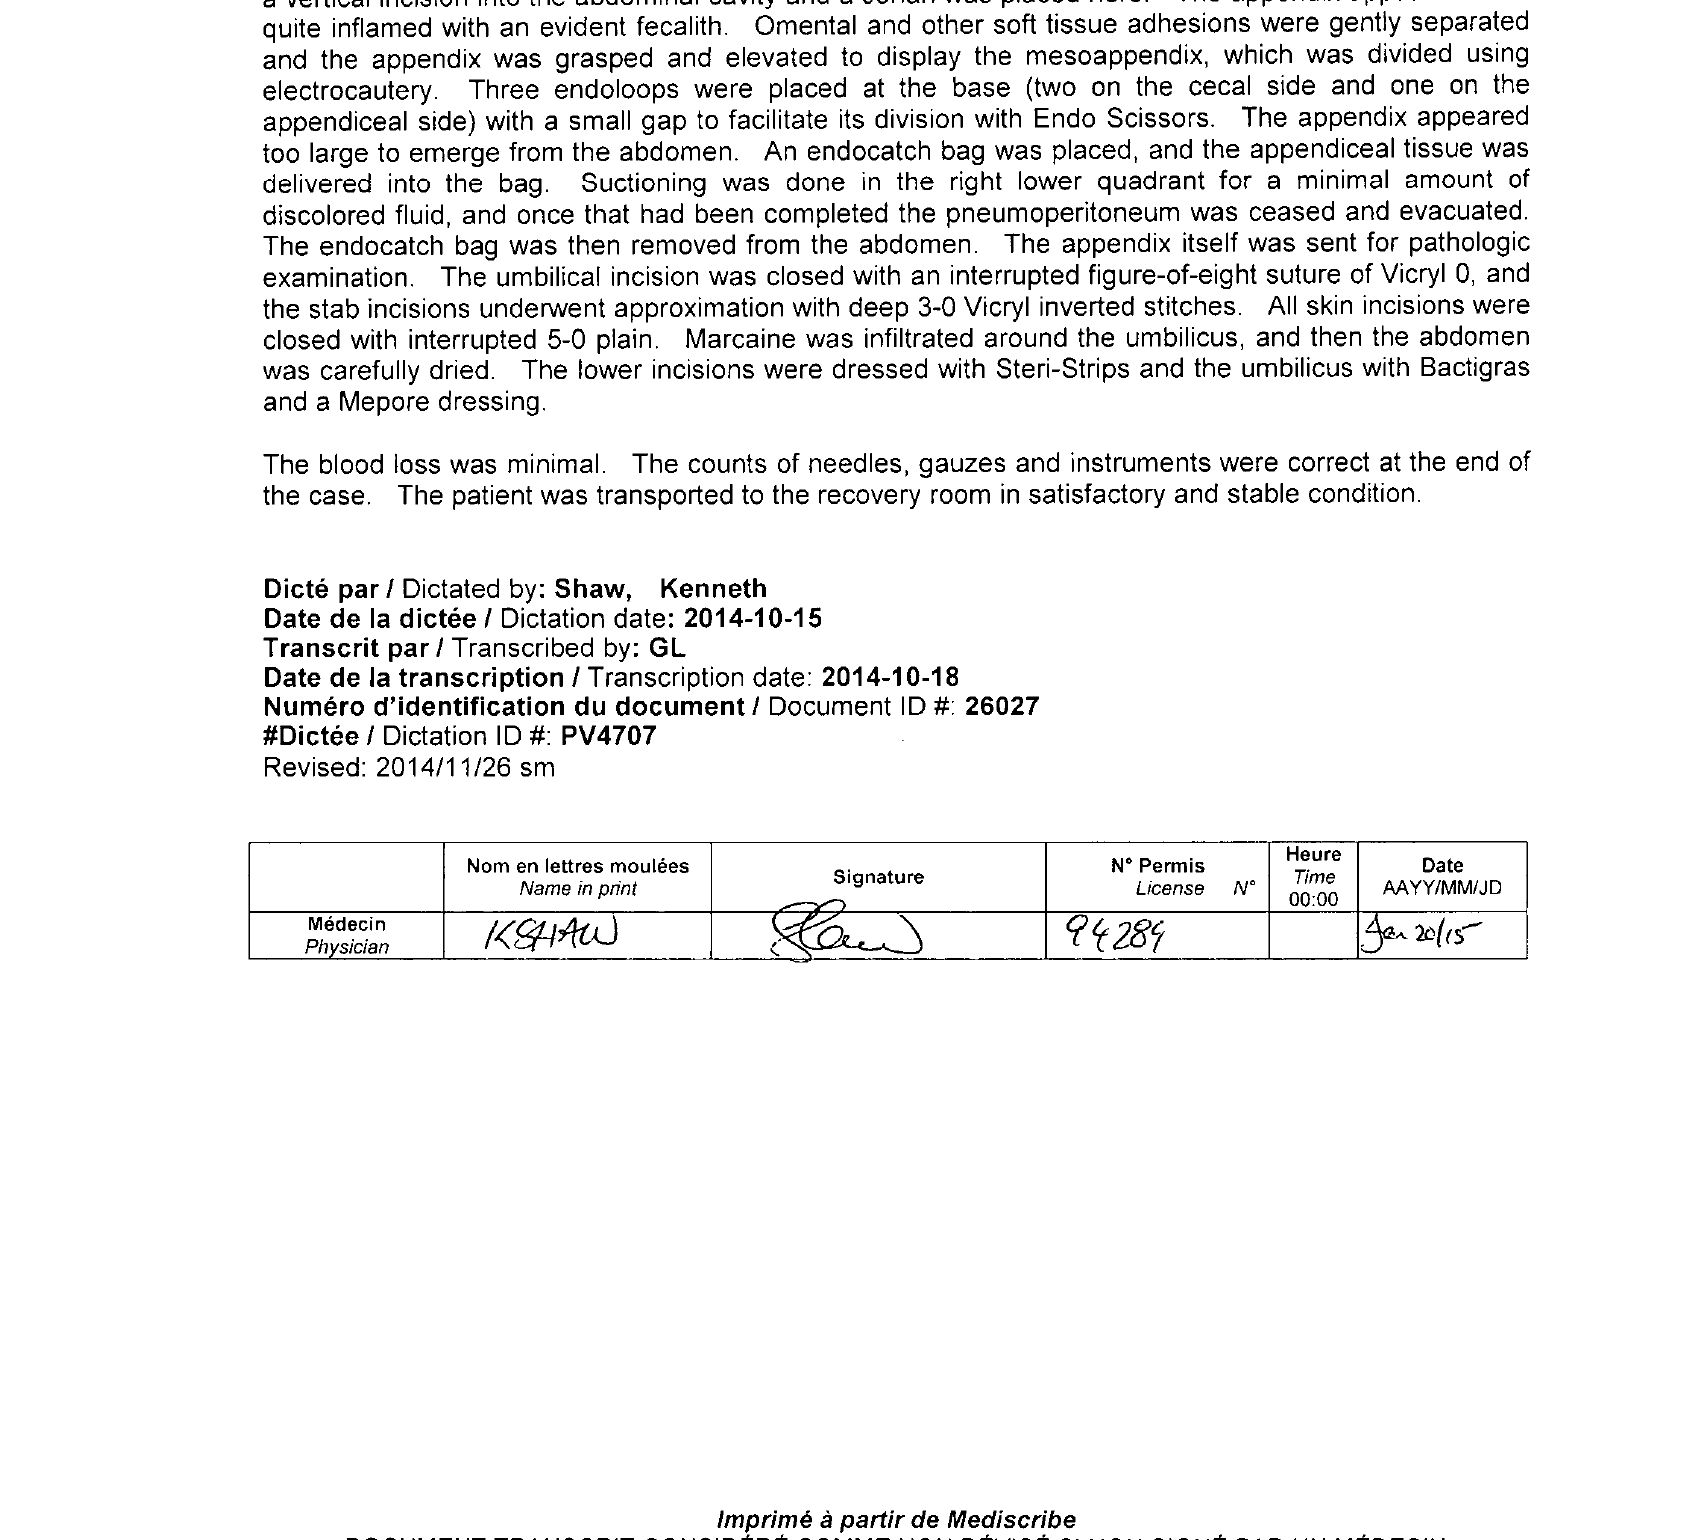

Cropping 154 O_1.png


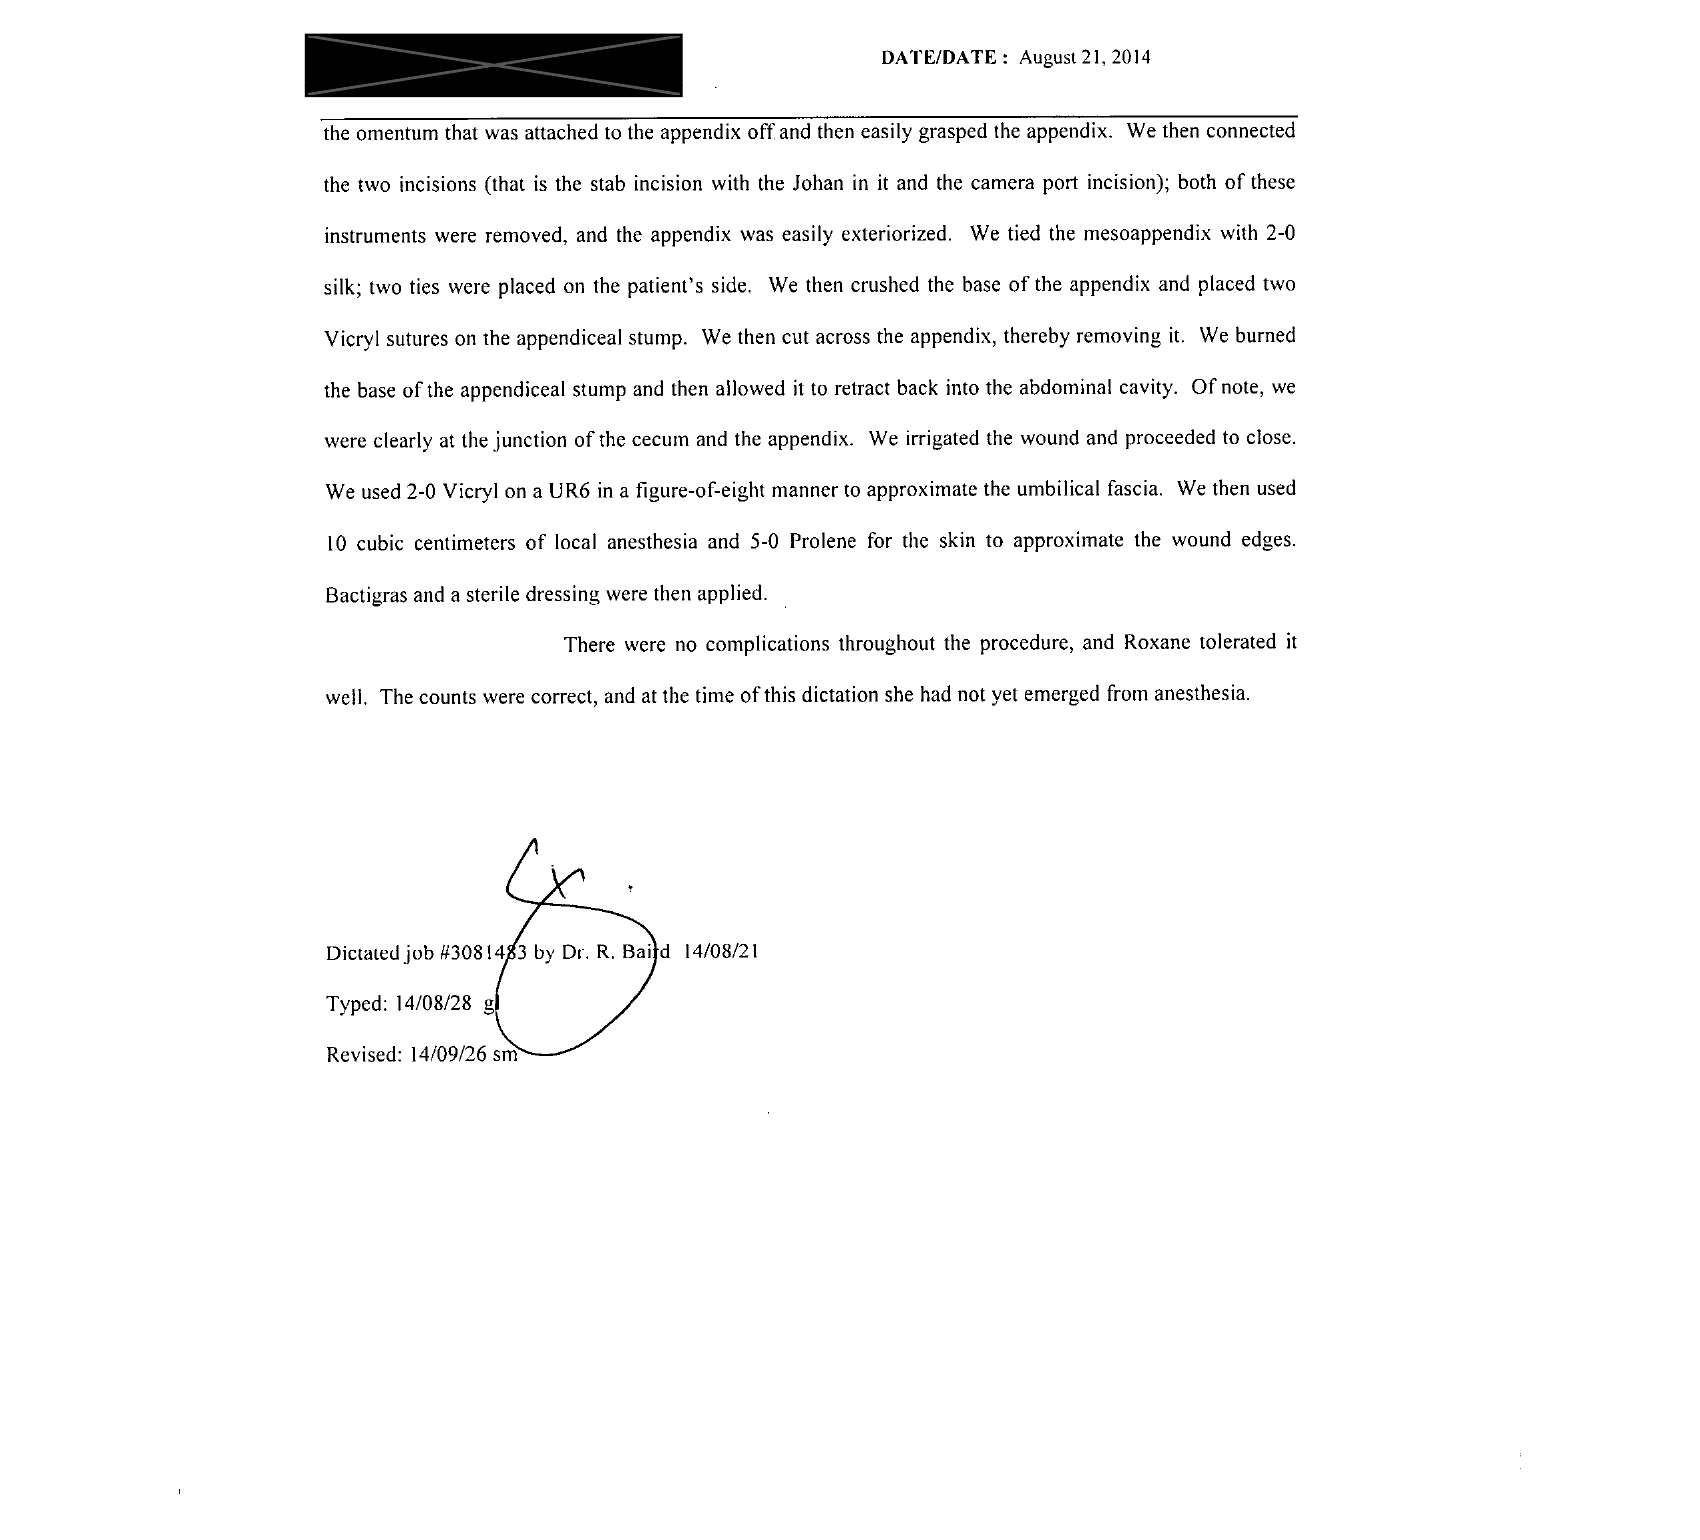

Cropping 166 O_1.png


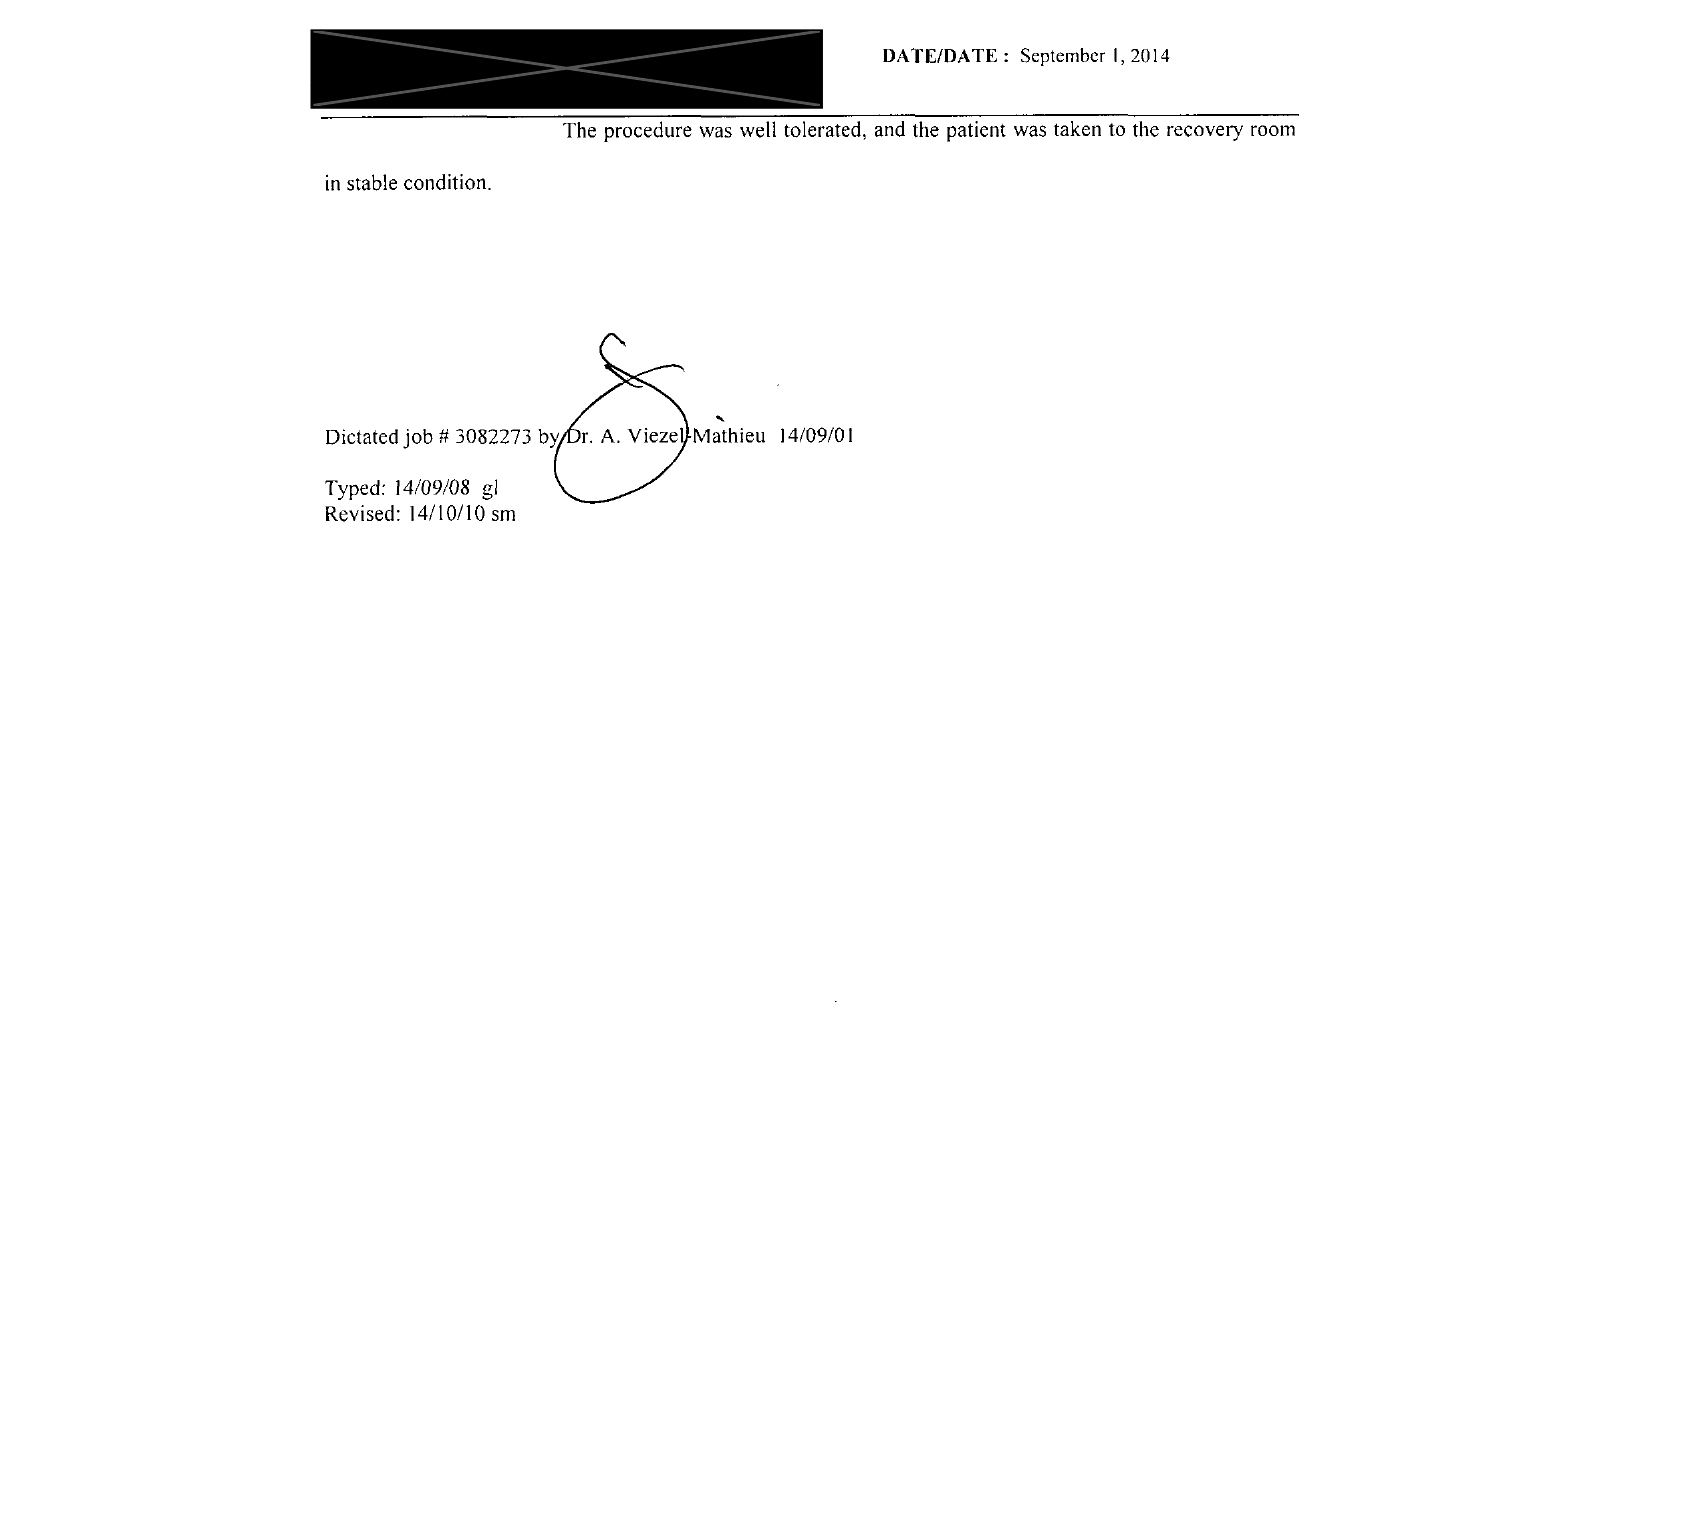

Cropping 70 O_1.png


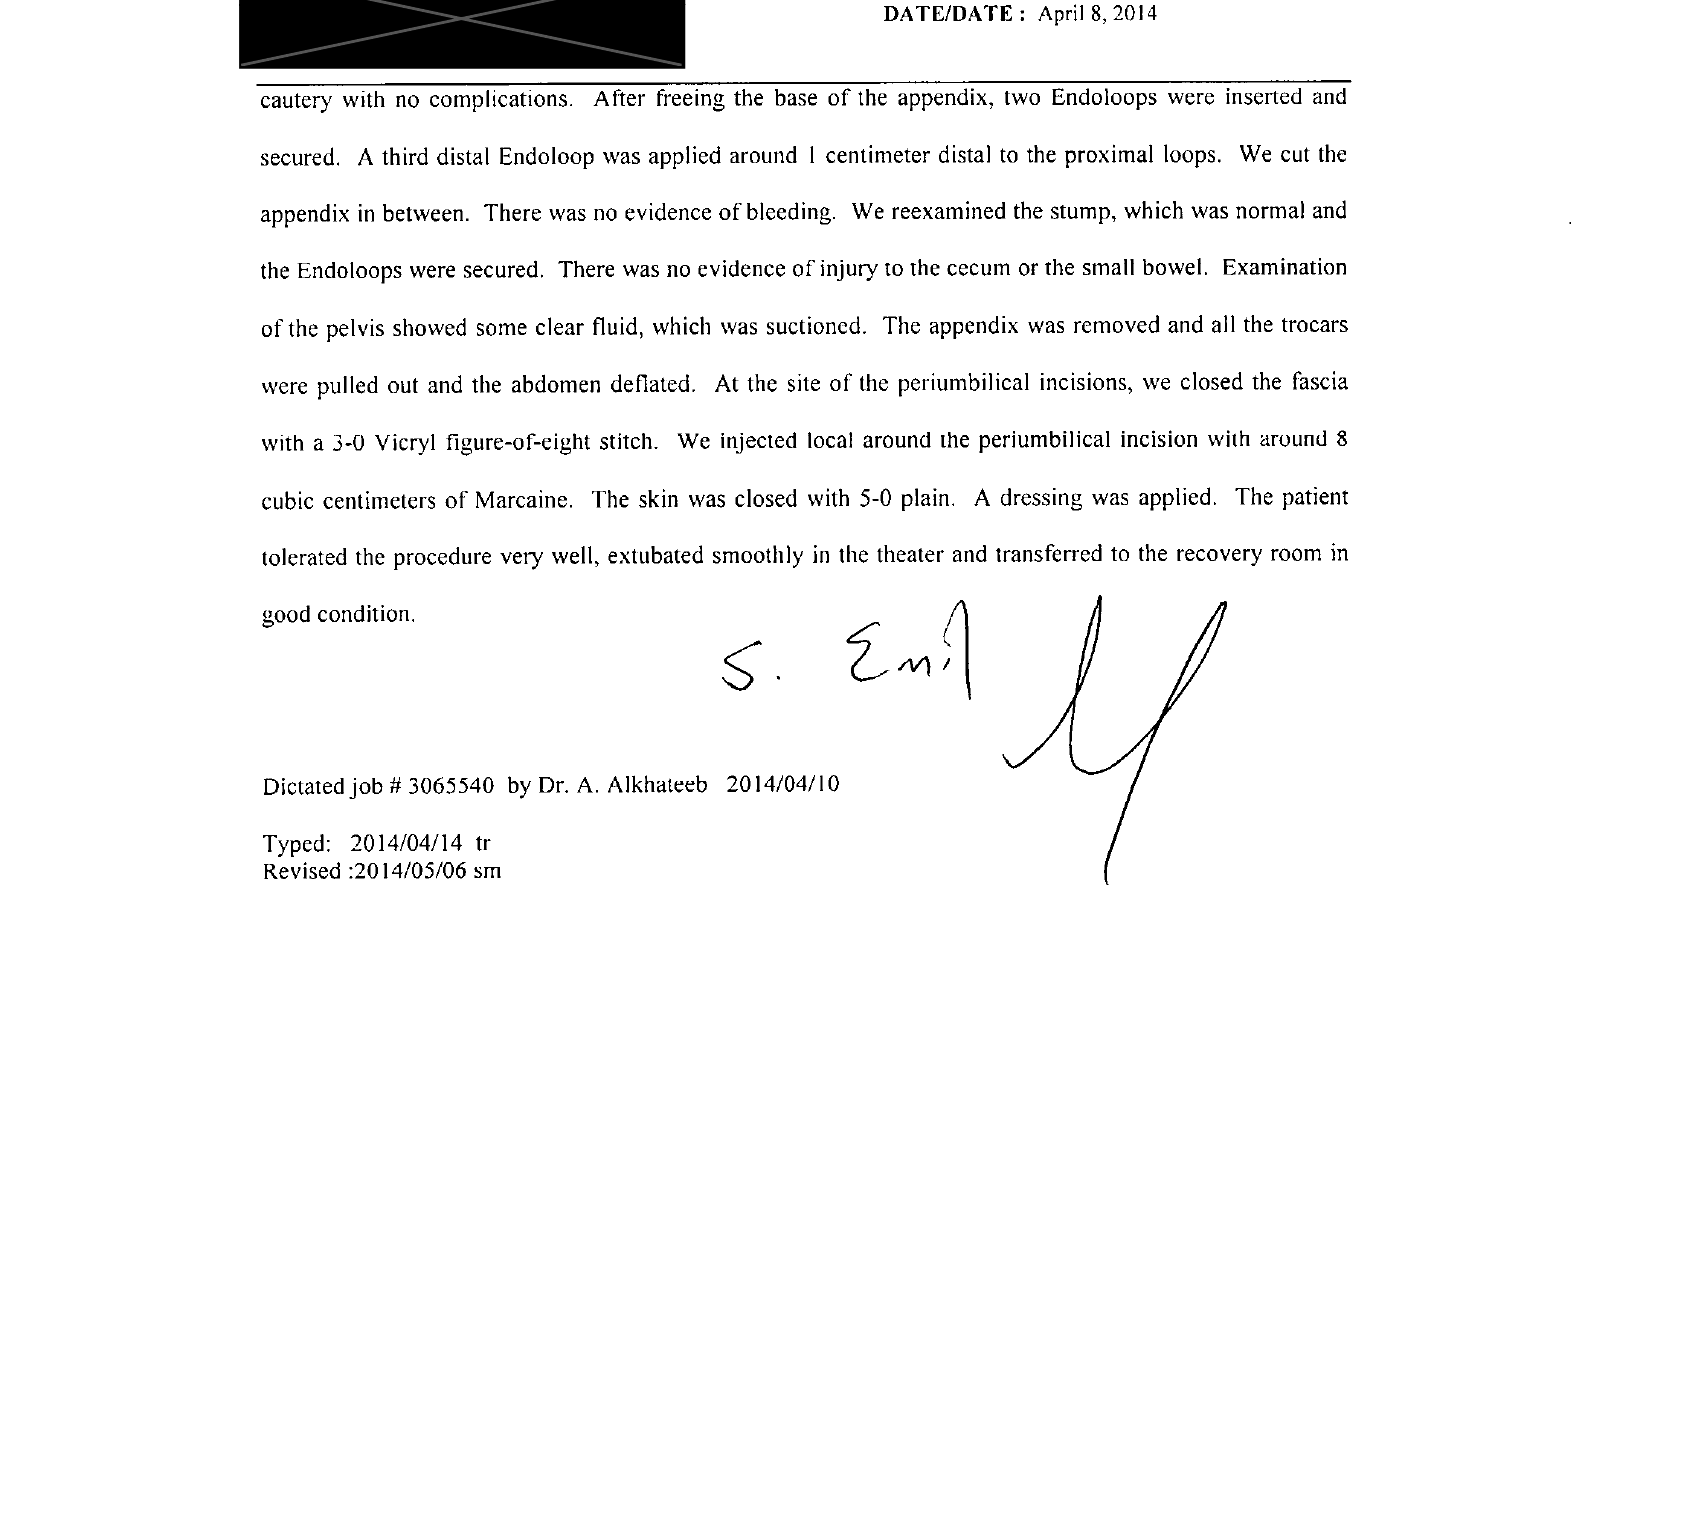

Cropping 111 O_1.png


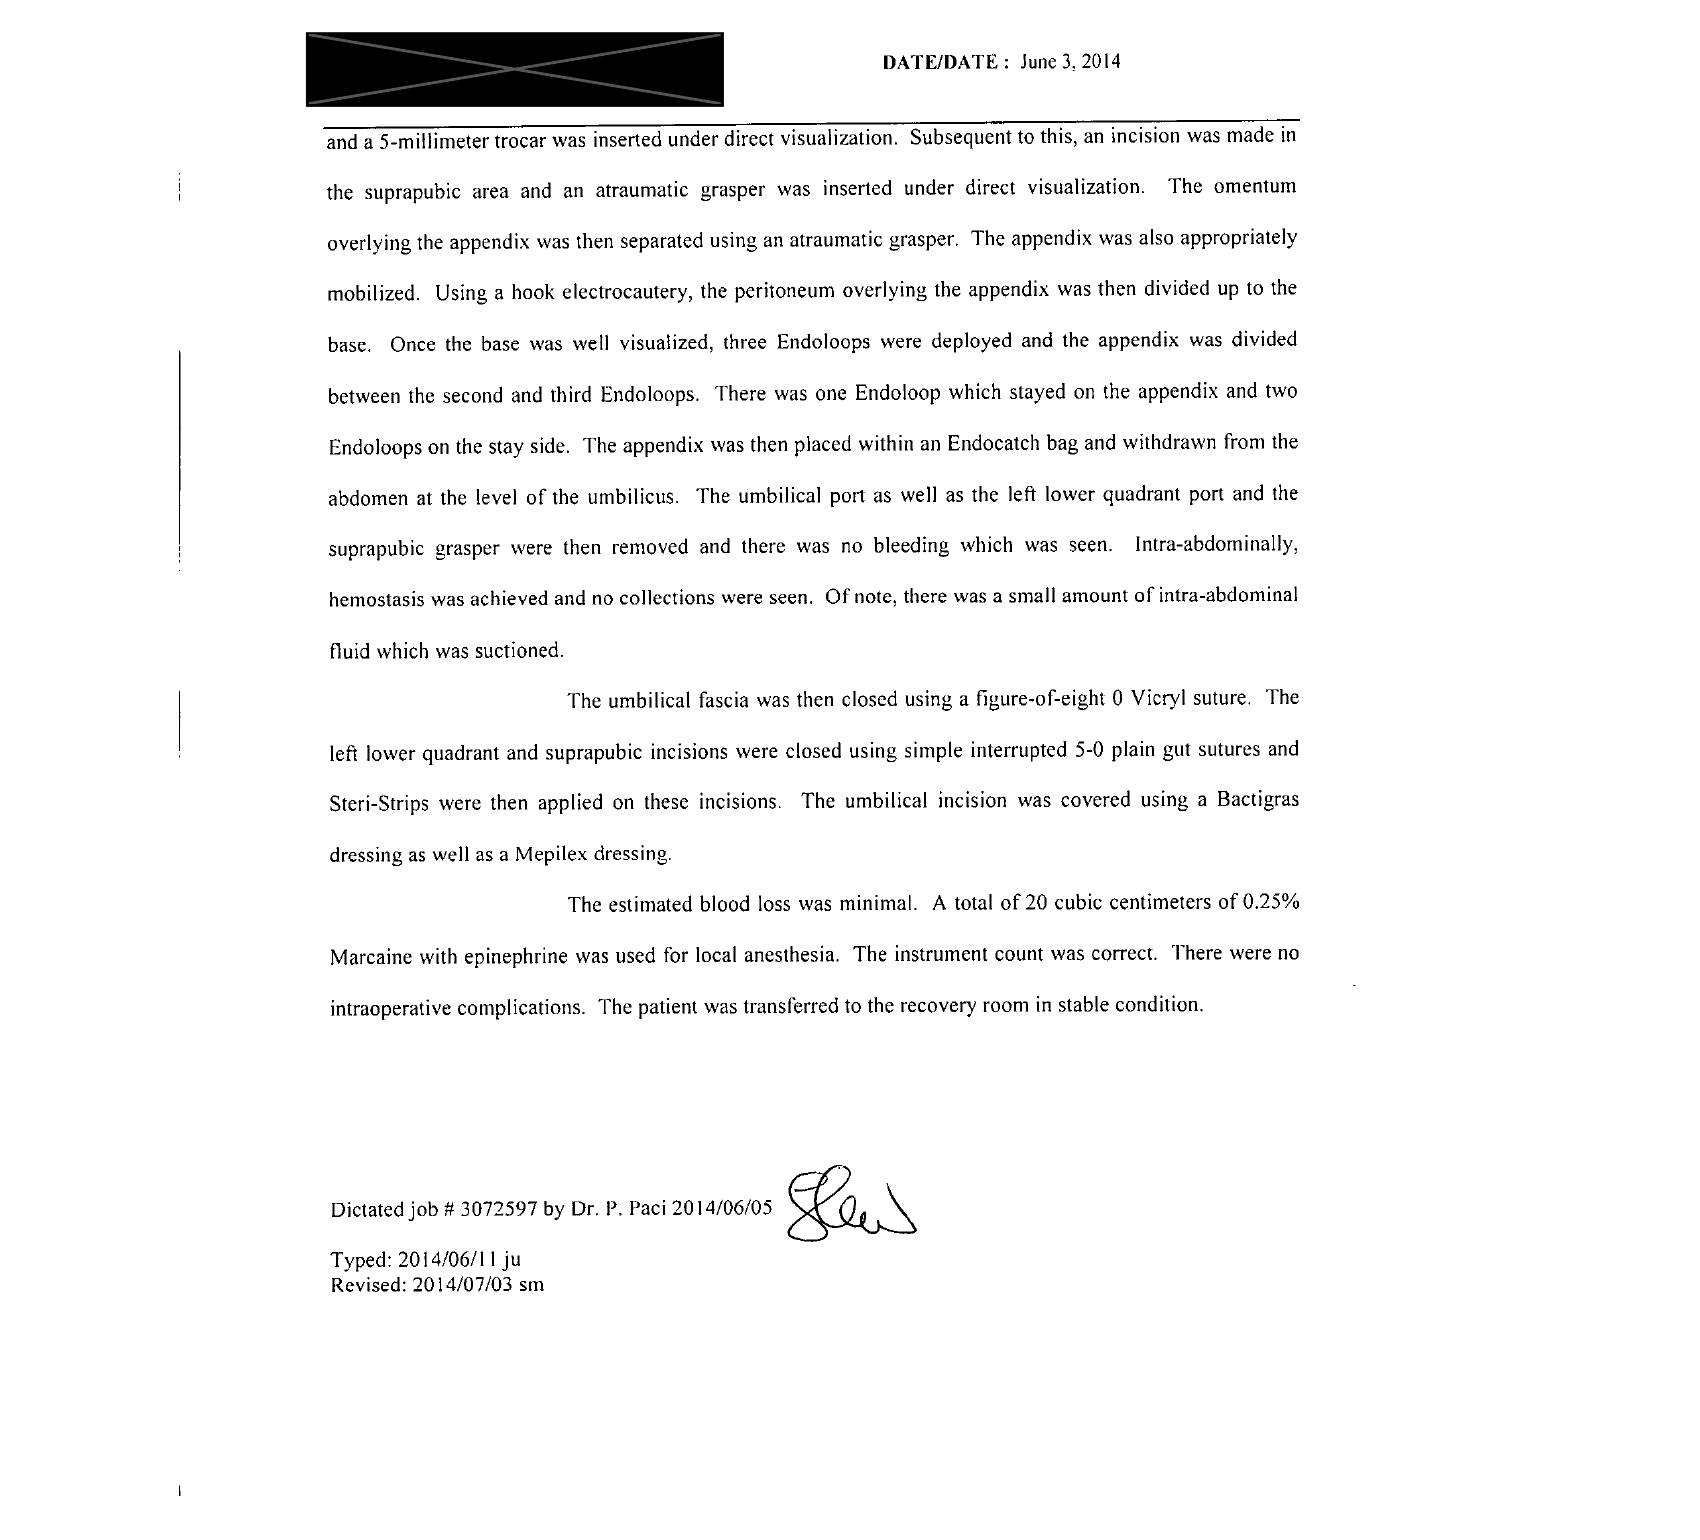

Cropping 142 O_1.png


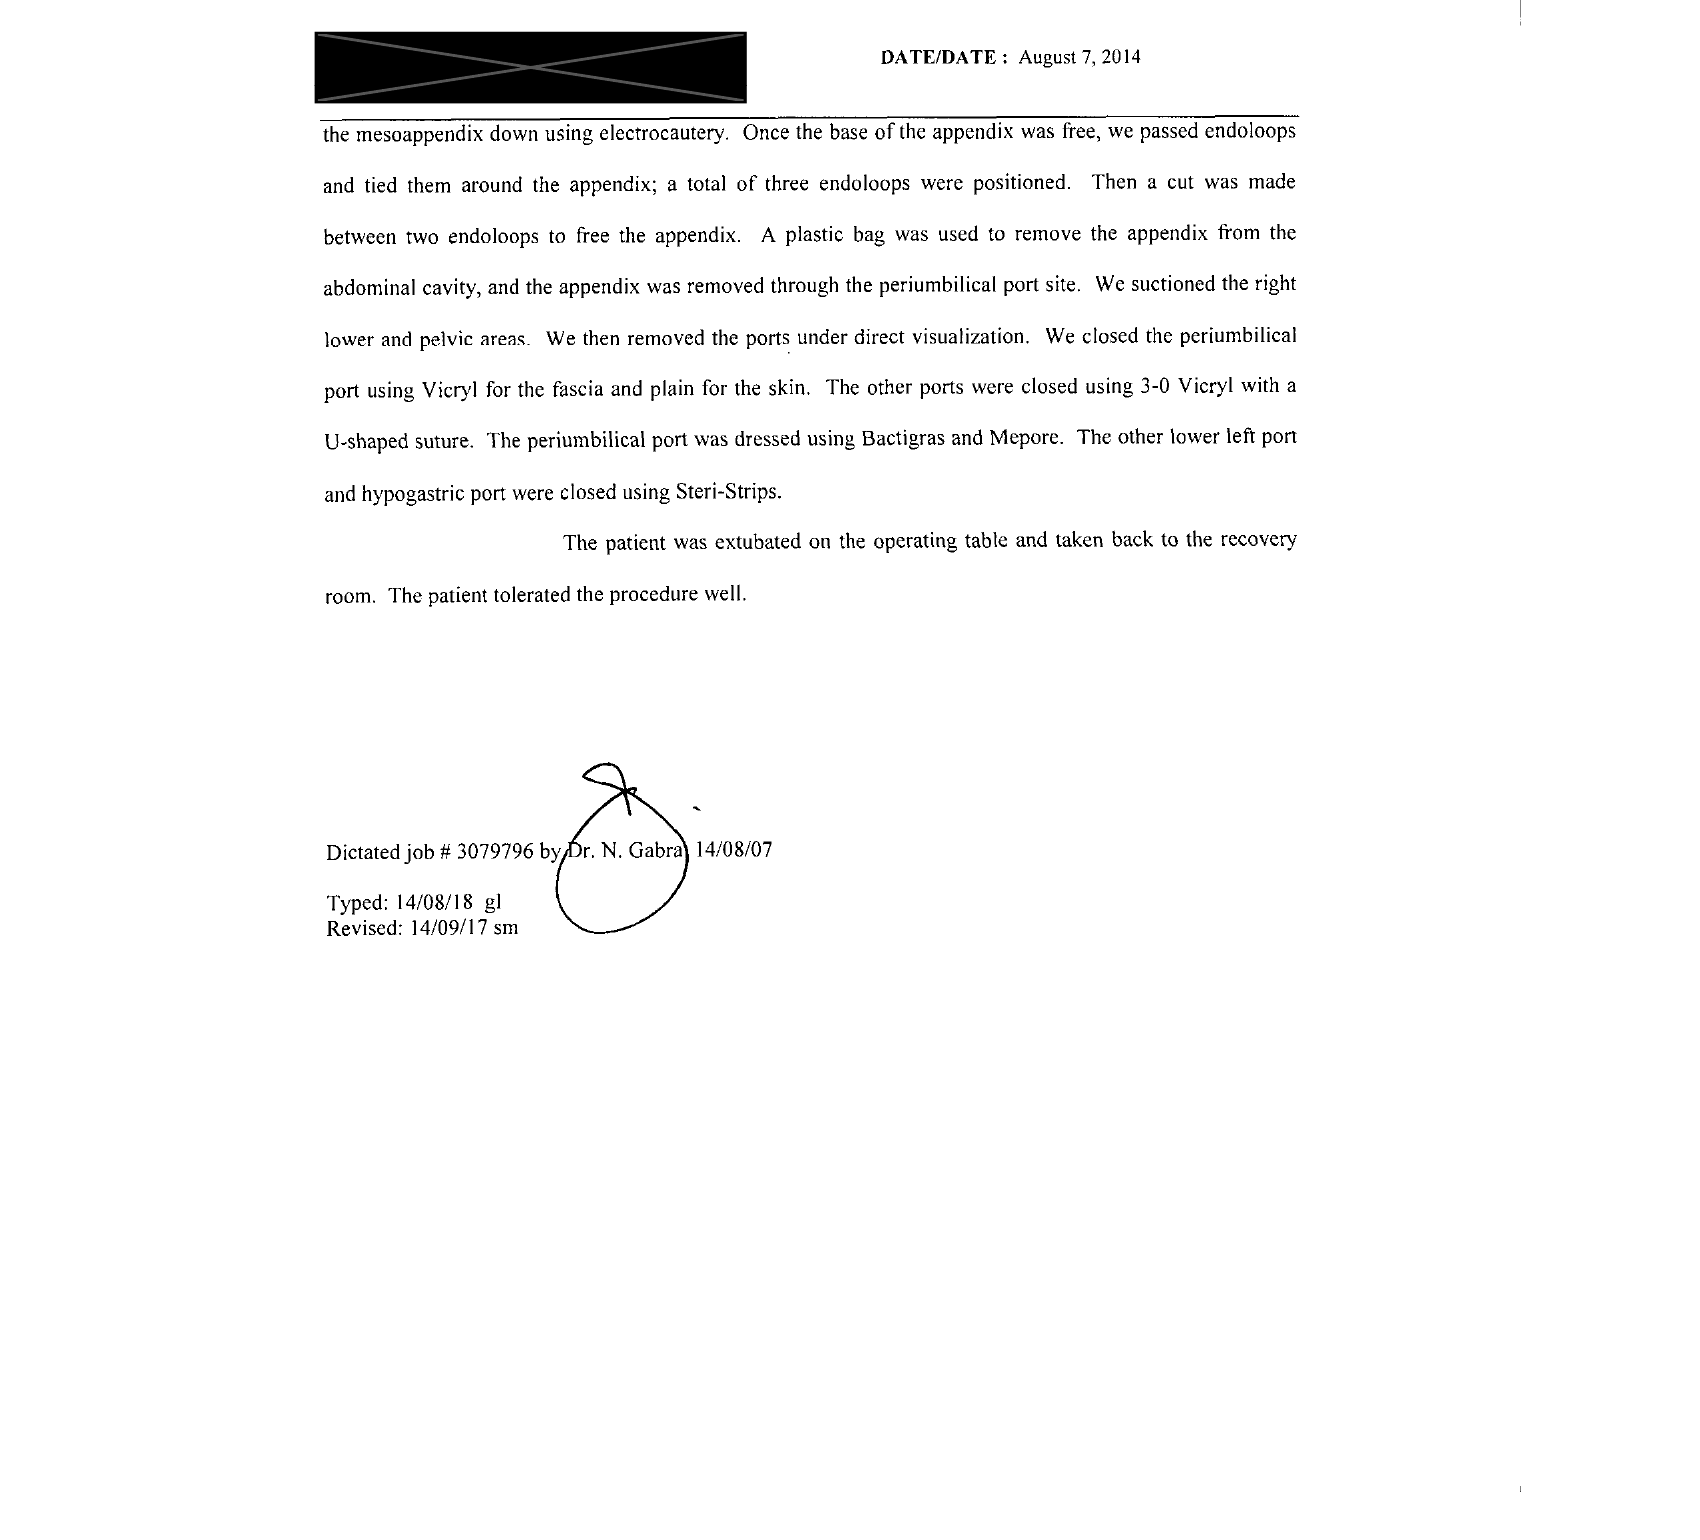

Cropping 79 O_1.png


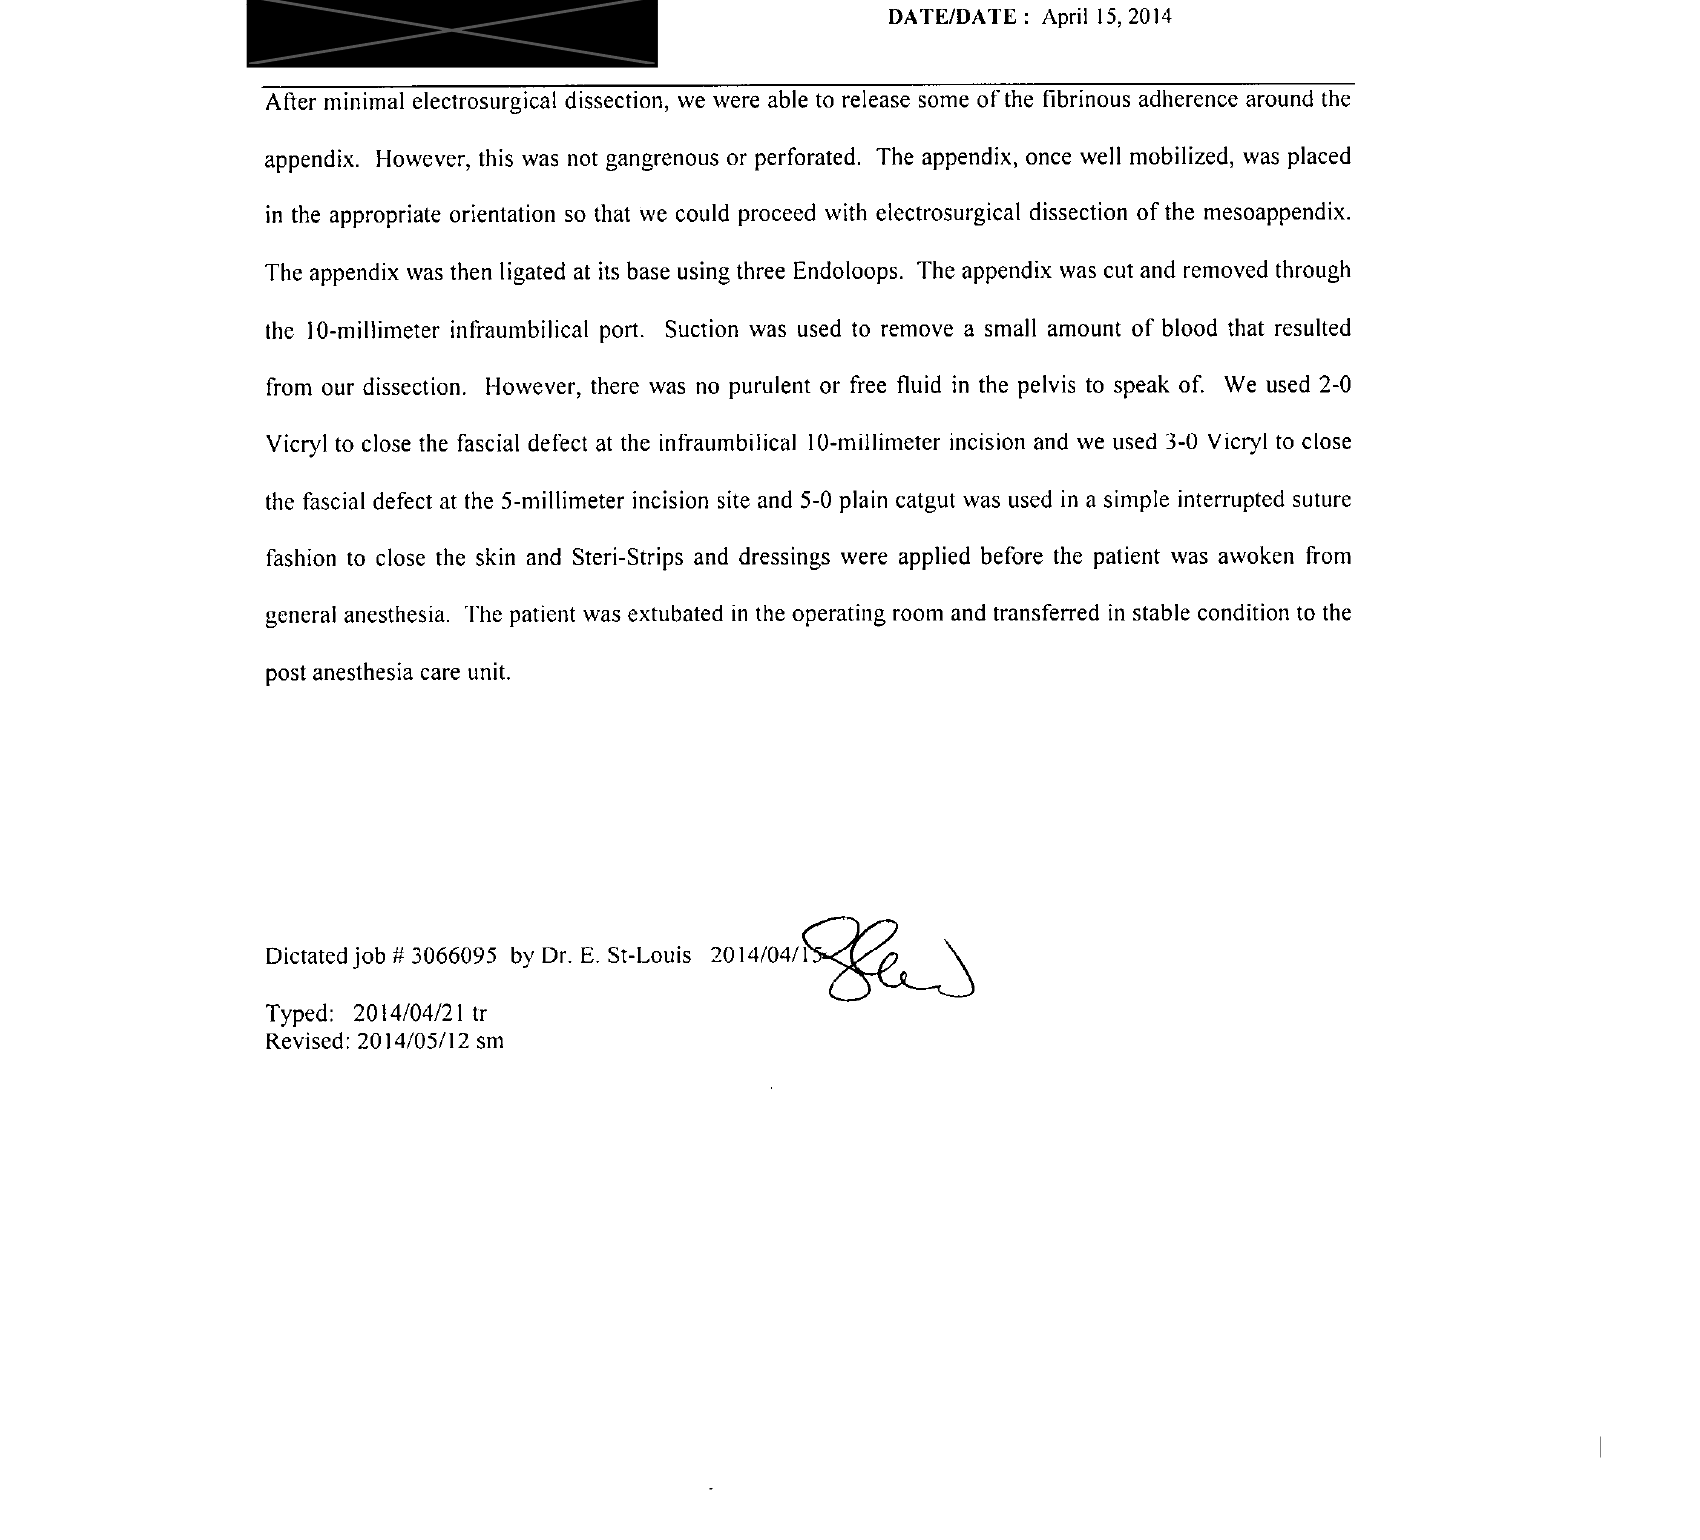

Cropping 65 O_1.png


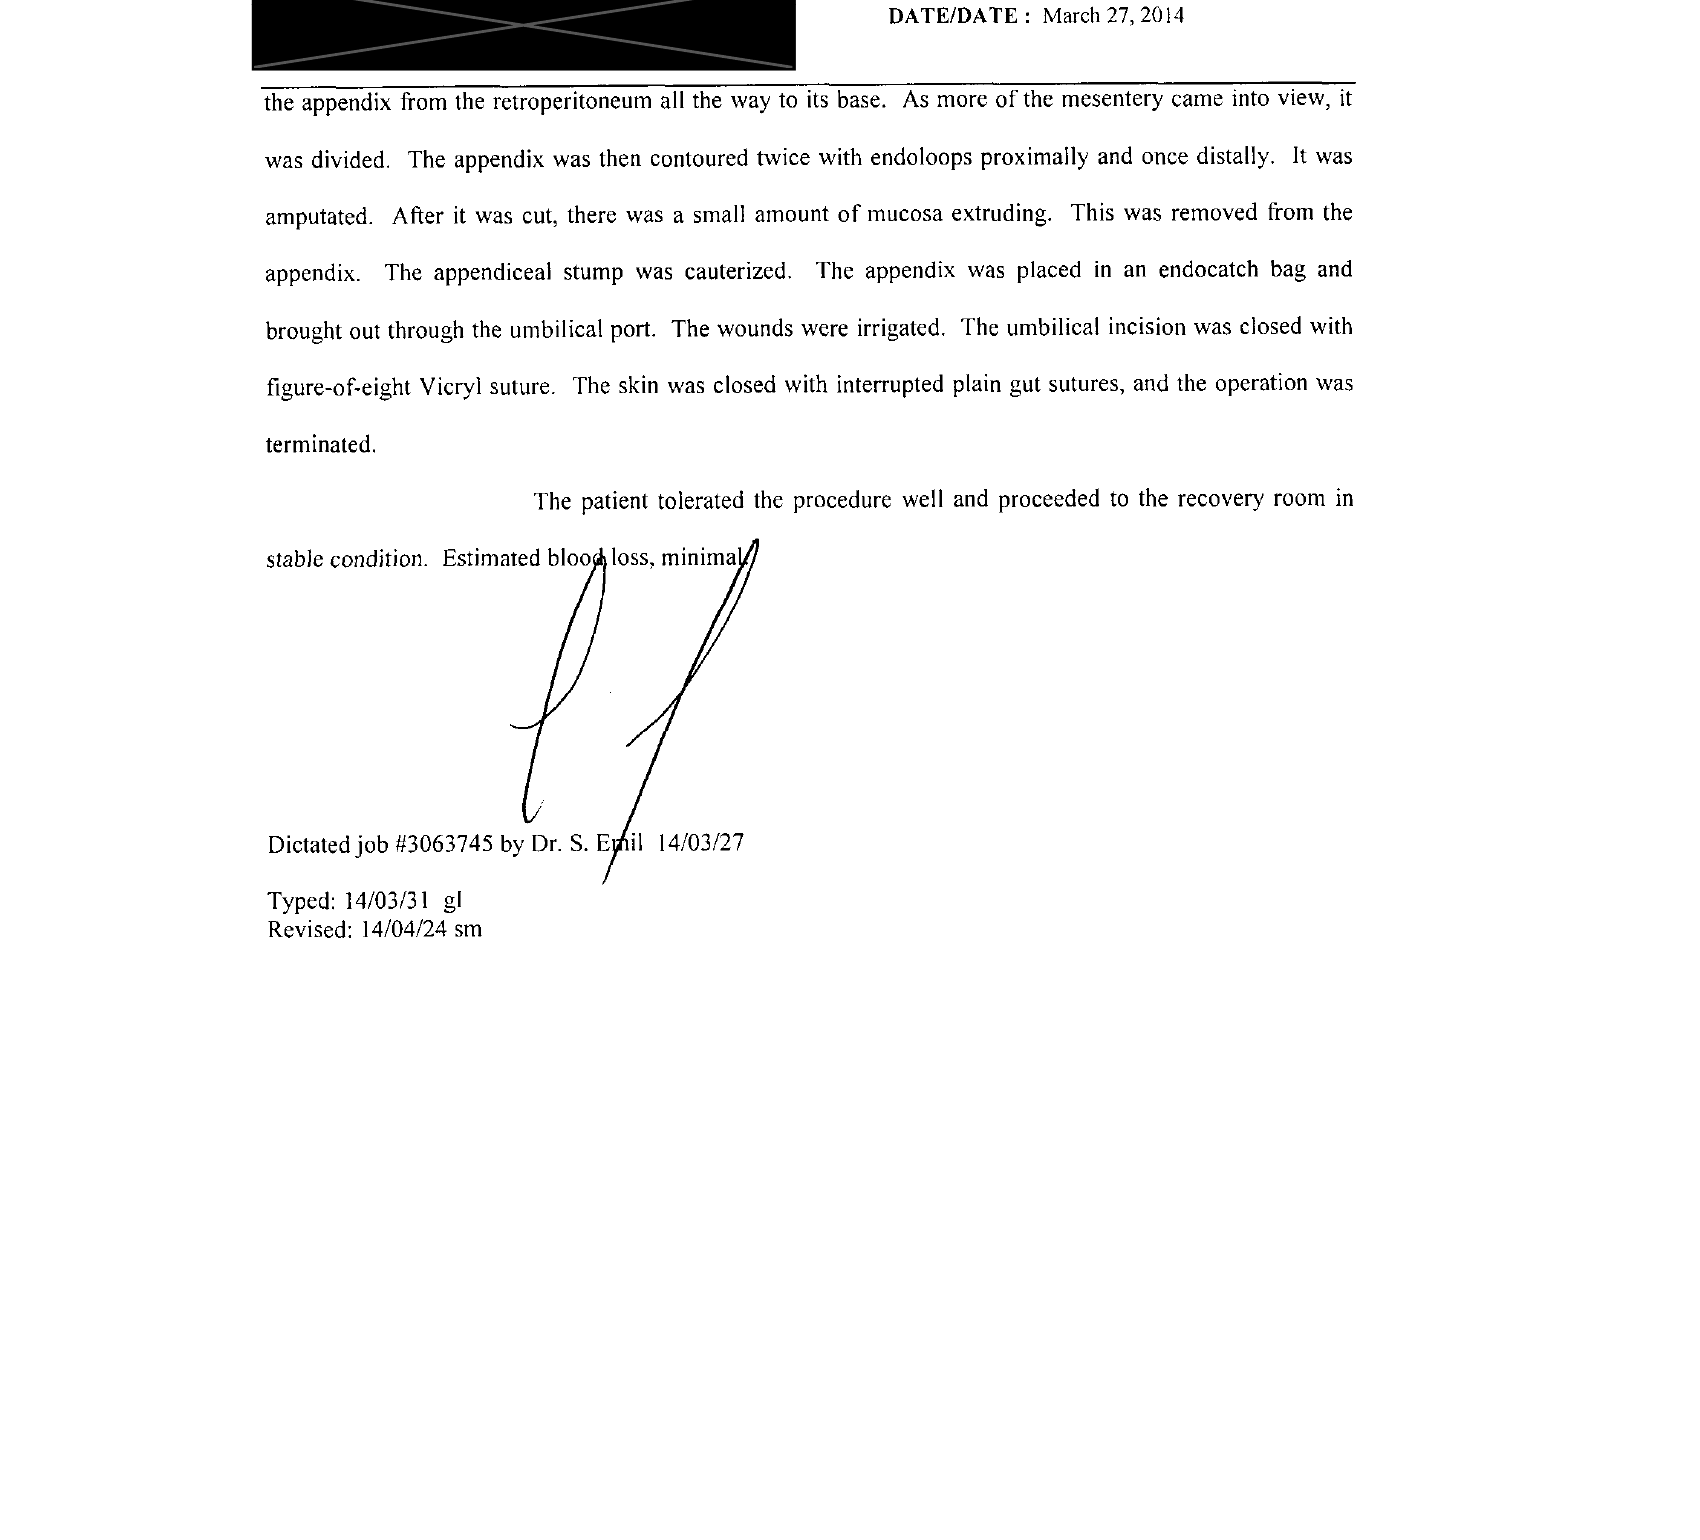

Cropping 107 O_1.png


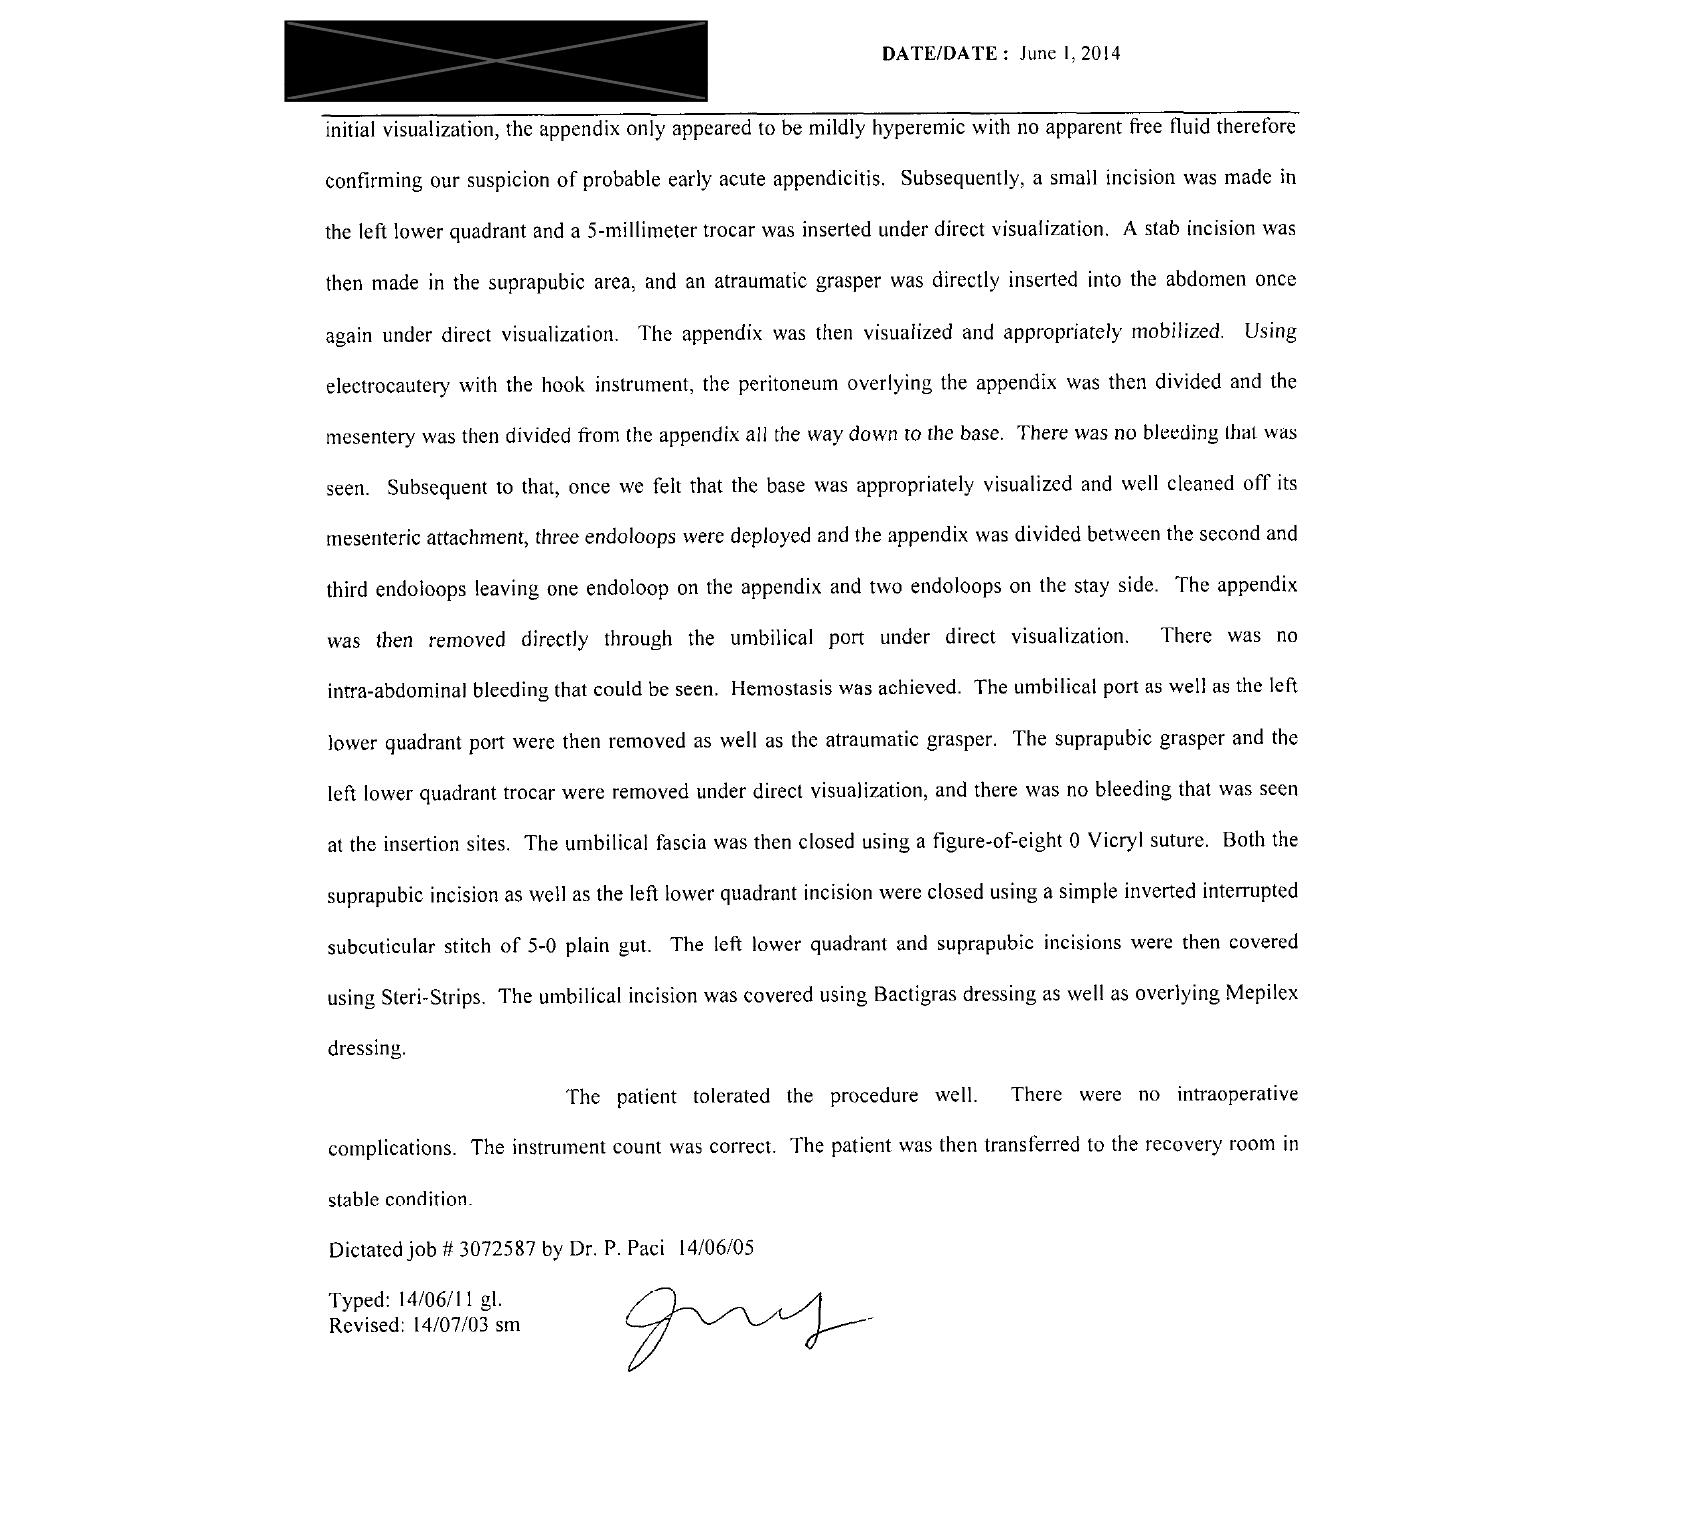

Cropping 68 O_1.png


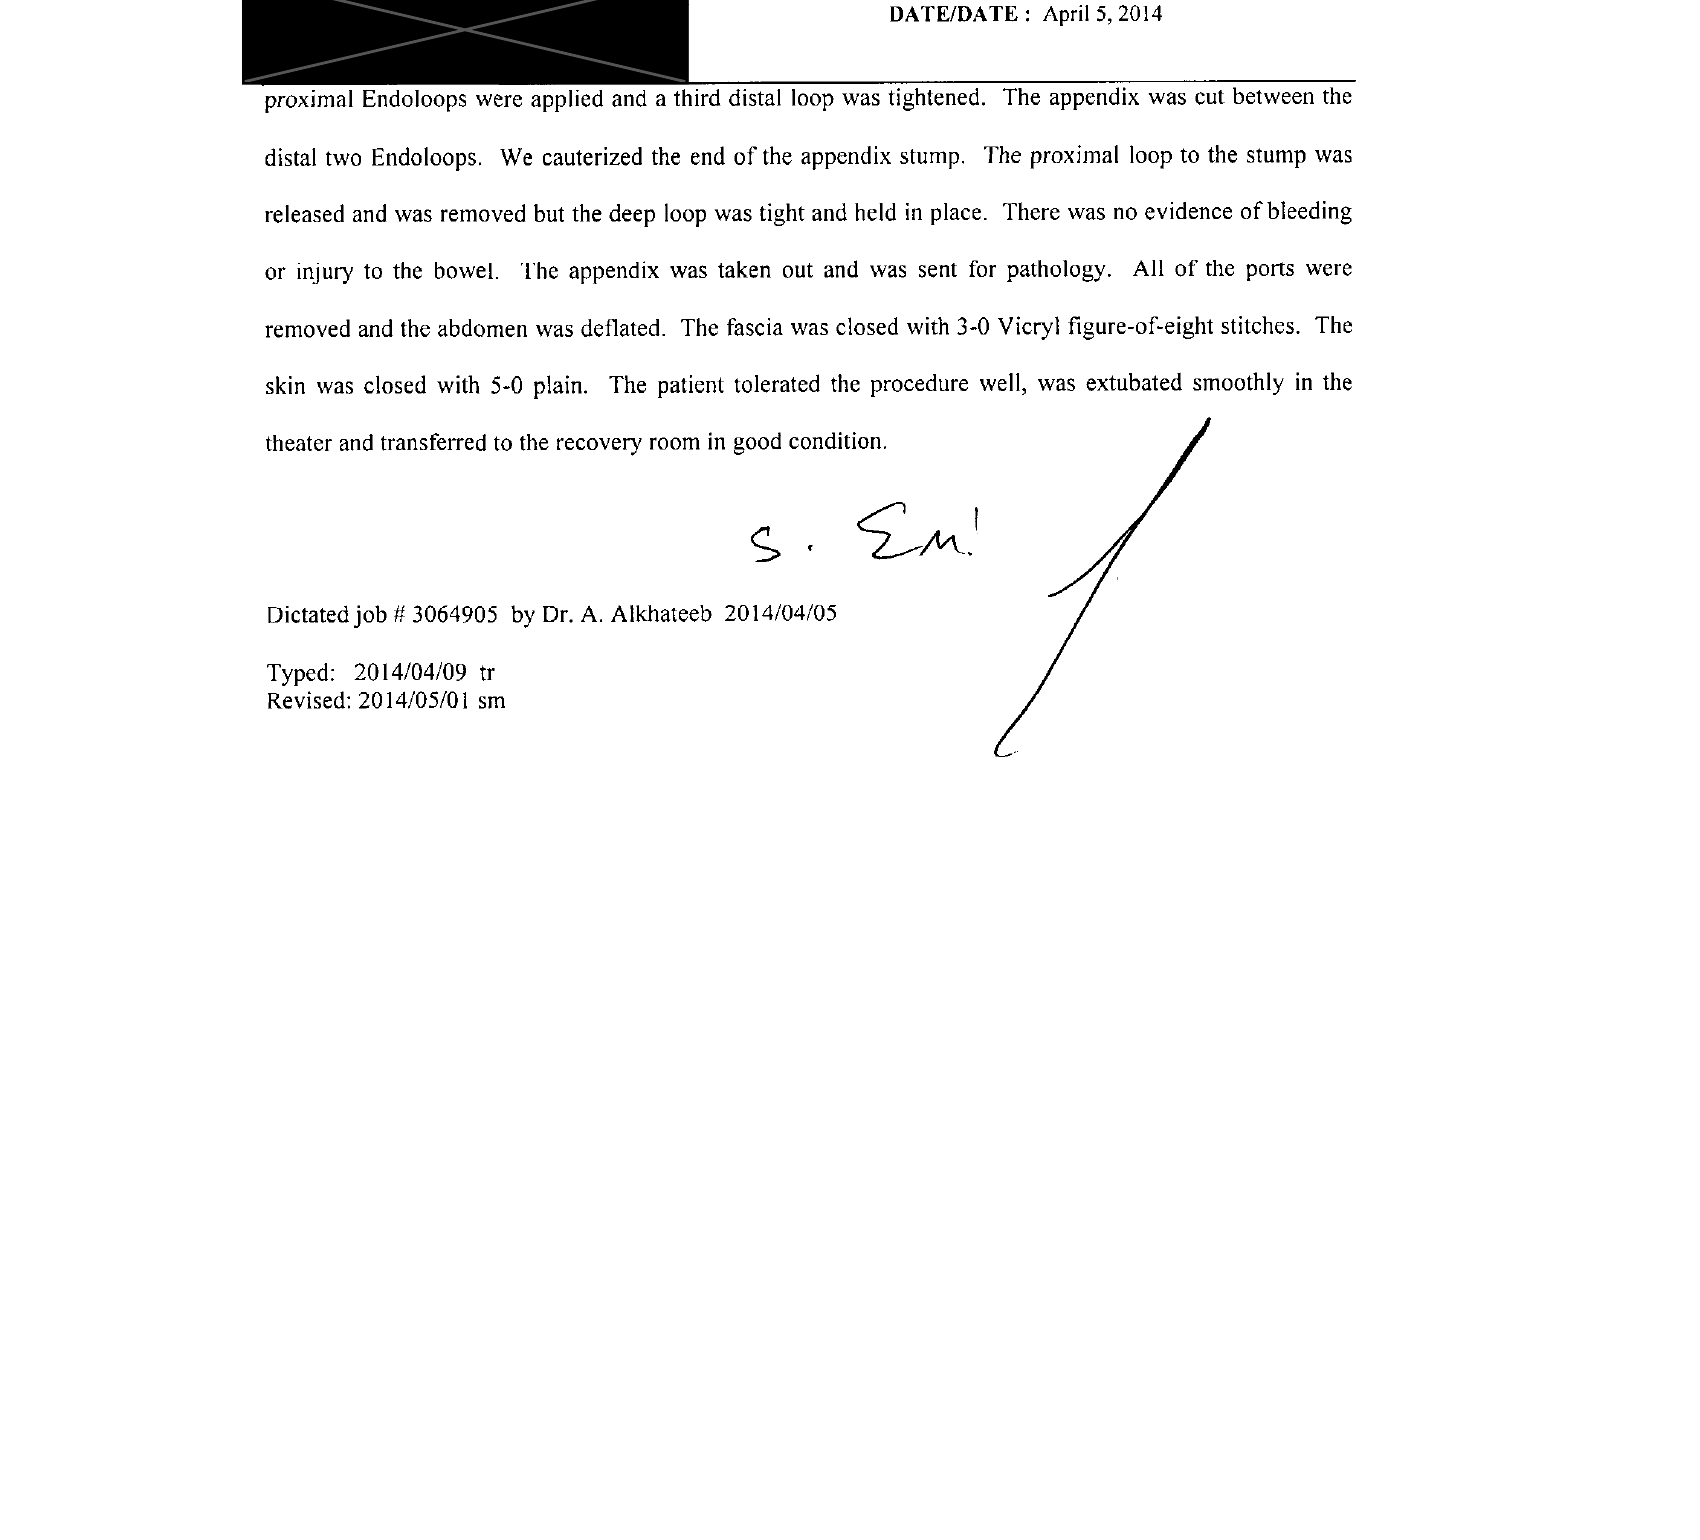

Cropping 136 O_1.png


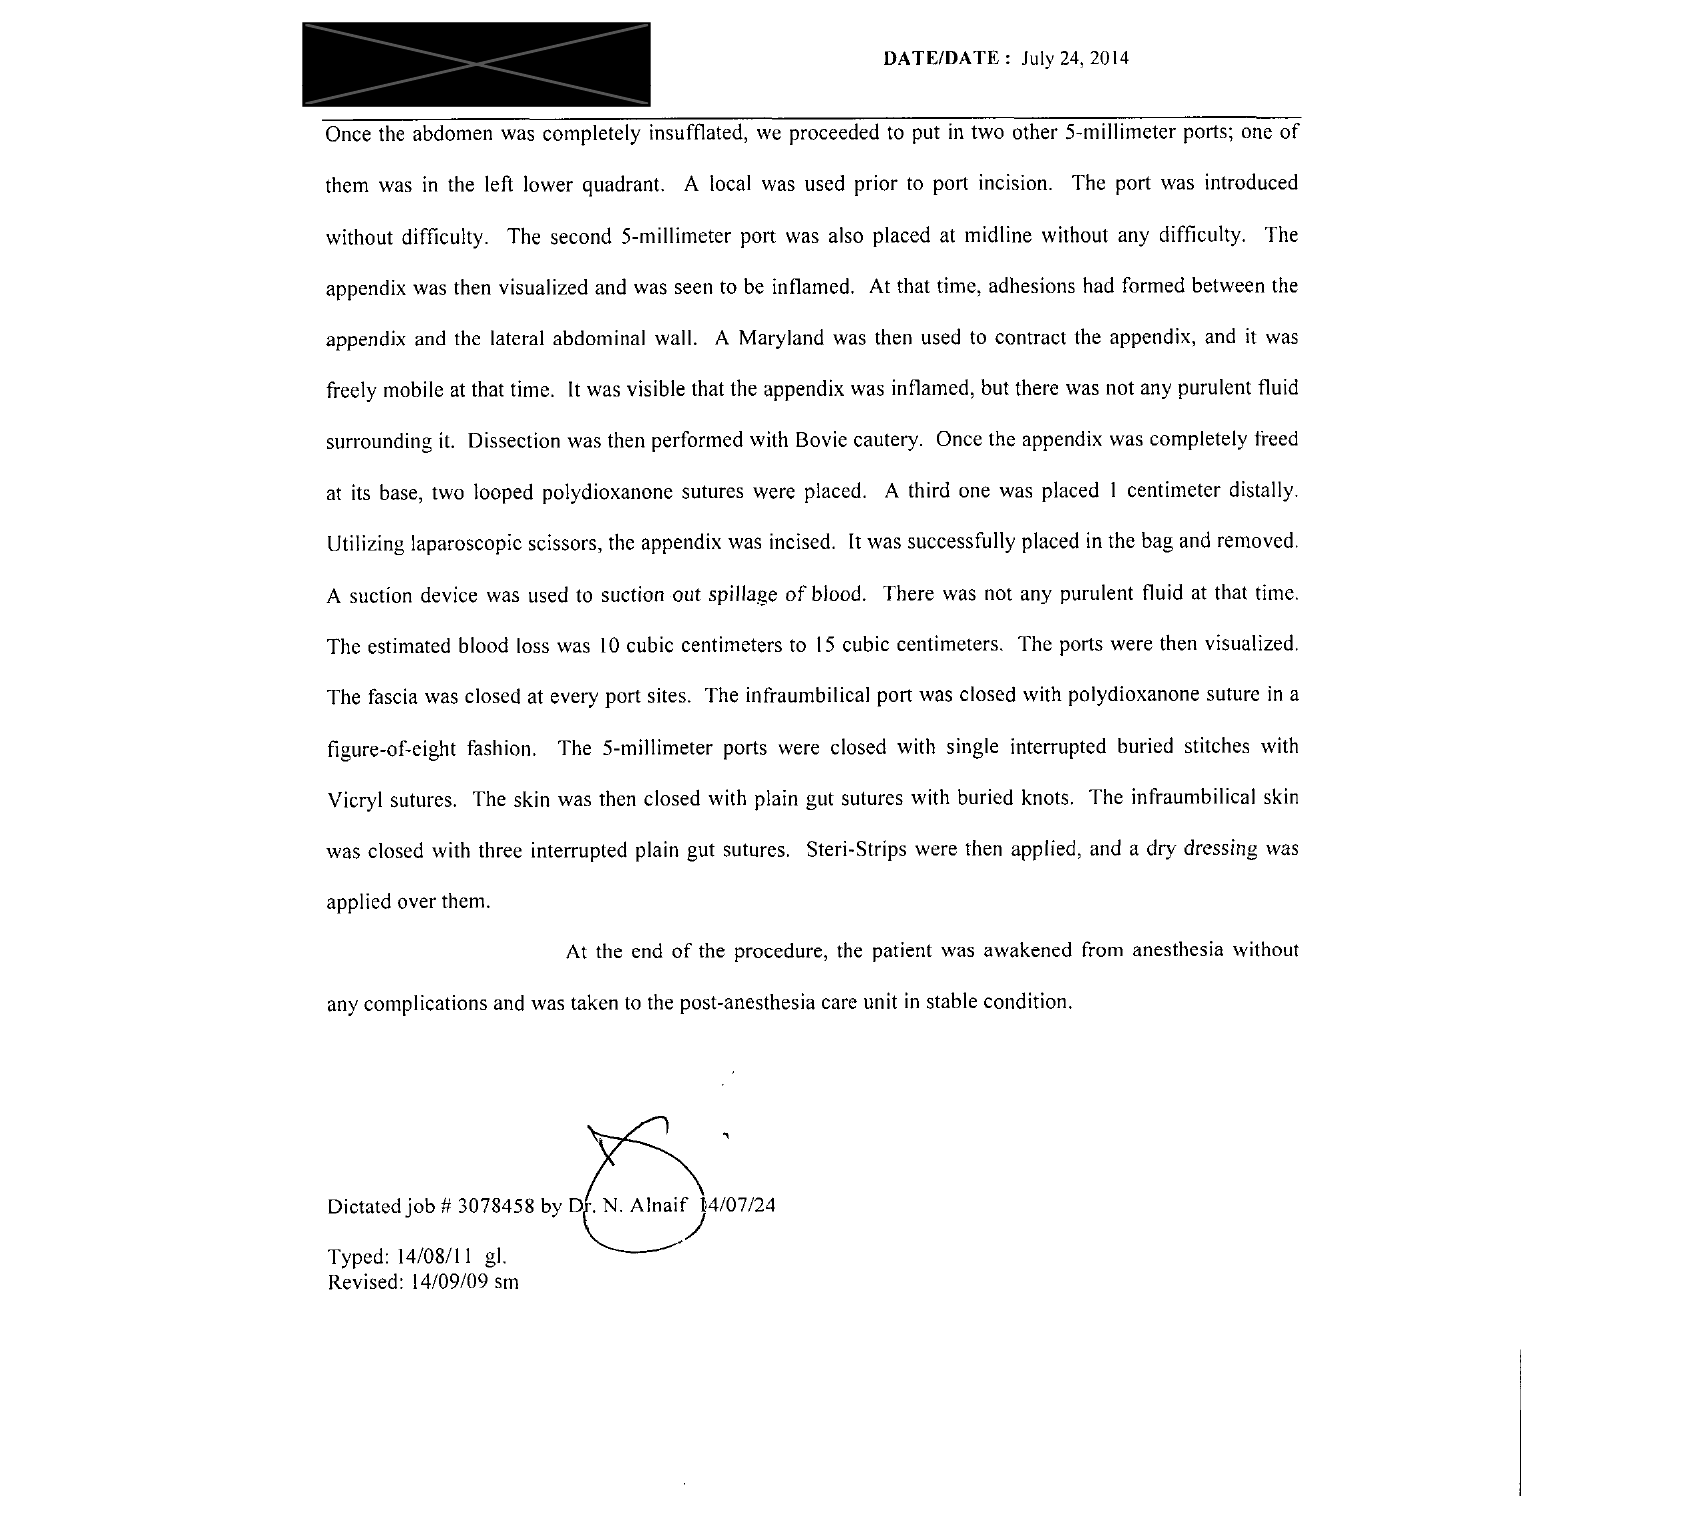

Cropping 167 O_1.png


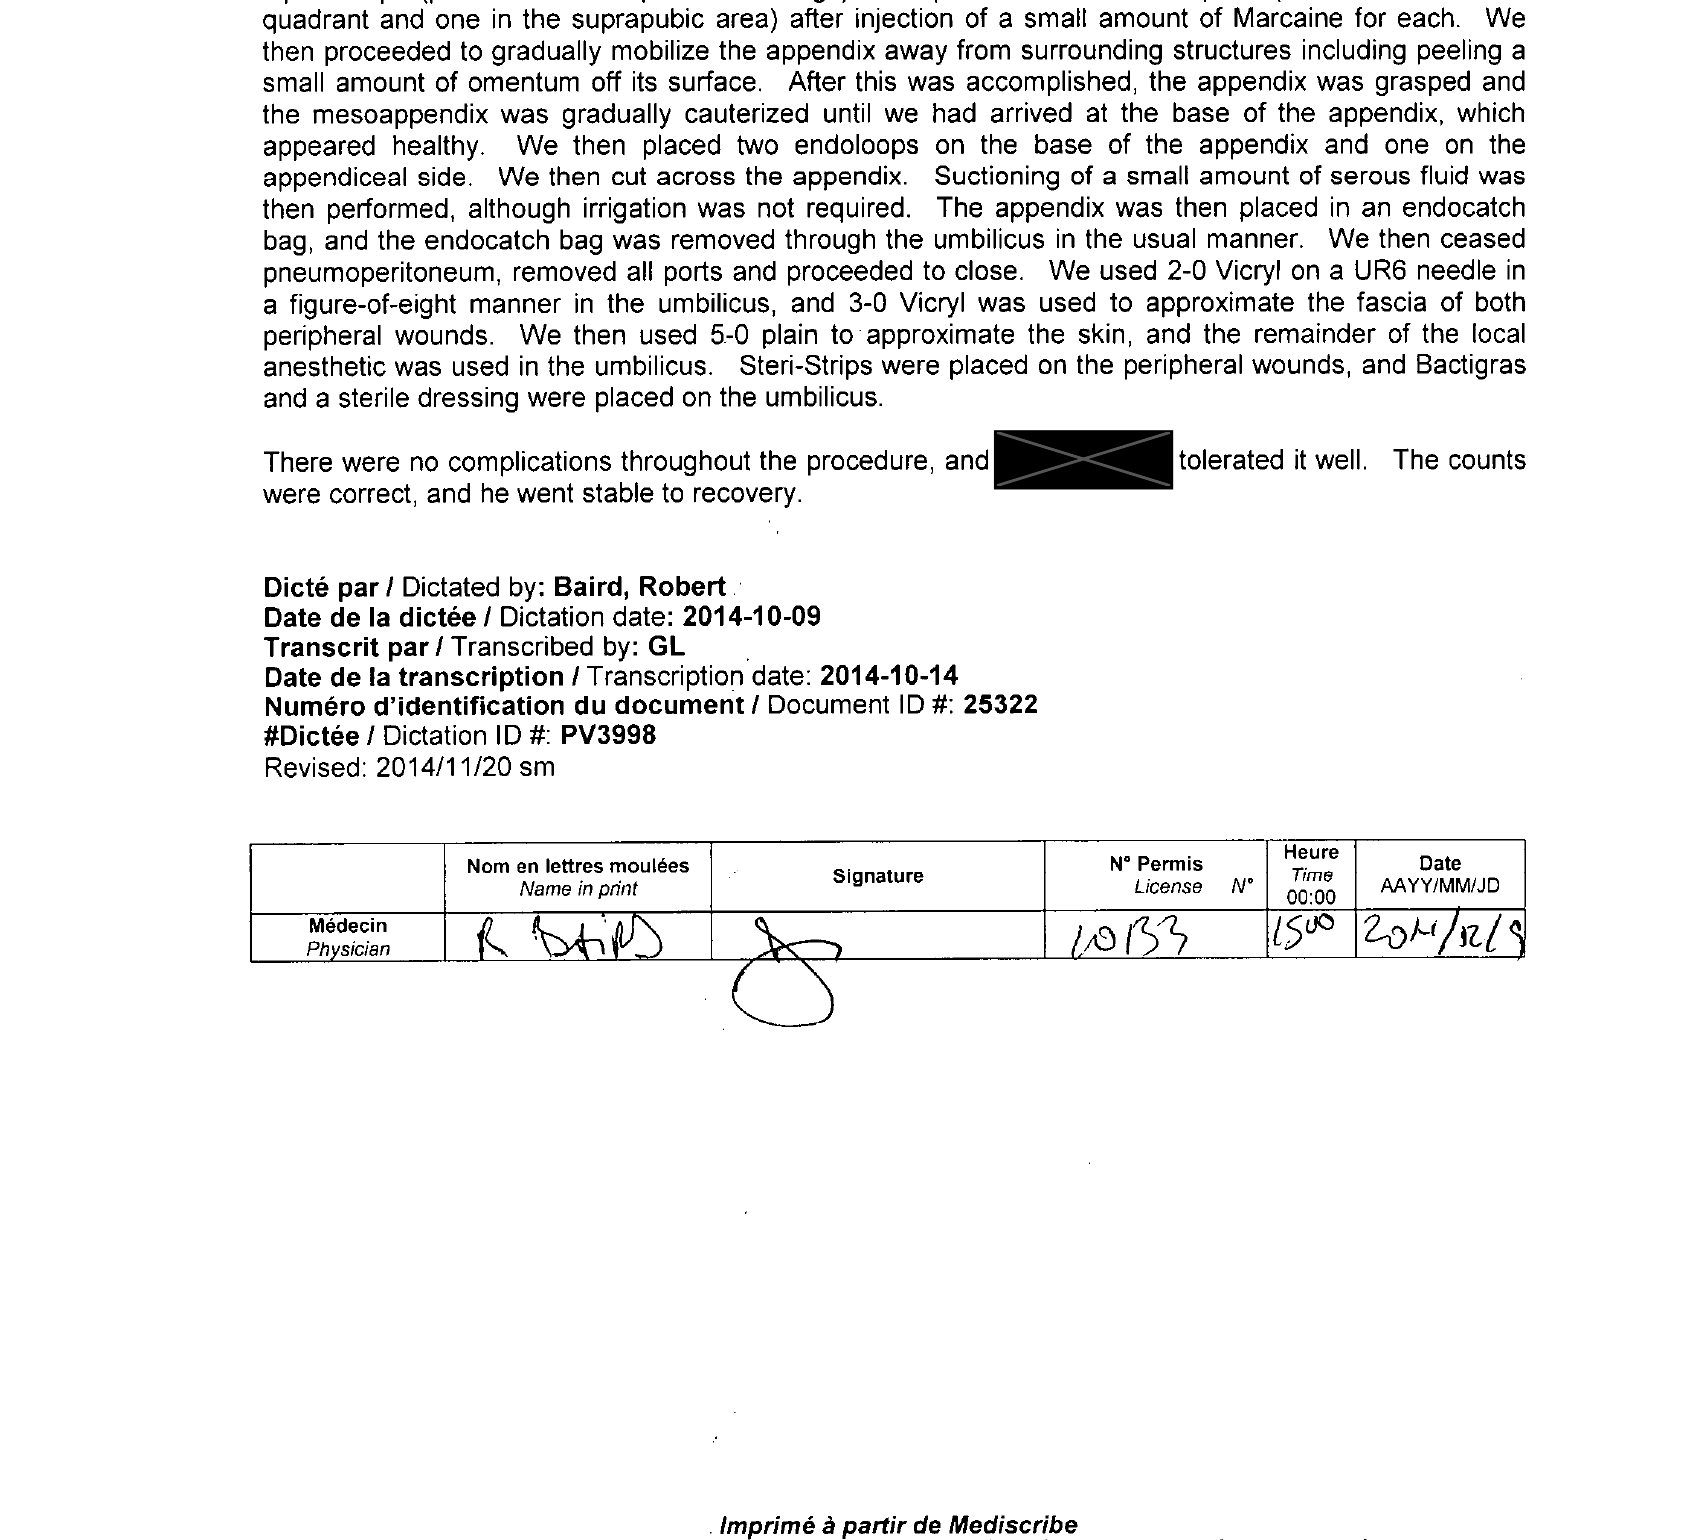

Cropping 52 O_1.png


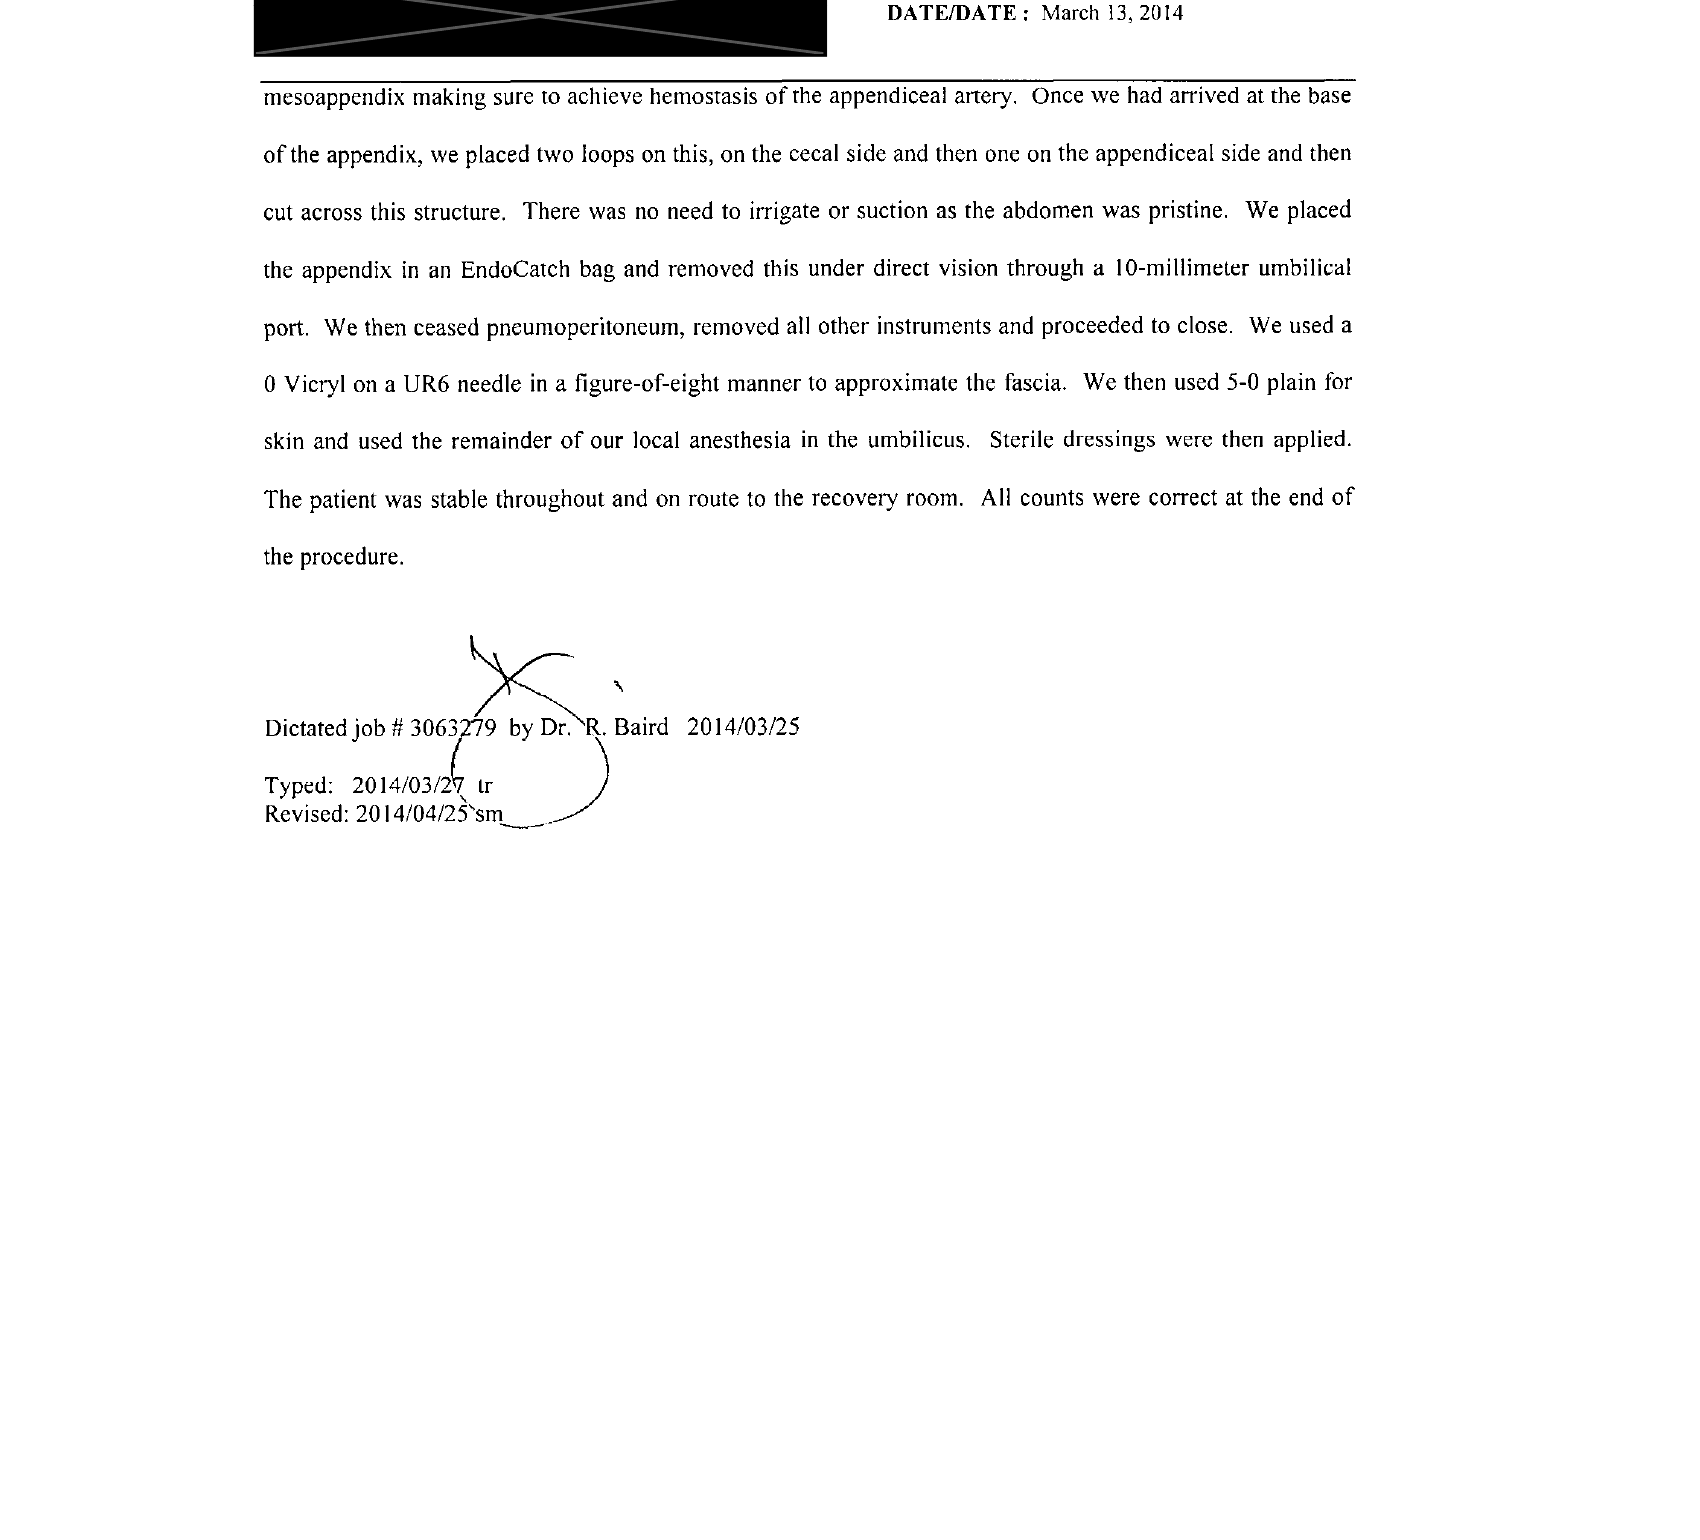

Cropping 119 O_1.png


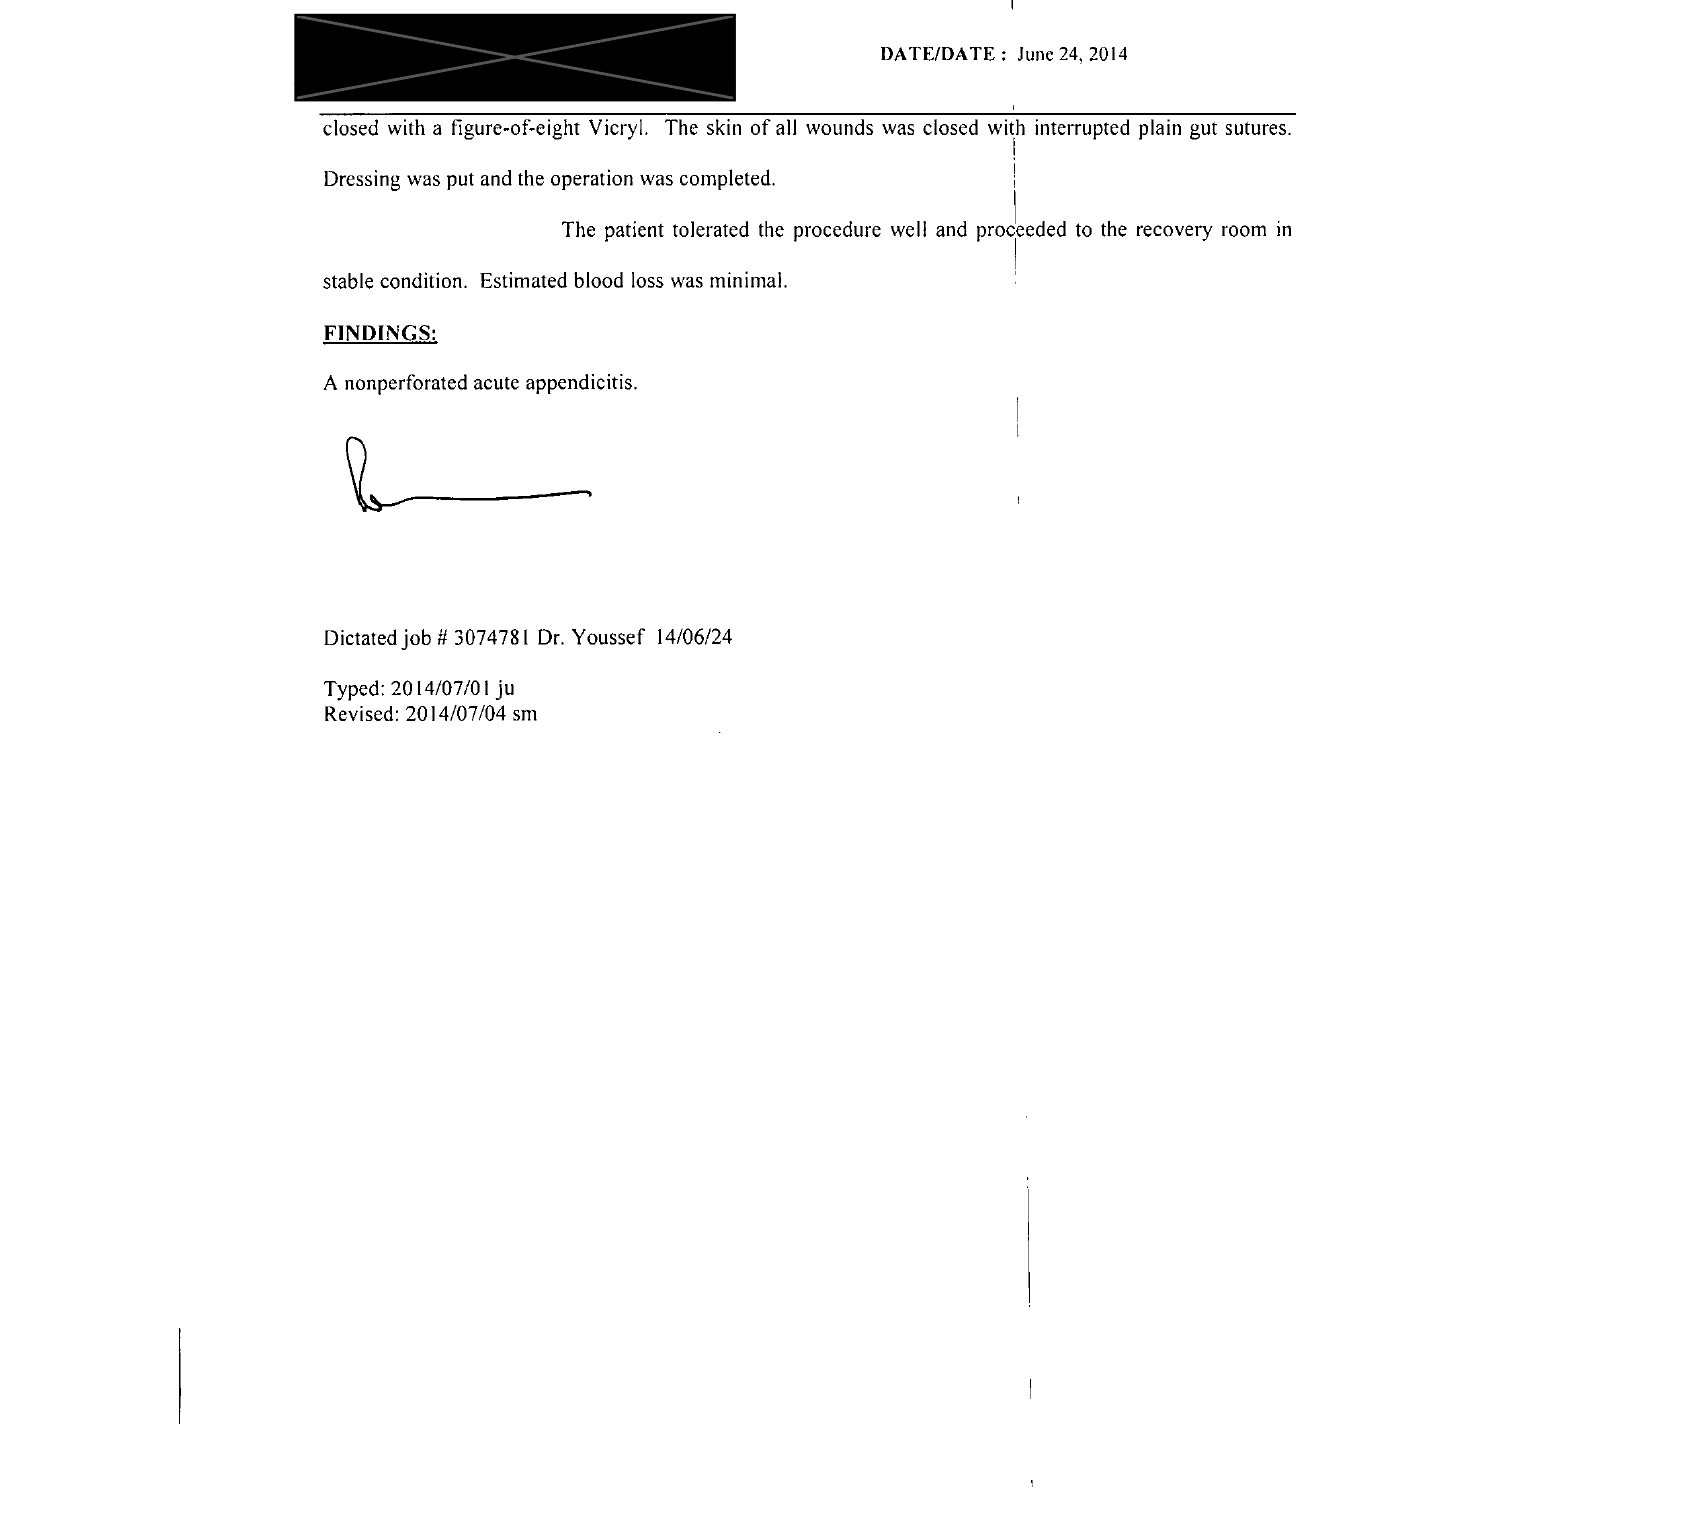

Cropping 96 O_1.png


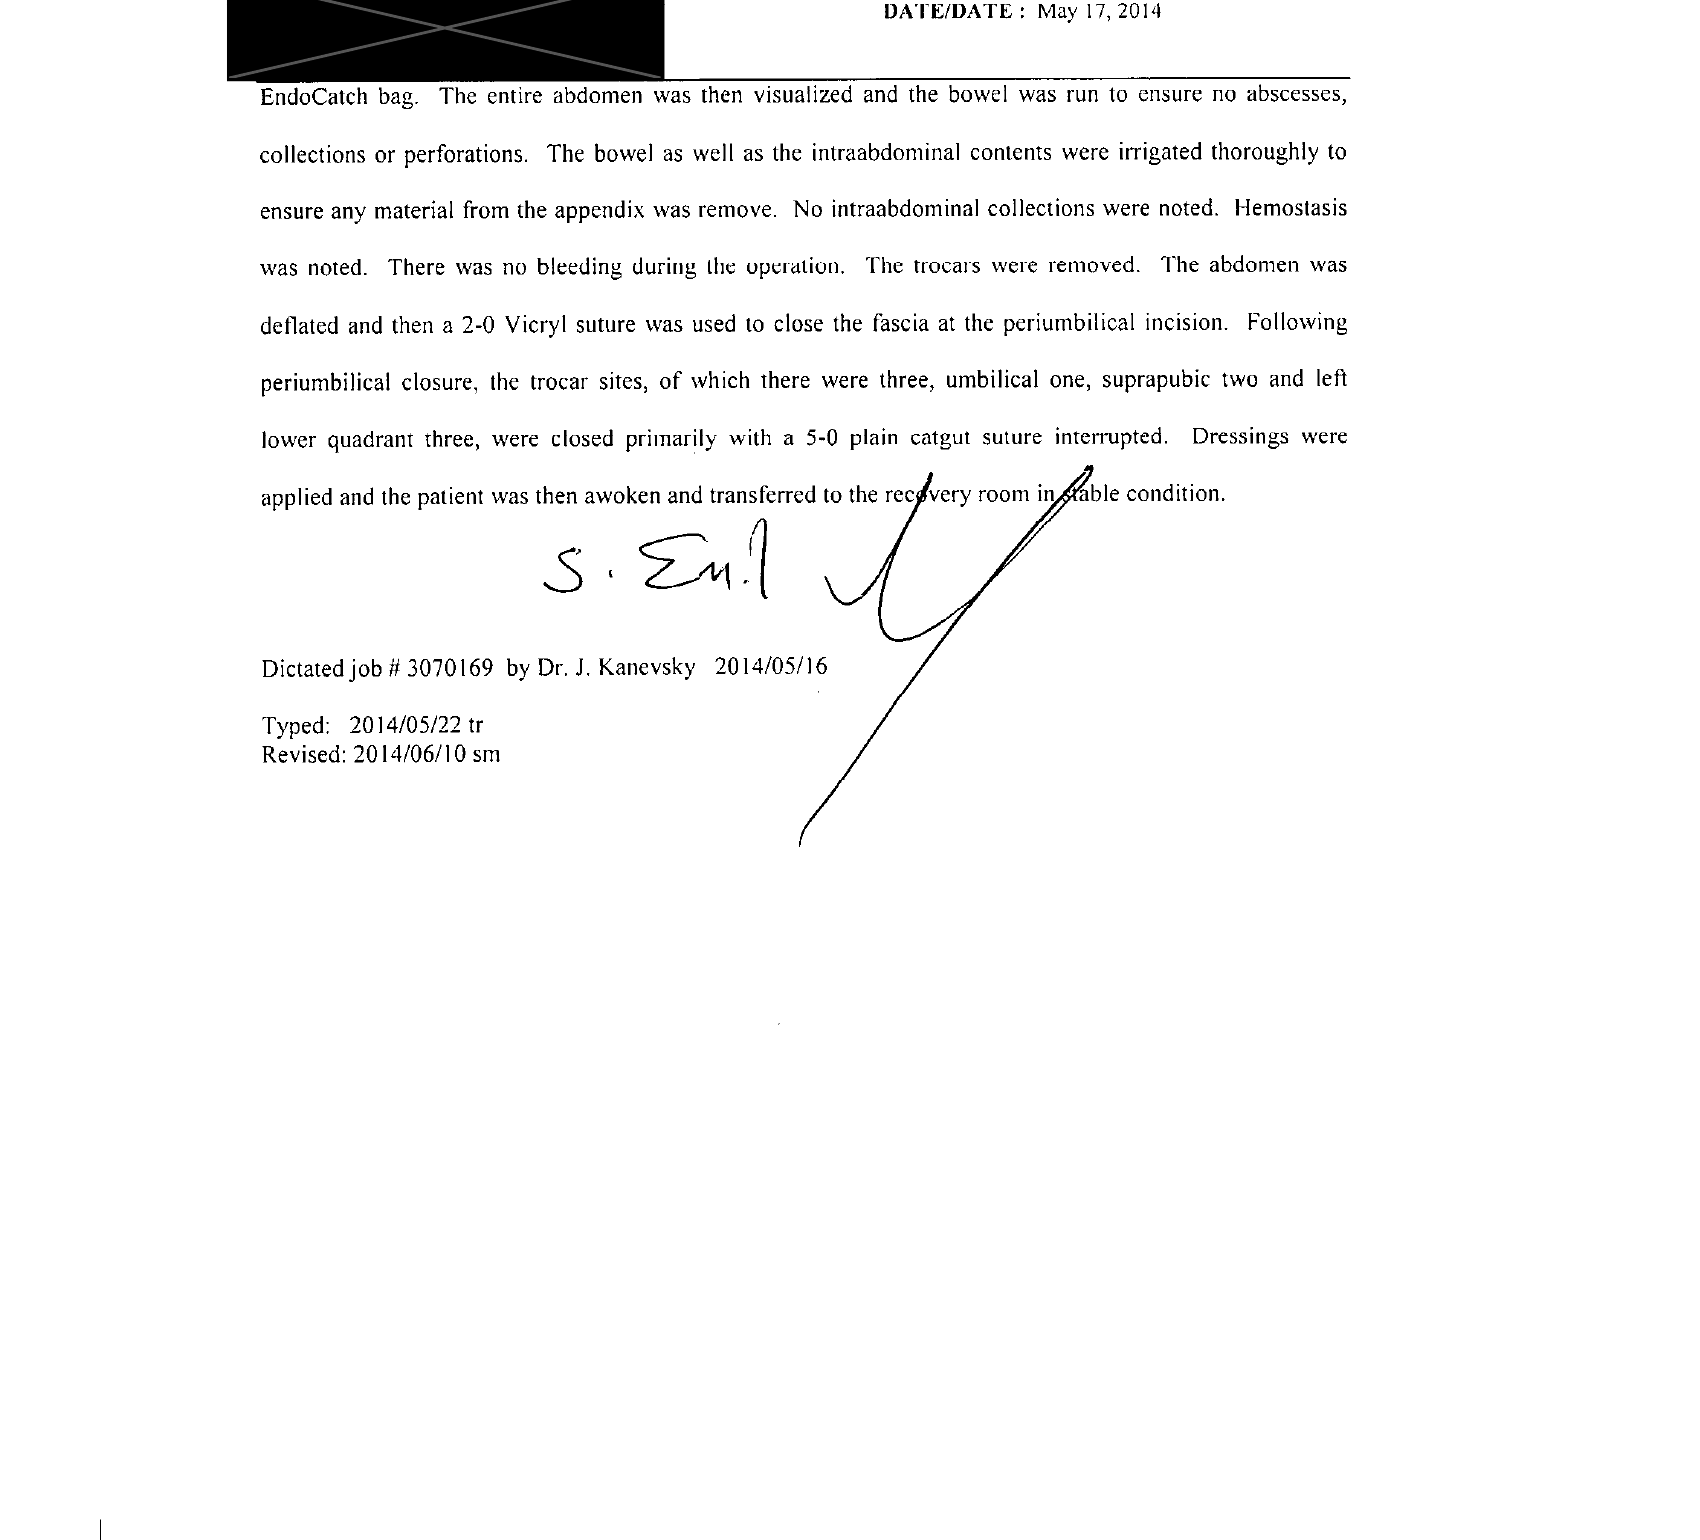

Cropping 76 O_1.png


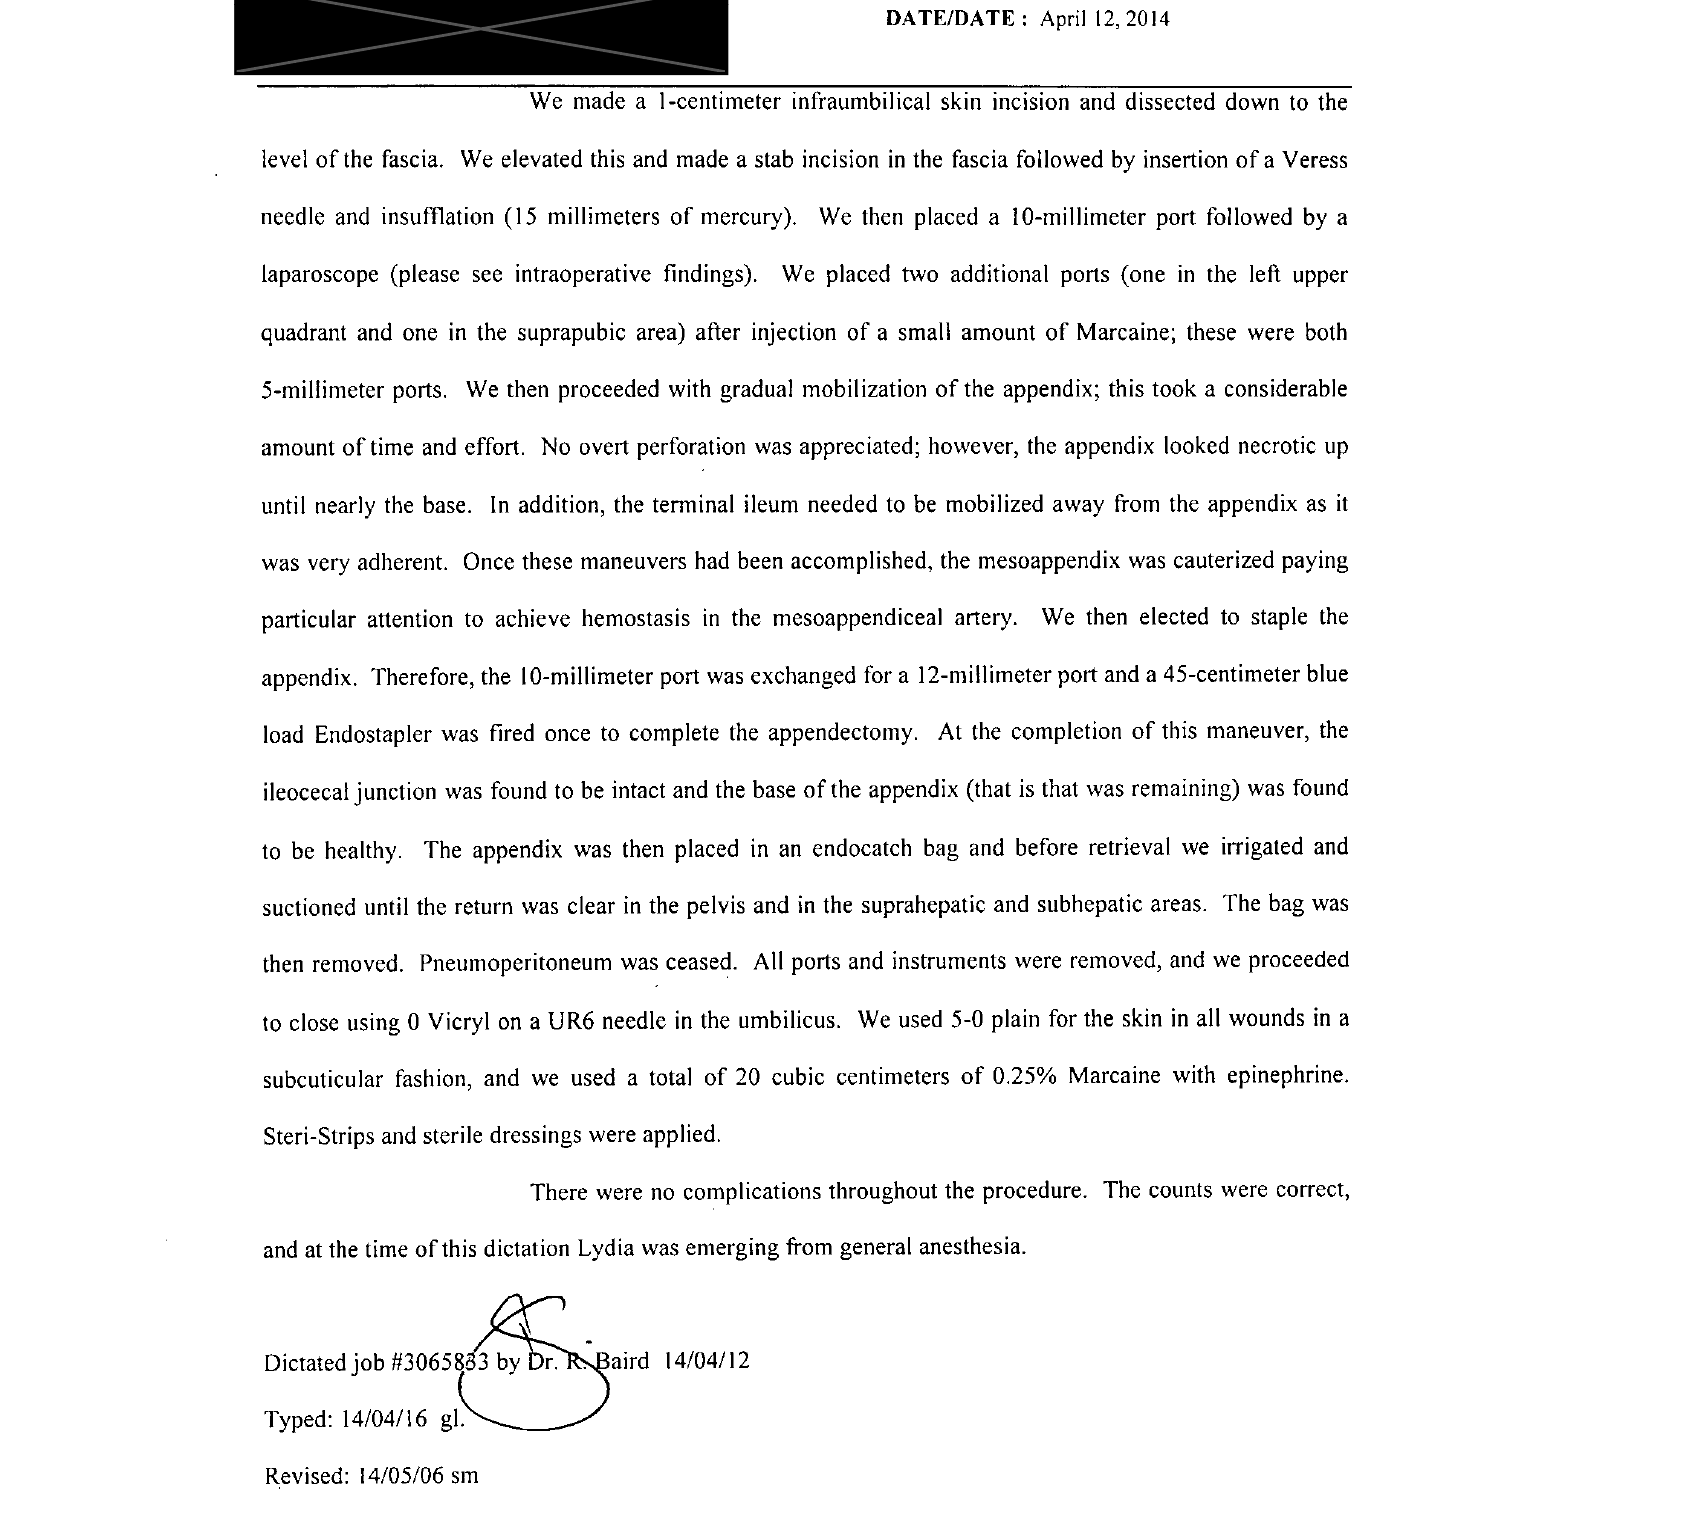

Cropping 184 O_1.png


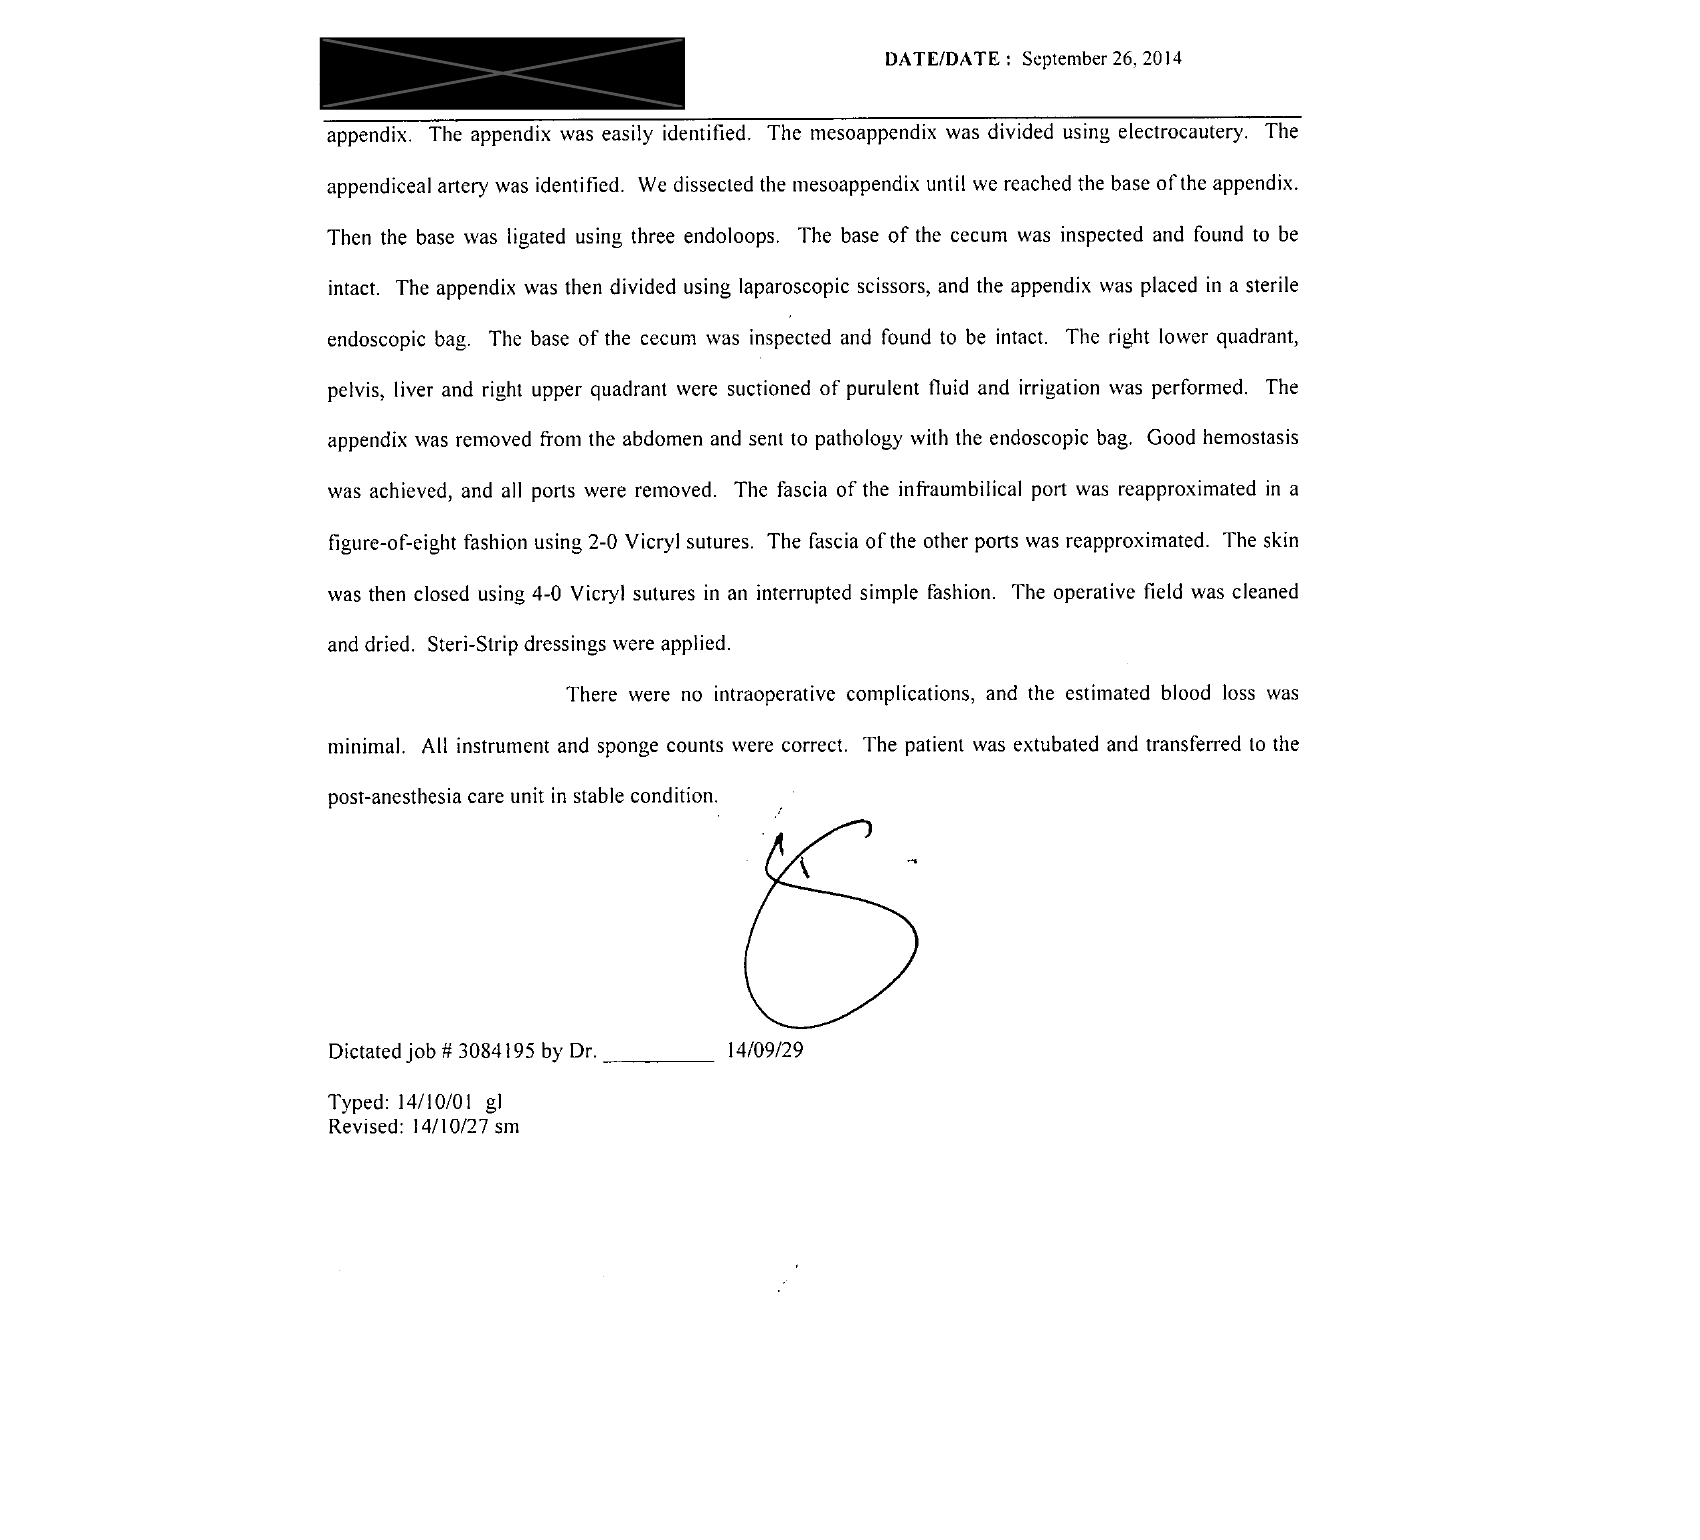

Cropping 149 O_1.png


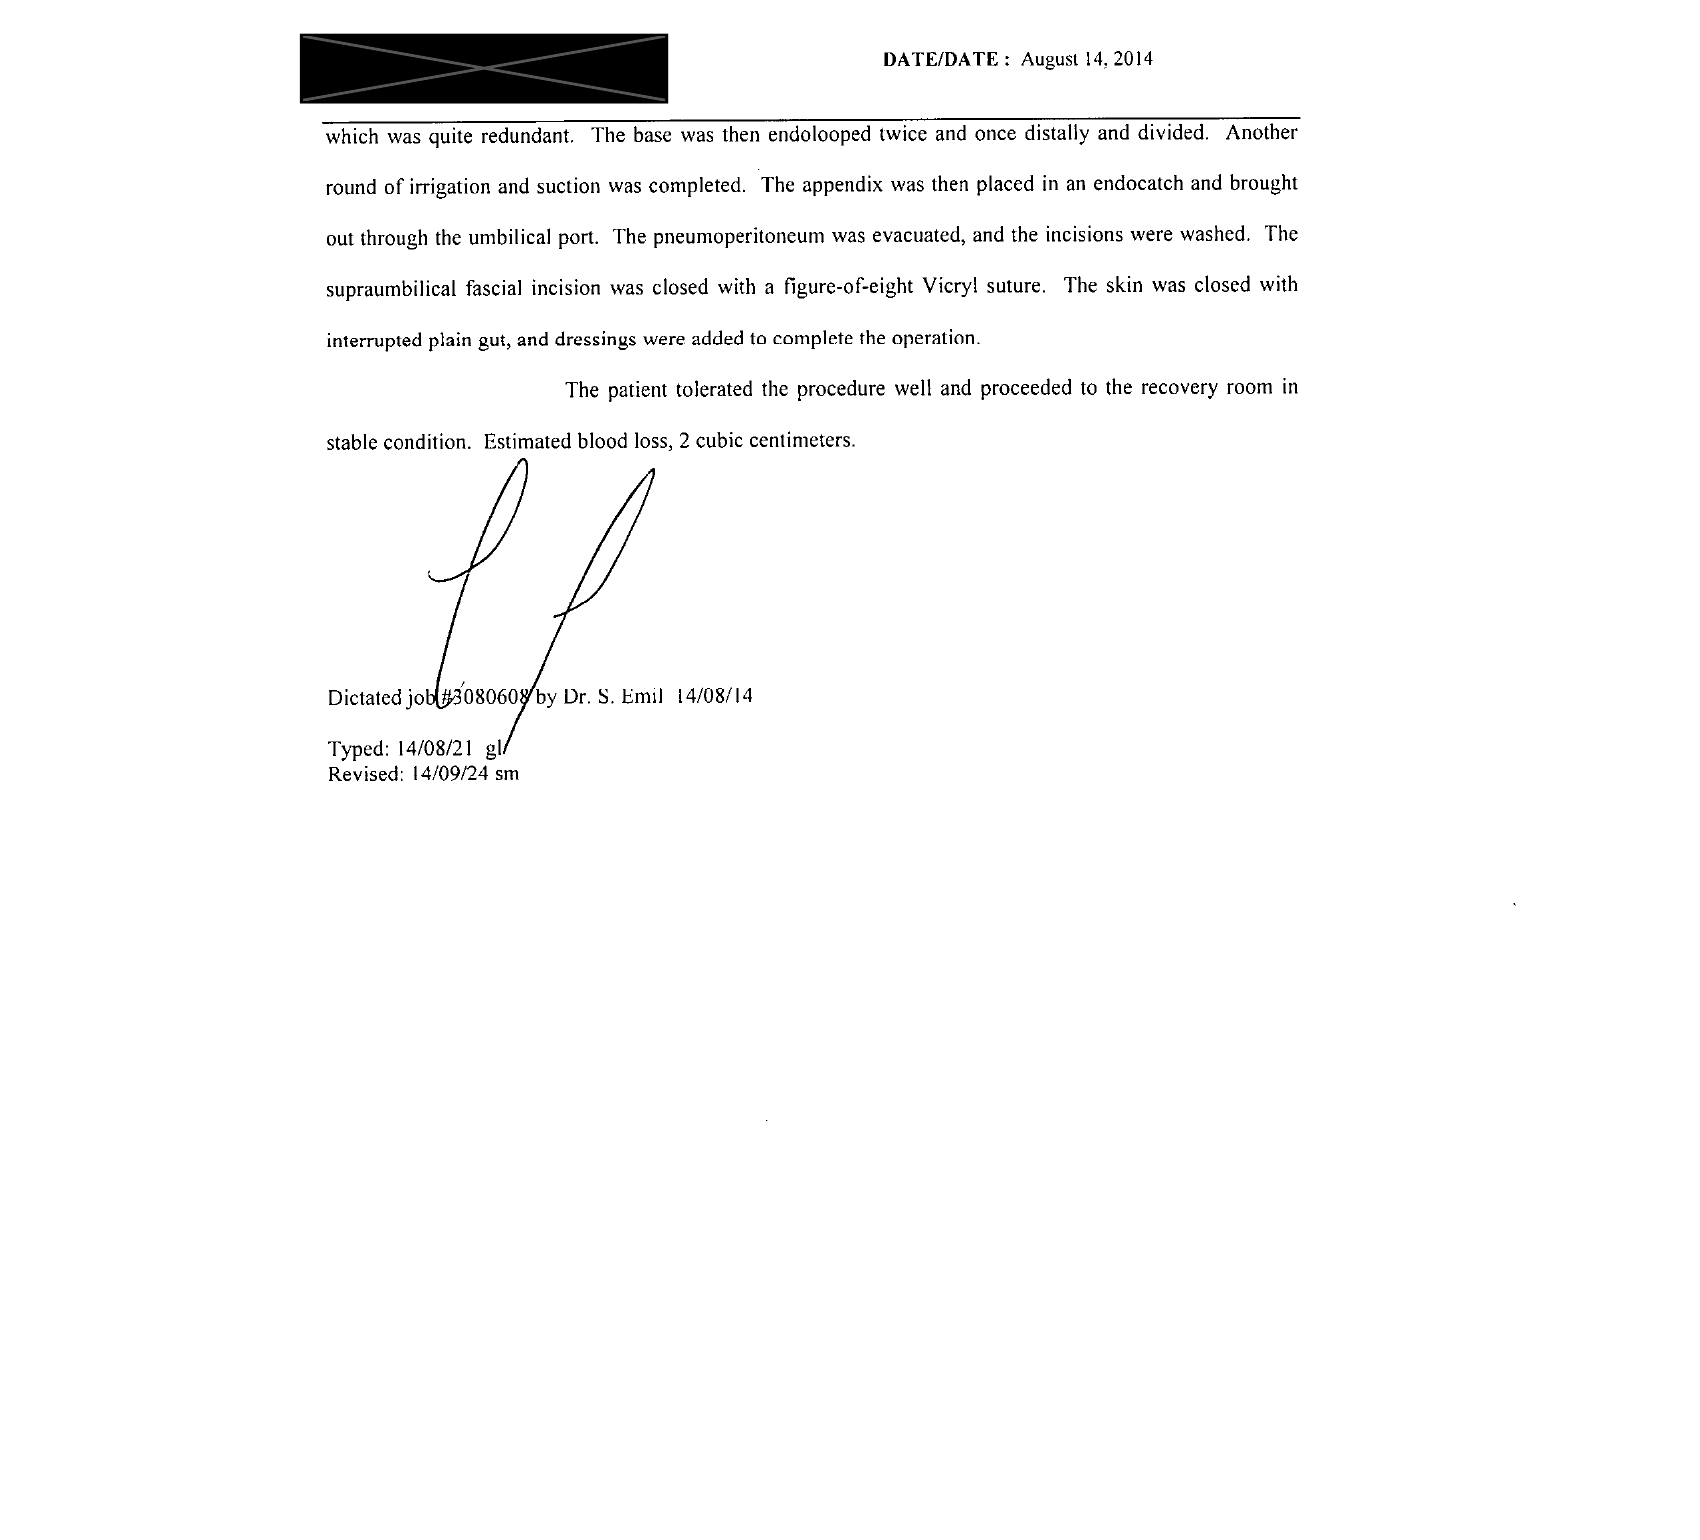

Cropping 77 O_1.png


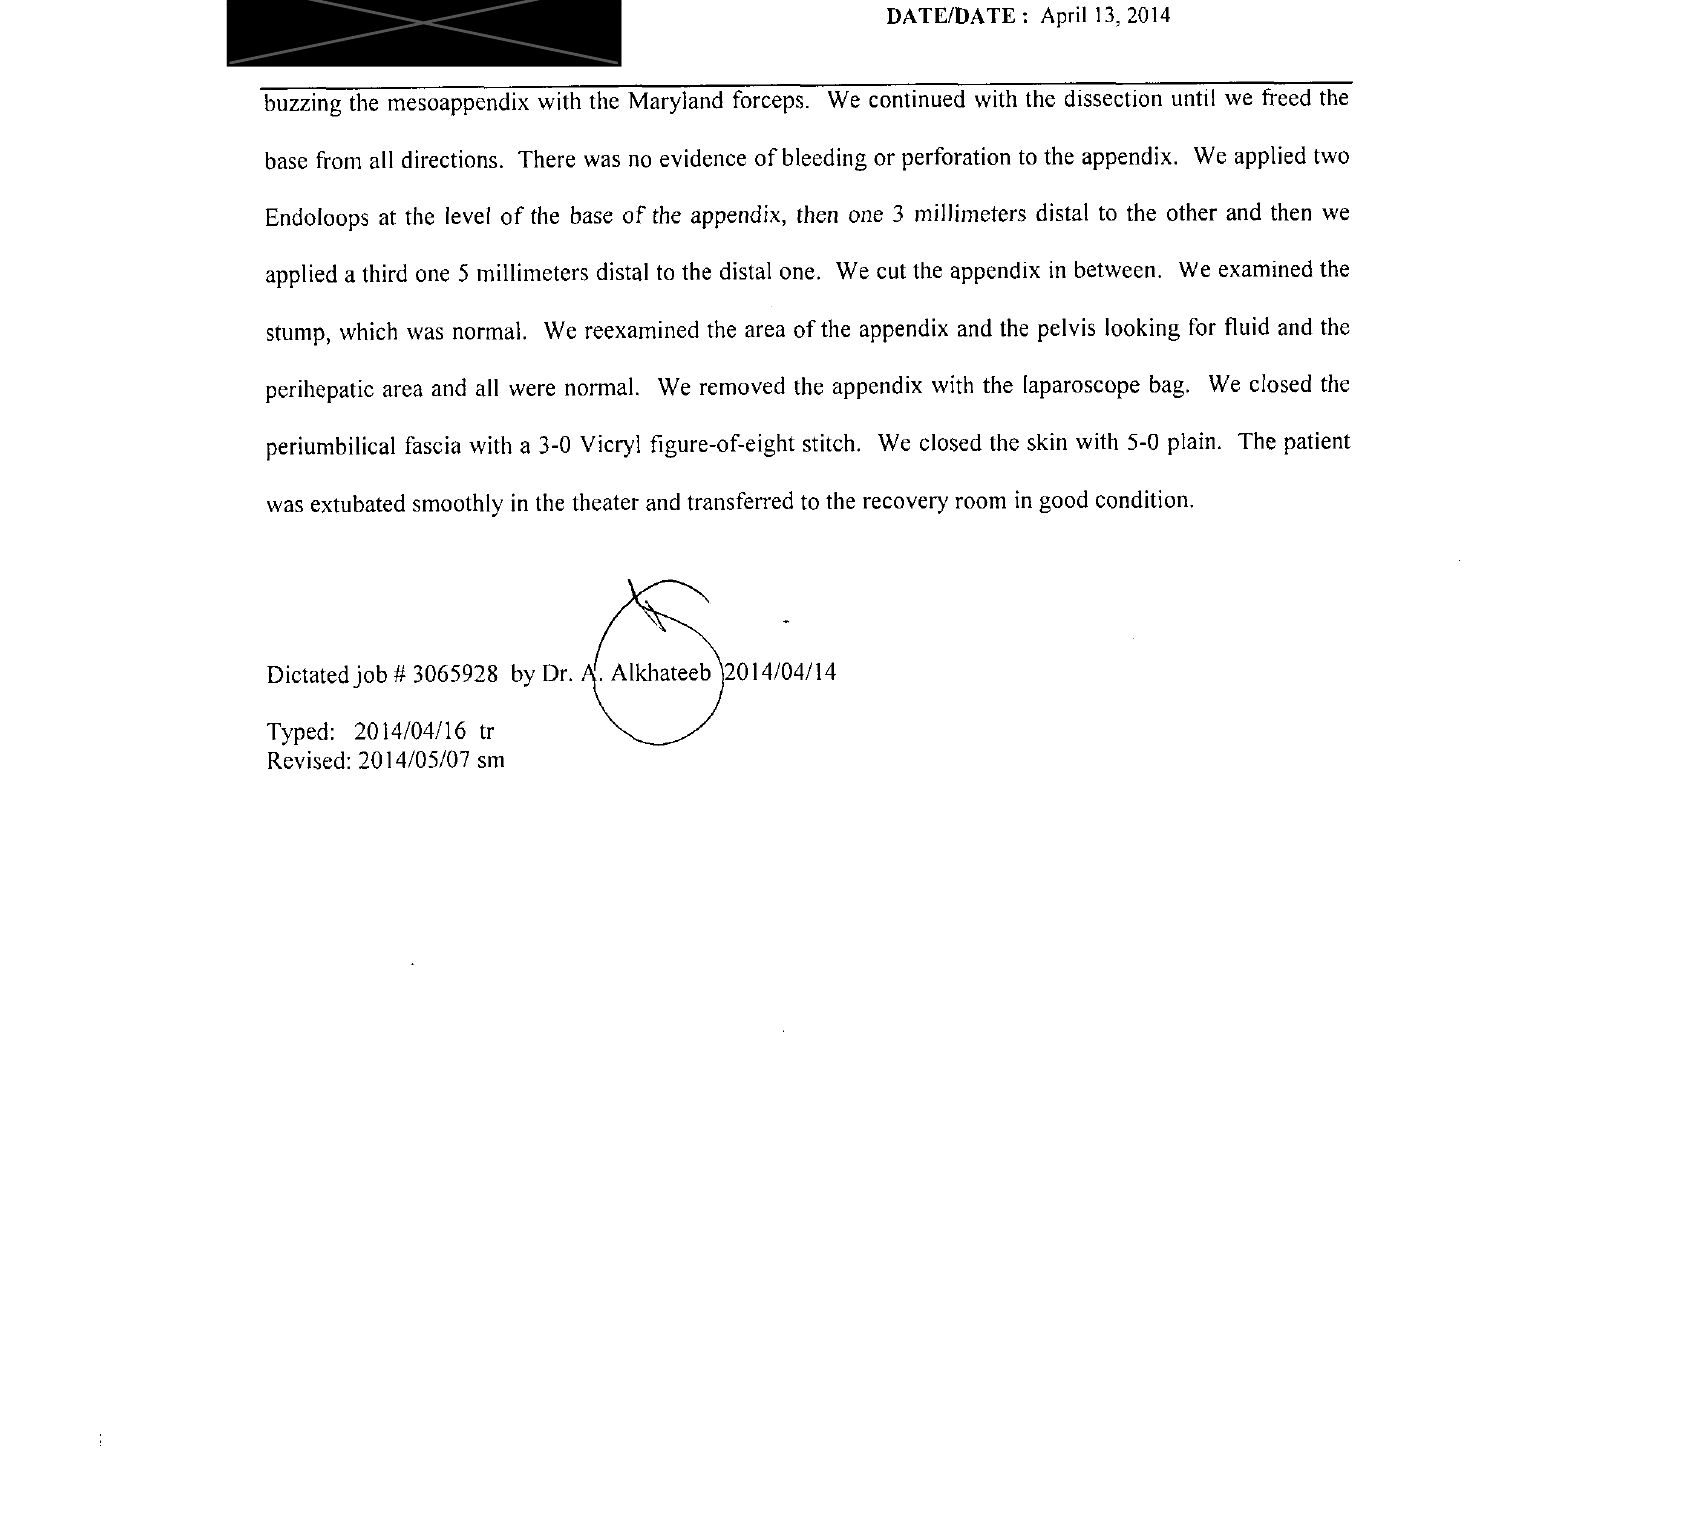

Cropping 97 O_1.png


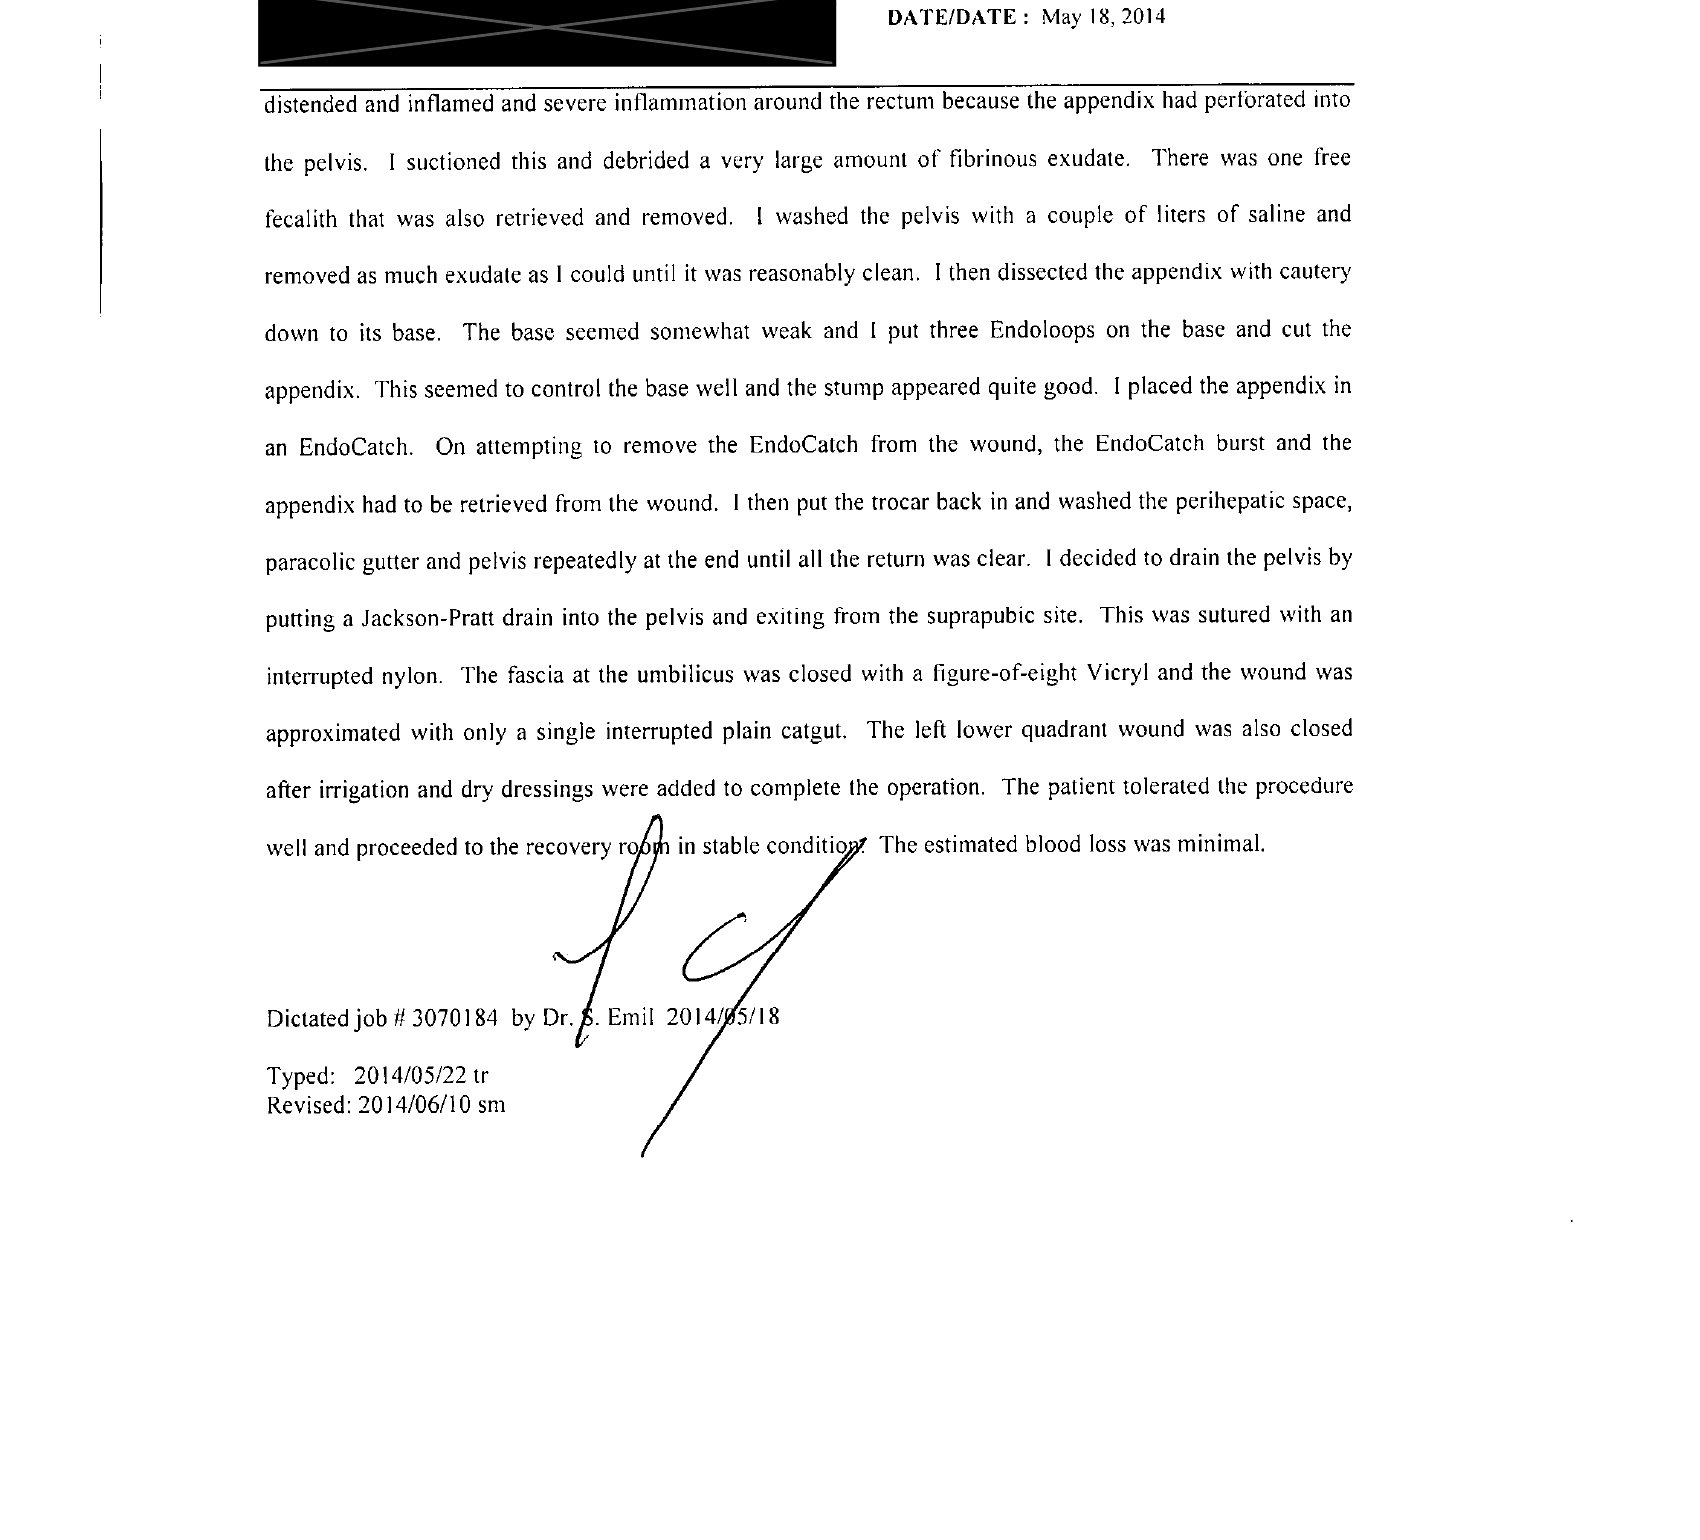

Cropping 61 O_1.png


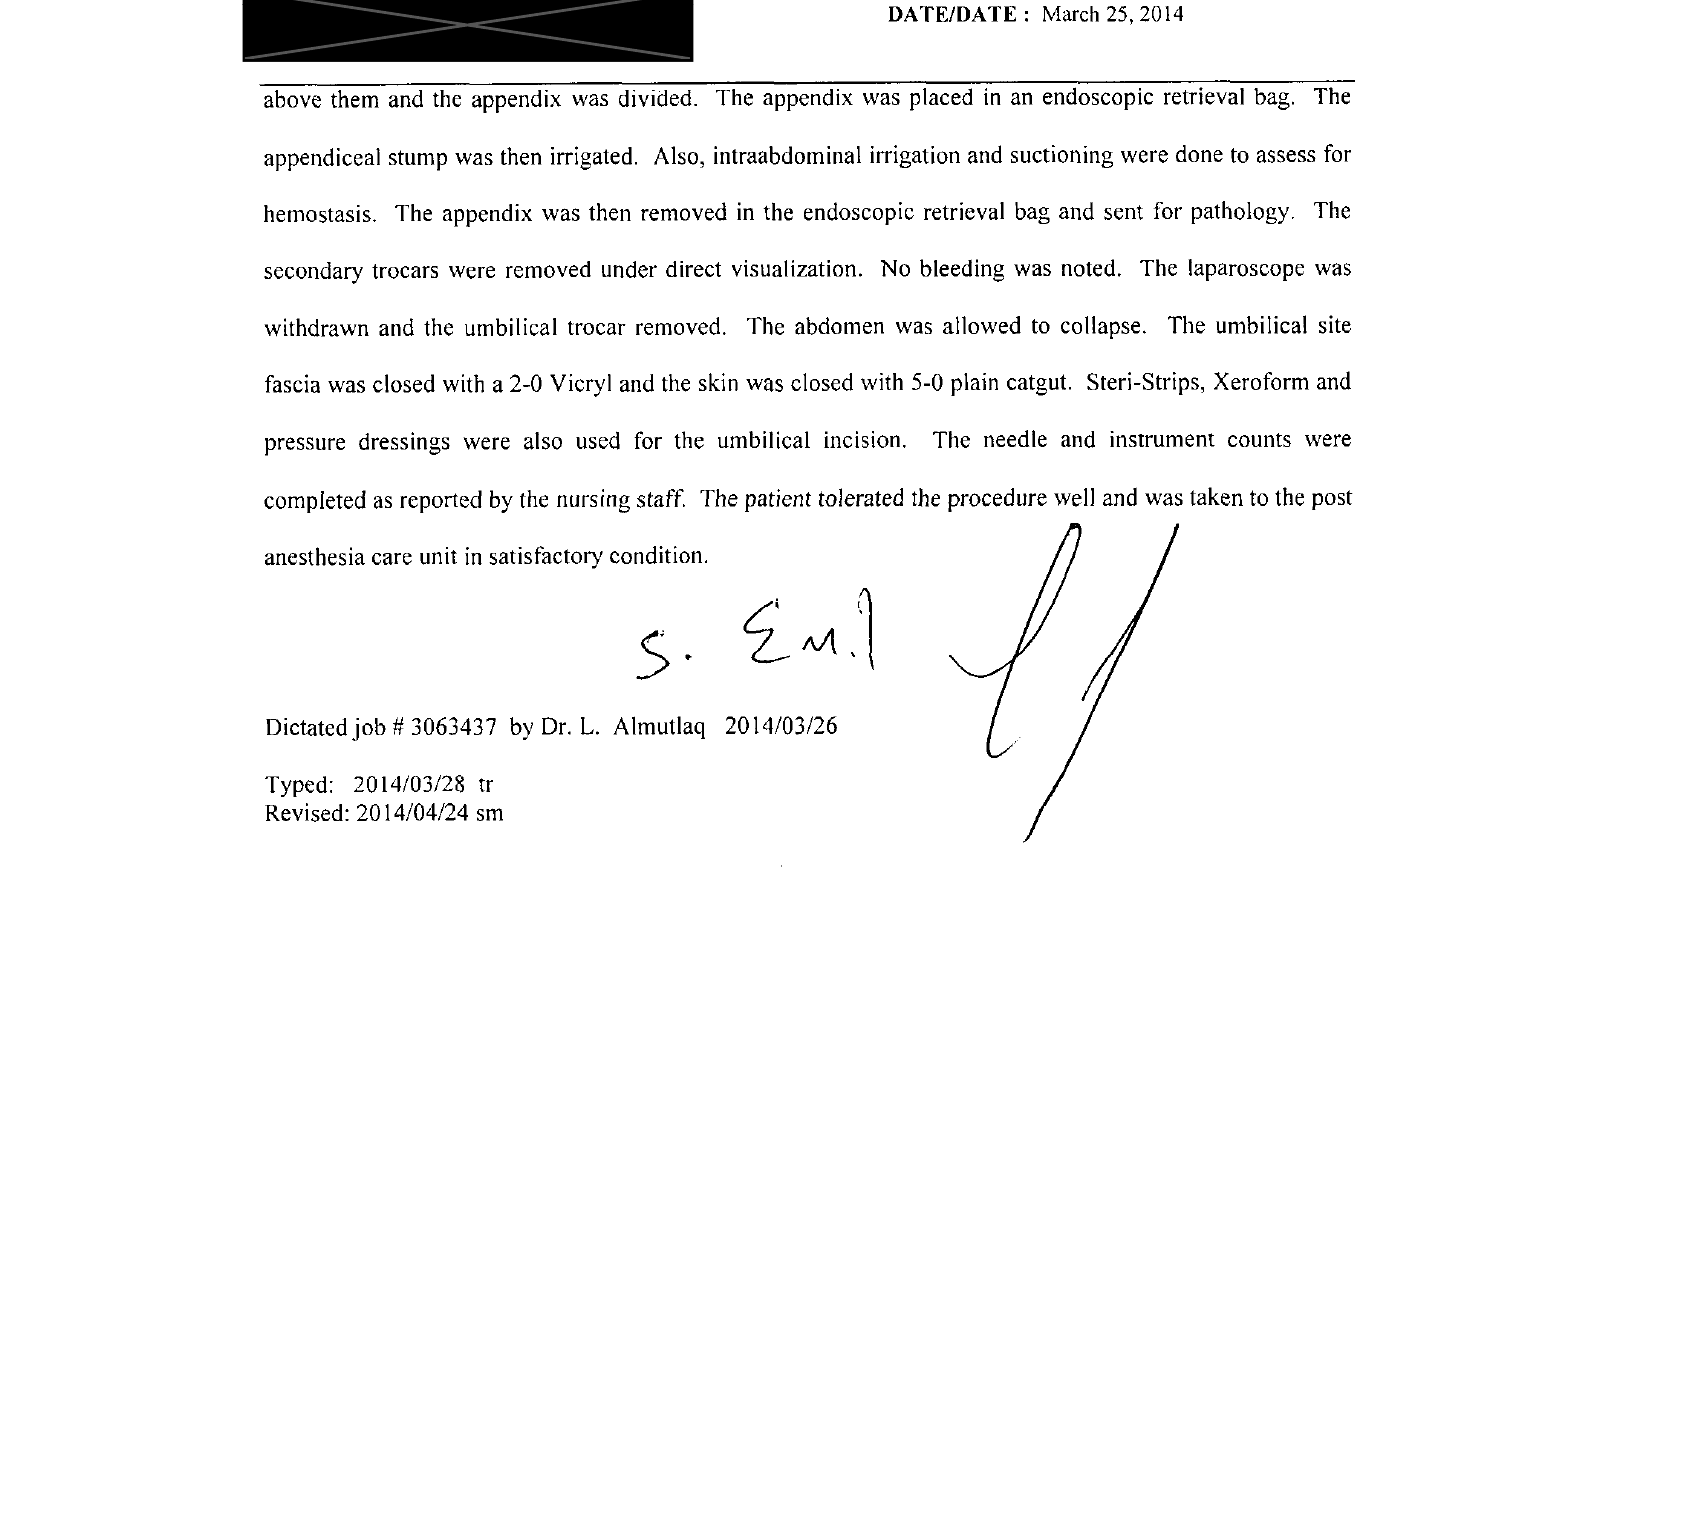

Cropping 157 O_1.png


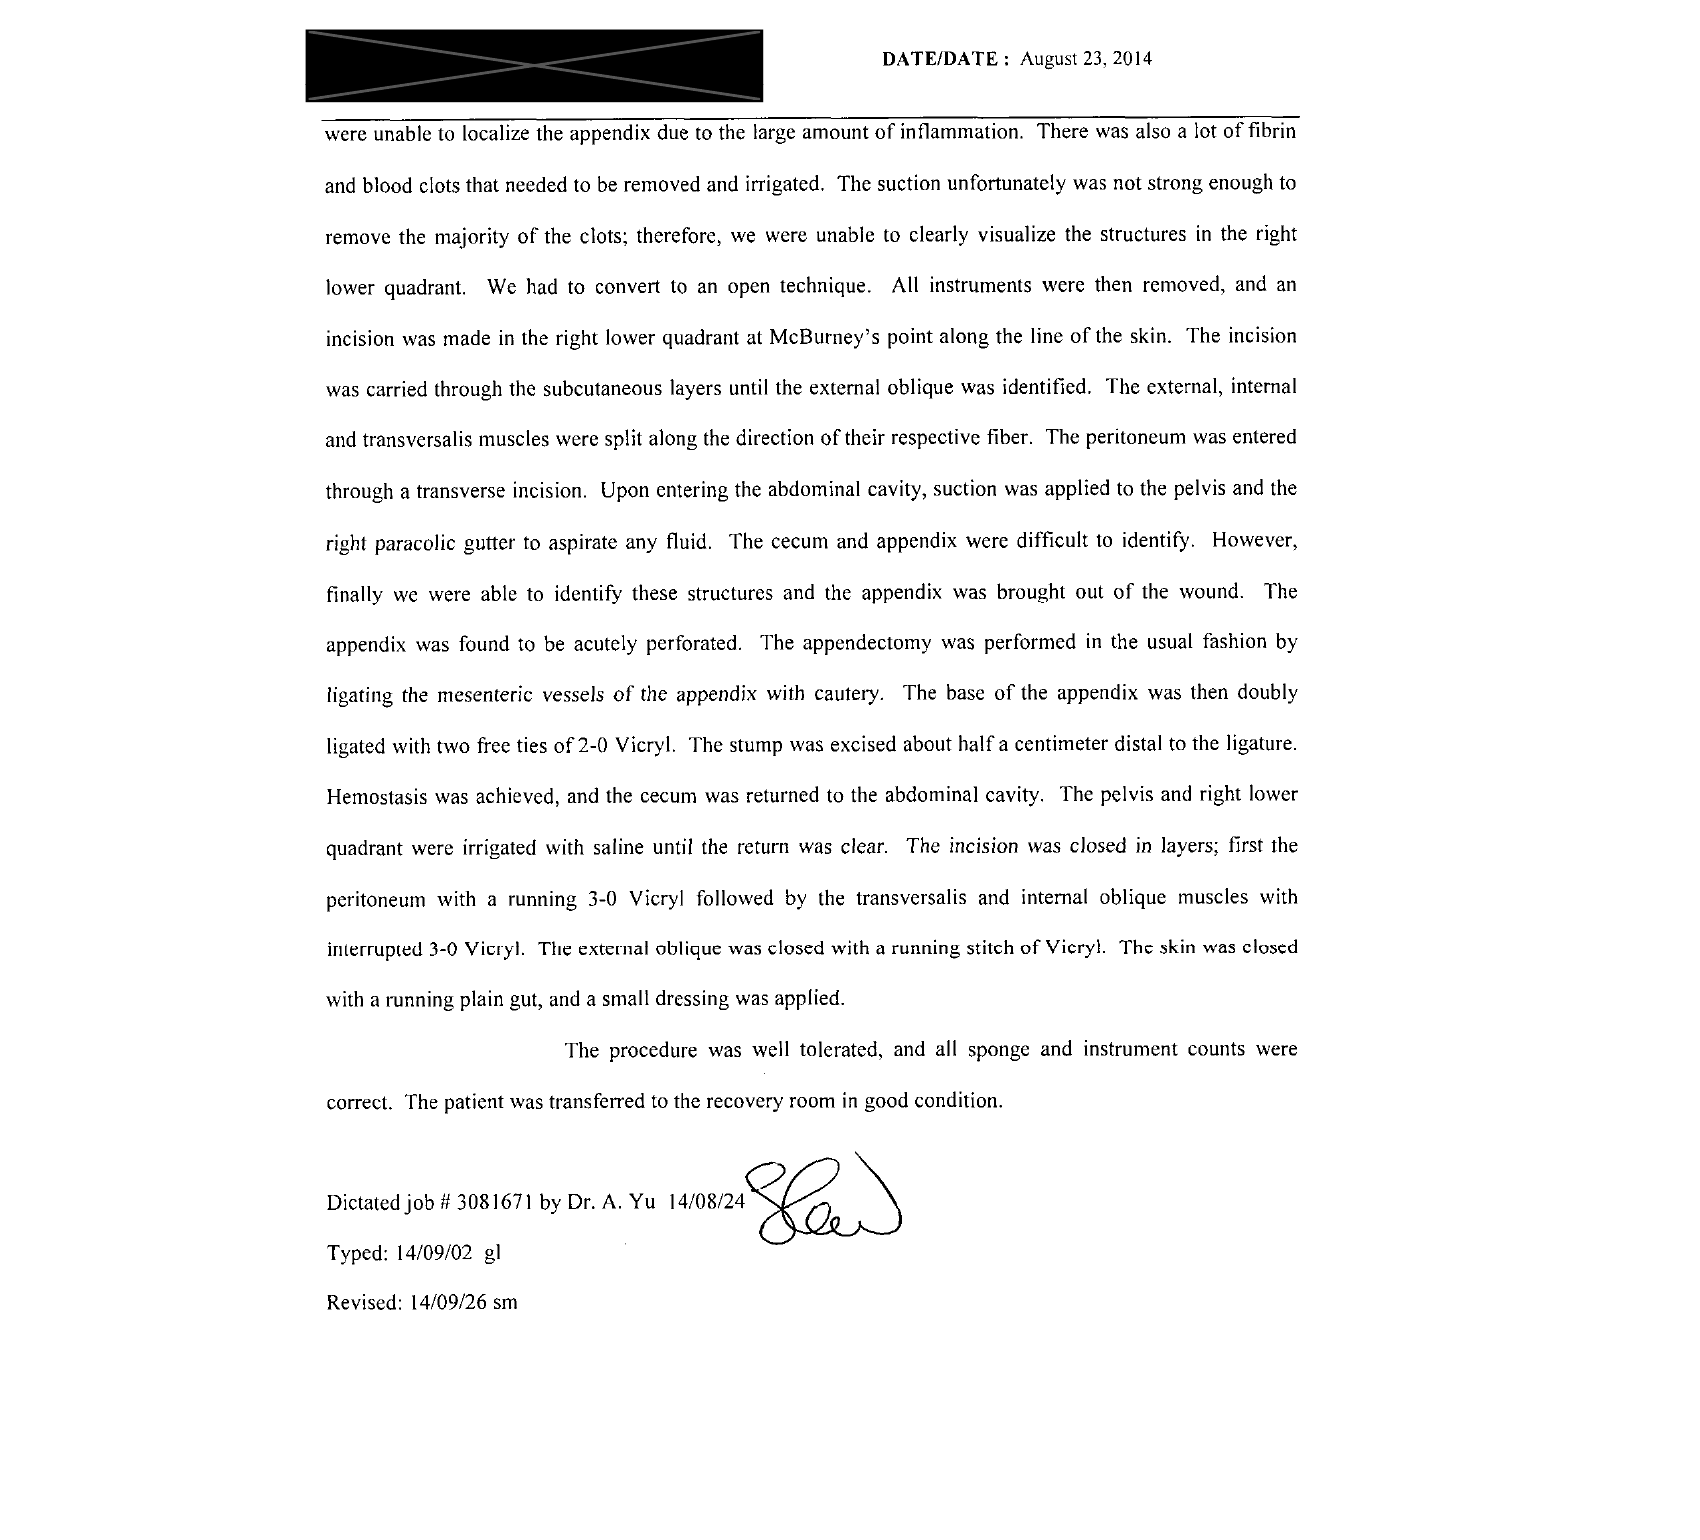

Cropping 106 O_1.png


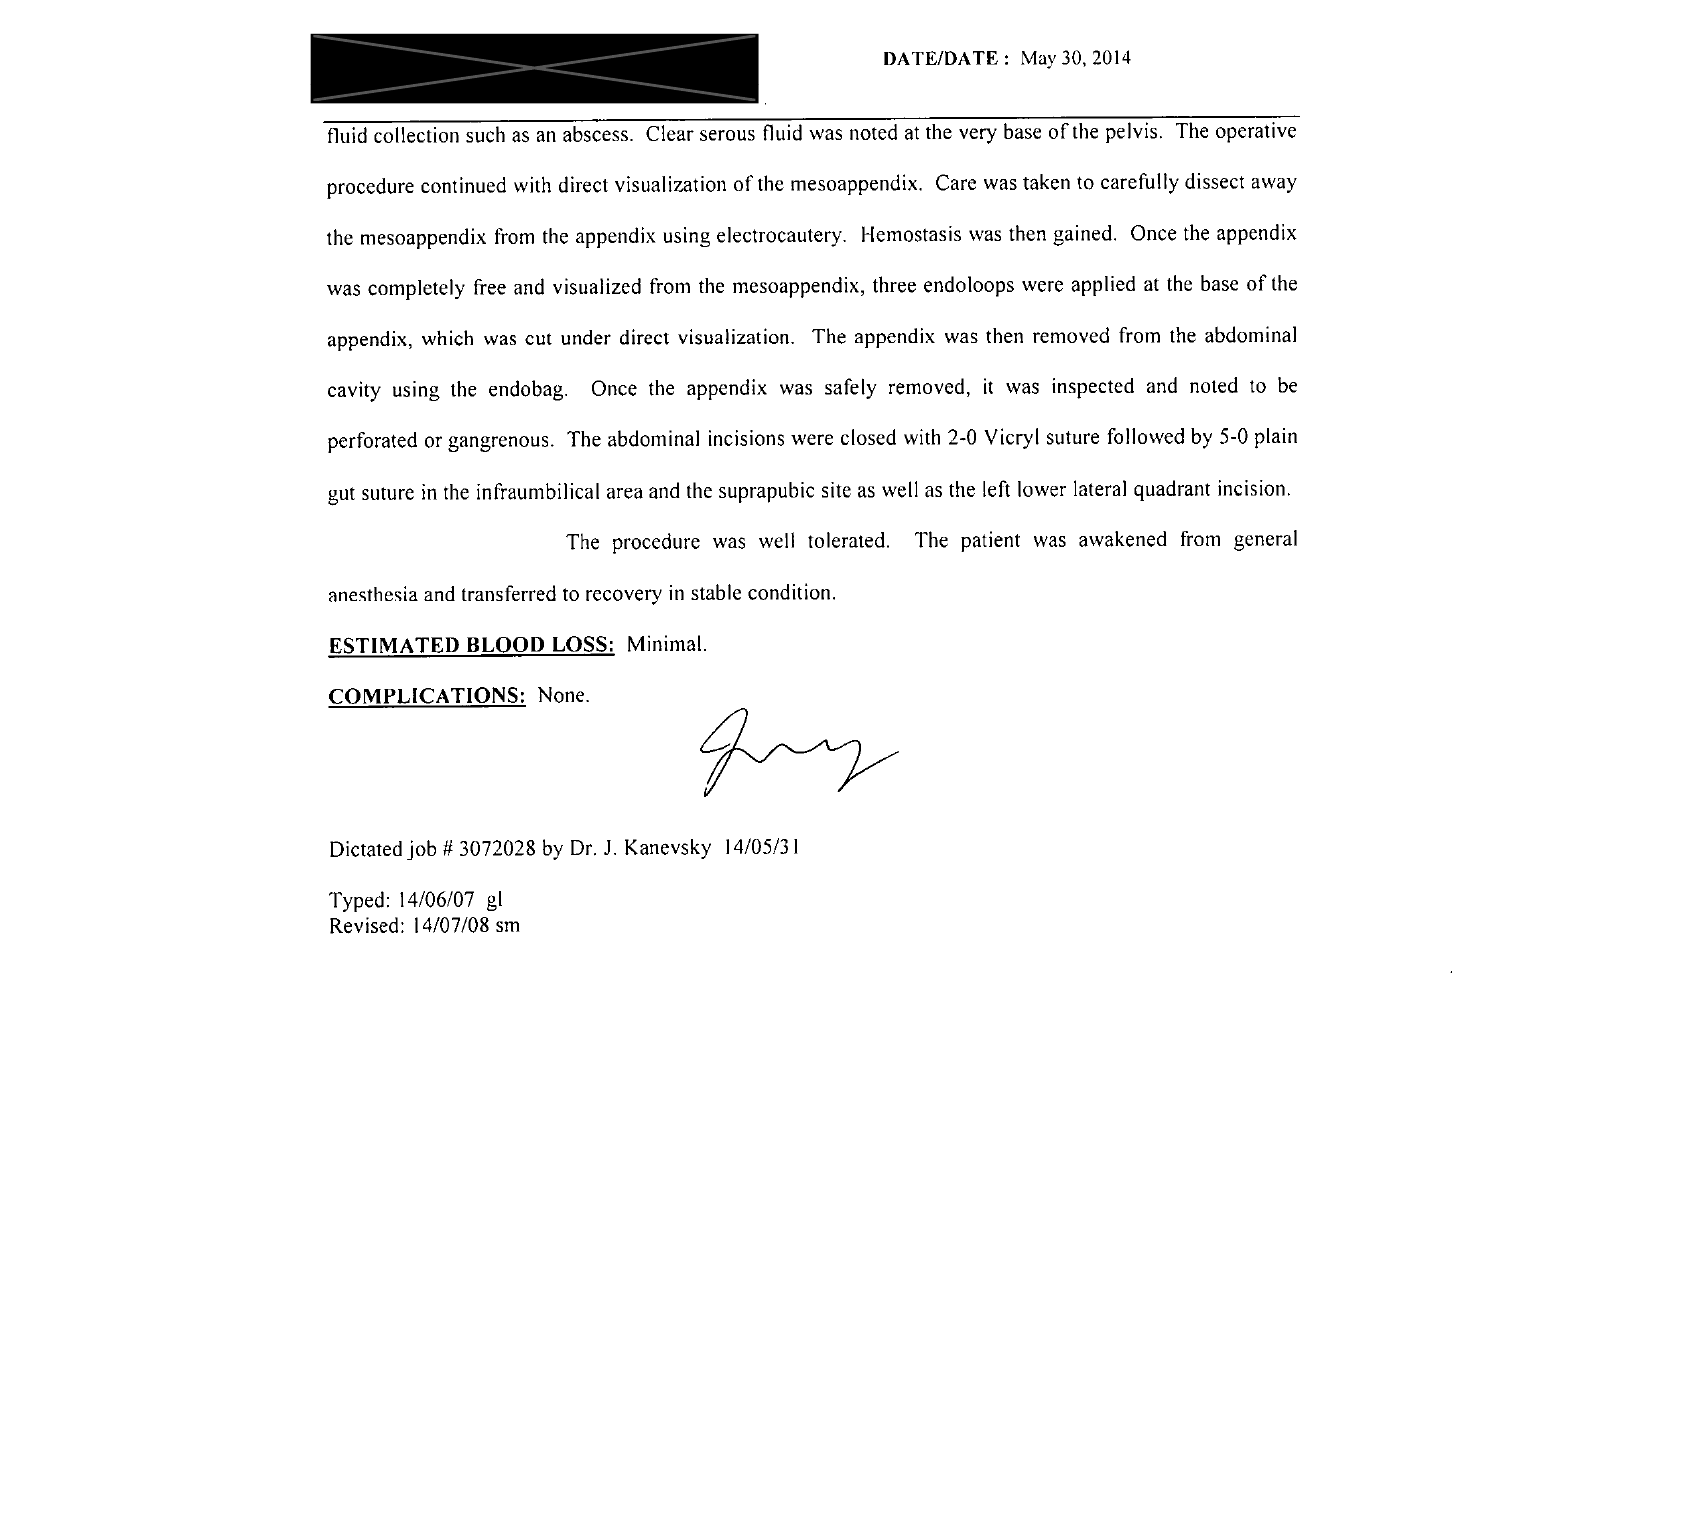

Cropping 121 O_1.png


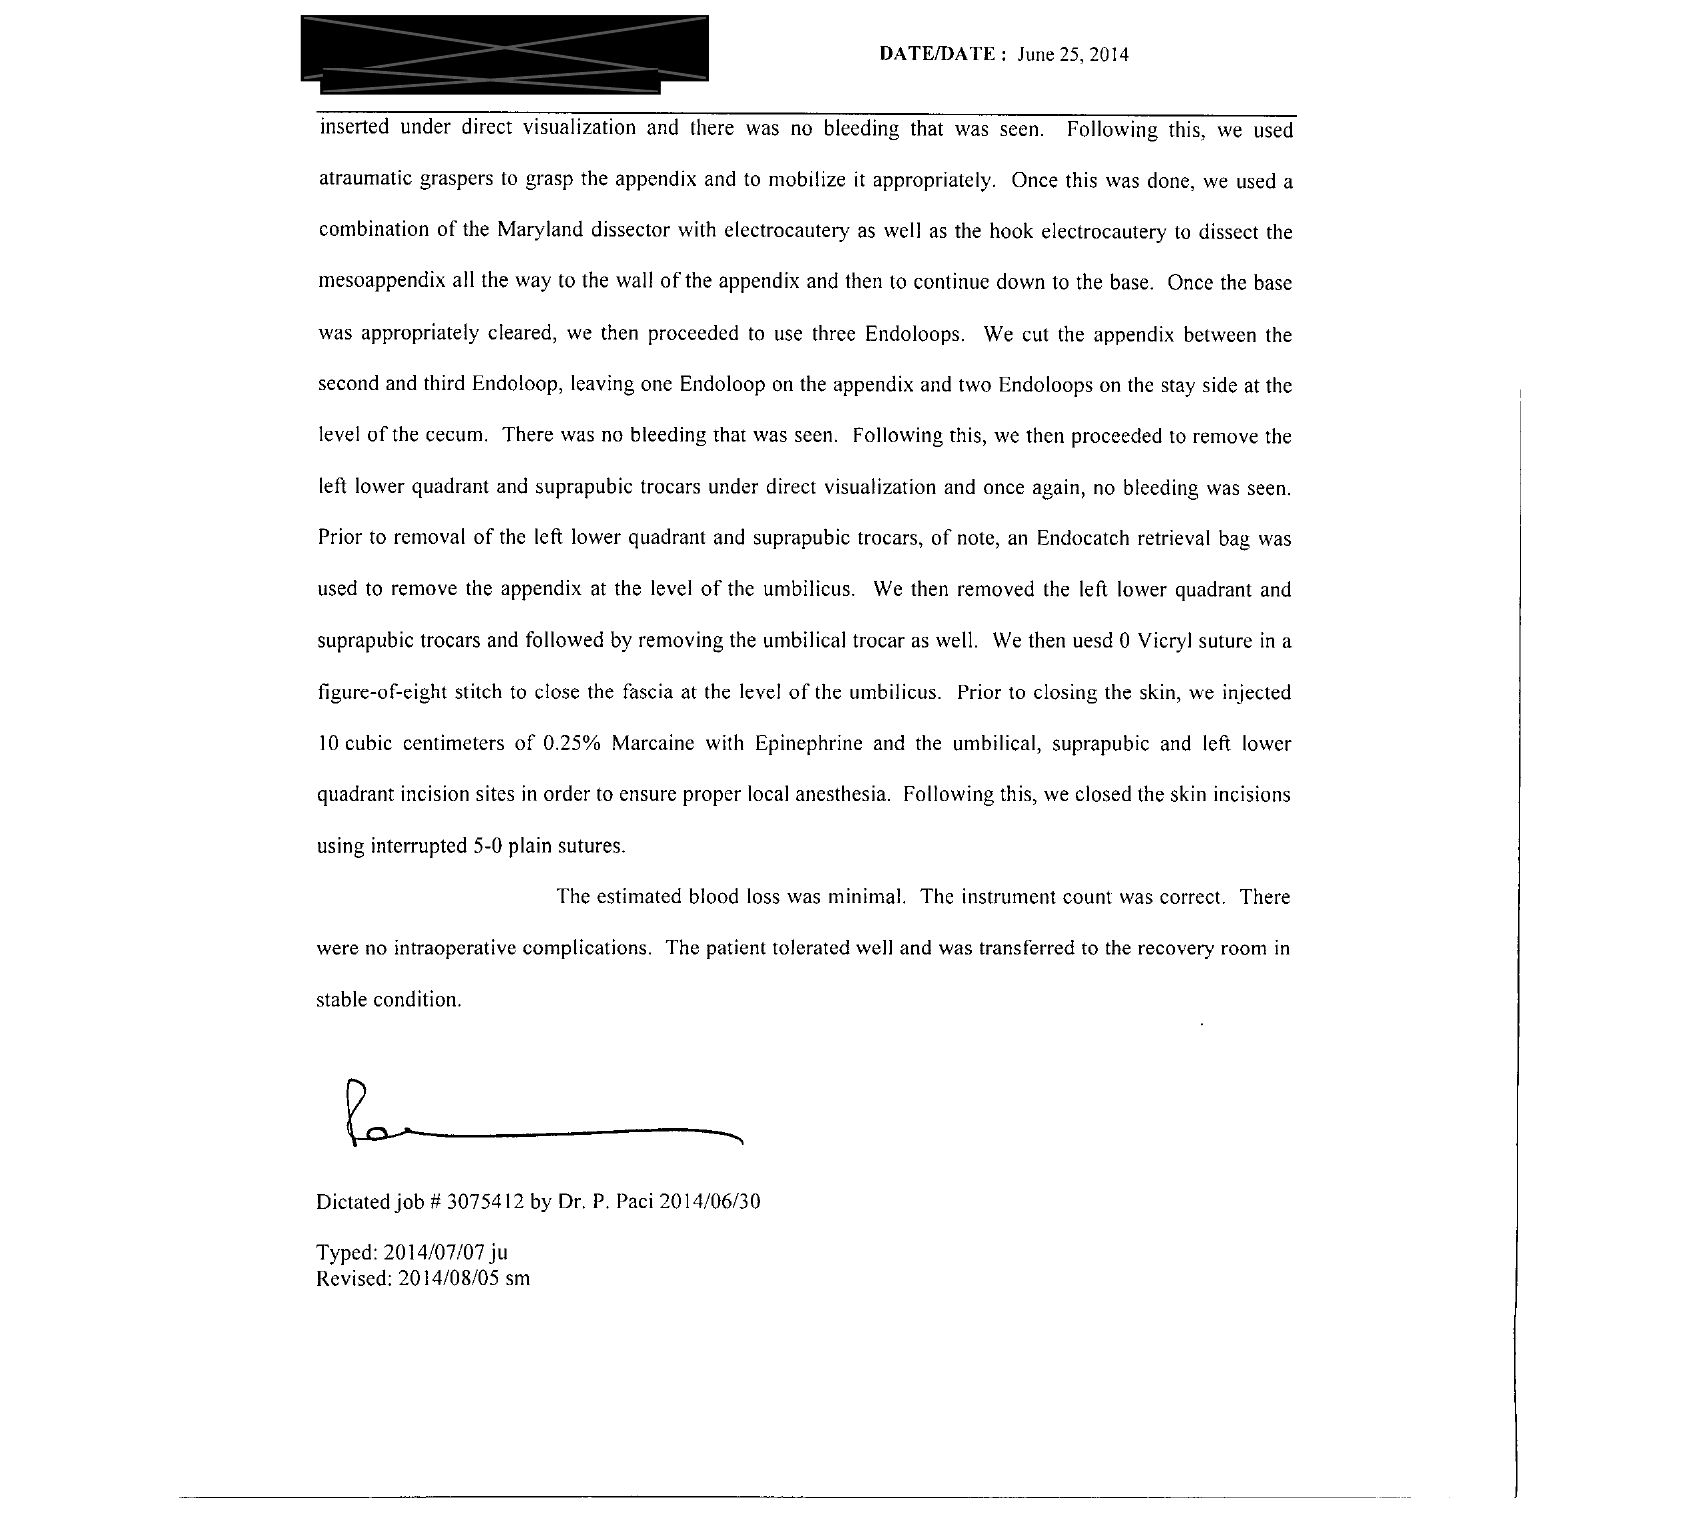

Cropping 102 O_1.png


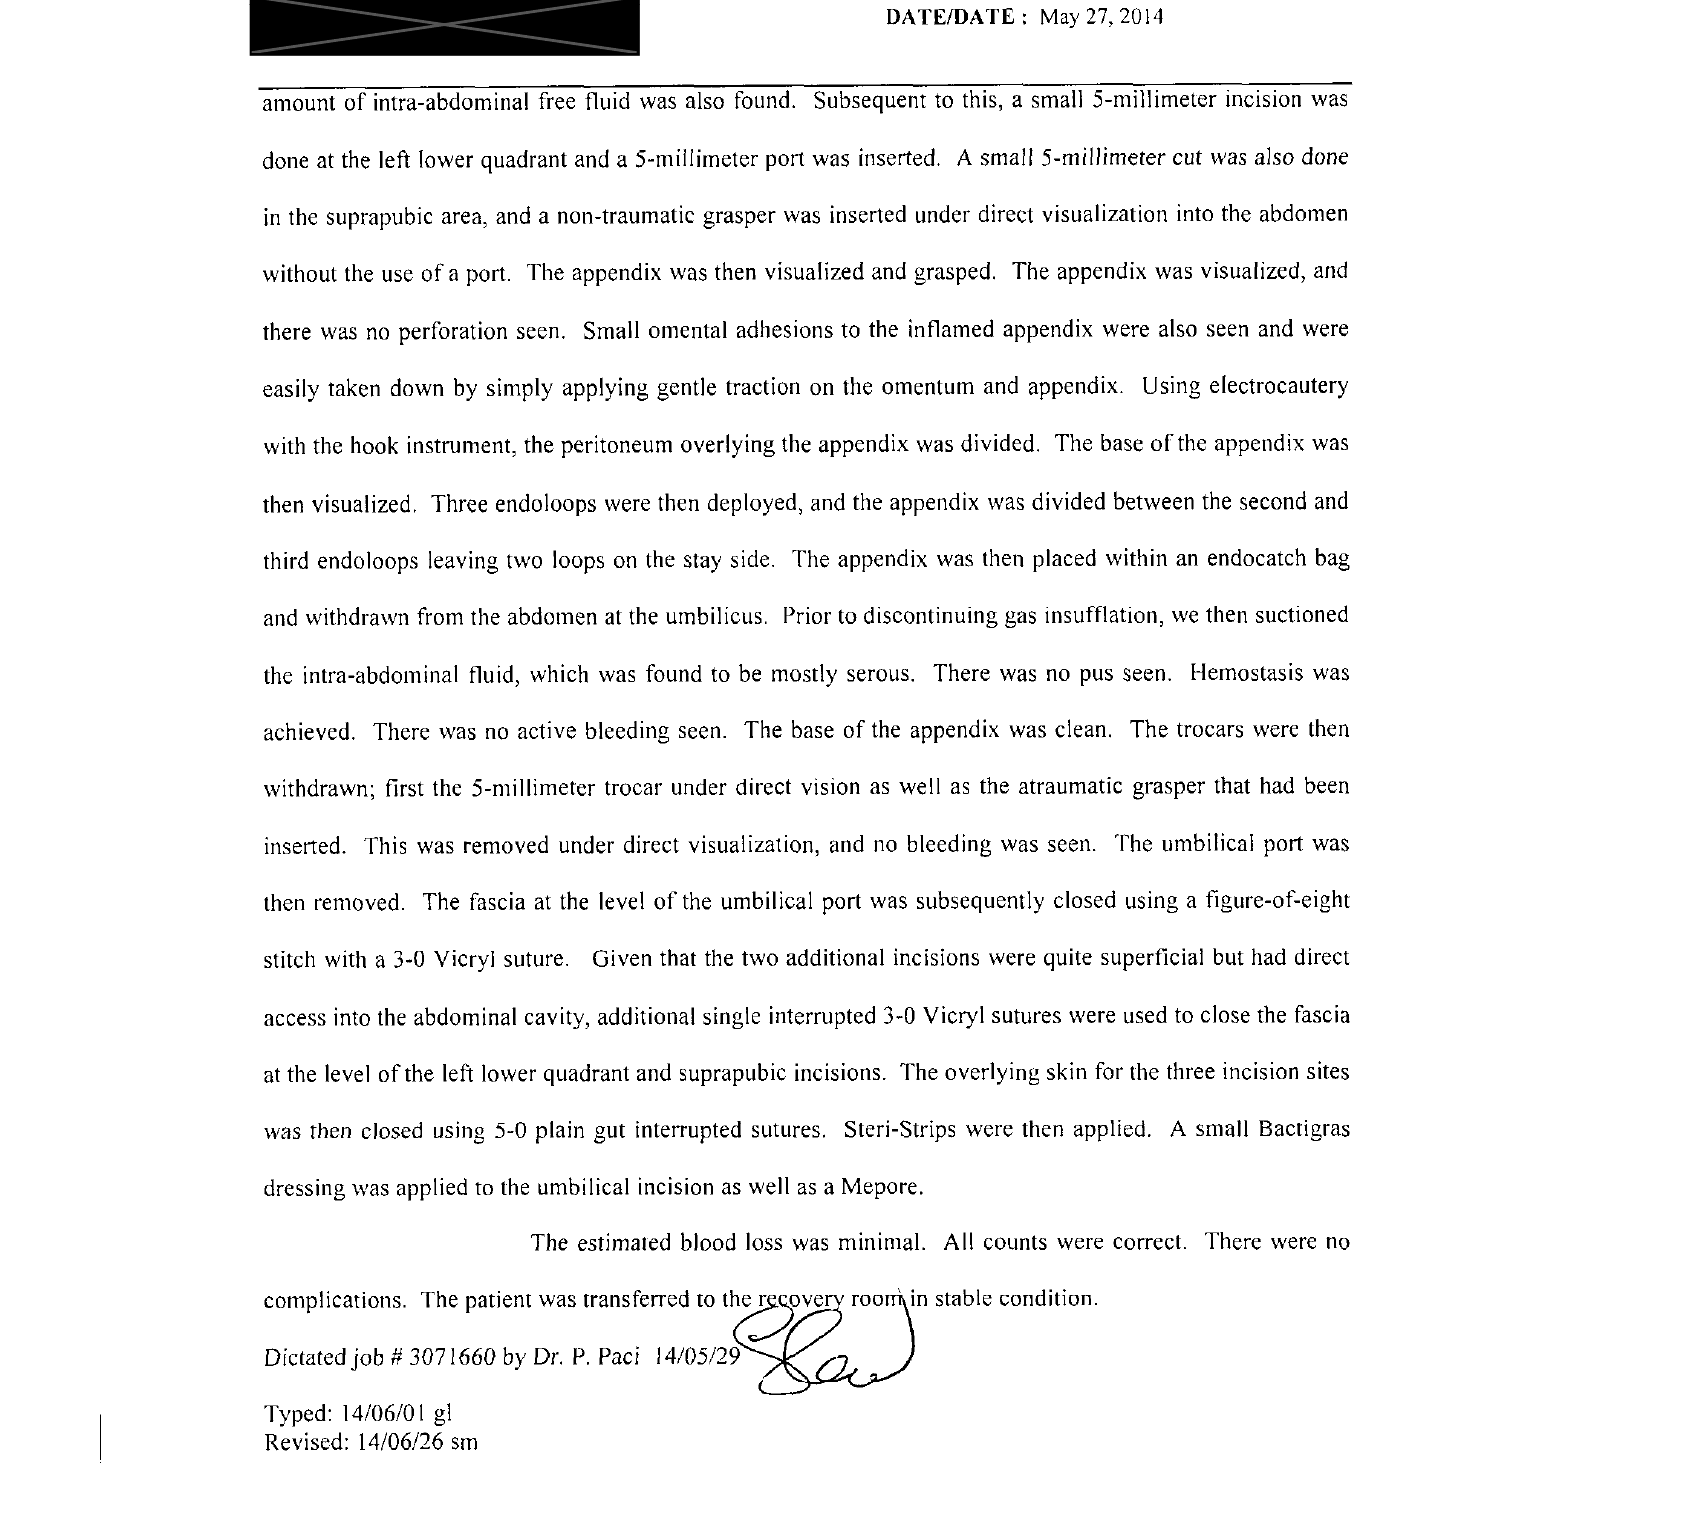

Cropping 58 O_1.png


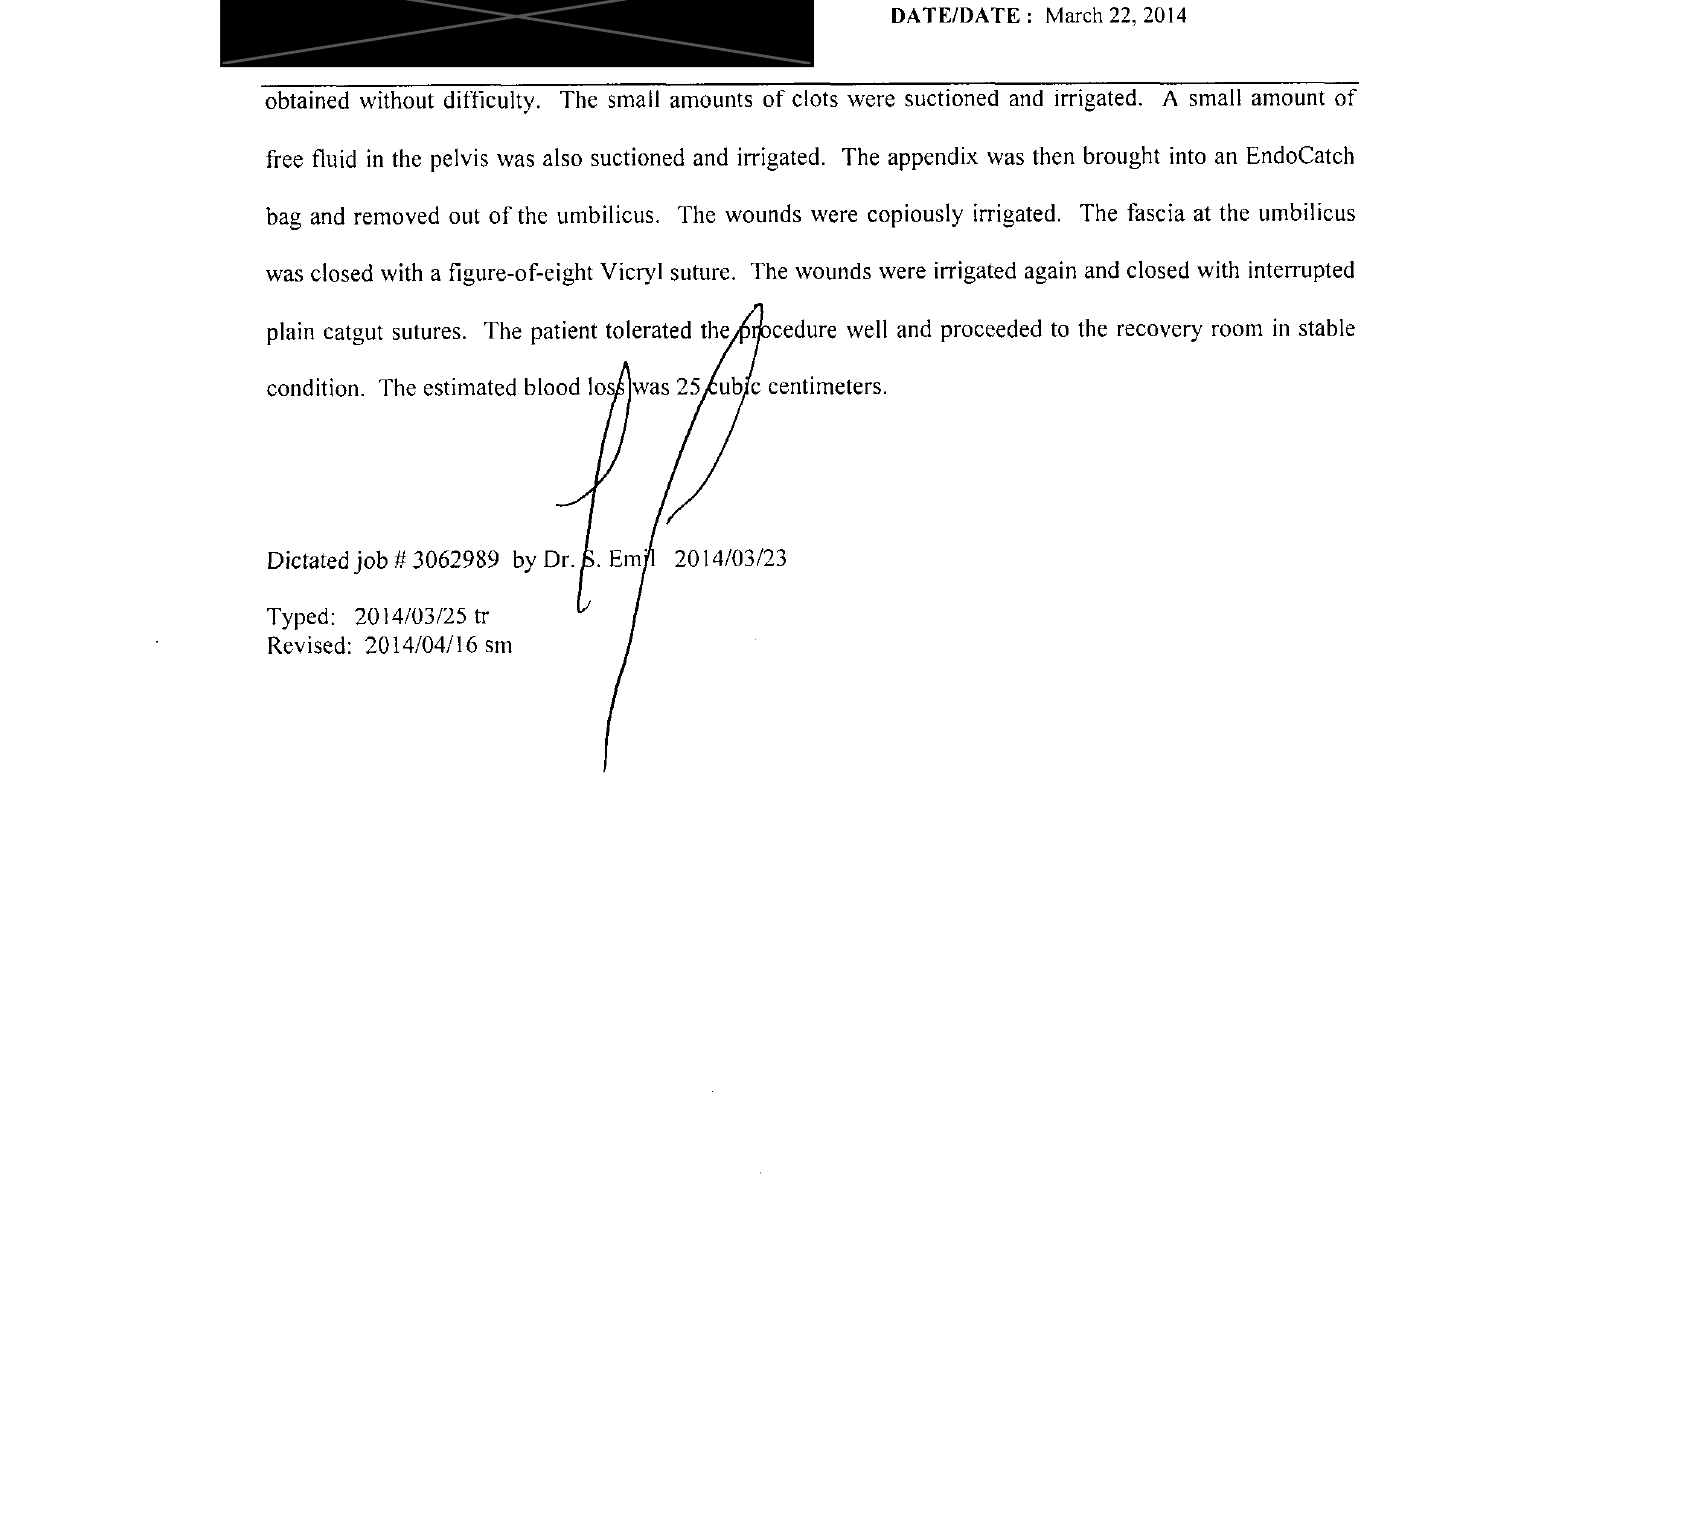

Cropping 62 O_1.png


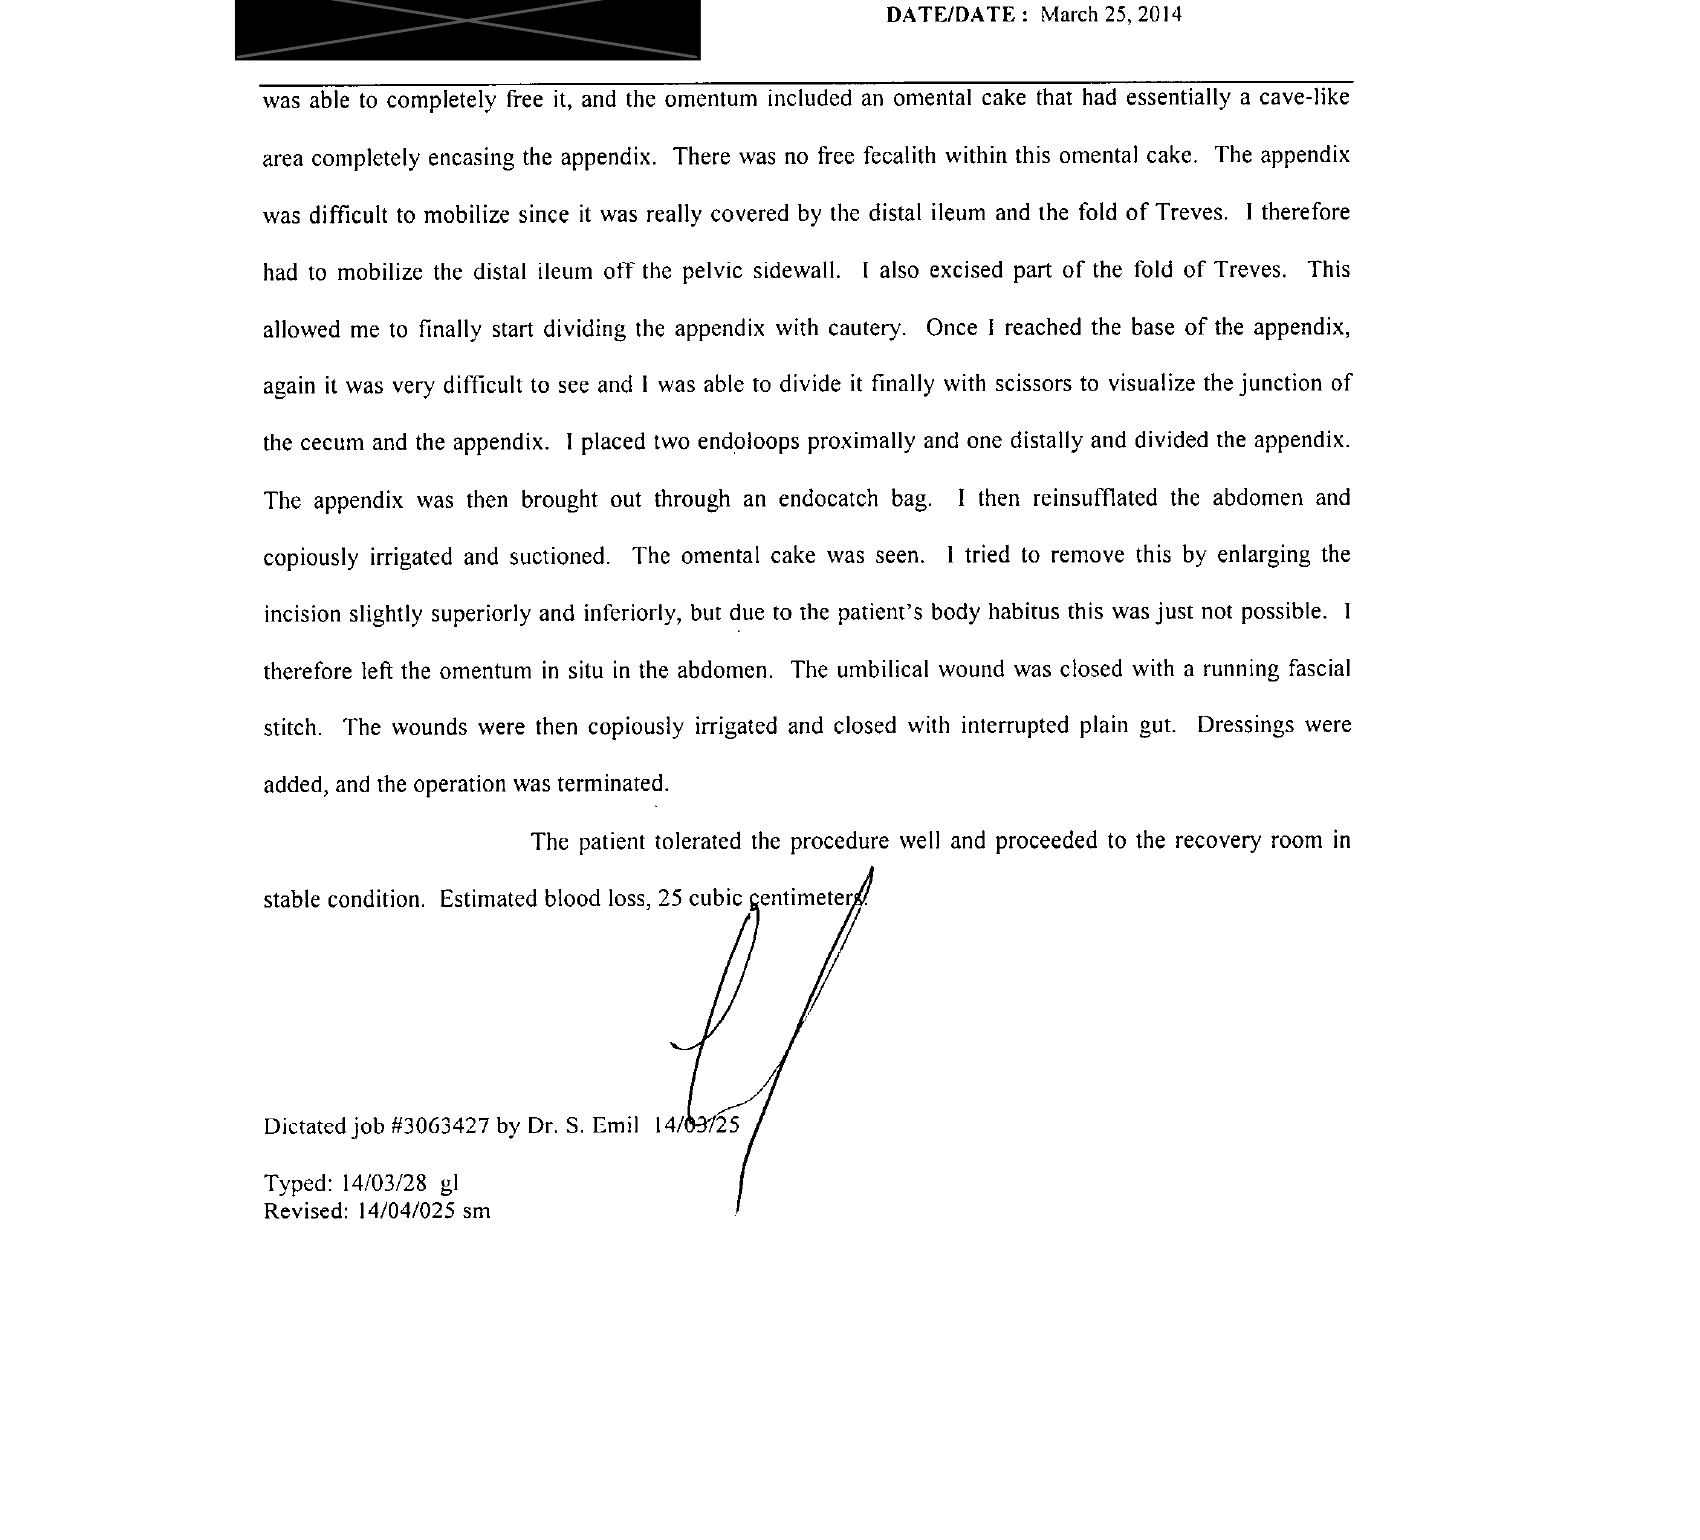

Cropping 55 O_1.png


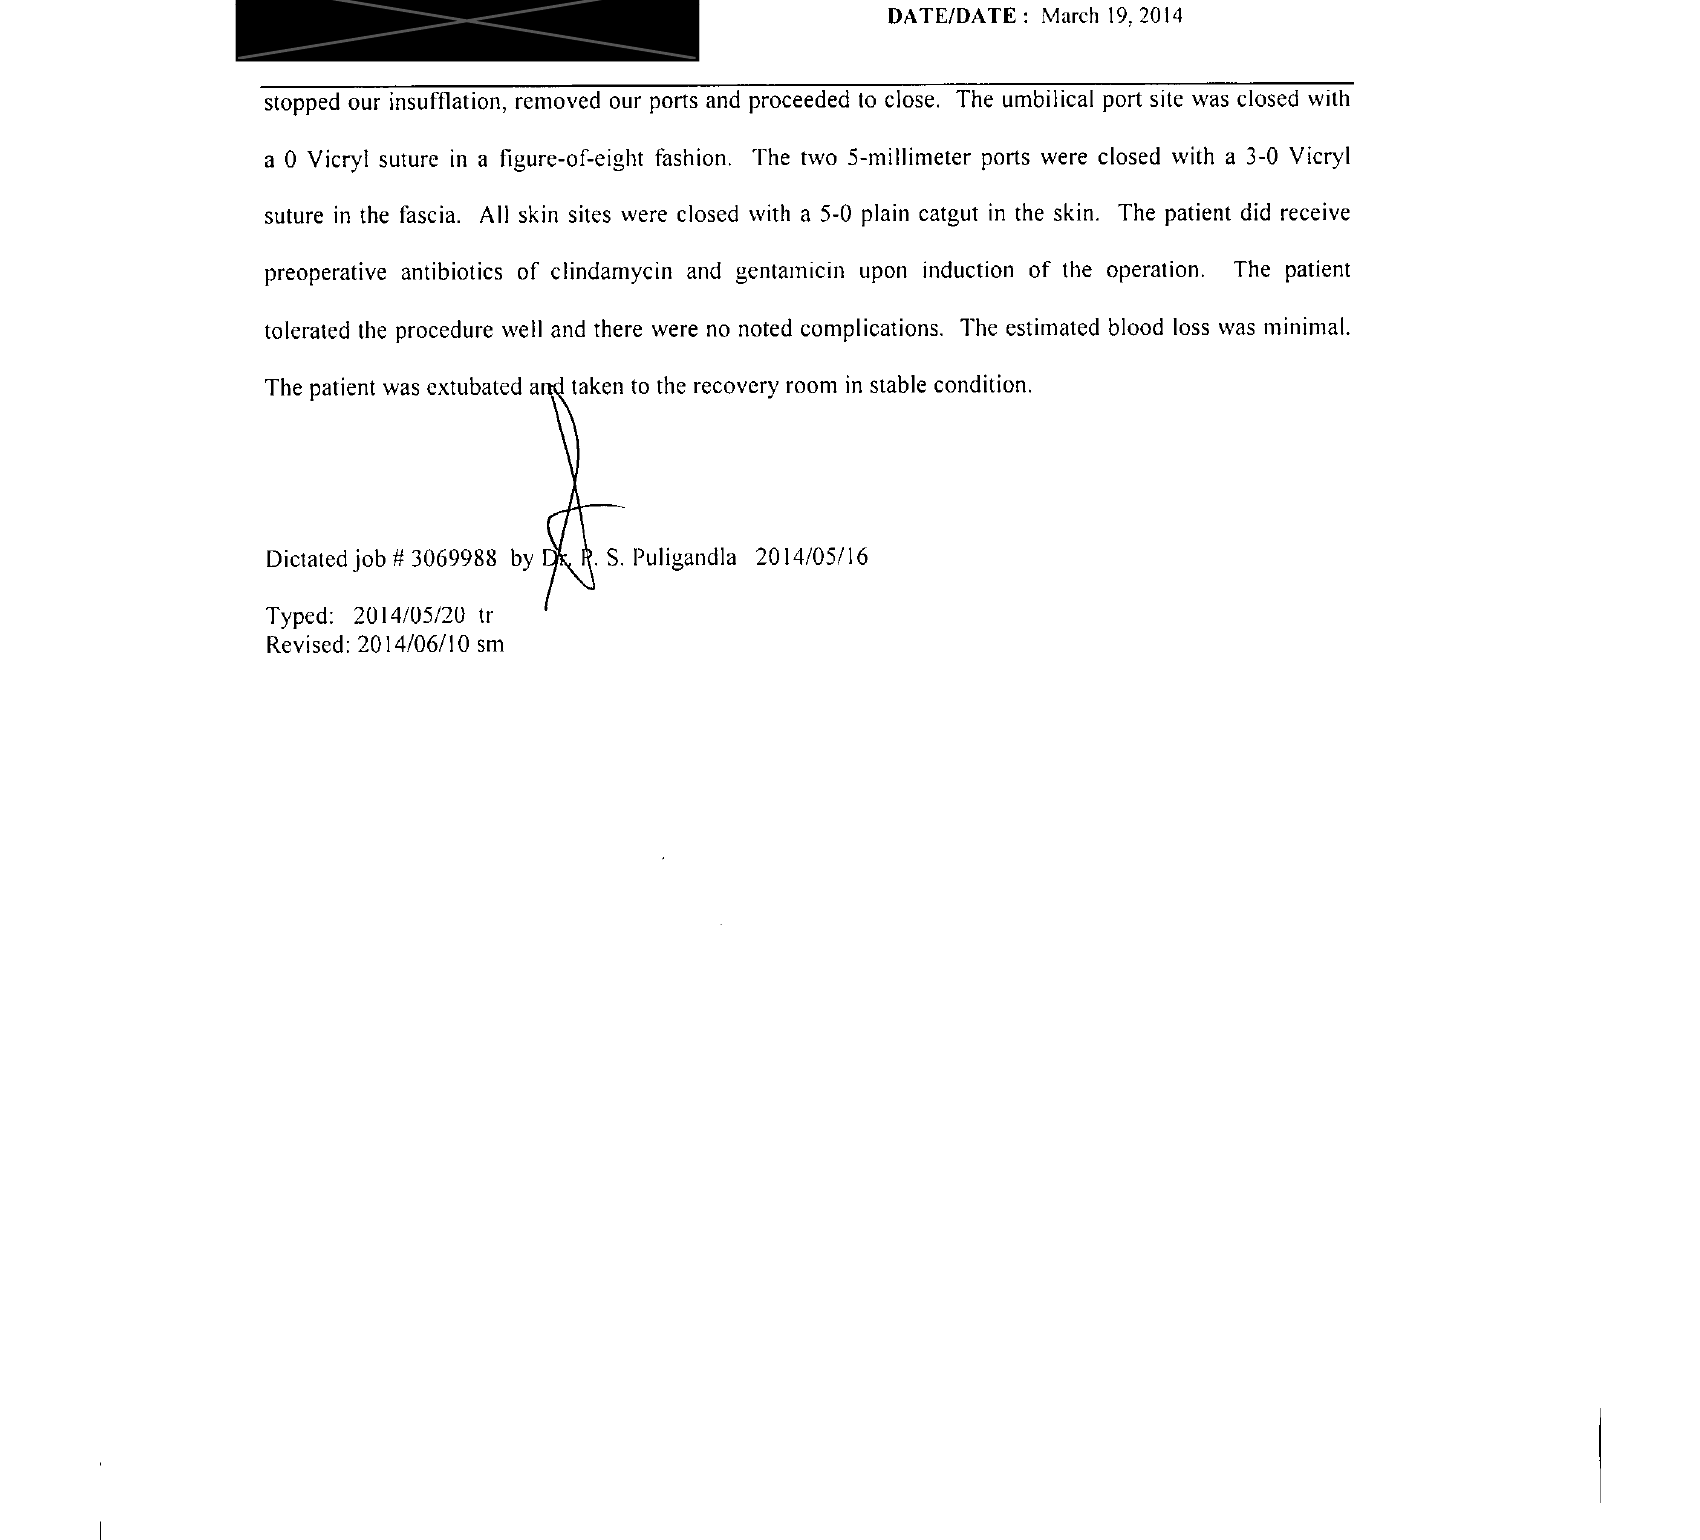

Cropping 147 O_1.png


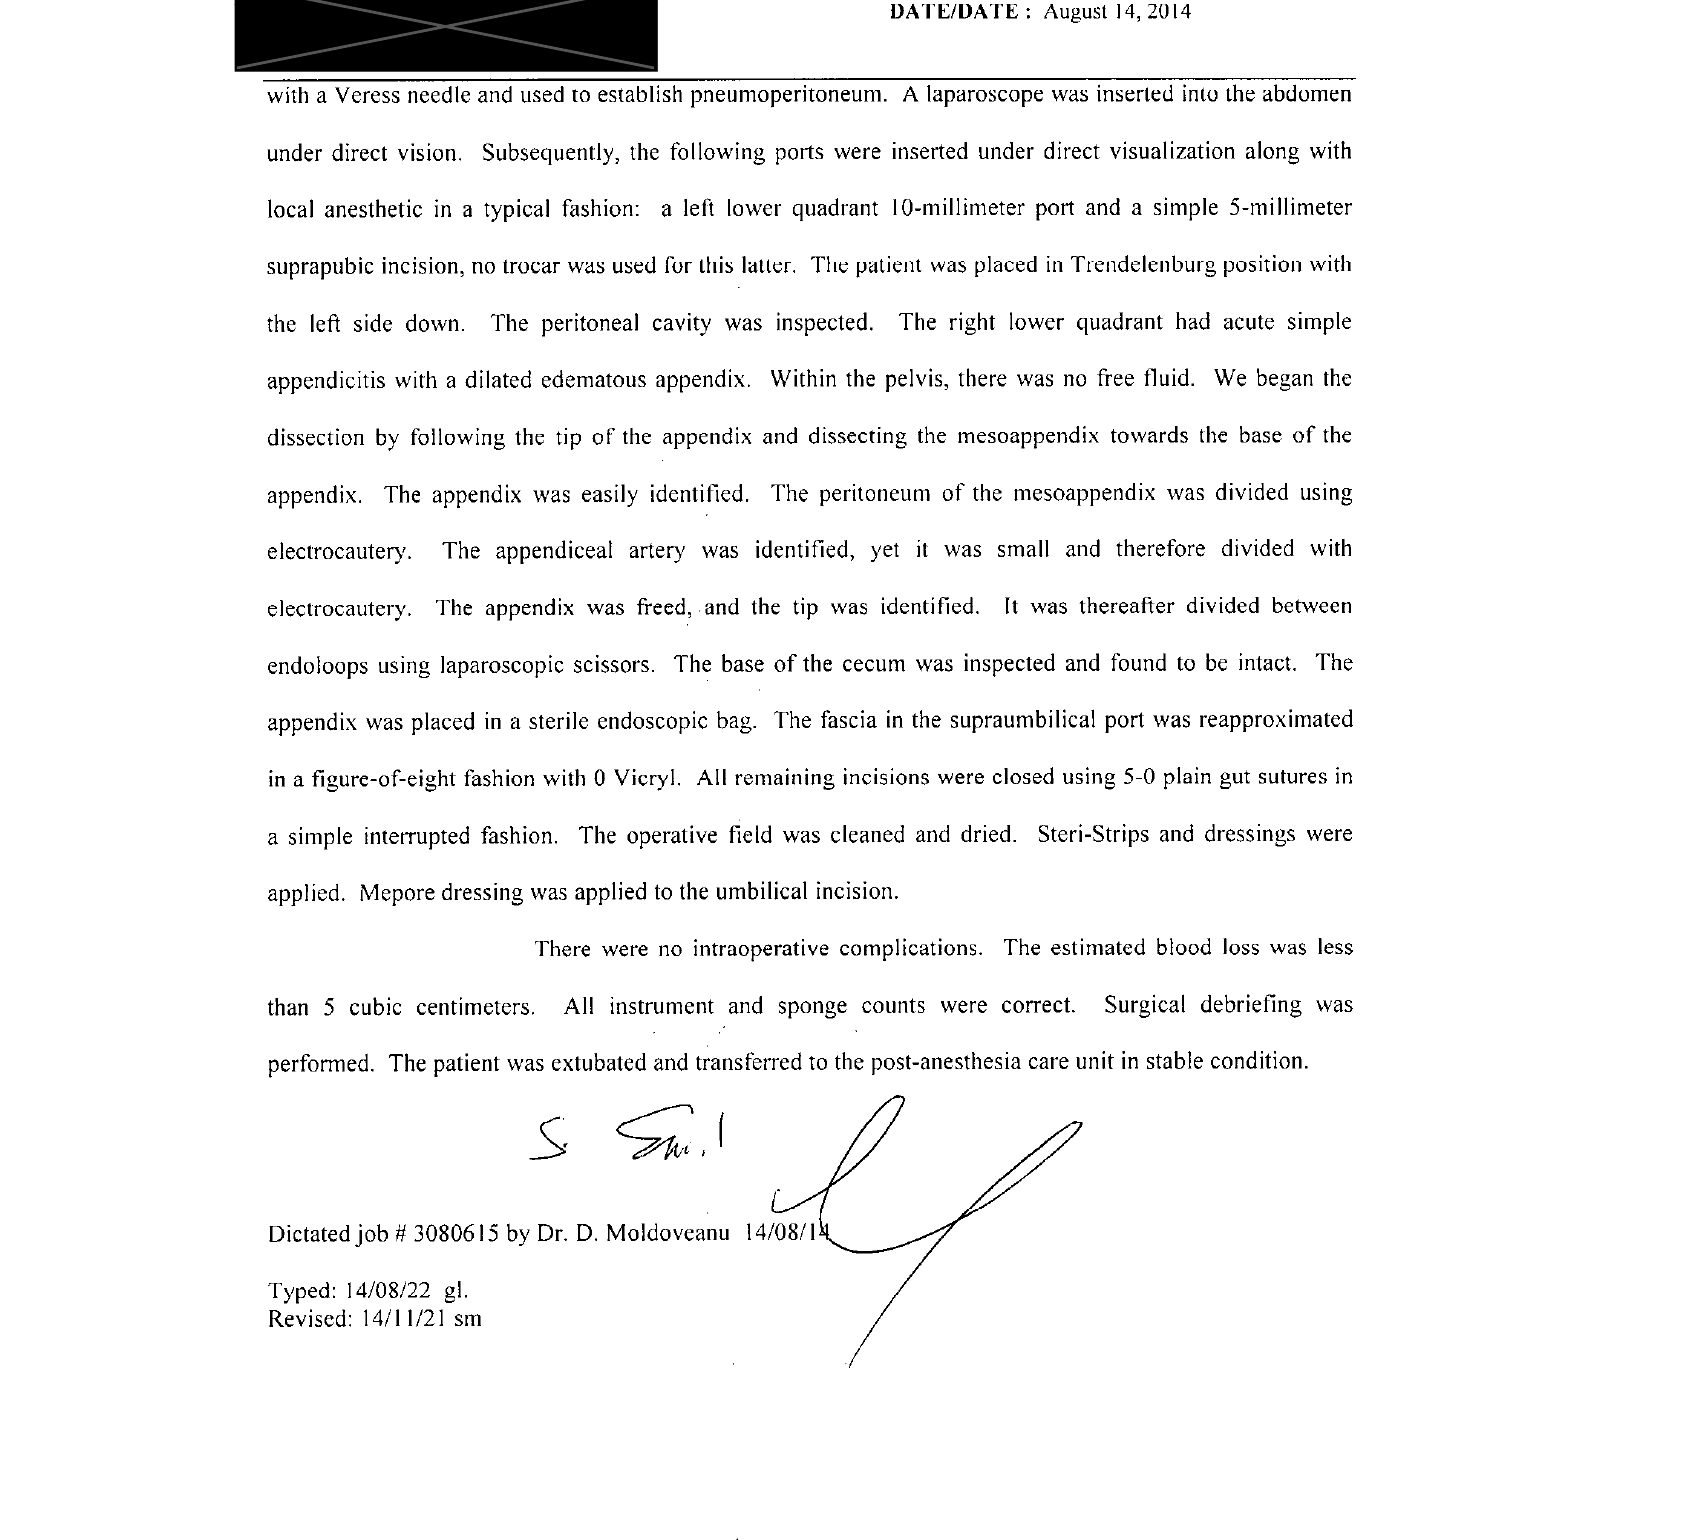

Cropping 56 O_1.png


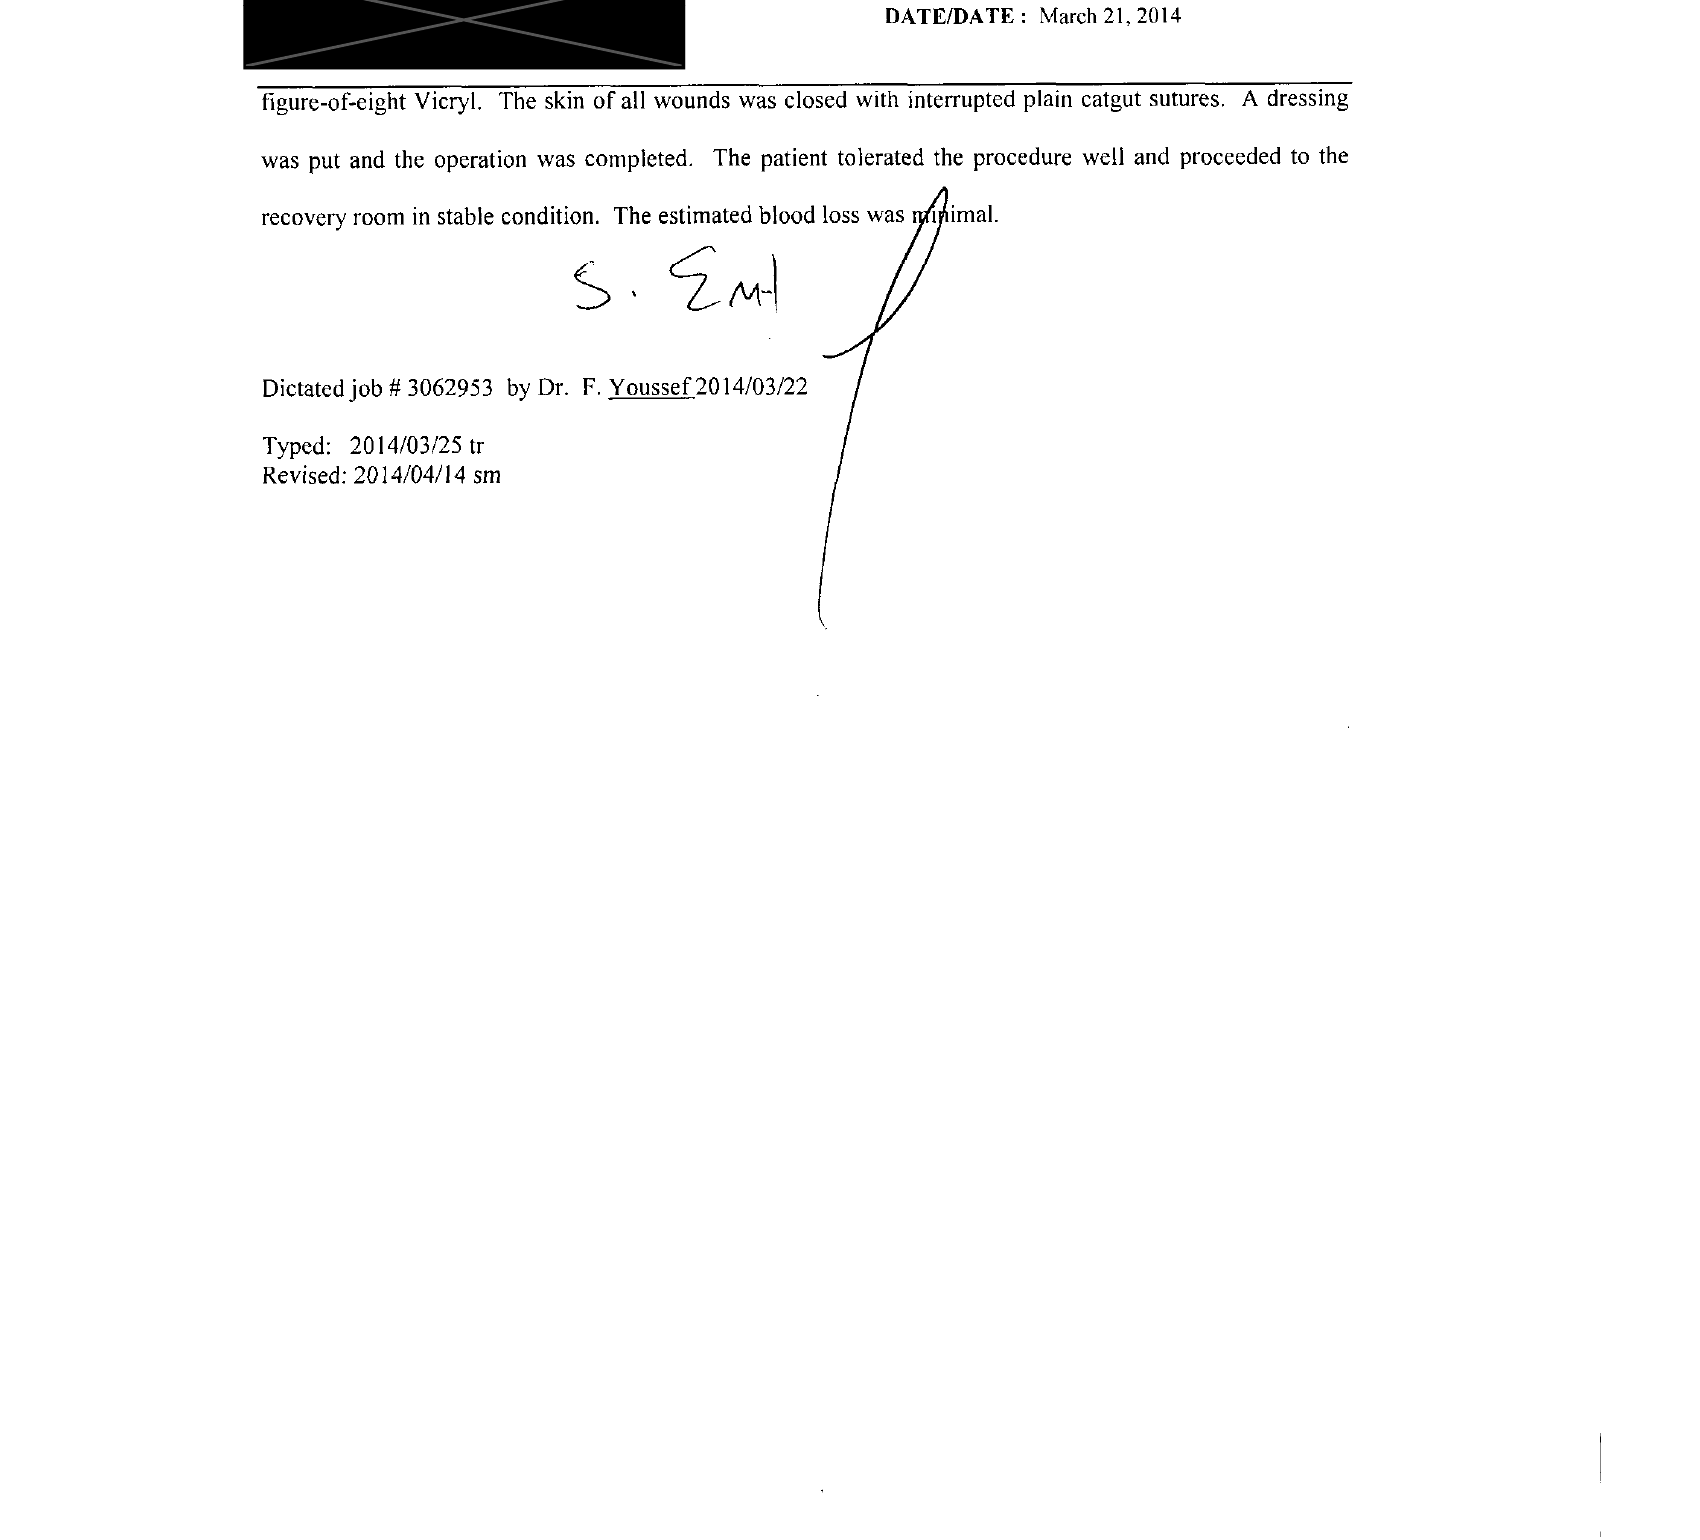

Cropping 155 O_1.png


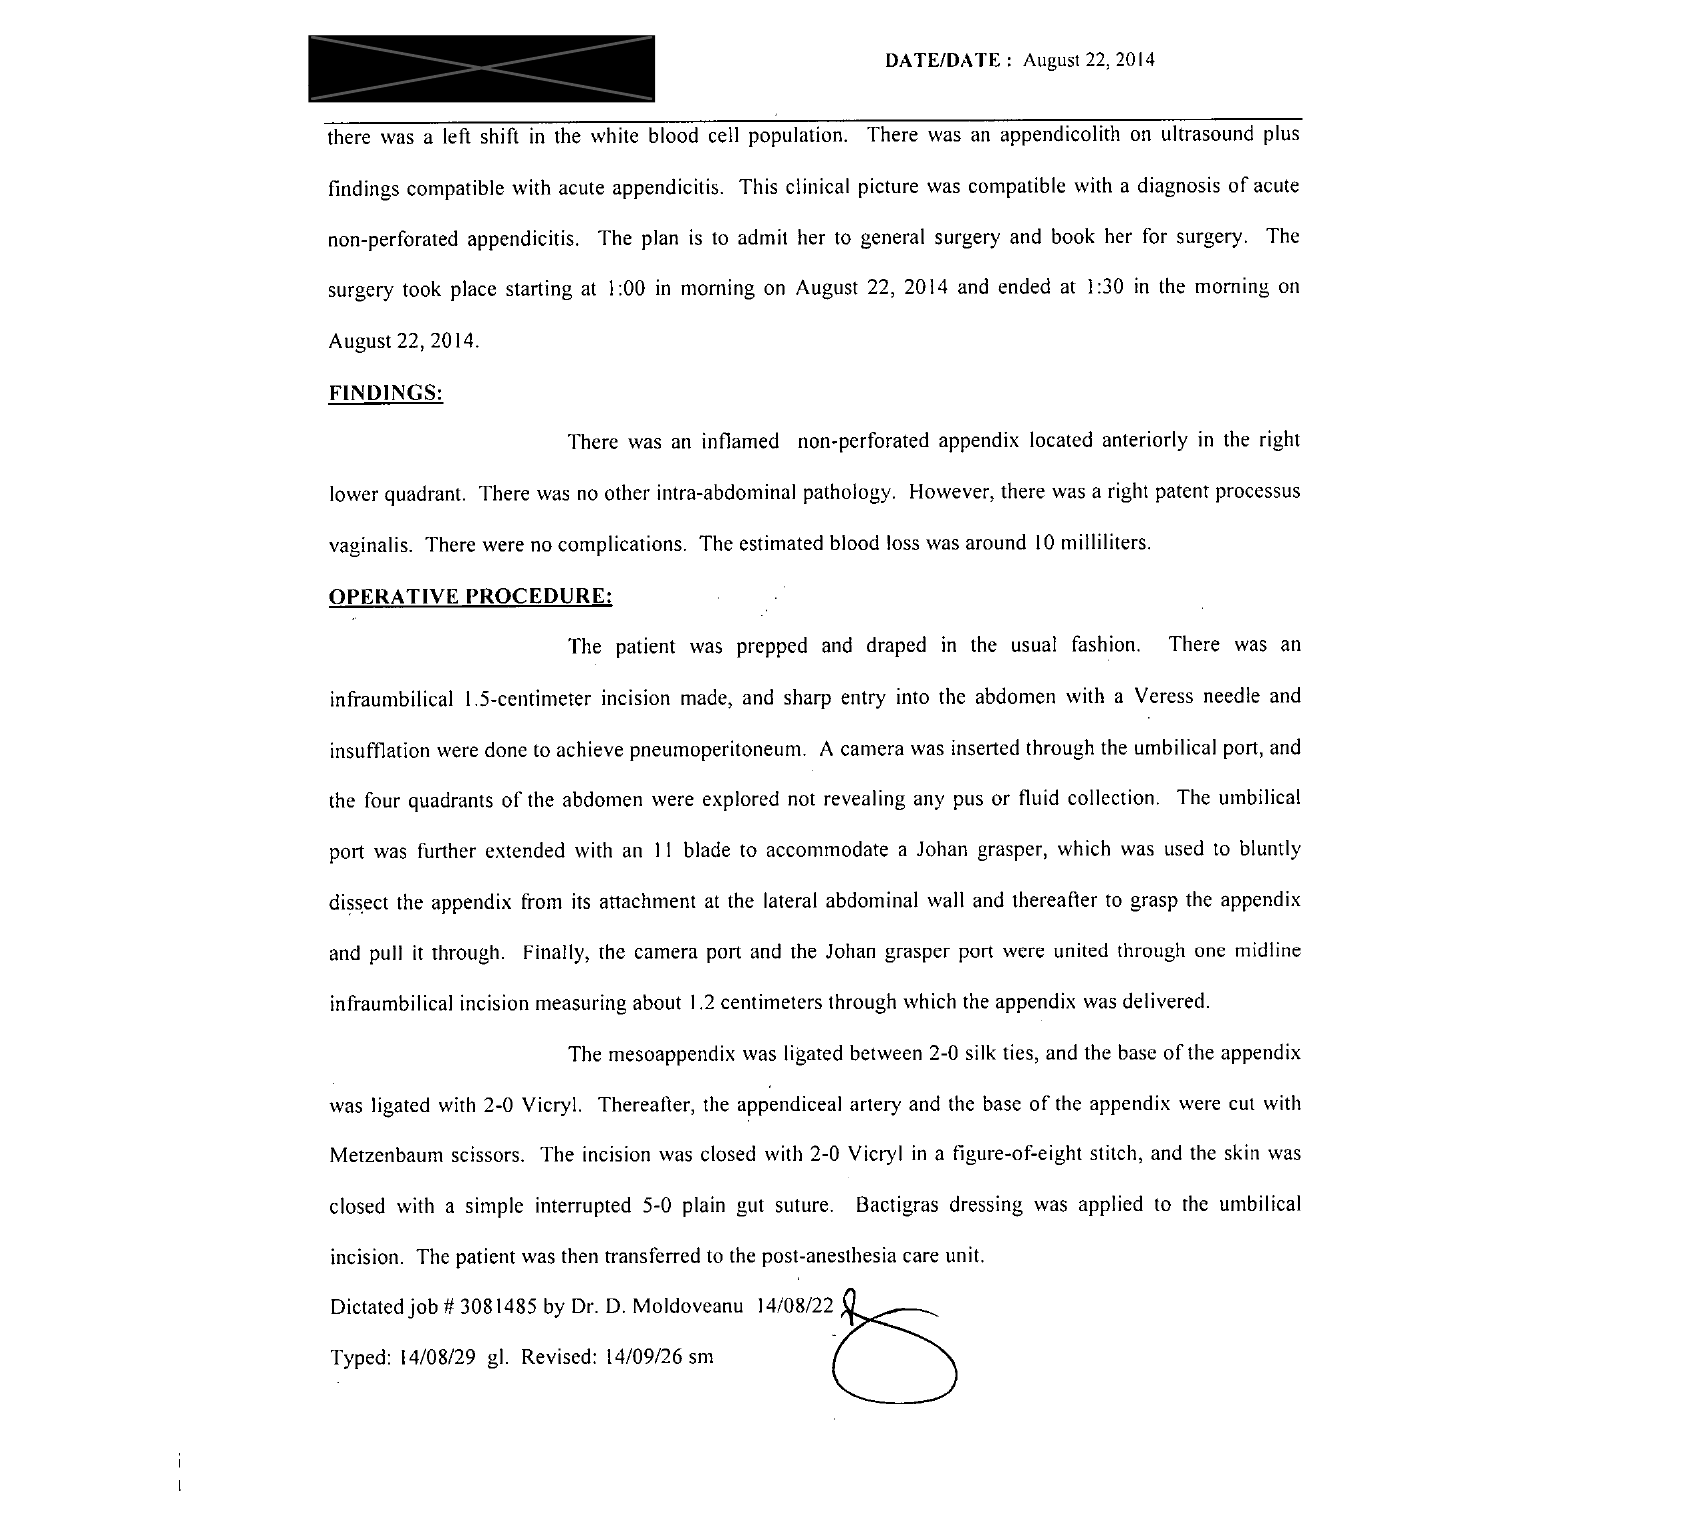

Cropping 113 O_1.png


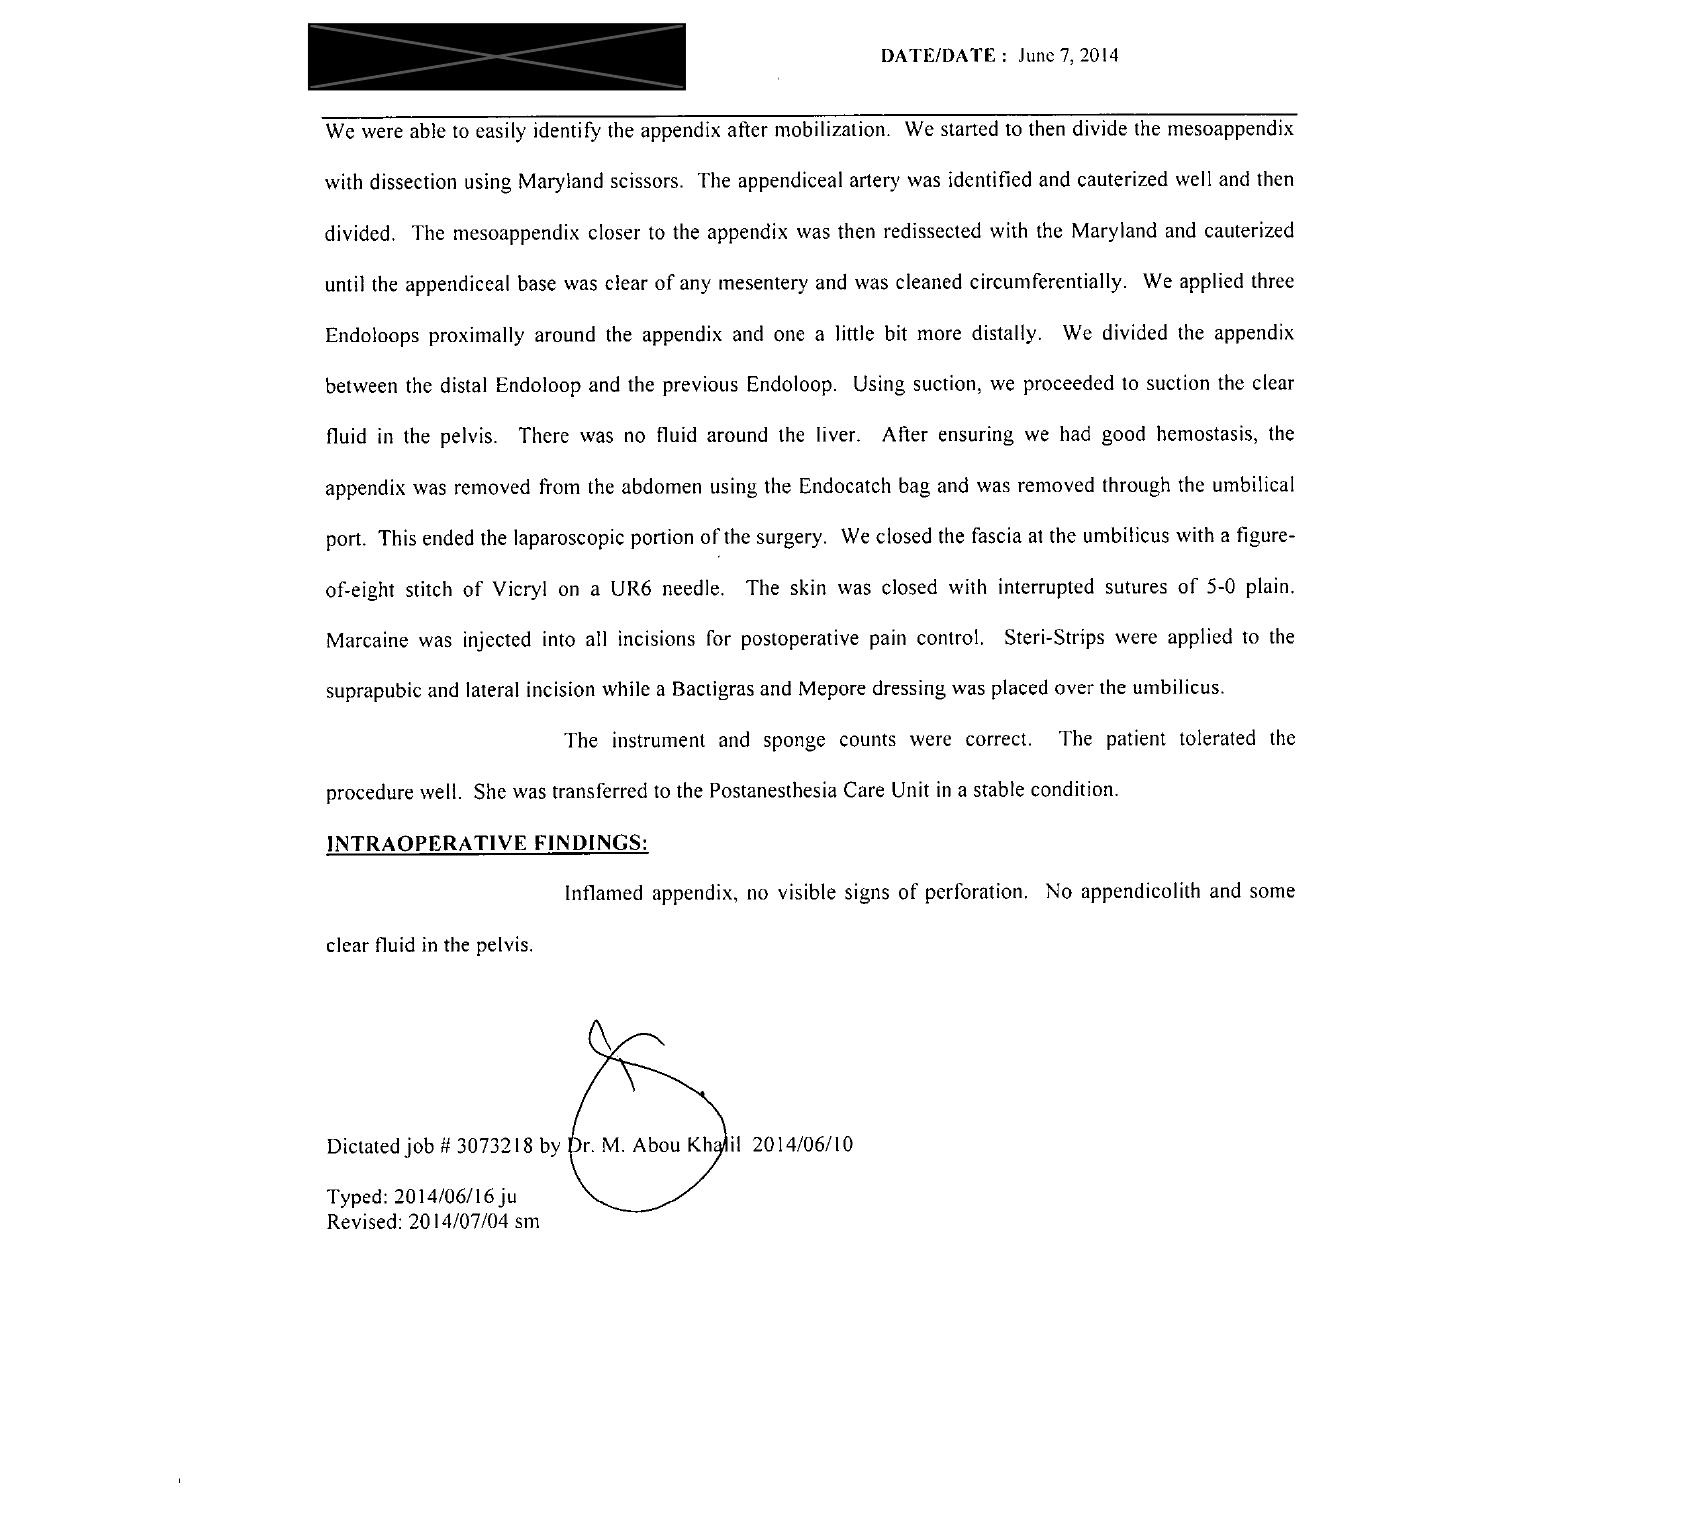

Cropping 122 O_1.png


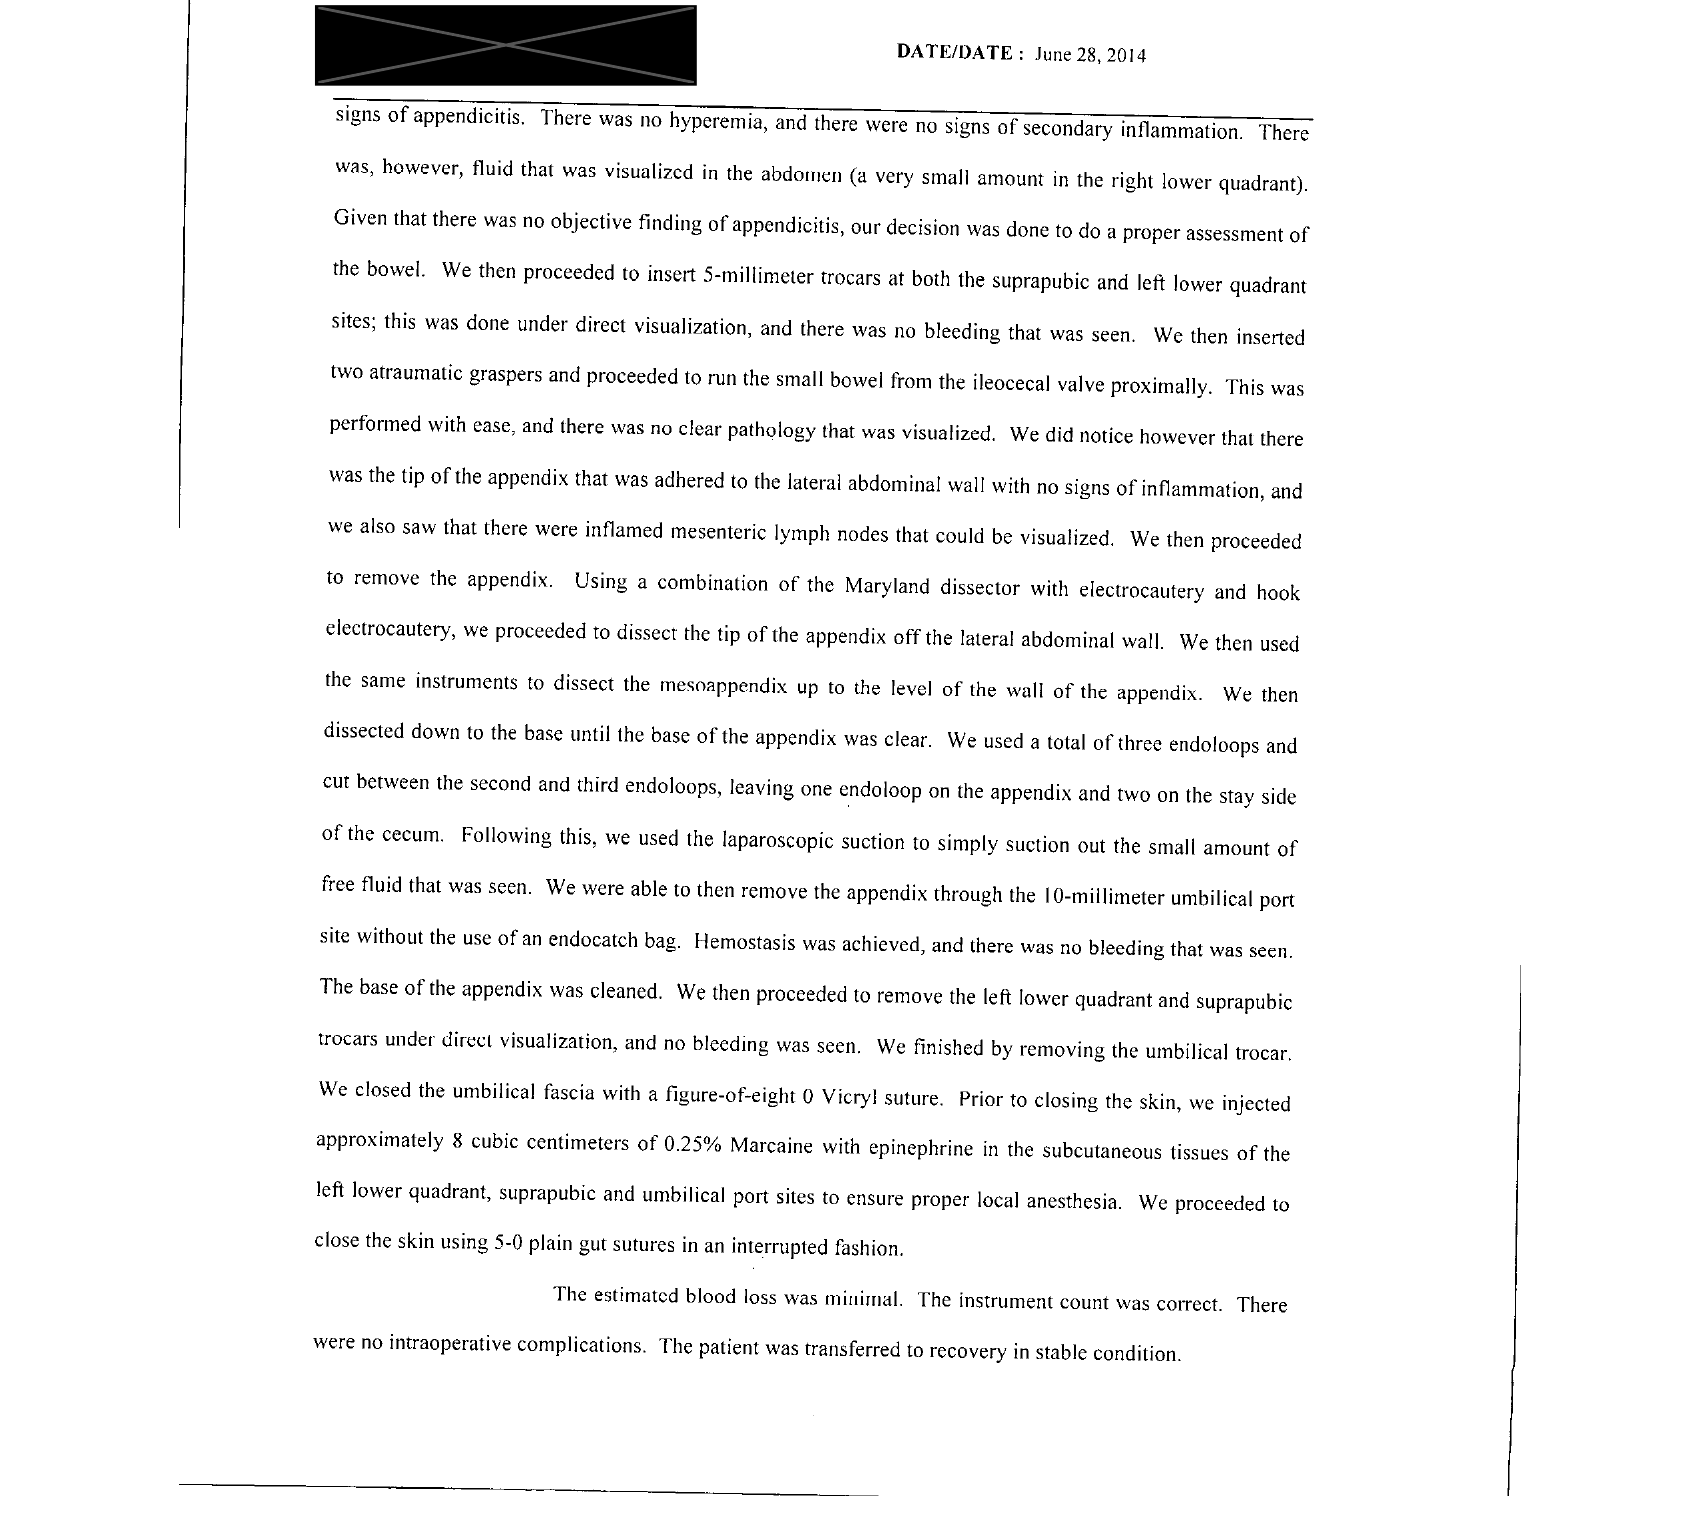

Cropping 114 O_1.png


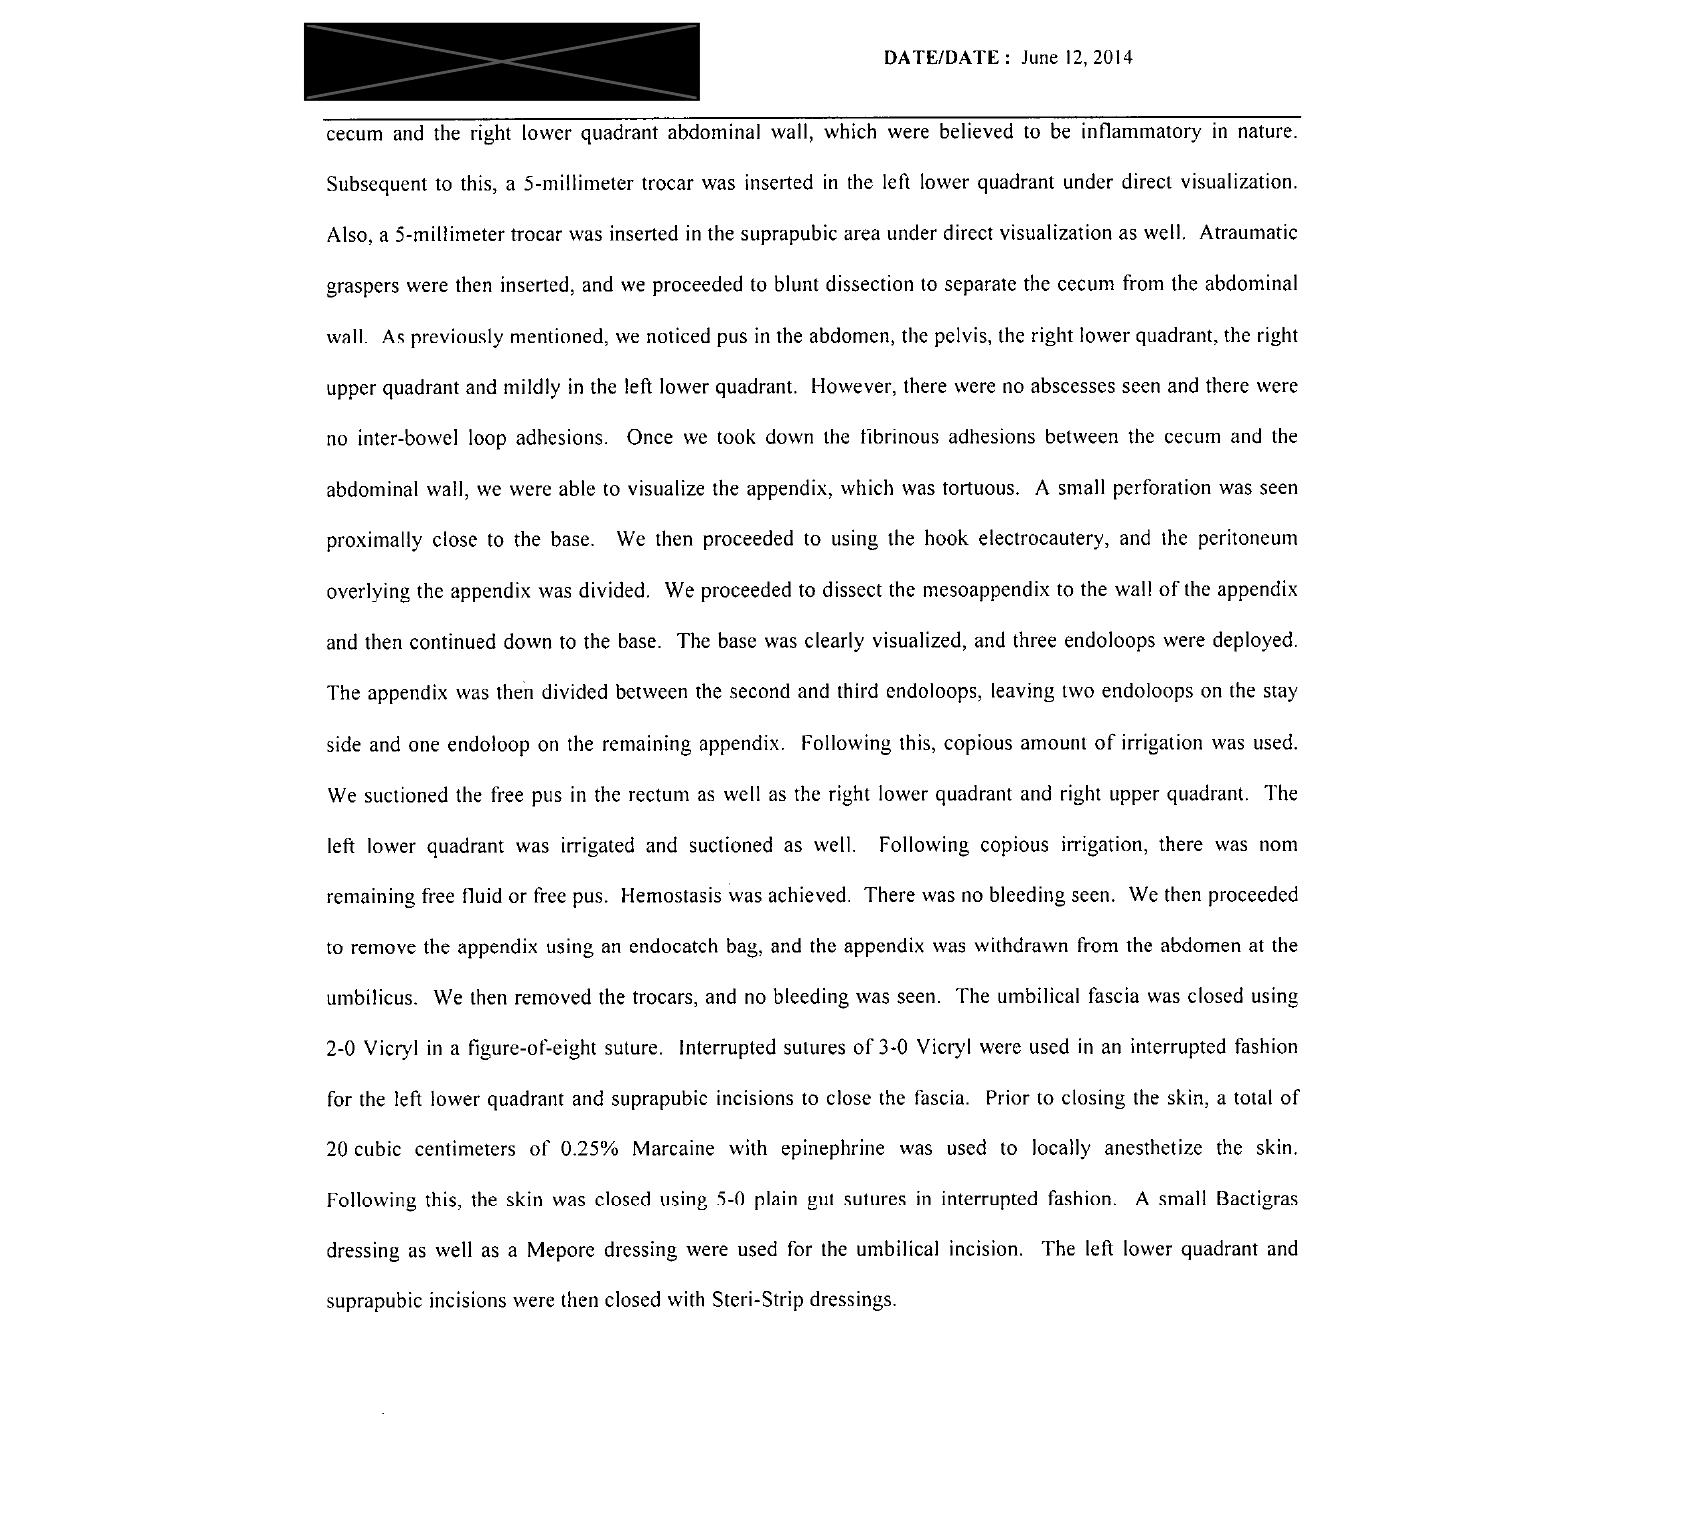

Cropping 169 O_1.png


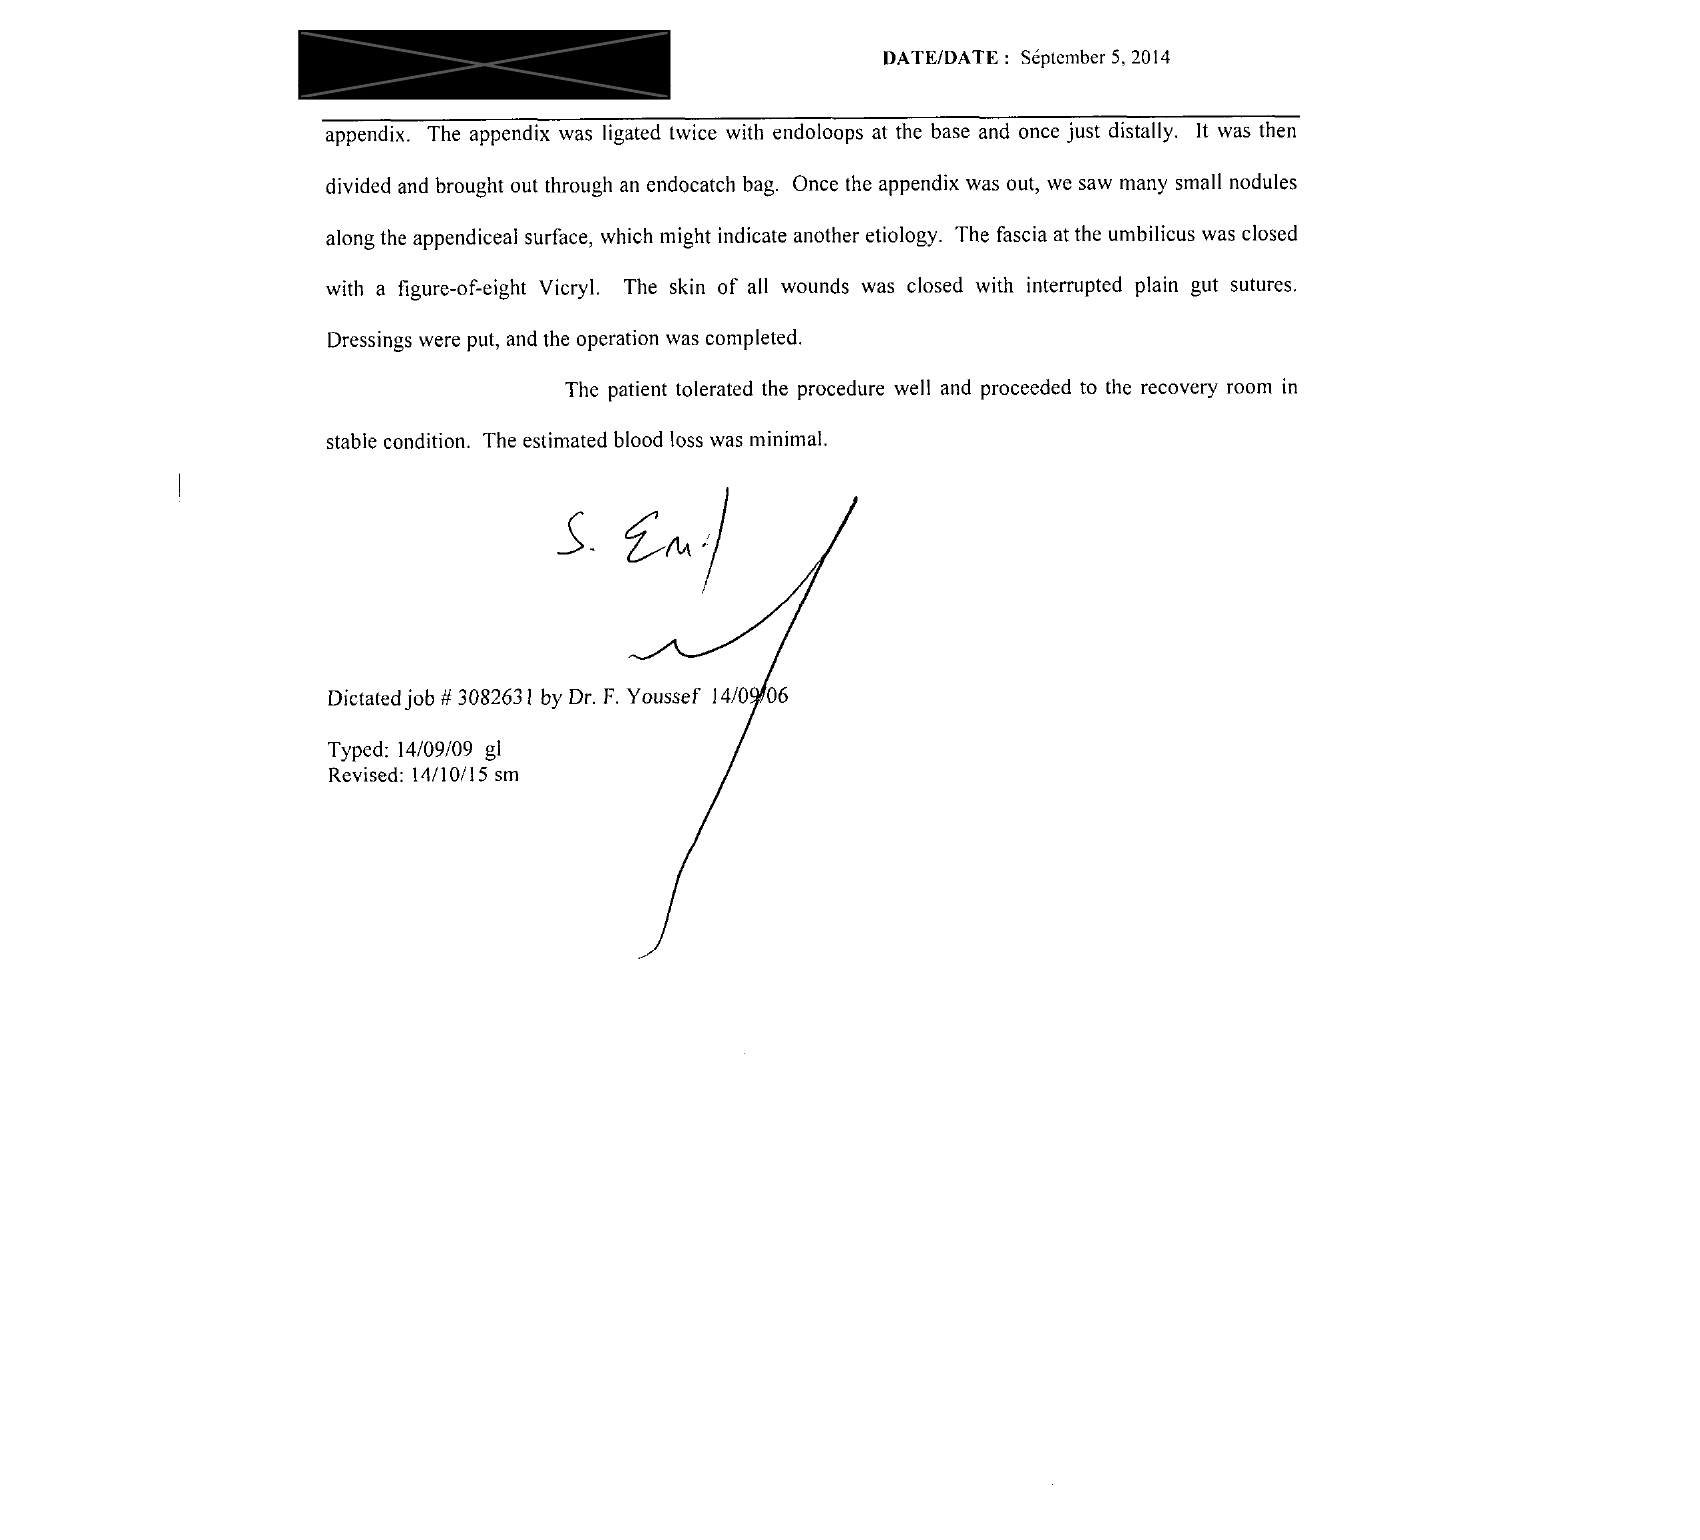

Cropping 152 O_1.png


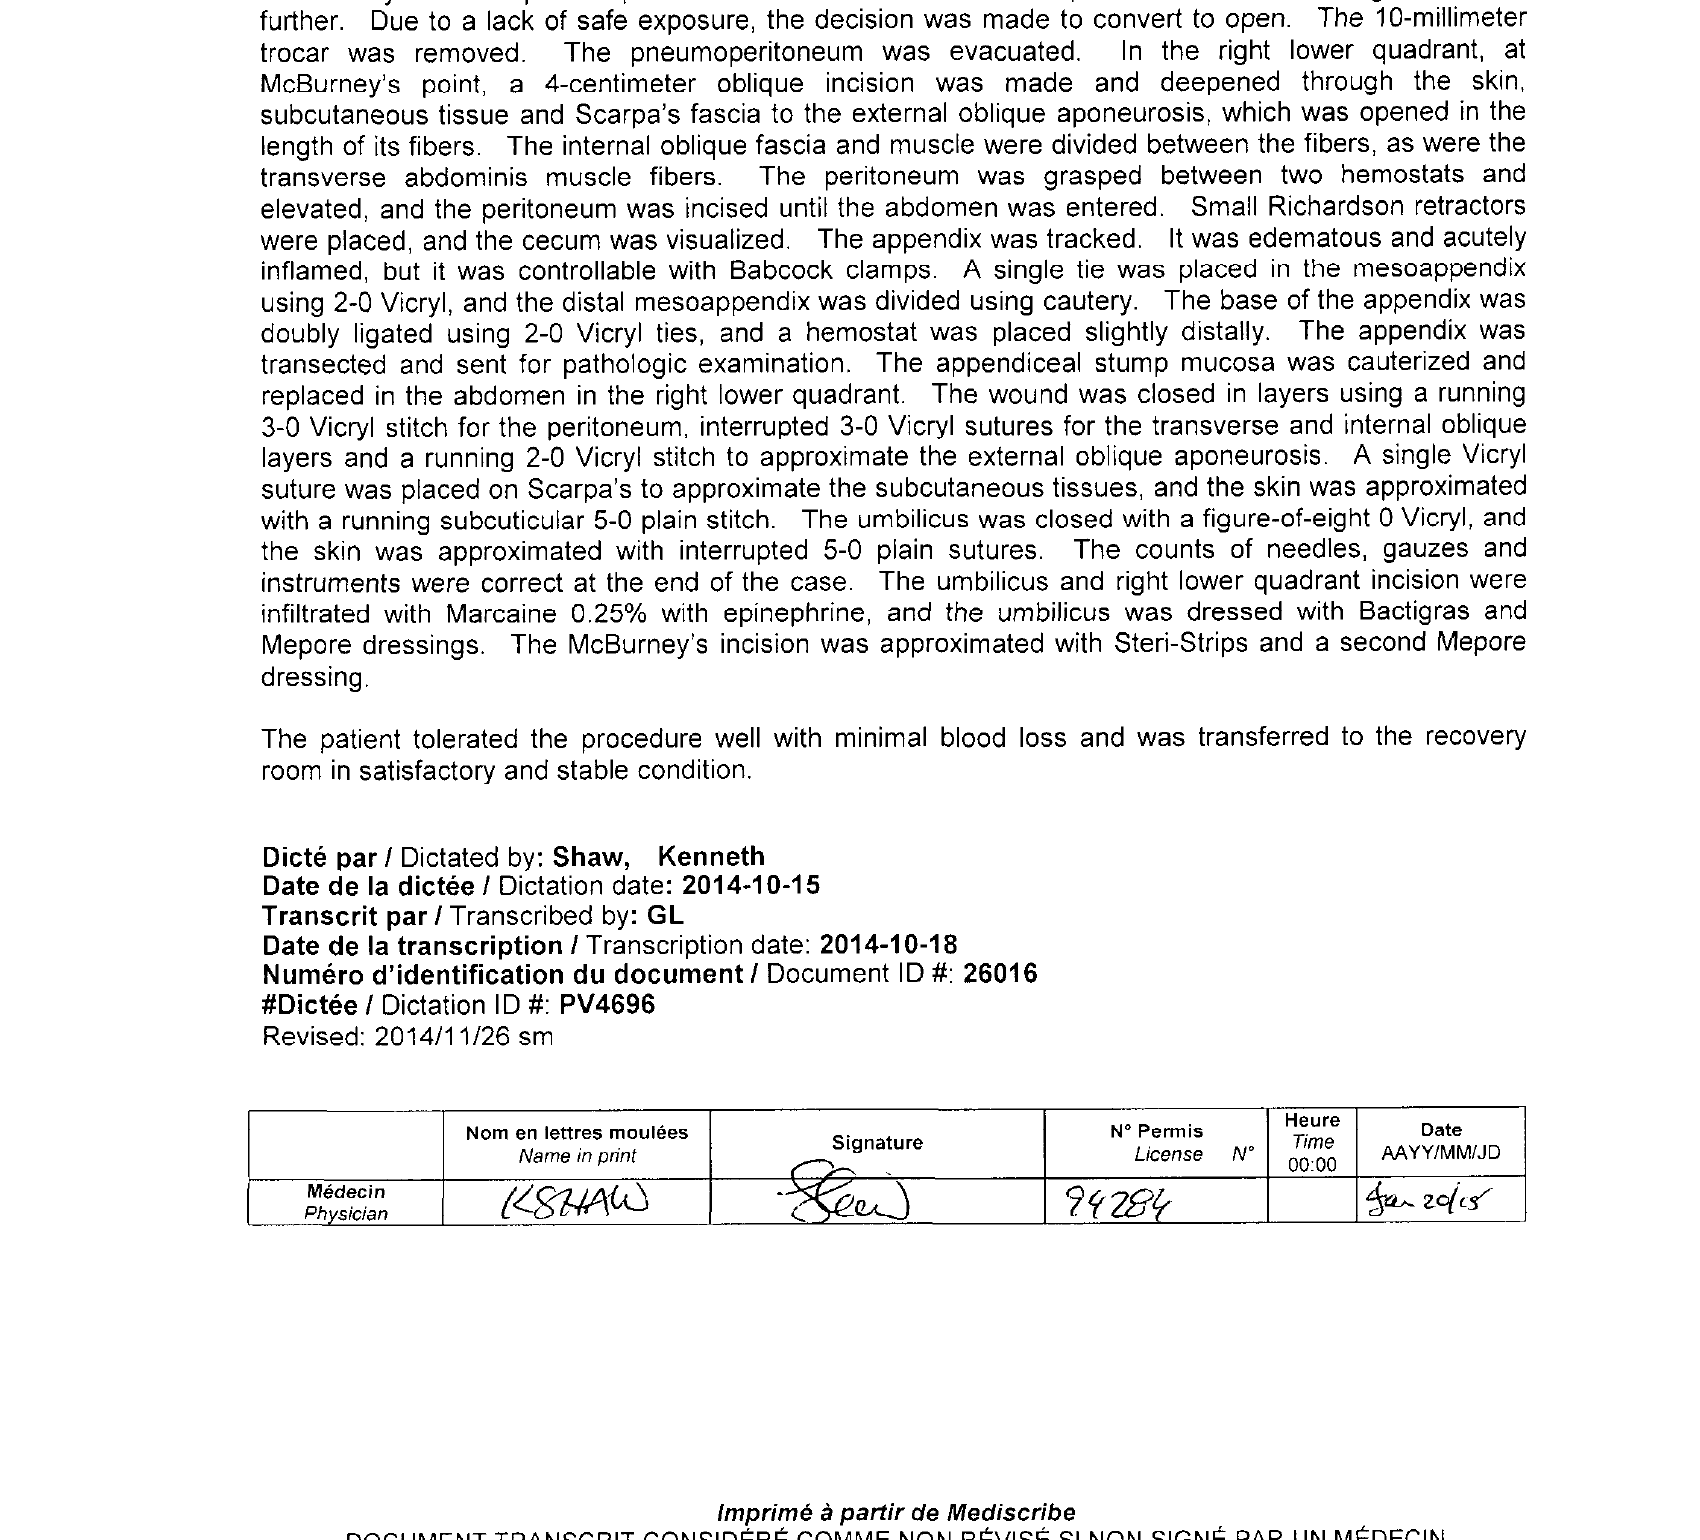

Cropping 78 O_1.png


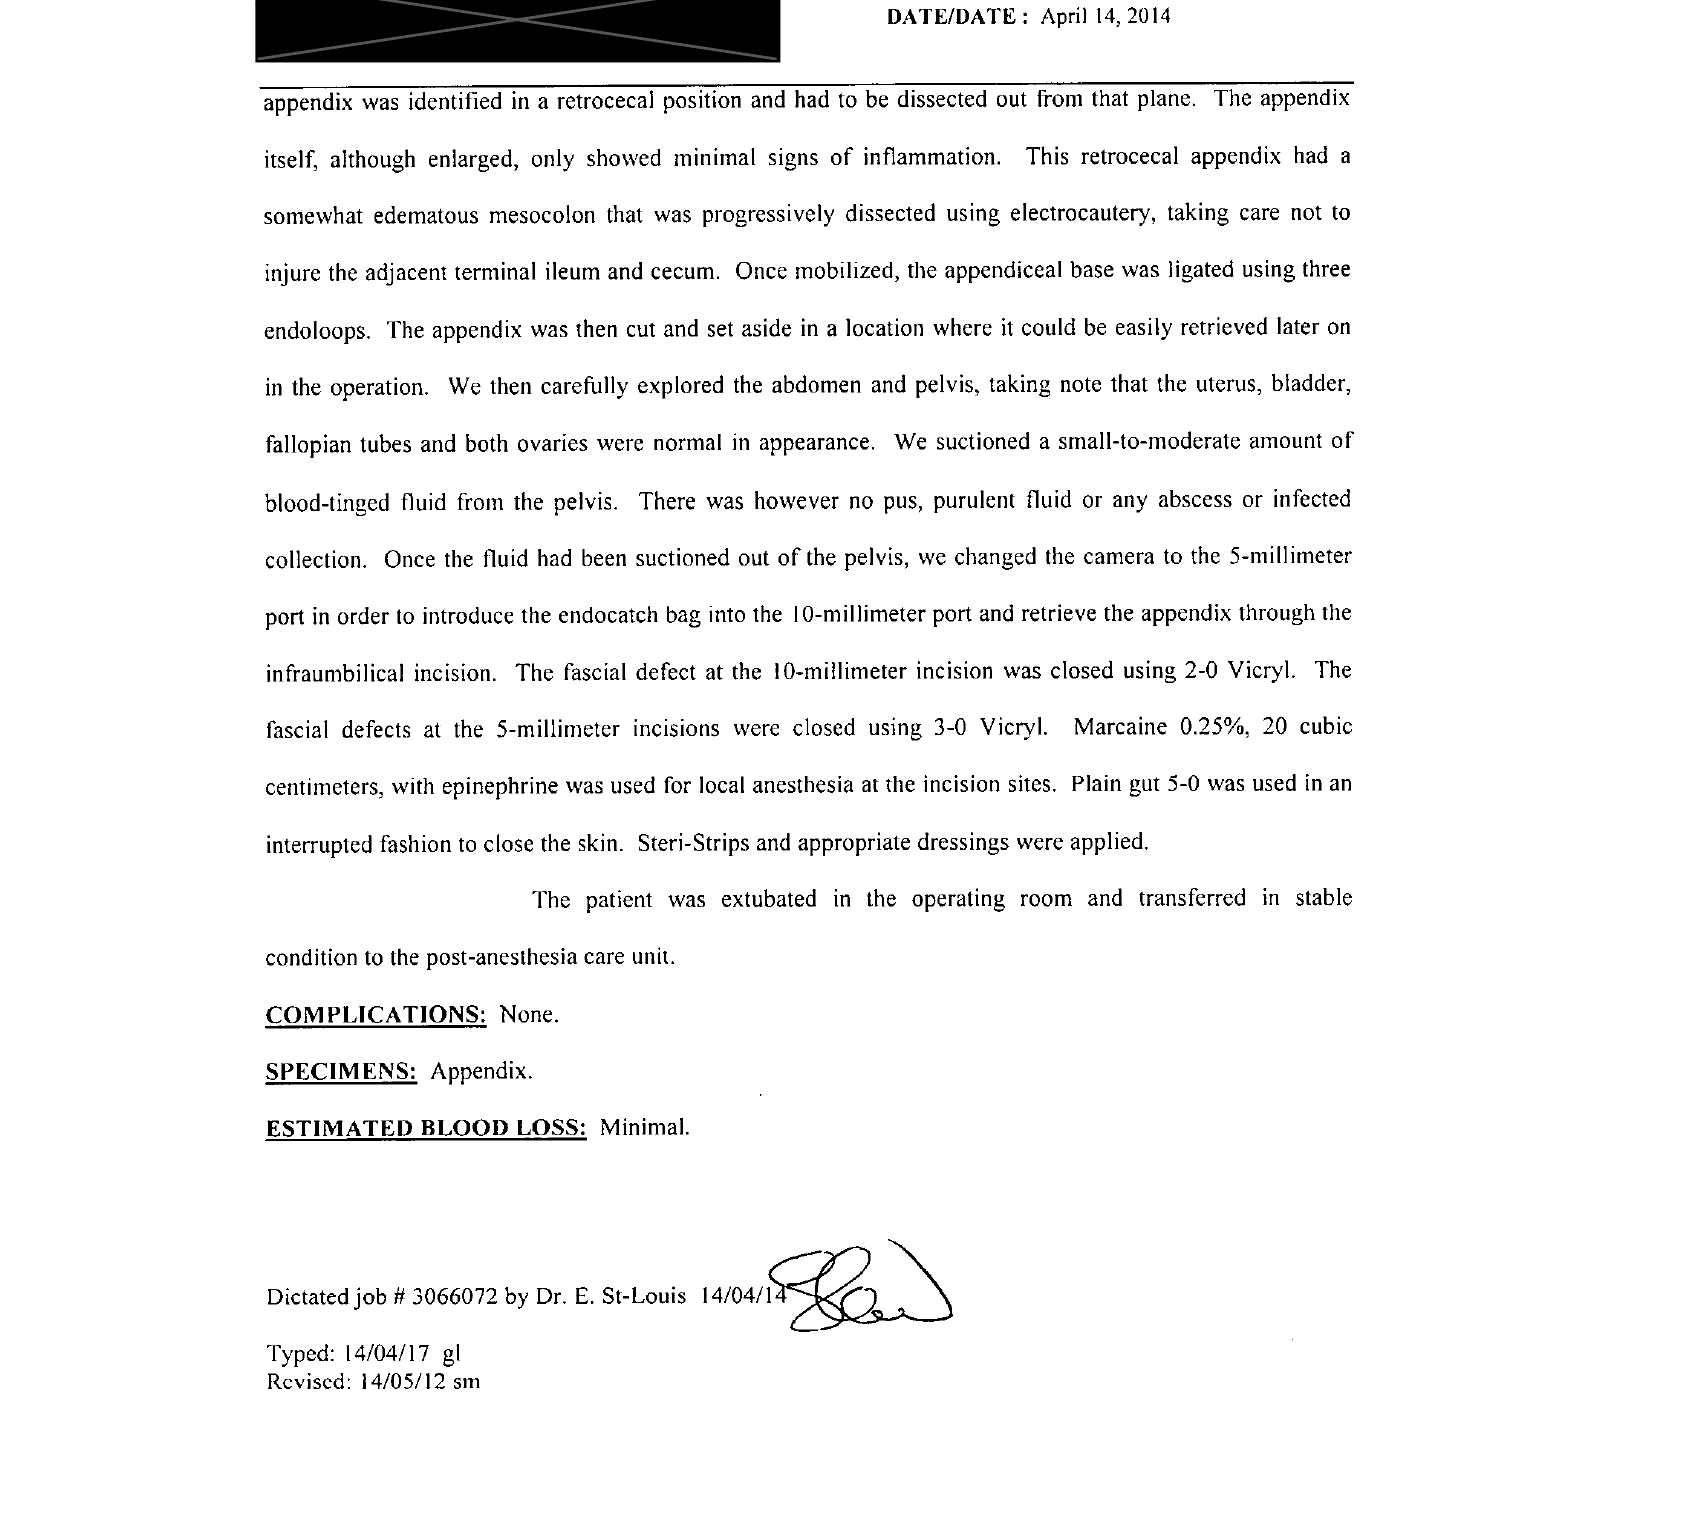

Cropping 85 O_1.png


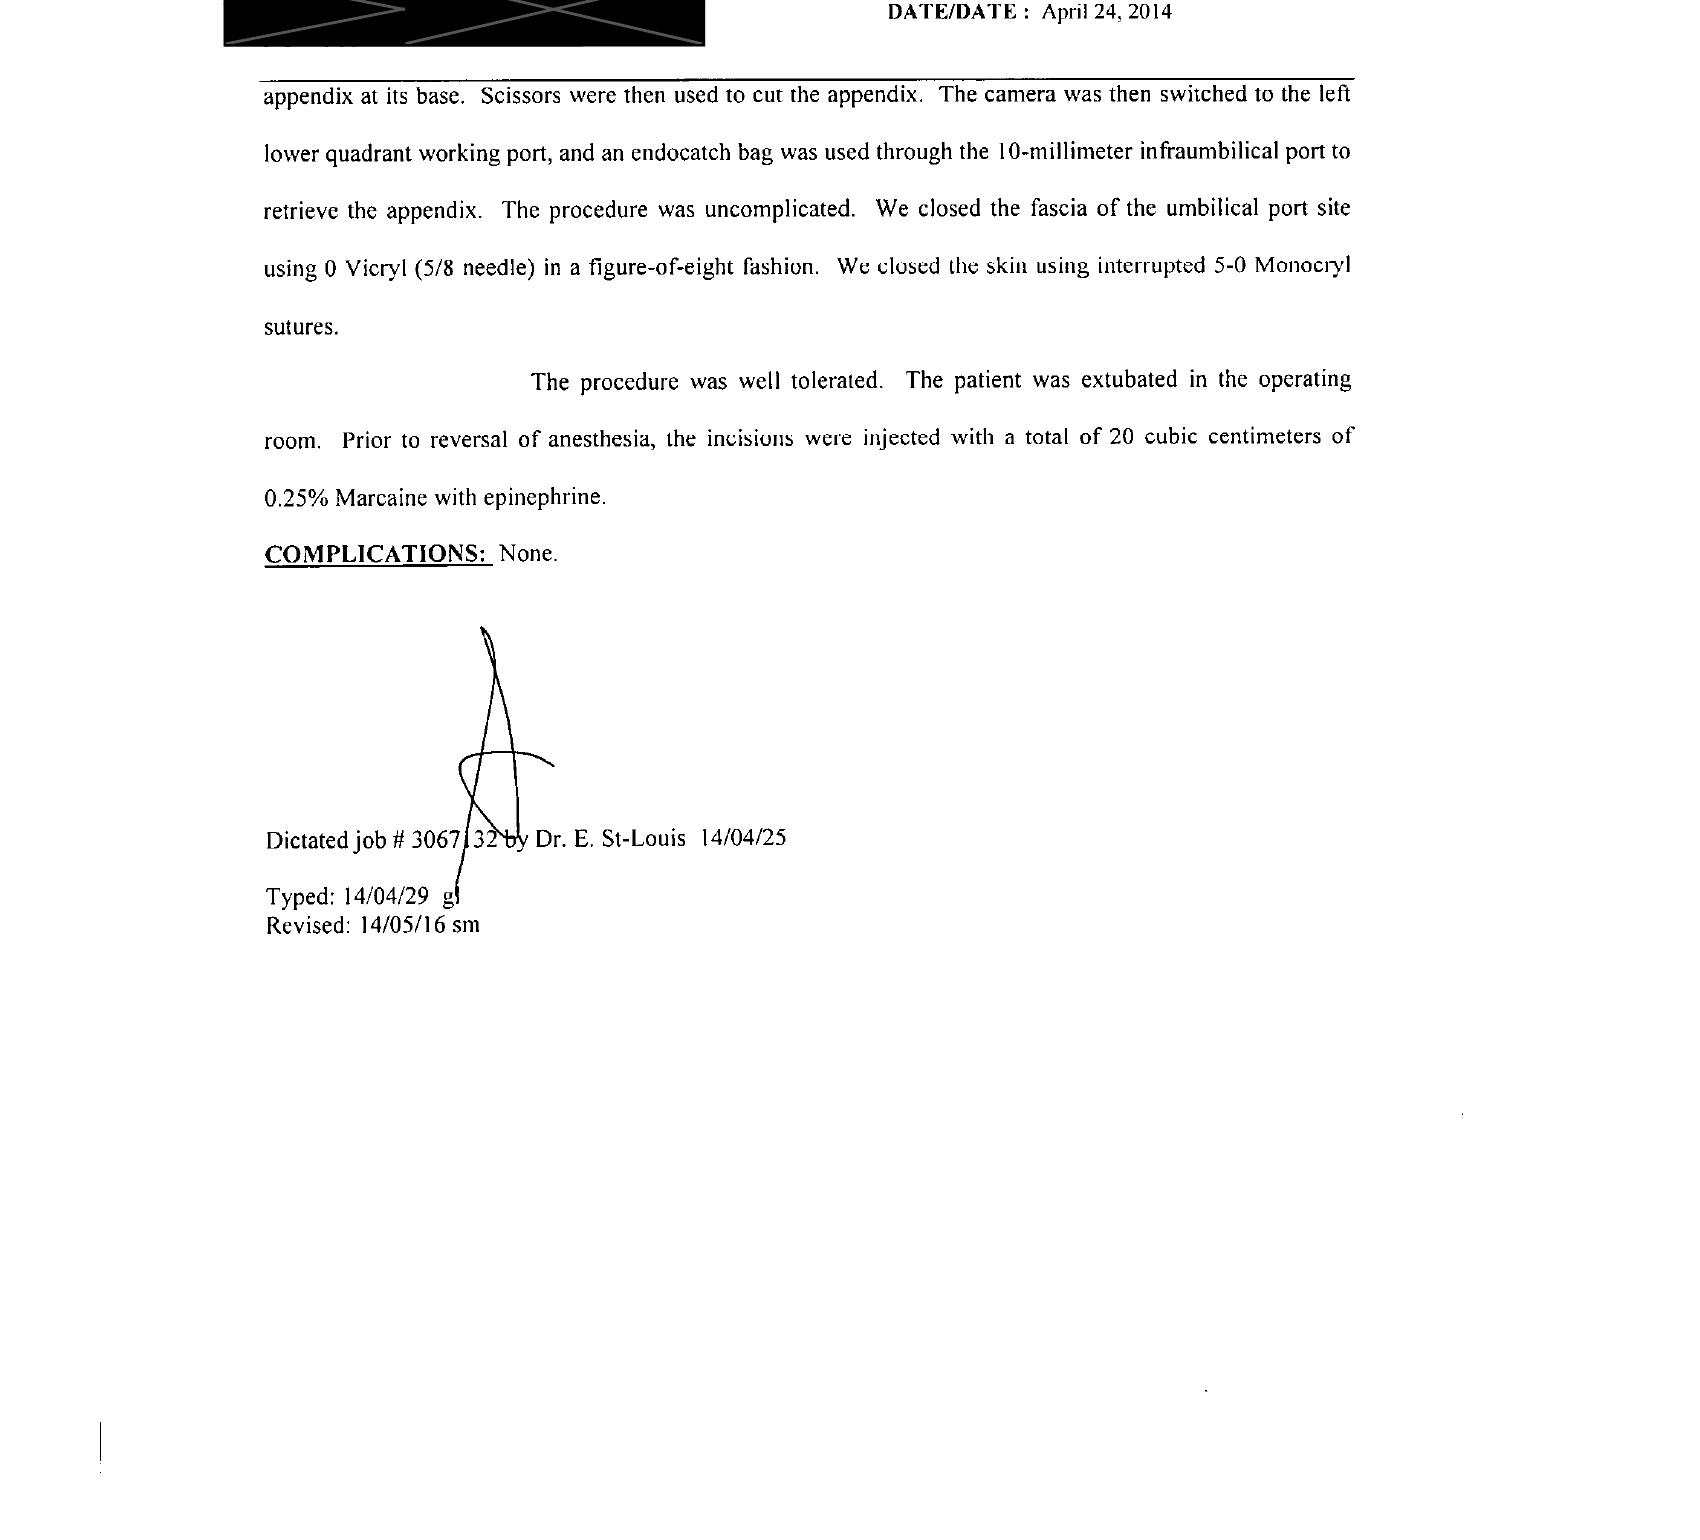

Cropping 181 O_1.png


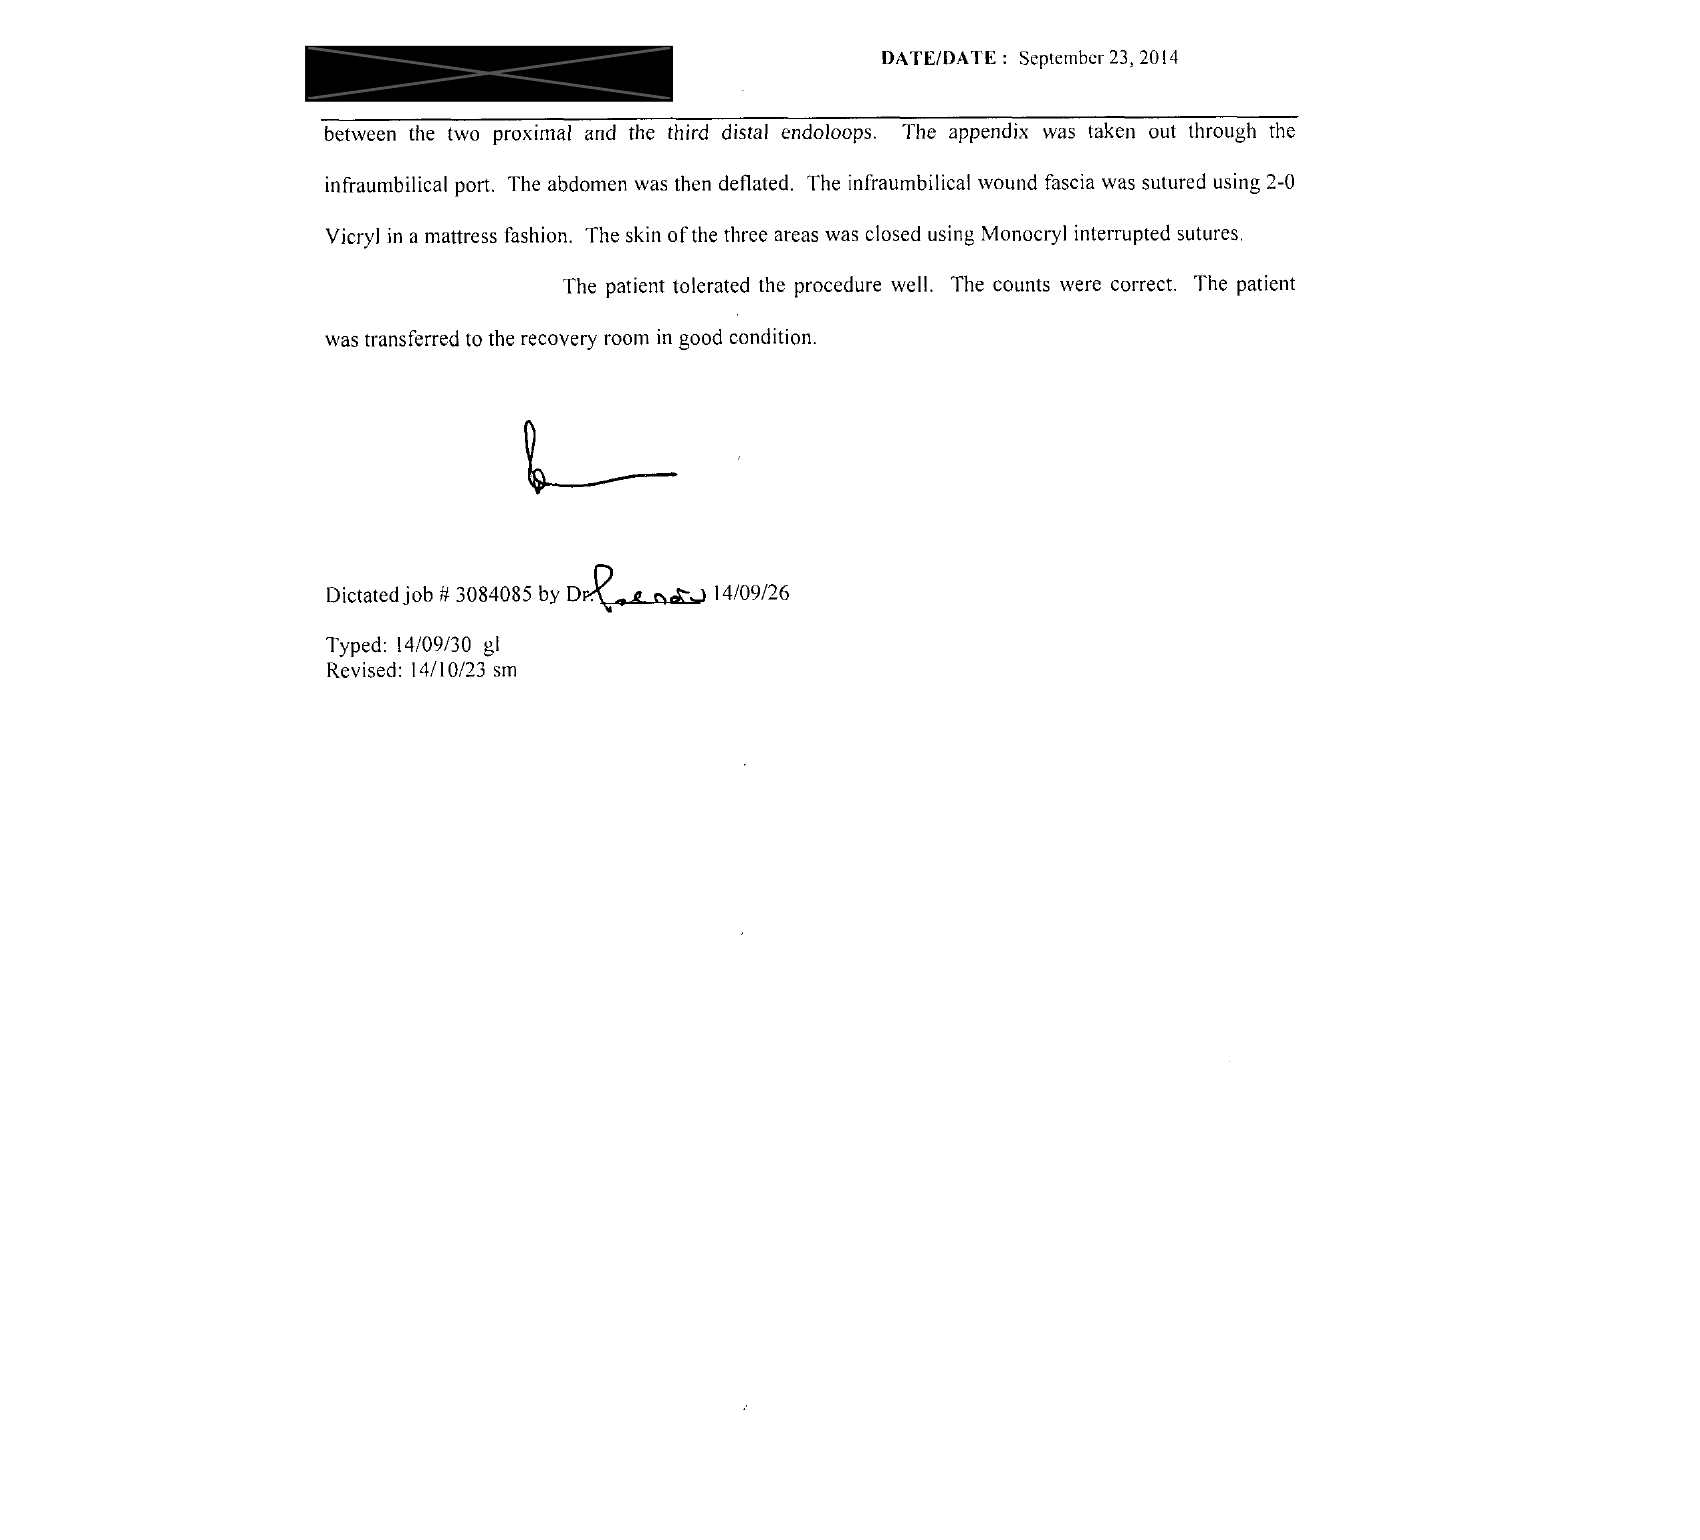

Cropping 116 O_1.png


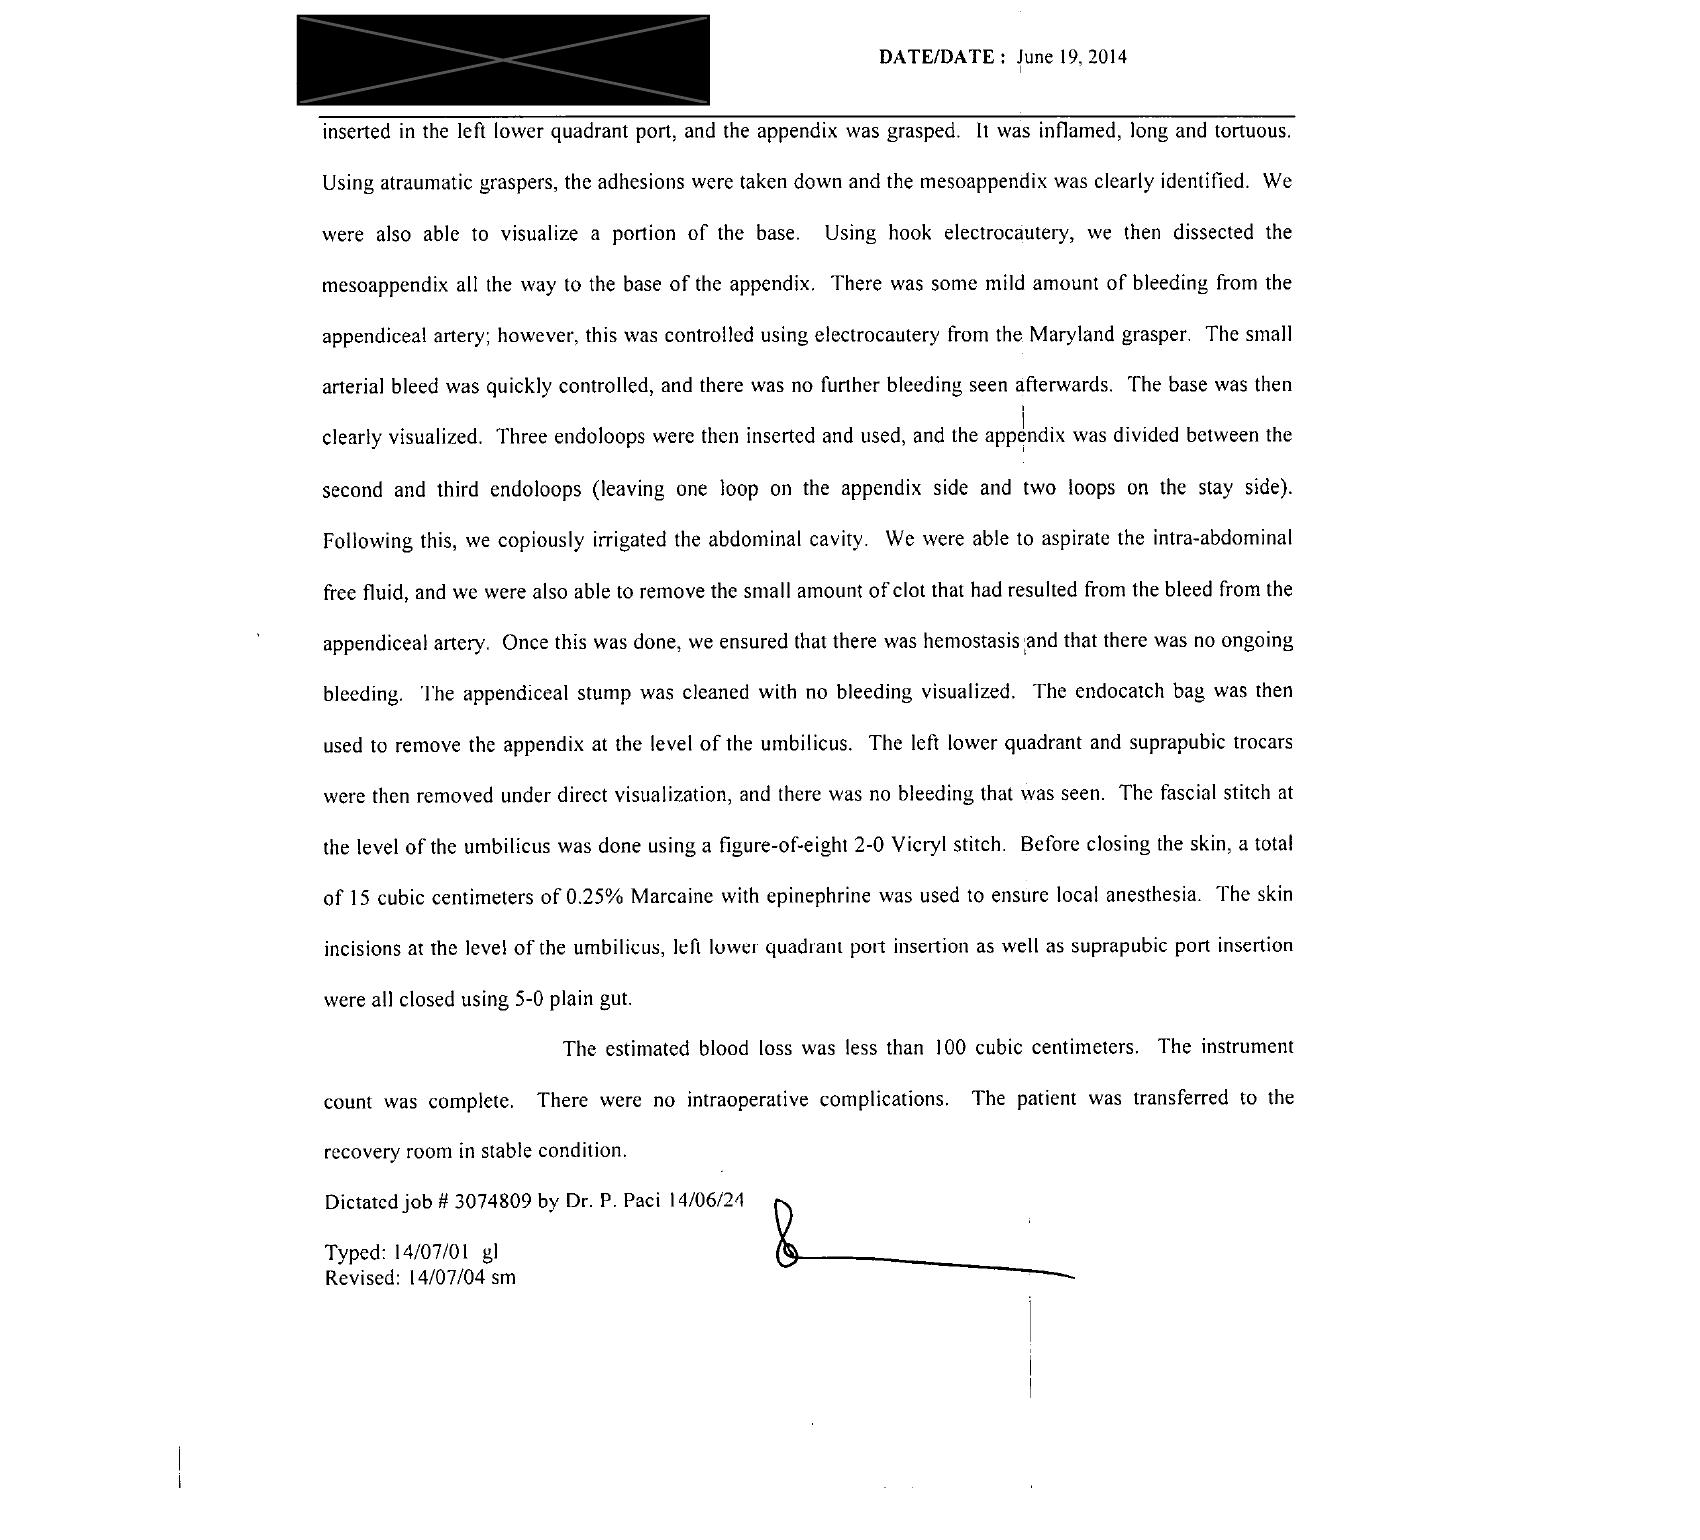

Cropping 84 O_1.png


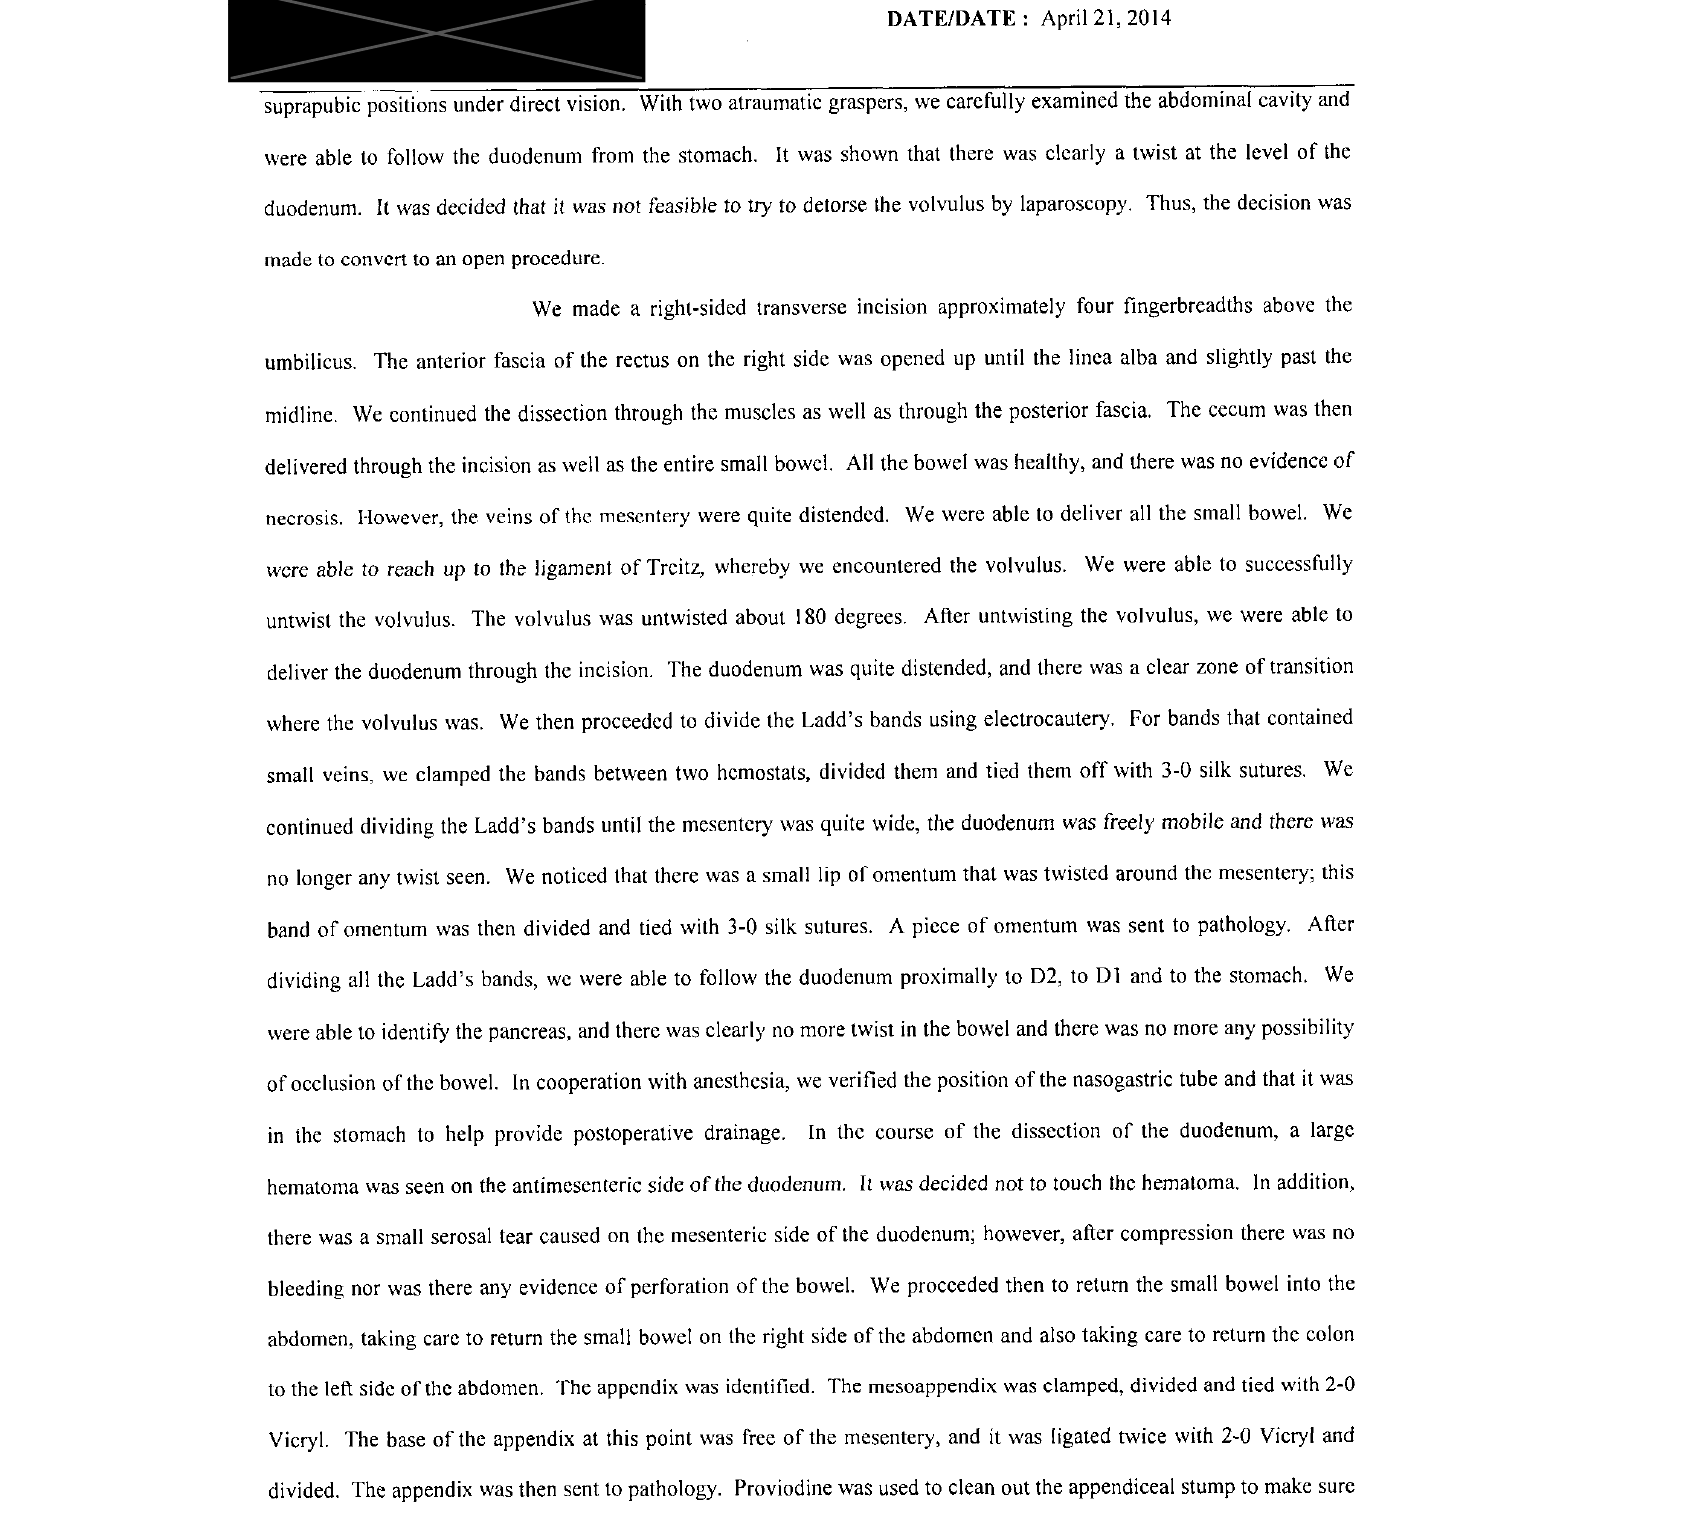

Cropping 120 O_1.png


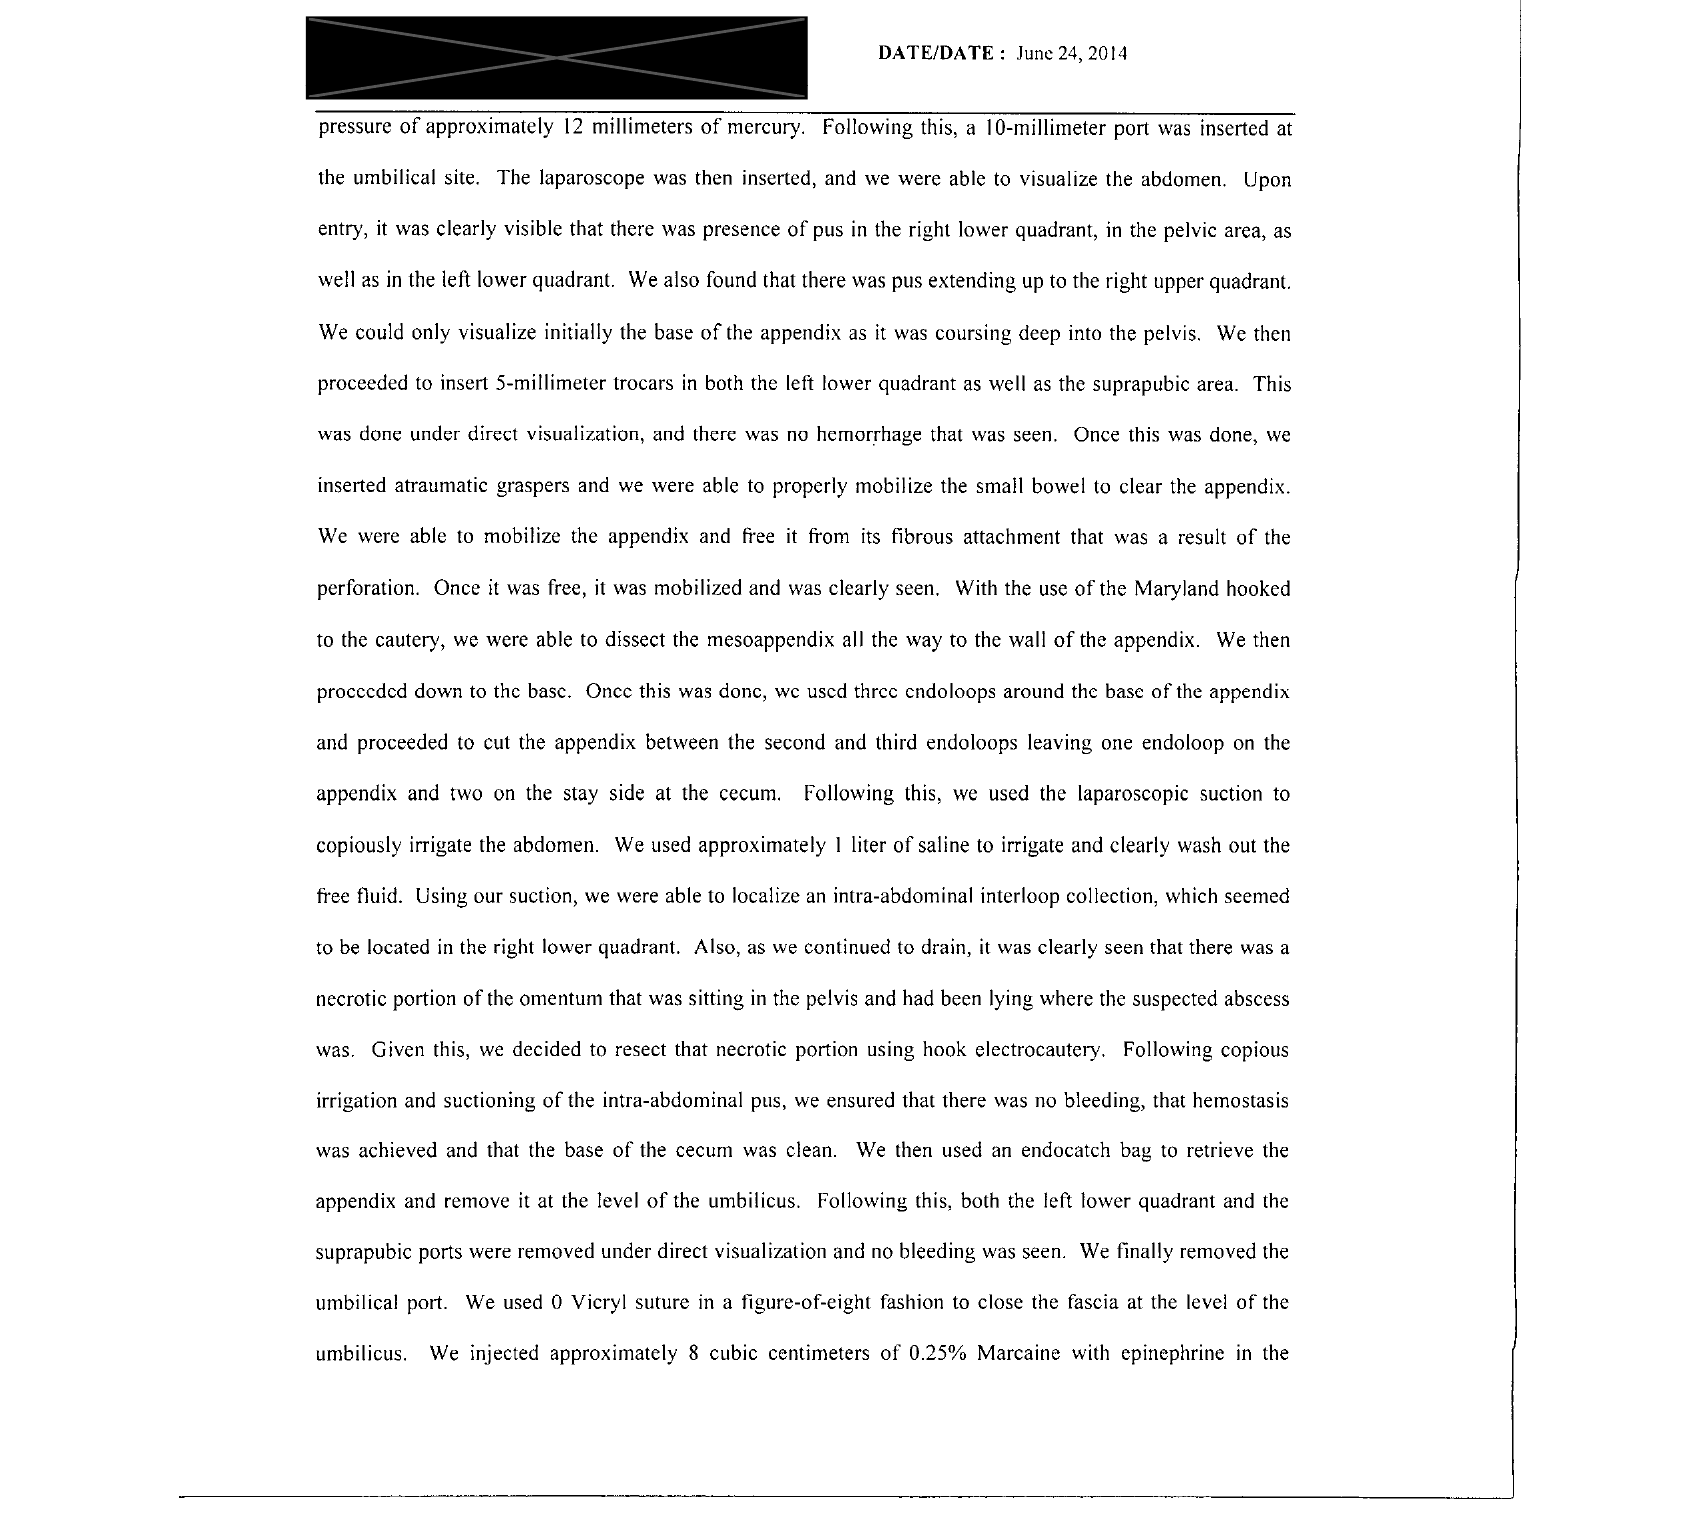

Cropping 105 O_1.png


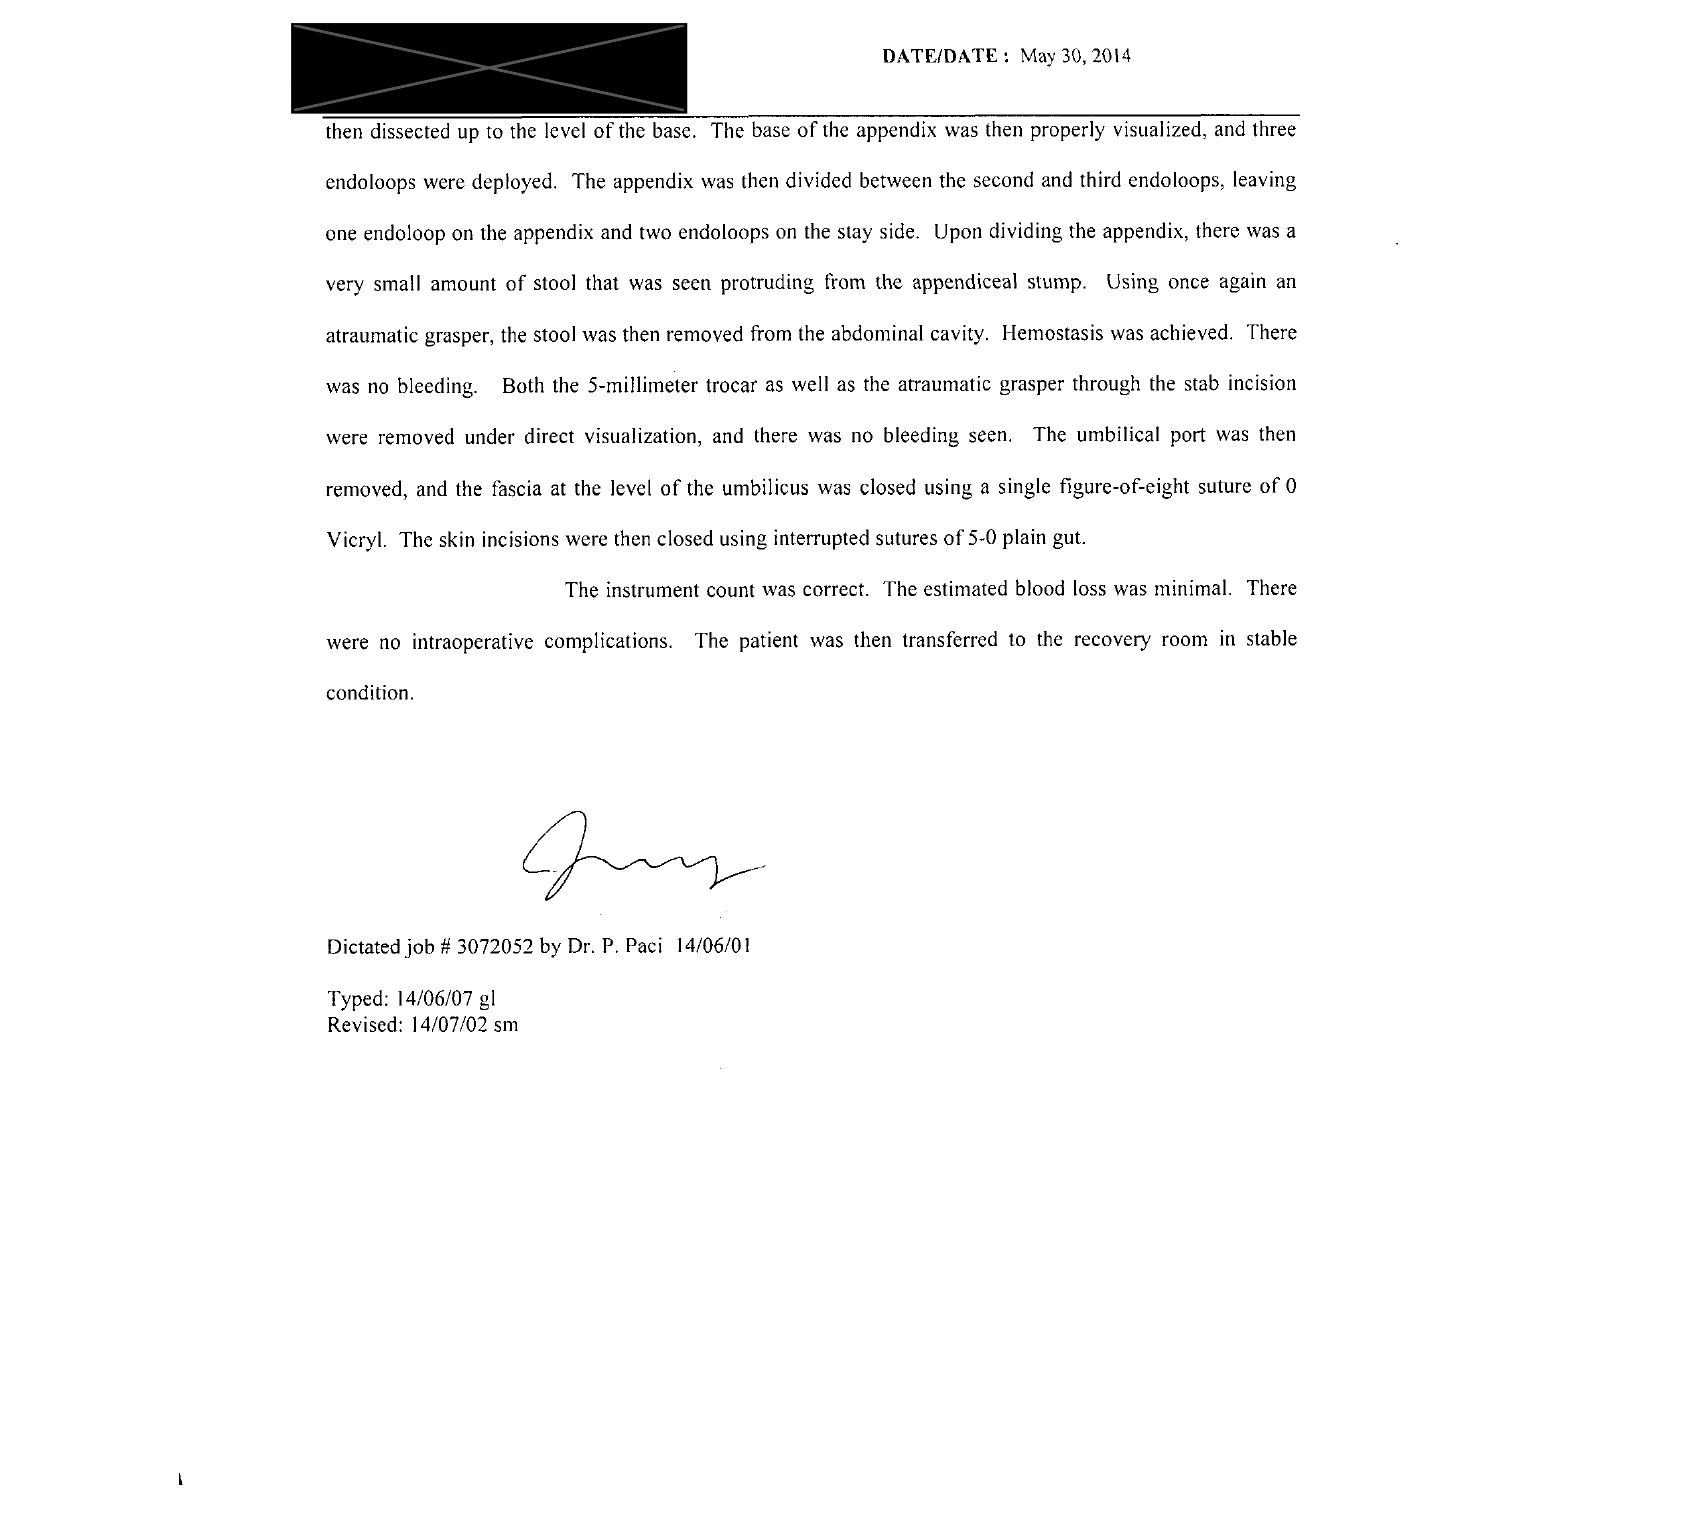

Cropping 66 O_1.png


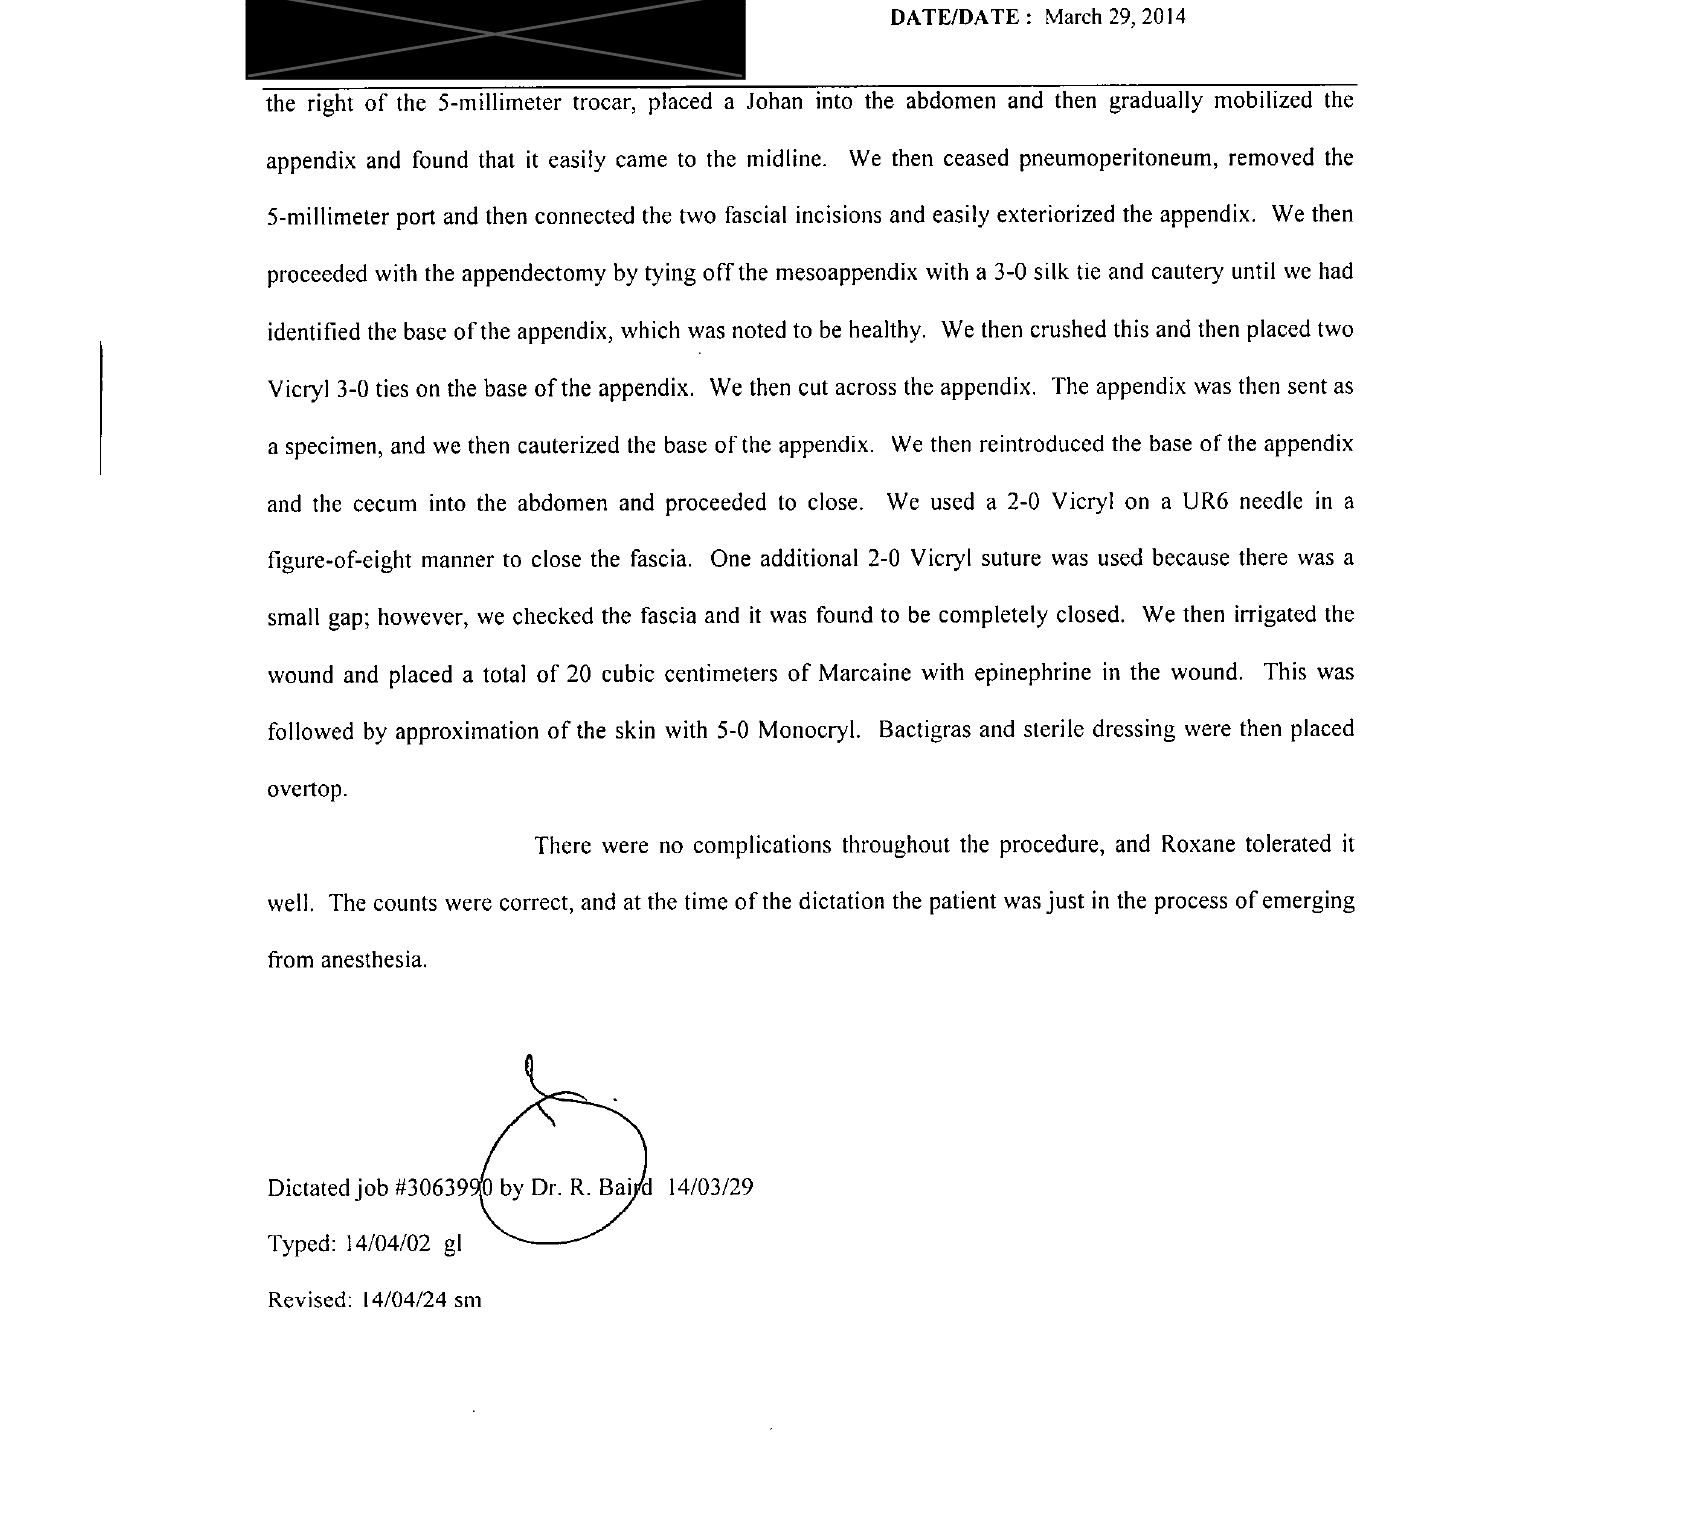

Cropping 162 O_1.png


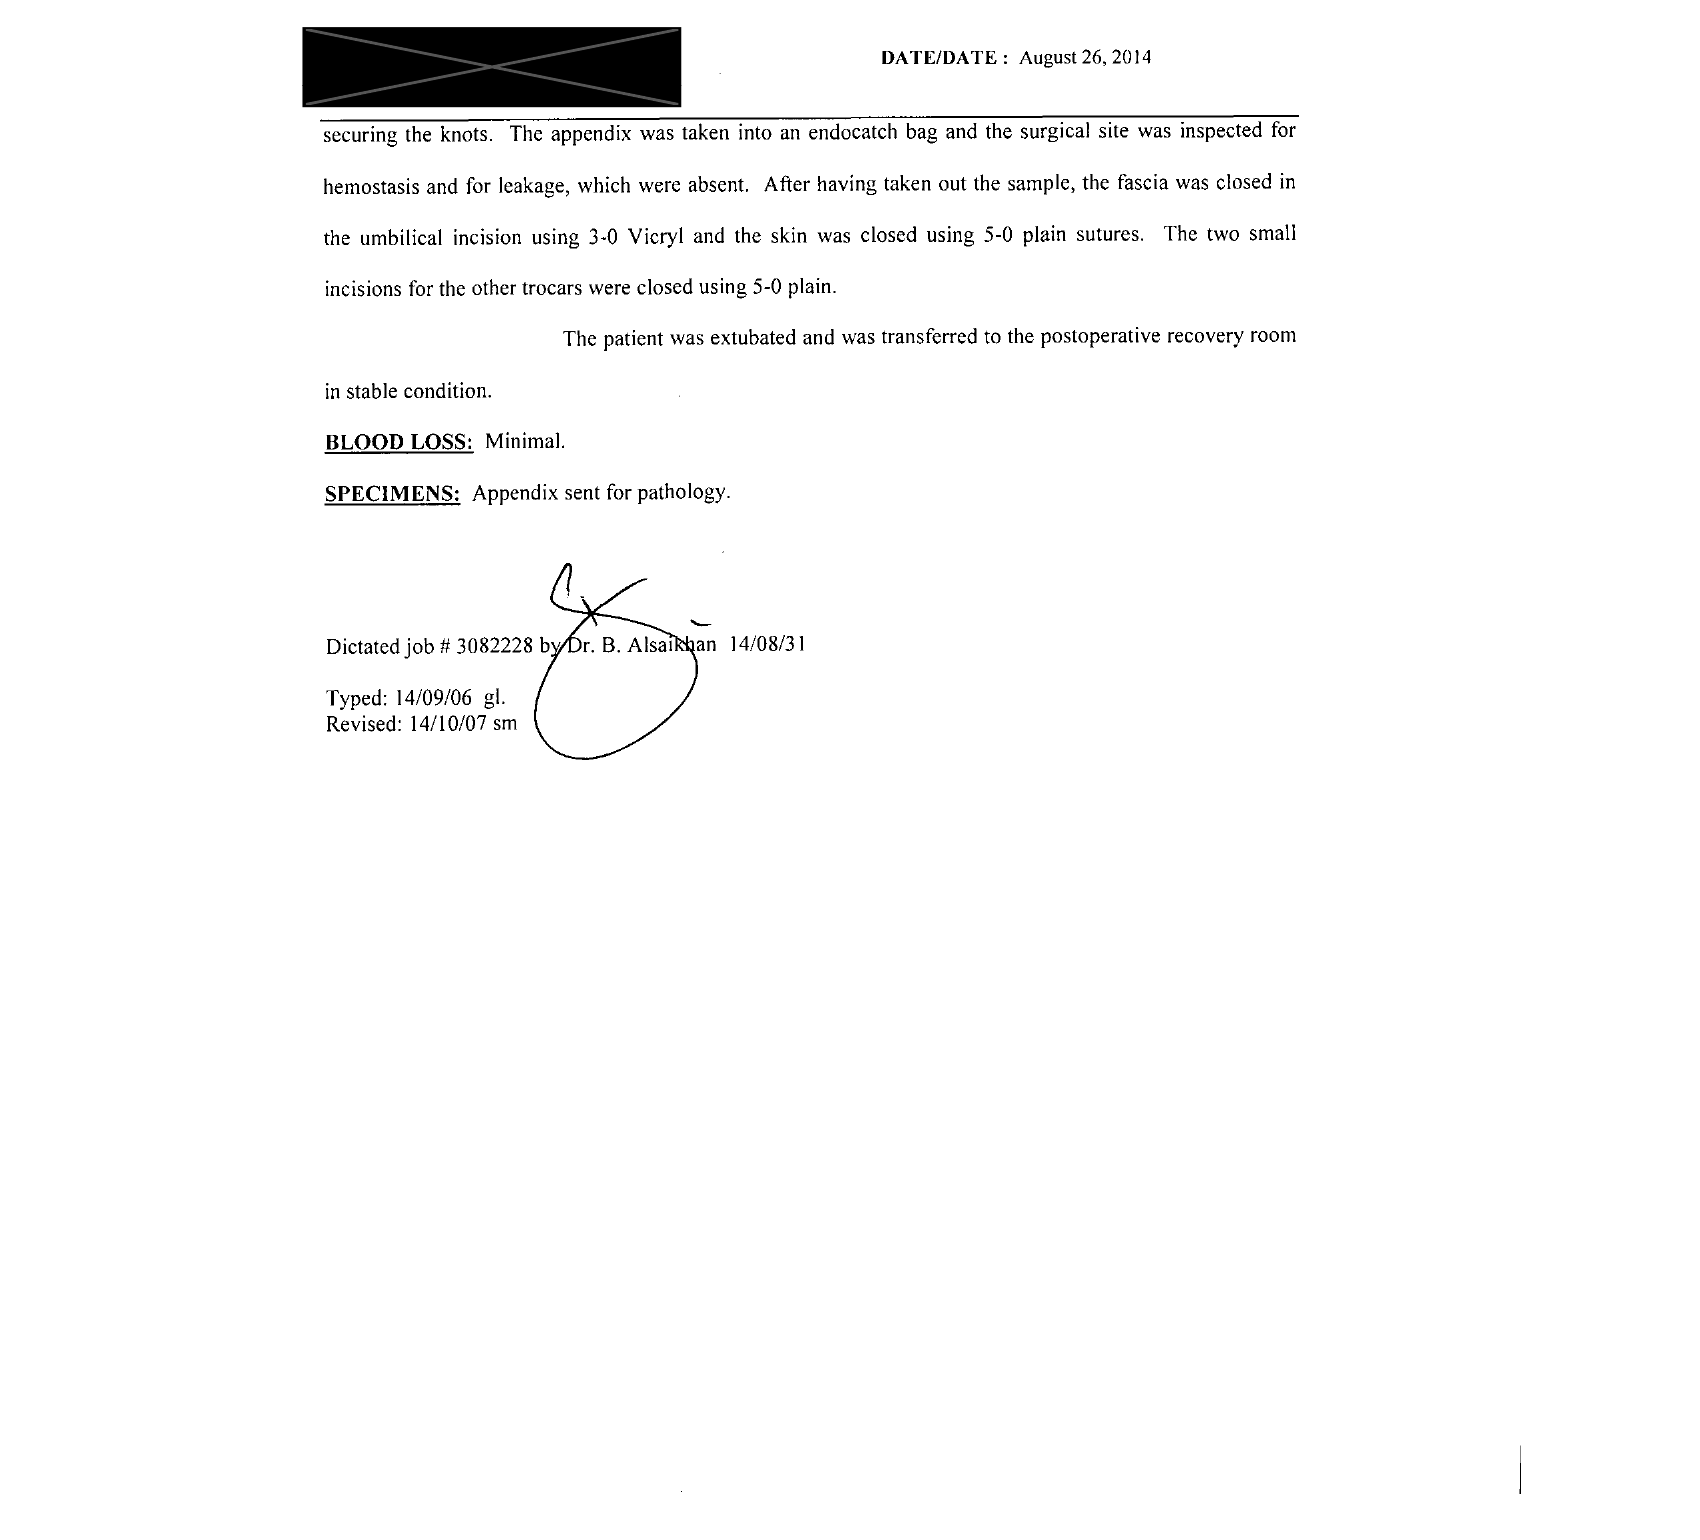

Cropping 179 O_1.png


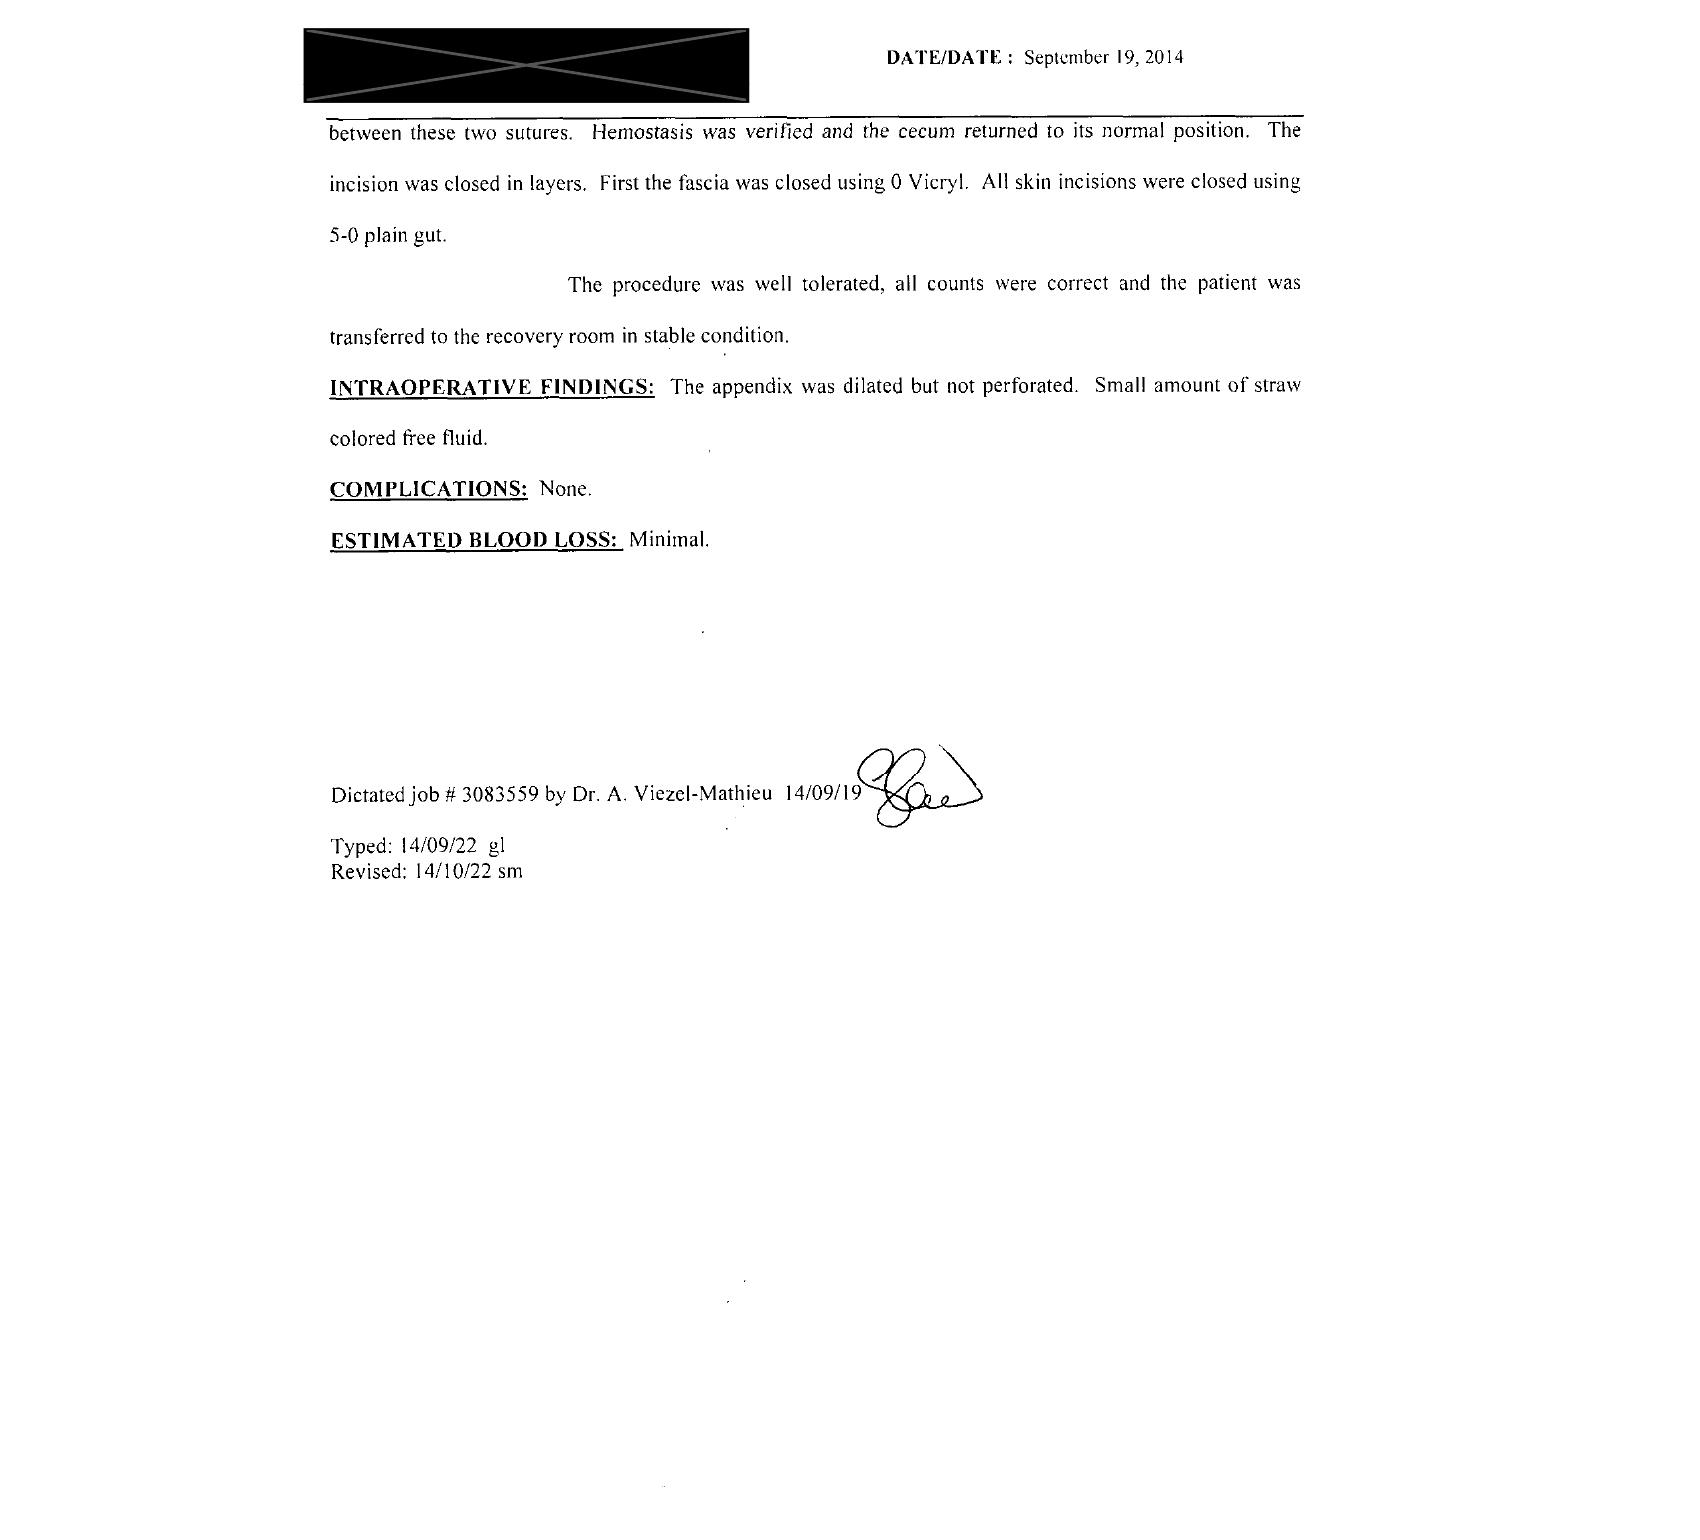

In [13]:
from PIL import Image
import time

for path in os.listdir(surgical_folder_png_path):
    if path.endswith("1.png"):
        print(f"Cropping {path}")
        im = Image.open(os.path.join(surgical_folder_png_path, path))
        width, height = im.size
        right = width
        left = 0
        bottom = height - height/10
        top = height/5
        im_cropped = im.crop((left, top, right, bottom))
        im_cropped.show()
        pytesseract.image_to_string(im_cropped)
        time.sleep(5)
        

Appears promising, try some extraction with this to see if text is easier to extract.